<a href="https://colab.research.google.com/github/elsaabs/dement_invasion/blob/main/Google_Colaboratory_Notebook_Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install pickle5

In [ ]:
pip install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 5.1 MB/s 


In [ ]:
pip install --no-cache-dir libpysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 5.2 MB/s 


In [ ]:
pip install esda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 116 kB 5.1 MB/s 
  Created wheel for esda: filename=esda-2.4.3-py3-none-any.whl size=122781 sha256=ae30b24cae92cb497d526e782449a96eef13ab9d3fde1199afeb3b3b92f86717
  Stored in directory: /root/.cache/pip/wheels/37/07/2e/2aa4874ca25fa442a3912c74e53780da19d25ec1d58bac5d30
Successfully built esda


# Mount drive

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/'Michaeline Elsa - Invasion project'/'21.05.01 - Jupyter notebooks'/'Round #6'/

/content/drive/MyDrive/Michaeline Elsa - Invasion project/21.05.01 - Jupyter notebooks/Round #6


In [ ]:
ls

 0.Notebook_Round6.ipynb
 10568760.pickle
 10568883.pickle
 10568885.pickle
 10568888.pickle
 10569122.pickle
 10569124.pickle
 10569125.pickle
 10569127.pickle
 10657605.pickle
 10657607.pickle
 10657608.pickle
 10657609.pickle
 10657610.pickle
 10657611.pickle
 10657612.pickle
 10657613.pickle
 10657614.pickle
 1111.pickle
 11250937.pickle
 11376389.pickle
 11376411.pickle
 11376417.pickle
 11665851.pickle
 11665868.pickle
 11665869.pickle
 11665870.pickle
 11665871.pickle
 11665872.pickle
 11665873.pickle
 11665874.pickle
 11665875.pickle
 11665876.pickle
 1233.pickle
 1234.pickle
'1235 (1).pickle'
 1235.pickle
 202001161015.pickle
'21.09.20 - Worksheet Round #6.gdoc'
'22.01.10 - Outline EN.gdoc'
 22021701.pickle
 22030801.pickle
'22.04.06 - Fake litters - Effect of initial biomass.gsheet'
 221020_decay_results_combined.csv
 8314494.pickle
 8314524.pickle
 8314549.pickle
 8314607.pickle
 8314642.pickle
 9209674.pickle
 9209677.pickle
 9209679.pickle
 9209681.pickle
 9209687.pickle
 

# Import Libraries

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import pickle5
import matplotlib.pyplot as plt
#import output_CNP
import matplotlib as mpl      # for colormap on barplots
from sklearn.decomposition import PCA

# ***** Refaire Figure S3A (decay) (phase I + phase II)

In [ ]:
phase1 = pd.read_csv('221020_decay_results_combined.csv')
# Build dataframe
col1 = phase1.loc[phase1['litter'] == 'A']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D-P1"})
col2 = phase1.loc[phase1['litter'] == 'B']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sc-P1"})
col3 = phase1.loc[phase1['litter'] == 'C']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "G-P1"})
col4 = phase1.loc[phase1['litter'] == 'D']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po-P1"})
col5 = phase1.loc[phase1['litter'] == 'E']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sa-P1"})
# Combine
Table_for_plot = pd.concat([col1,col2,col3,col4,col5],axis=1)
Table_for_plot

D-P1     Sc-P1      G-P1     Po-P1     Sa-P1
0  0.000443  0.000231  0.000142  0.000107  0.000071
1  0.000038  0.004803  0.001606  0.000119  0.000520
2  0.000083  0.000150  0.000204  0.000205  0.000064
3  0.000133  0.002006  0.002545  0.000064  0.000118
4  0.000100  0.000242  0.000129  0.000486  0.000120
5  0.000213  0.000373  0.000134  0.000062  0.000212
6  0.002247  0.000088  0.000239  0.003585  0.009267
7  0.000133  0.000078  0.000377  0.000080  0.000256
8  0.002560  0.000141  0.000073  0.010784  0.003714
9  0.000229  0.000136  0.000079  0.000219  0.000087

[(0.0, 0.0006)]

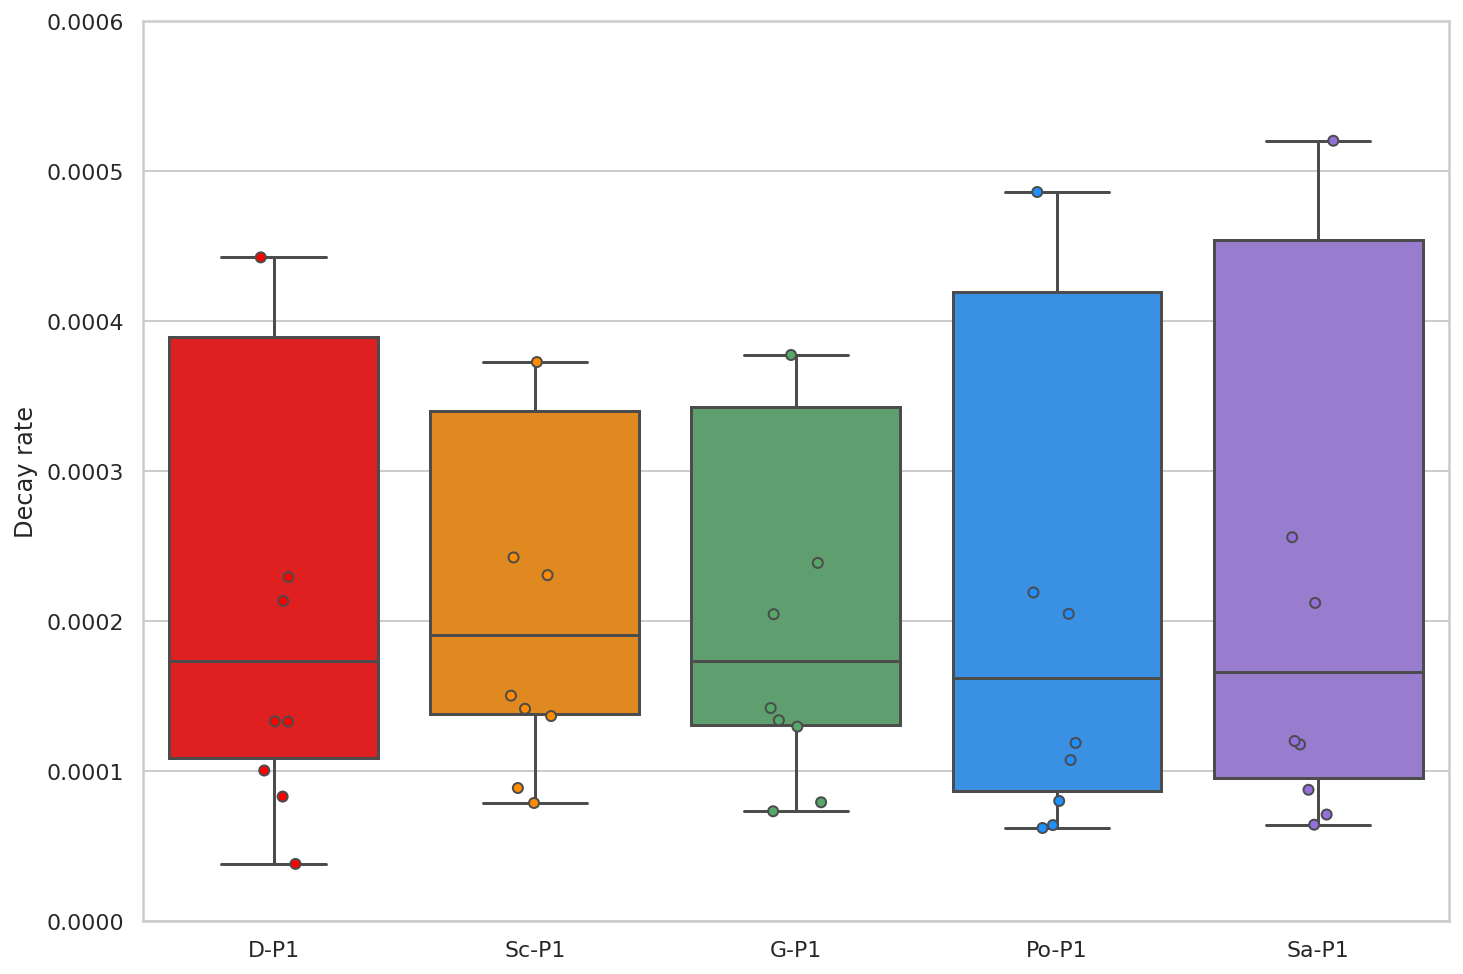

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Decay rate')
ax.set_xlabel('')
#ax.set(ylim=(0, 1.5e-3))
ax.set(ylim=(0, 0.0006))

In [ ]:
# PHASE 1 AND PHASE 2
phase1 = pd.read_csv('221020_decay_results_combined.csv')
phase2 = pd.read_csv('221024_decay_results_combined.csv')
# Build dataframe
col1 = phase1.loc[phase1['litter'] == 'A']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D-P1"})
col2 = phase1.loc[phase1['litter'] == 'B']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sc-P1"})
col3 = phase1.loc[phase1['litter'] == 'C']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "G-P1"})
col4 = phase1.loc[phase1['litter'] == 'D']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po-P1"})
col5 = phase1.loc[phase1['litter'] == 'E']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sa-P1"})
# From D to all
col6 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "DtoD-P2"})
col7 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "DtoSc-P2"})
col8 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "DtoG-P2"})
col9 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "DtoPo-P2"})
col10 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "DtoSa-P2"})
# From Sc to all
col11 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SctoD-P2"})
col12 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SctoSc-P2"})
col13 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SctoG-P2"})
col14 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SctoPo-P2"})
col15 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SctoSa-P2"})
# From G to all
col16 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "GtoD-P2"})
col17 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "GtoSc-P2"})
col18 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "GtoG-P2"})
col19 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "GtoPo-P2"})
col20 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "GtoSa-P2"})
# From Po to all
col21 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "PotoD-P2"})
col22 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "PotoSc-P2"})
col23 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "PotoG-P2"})
col24 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "PotoPo-P2"})
col25 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "PotoSa-P2"})
# From Sa to all
col26 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SatoD-P2"})
col27 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SatoSc-P2"})
col28 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SatoG-P2"})
col29 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SatoPo-P2"})
col30 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SatoSa-P2"})
# Combine
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30],axis=1)
Table_for_plot

D-P1     Sc-P1      G-P1     Po-P1     Sa-P1   DtoD-P2  DtoSc-P2  \
0  0.000443  0.000231  0.000142  0.000107  0.000071  0.000067  0.000161   
1  0.000038  0.004803  0.001606  0.000119  0.000520  0.009859  0.000048   
2  0.000083  0.000150  0.000204  0.000205  0.000064  0.001759  0.000075   
3  0.000133  0.002006  0.002545  0.000064  0.000118  0.021779  0.000039   
4  0.000100  0.000242  0.000129  0.000486  0.000120  0.000091  0.000018   
5  0.000213  0.000373  0.000134  0.000062  0.000212  0.000060  0.004102   
6  0.002247  0.000088  0.000239  0.003585  0.009267  0.003652  0.014042   
7  0.000133  0.000078  0.000377  0.000080  0.000256  0.000019  0.000067   
8  0.002560  0.000141  0.000073  0.010784  0.003714  0.000050  0.022174   
9  0.000229  0.000136  0.000079  0.000219  0.000087  0.000143  0.000840   

    DtoG-P2  DtoPo-P2  DtoSa-P2  ...  PotoD-P2  PotoSc-P2  PotoG-P2  \
0  0.000039  0.029354  0.000142  ...  0.000059   0.000036  0.000101   
1  0.004028  0.001693  0.000047  ...  0.000055   0.010827  0.017221   
2  0.000015  0.016550  0.015275  ...  0.000013   0.000589  0.000778   
3  0.000054  0.000040  0.001858  ...  0.001003   0.000109  0.008858   
4  0.000075  0.000133  0.026544  ...  0.000032   0.018534  0.000033   
5  0.000149  0.000021  0.000072  ...  0.009262   0.000100  0.000027   
6  0.001053  0.002044  0.000056  ...  0.000094   0.000050  0.000025   
7  0.019798  0.000035  0.002712  ...  0.000031   0.000027  0.001040   
8  0.000071  0.000063  0.000020  ...  0.020876   0.001078  0.000097   
9  0.010151  0.000057  0.000040  ...  0.001507   0.000029  0.000050   

   PotoPo-P2  PotoSa-P2  SatoD-P2  SatoSc-P2  SatoG-P2  SatoPo-P2  SatoSa-P2  
0   0.000903   0.000055  0.021341   0.001677  0.000058   0.000037   0.000104  
1   0.000030   0.000085  0.001884   0.000116  0.000086   0.016612   0.024713  
2   0.000112   0.000026  0.009295   0.000036  0.000032   0.001990   0.002168  
3   0.000030   0.001066  0.000037   0.000027  0.001580   0.027604   0.015288  
4   0.000048   0.000029  0.000037   0.000051  0.000028   0.000103   0.000037  
5   0.000074   0.000117  0.000021   0.000087  0.000111   0.000073   0.000038  
6   0.001672   0.015260  0.001454   0.000736  0.008965   0.000063   0.000034  
7   0.027282   0.000034  0.000061   0.018552  0.000039   0.000034   0.001393  
8   0.000034   0.024223  0.000098   0.000045  0.017430   0.001076   0.000079  
9   0.016601   0.001726  0.000070   0.010989  0.000971   0.000035   0.000069  

[10 rows x 30 columns]

[(0.0, 0.0045)]

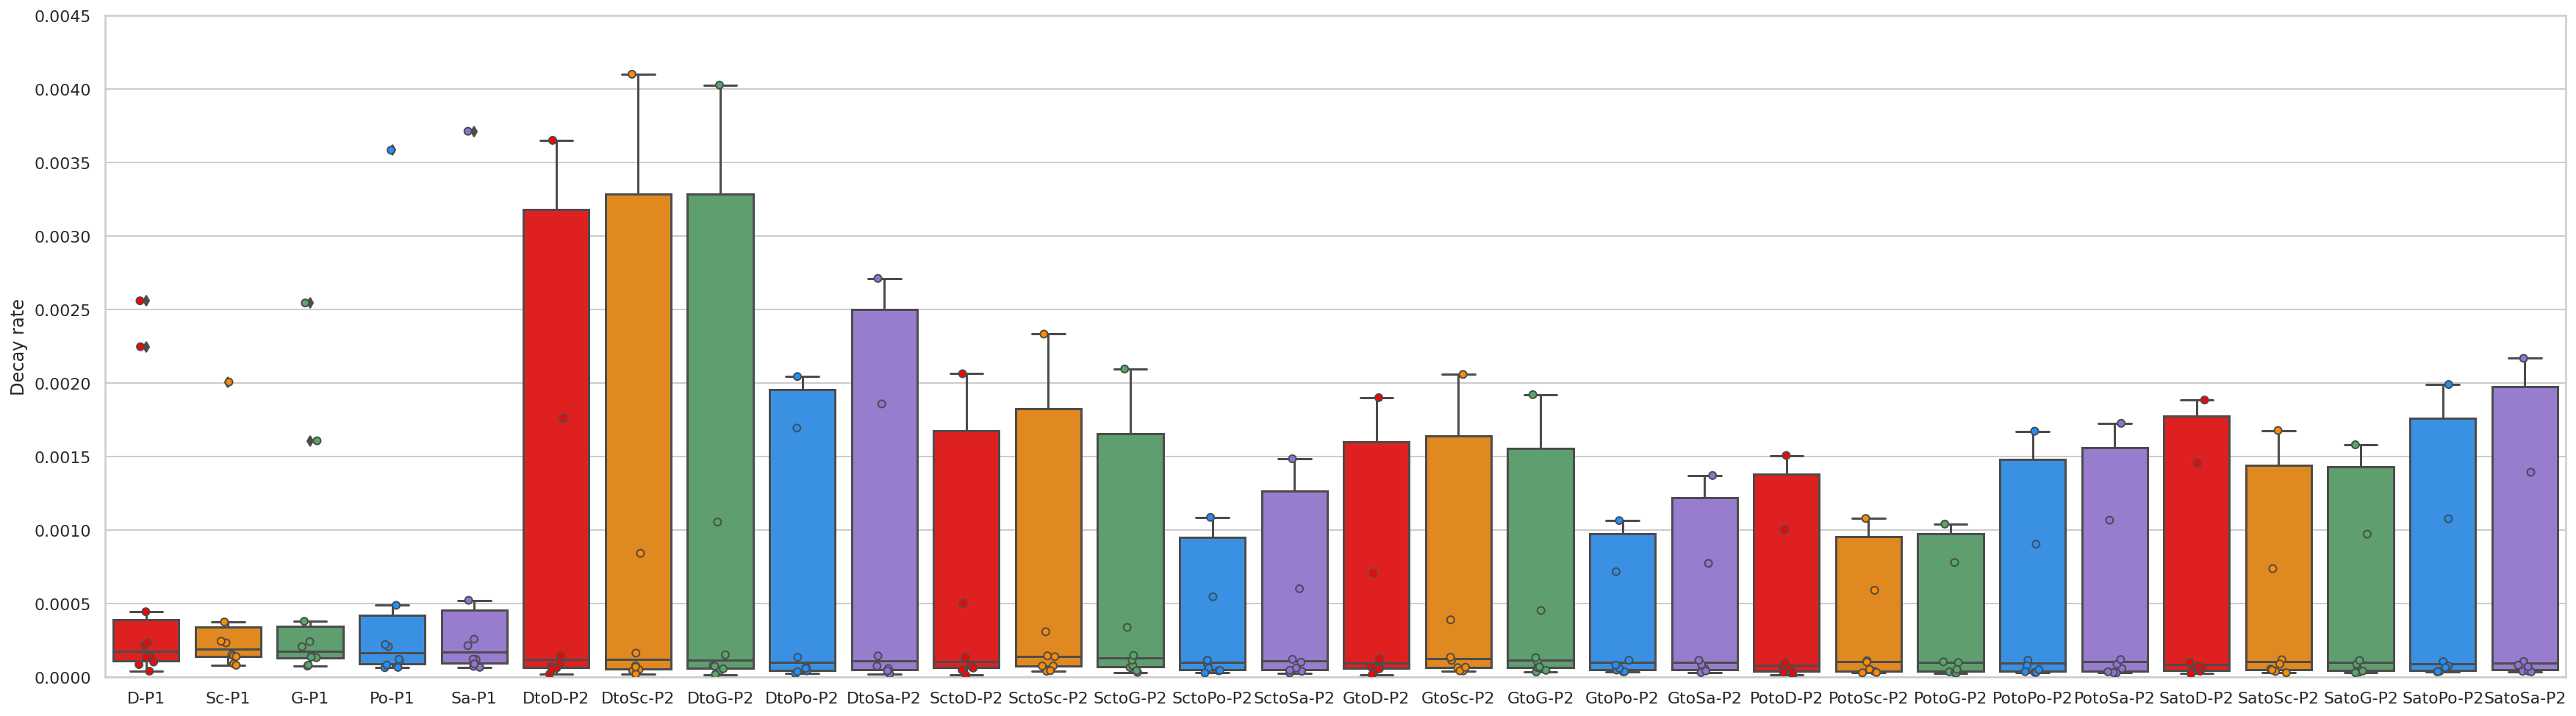

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(30,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple",
          "DtoD-P2":"red", "DtoSc-P2":"darkorange", "DtoG-P2":"g", "DtoPo-P2":"dodgerblue", "DtoSa-P2":"mediumpurple",
          "SctoD-P2":"red", "SctoSc-P2":"darkorange", "SctoG-P2":"g", "SctoPo-P2":"dodgerblue", "SctoSa-P2":"mediumpurple",
          "GtoD-P2":"red", "GtoSc-P2":"darkorange", "GtoG-P2":"g", "GtoPo-P2":"dodgerblue", "GtoSa-P2":"mediumpurple",
          "PotoD-P2":"red", "PotoSc-P2":"darkorange", "PotoG-P2":"g", "PotoPo-P2":"dodgerblue", "PotoSa-P2":"mediumpurple",
          "SatoD-P2":"red", "SatoSc-P2":"darkorange", "SatoG-P2":"g", "SatoPo-P2":"dodgerblue", "SatoSa-P2":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Decay rate')
ax.set_xlabel('')
ax.set(ylim=(0, 0.0045))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col3,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col28,col29,col30],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "decay"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[0],anov_df_T[13]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('decay ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

             sum_sq    df         F    PR(>F)
treatment  0.000065   1.0  1.752706  0.202105
Residual   0.000666  18.0       NaN       NaN


In [ ]:
anov_df

decay treatment  seed
0   0.000443      D-P1     1
1   0.000038      D-P1     2
2   0.000083      D-P1     3
3   0.000133      D-P1     4
4   0.000100      D-P1     5
5   0.000213      D-P1     6
6   0.002247      D-P1     7
7   0.000133      D-P1     8
8   0.002560      D-P1     9
9   0.000229      D-P1    10
10  0.000161  DtoSc-P2     1
11  0.000048  DtoSc-P2     2
12  0.000075  DtoSc-P2     3
13  0.000039  DtoSc-P2     4
14  0.000018  DtoSc-P2     5
15  0.004102  DtoSc-P2     6
16  0.014042  DtoSc-P2     7
17  0.000067  DtoSc-P2     8
18  0.022174  DtoSc-P2     9
19  0.000840  DtoSc-P2    10

# ***** Refaire Figure S3B (biomass) (phase I + phase II)

In [ ]:
# PHASE 1 AND PHASE 2
phase1 = pd.read_csv('221020_decay_results_combined.csv')
phase2 = pd.read_csv('221024_decay_results_combined.csv')
# Build dataframe
col1 = phase1.loc[phase1['litter'] == 'A']["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "D-P1"})
col2 = phase1.loc[phase1['litter'] == 'B']["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "Sc-P1"})
col3 = phase1.loc[phase1['litter'] == 'C']["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "G-P1"})
col4 = phase1.loc[phase1['litter'] == 'D']["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "Po-P1"})
col5 = phase1.loc[phase1['litter'] == 'E']["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "Sa-P1"})
# From D to all
col6 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "DtoD-P2"})
col7 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "DtoSc-P2"})
col8 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "DtoG-P2"})
col9 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "DtoPo-P2"})
col10 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "DtoSa-P2"})
# From Sc to all
col11 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "SctoD-P2"})
col12 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "SctoSc-P2"})
col13 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "SctoG-P2"})
col14 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "SctoPo-P2"})
col15 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "SctoSa-P2"})
# From G to all
col16 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "GtoD-P2"})
col17 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "GtoSc-P2"})
col18 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "GtoG-P2"})
col19 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "GtoPo-P2"})
col20 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "GtoSa-P2"})
# From Po to all
col21 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "PotoD-P2"})
col22 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "PotoSc-P2"})
col23 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "PotoG-P2"})
col24 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "PotoPo-P2"})
col25 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "PotoSa-P2"})
# From Sa to all
col26 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "SatoD-P2"})
col27 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "SatoSc-P2"})
col28 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "SatoG-P2"})
col29 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "SatoPo-P2"})
col30 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "SatoSa-P2"})
# Combine
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30],axis=1)
Table_for_plot

D-P1         Sc-P1          G-P1         Po-P1         Sa-P1  \
0   4625.574444   3594.734264   2811.864912   2641.619906   2655.603544   
1   2301.507165  28113.167426  11298.604946   2926.410678   4330.419648   
2   2888.473787   2957.264047   3536.332279   2980.717831   2605.631690   
3   2977.321318  13071.378168  17012.513882   2498.222805   2740.722448   
4   2642.075848   3279.168578   2682.721106   4225.309682   2957.799131   
5   4108.317153   4147.506991   3032.905295   2672.204632   2933.412925   
6  15480.674579   2551.514218   3326.683291  18976.618866  52527.938734   
7   2741.864773   2880.978691   3982.454428   2148.583016   4368.038912   
8  16506.609033   2755.537851   2548.411847  53473.485303  19855.456999   
9   3483.361236   3028.521955   2857.254728   4066.723230   2283.679777   

         DtoD-P2       DtoSc-P2        DtoG-P2       DtoPo-P2       DtoSa-P2  \
0     923.967845    1535.934789    1070.304918  192662.632239    1358.363293   
1  102994.949415     887.985227   12163.041347   15200.846418     726.293493   
2   16033.527676    1123.284152     692.607401  118484.508722  120236.644947   
3  160839.193612    1138.276124     869.254466     632.943074   16421.861829   
4    1392.629229     711.647925    1116.146569    1241.322647  194421.200612   
5     864.839068   11817.507894    1510.239879     662.024148    1154.808823   
6   14448.098999  134294.165866   10404.393751    6675.537868     890.720880   
7     722.930899     938.038282  147052.328140     969.860633    8439.154730   
8    1211.281556  165360.440984     958.418361    1040.932847     673.428389   
9    1615.644435    8325.781926  104517.668254     856.935247    1062.860616   

   ...       PotoD-P2      PotoSc-P2       PotoG-P2      PotoPo-P2  \
0  ...    1016.169635     607.429199    1072.959956    3569.253302   
1  ...     881.140367   87510.936142  127779.069516     763.435118   
2  ...     679.221533    5999.977649    7811.704828    1108.979424   
3  ...    4767.207172    1060.081863   83040.538542     876.939368   
4  ...     967.203408  140099.755128     584.115999     881.079348   
5  ...   93392.926997    1331.770450     988.119561    1097.980657   
6  ...    1168.789302     825.873677     804.994512   14748.314852   
7  ...     531.281675     975.489901    3979.239252  187340.230260   
8  ...  152660.479759    3912.912606    1261.280978     578.000972   
9  ...   13587.934161     774.831878     836.647298  118866.845685   

       PotoSa-P2       SatoD-P2      SatoSc-P2       SatoG-P2      SatoPo-P2  \
0     909.209081  156024.507582    5462.742913     931.473523     594.470519   
1    1113.048972   16471.525147    1104.023072    1272.289121  119064.589142   
2     755.559649   94172.070775     907.005882     929.086130   17131.193432   
3    3941.865783     580.341329    1033.537221    5441.123159  189339.557408   
4     932.760169    1050.964106     842.250334    1002.445091     983.423898   
5    1120.205047     788.878511    1240.210262    1139.243534    1070.466445   
6  120007.929473    6386.161820    7084.305040   84434.016641    1055.553364   
7     570.179360     927.382601  140299.807661     618.388951     958.811770   
8  185056.117432    1157.577849     675.436809  129628.753046    3950.977897   
9   15186.832468    1129.096854   89330.424083    9274.471639     903.343944   

       SatoSa-P2  
0    1015.515987  
1  187517.835623  
2   18455.251994  
3  120973.252530  
4     587.774421  
5    1008.455903  
6     898.186146  
7    4841.173948  
8    1066.187078  
9    1066.371563  

[10 rows x 30 columns]

[(0.0, 19000.0)]

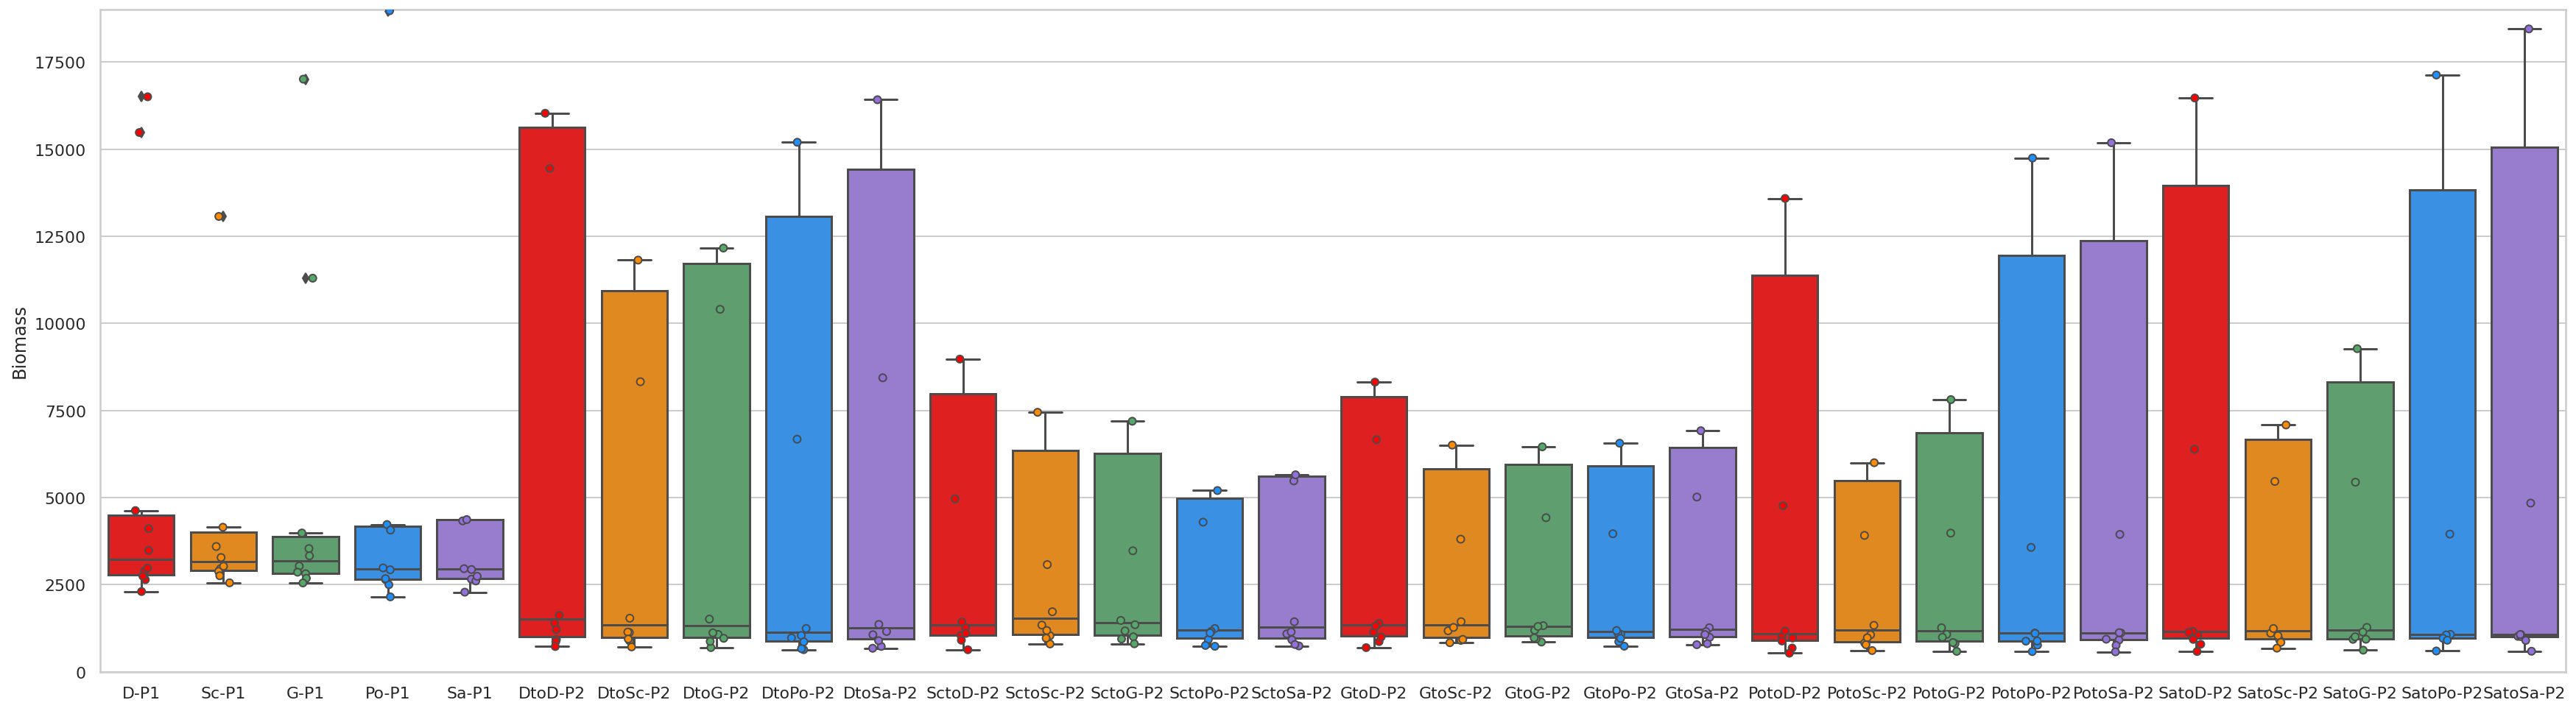

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(30,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple",
          "DtoD-P2":"red", "DtoSc-P2":"darkorange", "DtoG-P2":"g", "DtoPo-P2":"dodgerblue", "DtoSa-P2":"mediumpurple",
          "SctoD-P2":"red", "SctoSc-P2":"darkorange", "SctoG-P2":"g", "SctoPo-P2":"dodgerblue", "SctoSa-P2":"mediumpurple",
          "GtoD-P2":"red", "GtoSc-P2":"darkorange", "GtoG-P2":"g", "GtoPo-P2":"dodgerblue", "GtoSa-P2":"mediumpurple",
          "PotoD-P2":"red", "PotoSc-P2":"darkorange", "PotoG-P2":"g", "PotoPo-P2":"dodgerblue", "PotoSa-P2":"mediumpurple",
          "SatoD-P2":"red", "SatoSc-P2":"darkorange", "SatoG-P2":"g", "SatoPo-P2":"dodgerblue", "SatoSa-P2":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
ax.set_ylabel('Biomass')
ax.set_xlabel('')
ax.set(ylim=(0, 19000))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col3,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col28,col29,col30],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "biomass"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[0],anov_df_T[13]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('biomass ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                 sum_sq    df         F    PR(>F)
treatment  3.410373e+09   1.0  1.622067  0.219005
Residual   3.784474e+10  18.0       NaN       NaN


# ***** Figure: GR PD = f(Ntot_0-N_PD)

In [ ]:
# BETWEEN YEAR 3 AND DAY 0
# ALL TOGETHER
table_phase1_t0 = pd.read_csv('specialists_t0_combined_22040201.csv')
table_phase1_year1 = pd.read_csv('specialists_year1_combined_22040201.csv')
table_phase1_year2 = pd.read_csv('specialists_year2_combined_22040201.csv')
table_phase1_year3 = pd.read_csv('specialists_year3_combined_22040201.csv')
table_phase2_t0 = pd.read_csv('specialists_t0_combined_22032203.csv')
table_phase2_year1 = pd.read_csv('specialists_year1_combined_22032203.csv')
table_phase2_year2 = pd.read_csv('specialists_year2_combined_22032203.csv')
table_phase2_year3 = pd.read_csv('specialists_year3_combined_22032203.csv')
table_phase1_t0_Ntot0 = pd.read_csv('specialists_t0_combined_22040801.csv')
table_phase2_t0_Ntot0 = pd.read_csv('specialists_t0_combined_22040802.csv')
table_phase2_t0_2_Ntot0 = pd.read_csv('specialists_t0_combined_22040803.csv')
# PHASE 1
# RANDOM COMMUNITIES IN DESERT LITTER 
col10 = table_phase1_t0.loc[(table_phase1_t0["substrate"] == 'Protein3') & (table_phase1_t0["litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col10.set_index(['treatment_name'], inplace=True) 
col1 = col10.rename(columns={"biomass_decomp_t0": "N0"})
col20 = table_phase1_year3.loc[(table_phase1_year3["substrate"] == 'Protein3')& (table_phase1_year3["litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col20.set_index(['treatment_name'], inplace=True) 
col2 = col20.rename(columns={"biomass_specialist_year": "Nmean"})
col30 = table_phase1_t0_Ntot0.loc[(table_phase1_t0_Ntot0["substrate"] == 'Protein3') & (table_phase1_t0_Ntot0["litter"] == 'A'),["microbe_biomass_t0","treatment_name"]]
col30.set_index(['treatment_name'], inplace=True) 
col3 = col30.rename(columns={"microbe_biomass_t0": "Ntot0"})
Table_for_plot_1 = pd.concat([col1['N0'], col2['Nmean'], col3['Ntot0']], axis=1)
# PHASE 2
# PINE OAK COMMUNITIES IN DESERT LITTER
# NO INVADERS
col40 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["residents"] == 'ResD') & (table_phase2_t0["invaders"] == 'NoInv') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col40.set_index(['treatment_name'], inplace=True) 
col4 = col40.rename(columns={"biomass_decomp_t0": "N0"})
col50 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["residents"] == 'ResD') & (table_phase2_year3["invaders"] == 'NoInv') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col50.set_index(['treatment_name'], inplace=True) 
col5 = col50.rename(columns={"biomass_specialist_year": "Nmean"})
col60 = table_phase2_t0_Ntot0.loc[(table_phase2_t0_Ntot0["substrate"] == 'Protein3') & (table_phase2_t0_Ntot0["residents"] == 'ResD') & (table_phase2_t0_Ntot0["invaders"] == 'NoInv') & (table_phase2_t0_Ntot0["final_litter"] == 'A'),["microbe_biomass_t0","treatment_name"]]
col60.set_index(['treatment_name'], inplace=True) 
col6 = col60.rename(columns={"microbe_biomass_t0": "Ntot0"})
Table_for_plot_2 = pd.concat([col4['N0'], col5['Nmean'], col6['Ntot0']], axis=1)
# PHASE 2
# PINE OAK COMMUNITIES IN DESERT LITTER
# INVADERS FROM DESERT COMMUNITIES
col70 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["invaders"] == 'InvA') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col70.set_index(['treatment_name'], inplace=True) 
col7 = col70.rename(columns={"biomass_decomp_t0": "N0"})
col80 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["invaders"] == 'InvA') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col80.set_index(['treatment_name'], inplace=True) 
col8 = col80.rename(columns={"biomass_specialist_year": "Nmean"})
col90 = table_phase2_t0_2_Ntot0.loc[(table_phase2_t0_2_Ntot0["substrate"] == 'Protein3') & (table_phase2_t0_2_Ntot0["invaders"] == 'InvA') & (table_phase2_t0_2_Ntot0["final_litter"] == 'A'),["microbe_biomass_t0","treatment_name"]]
col90.set_index(['treatment_name'], inplace=True) 
col9 = col90.rename(columns={"microbe_biomass_t0": "Ntot0"})
Table_for_plot_3 = pd.concat([col7['N0'], col8['Nmean'], col9['Ntot0']], axis=1)
# PHASE 2
# SCRUBLAND COMMUNITIES IN DESERT LITTER
# NO INVADERS
col100 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["residents"] == 'ResB') & (table_phase2_t0["invaders"] == 'NoInv') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col100.set_index(['treatment_name'], inplace=True) 
col10 = col100.rename(columns={"biomass_decomp_t0": "N0"})
col110 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["residents"] == 'ResB') & (table_phase2_year3["invaders"] == 'NoInv') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col110.set_index(['treatment_name'], inplace=True) 
col11 = col110.rename(columns={"biomass_specialist_year": "Nmean"})
col120 = table_phase2_t0_2_Ntot0.loc[(table_phase2_t0_2_Ntot0["substrate"] == 'Protein3') & (table_phase2_t0_2_Ntot0["residents"] == 'ResB') & (table_phase2_t0_2_Ntot0["invaders"] == 'NoInv') & (table_phase2_t0_2_Ntot0["final_litter"] == 'A'),["microbe_biomass_t0","treatment_name"]]
col120.set_index(['treatment_name'], inplace=True) 
col12 = col120.rename(columns={"microbe_biomass_t0": "Ntot0"})
Table_for_plot_4 = pd.concat([col10['N0'], col11['Nmean'], col12['Ntot0']], axis=1)
# concat
table_merge = pd.concat([Table_for_plot_1,Table_for_plot_2,Table_for_plot_3,Table_for_plot_4],axis=0)
# add linear growth rate (sachant que time = 3 years = 1095 days) 
table_merge['linear_growth_rate'] = (table_merge['Nmean'] - table_merge['N0']) / 1095
table_merge['exp_growth_rate'] = np.log( table_merge['Nmean'] / table_merge['N0'] ) / 1095
table_merge['Ntot0_nonPD'] = table_merge['Ntot0'] - table_merge['N0']

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
max(table_merge['Ntot0_nonPD'])

49063.923010694845

In [ ]:
max(table_merge['Ntot0'])

49314.48529053066

intercept = -0.053025434658148574
slope = [3.21849478e-05]


Text(0, 0.5, 'Growth rate (linear wrt time) of protein degraders')

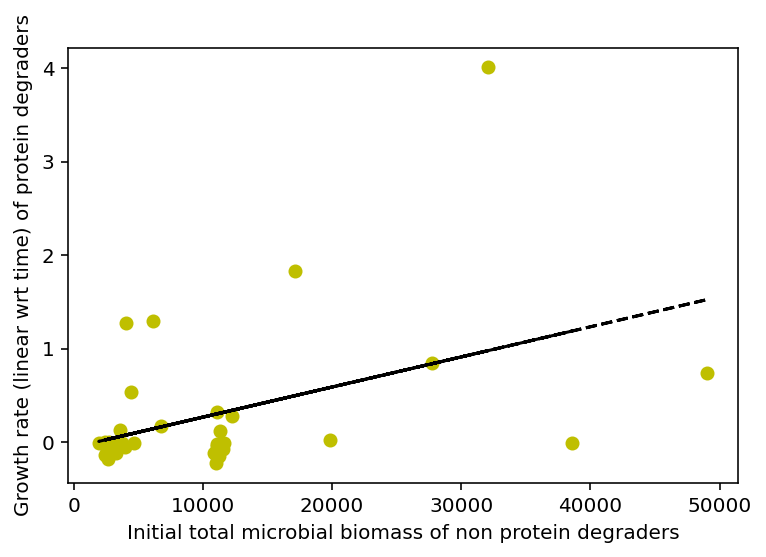

In [ ]:
# Figure 3b: Try with a linear
# Plot


from sklearn.linear_model import LinearRegression
import numpy as np

x = np.array(table_merge['Ntot0_nonPD']).reshape(-1, 1)
y = np.array(table_merge['linear_growth_rate'])

lm = LinearRegression()
lm.fit(x, y)

print('intercept =', lm.intercept_)
print('slope =',lm.coef_)

# PLOT
x = np.array(table_merge['Ntot0_nonPD'])
y = np.array(table_merge['linear_growth_rate'])

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
plt.xlabel("Initial total microbial biomass of non protein degraders")
plt.ylabel("Growth rate (linear wrt time) of protein degraders")

In [ ]:
# R2 = 0.21 (not good)
import numpy as np
import statsmodels.api as sm

x = [np.array(table_merge['Ntot0_nonPD'])]
y = np.array(table_merge['linear_growth_rate'])

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     9.780
Date:                Wed, 15 Jun 2022   Prob (F-statistic):            0.00338
Time:                        17:50:49   Log-Likelihood:                -40.375
No. Observations:                  40   AIC:                             84.75
Df Residuals:                      38   BIC:                             88.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.218e-05   1.03e-05      3.127      0.0

# ***** Refaire Figure 5

In [ ]:
# BETWEEN YEAR 3 AND DAY 0
# ALL TOGETHER
table_phase1_t0 = pd.read_csv('specialists_t0_combined_22040201.csv')
table_phase1_year1 = pd.read_csv('specialists_year1_combined_22040201.csv')
table_phase1_year2 = pd.read_csv('specialists_year2_combined_22040201.csv')
table_phase1_year3 = pd.read_csv('specialists_year3_combined_22040201.csv')
table_phase2_t0 = pd.read_csv('specialists_t0_combined_22032203.csv')
table_phase2_year1 = pd.read_csv('specialists_year1_combined_22032203.csv')
table_phase2_year2 = pd.read_csv('specialists_year2_combined_22032203.csv')
table_phase2_year3 = pd.read_csv('specialists_year3_combined_22032203.csv')
table_phase1_t0_Ntot0 = pd.read_csv('specialists_t0_combined_22040801.csv')
table_phase2_t0_Ntot0 = pd.read_csv('specialists_t0_combined_22040802.csv')
table_phase2_t0_2_Ntot0 = pd.read_csv('specialists_t0_combined_22040803.csv')
# PHASE 1
# RANDOM COMMUNITIES IN DESERT LITTER 
col10 = table_phase1_t0.loc[(table_phase1_t0["substrate"] == 'Protein3') & (table_phase1_t0["litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col10.set_index(['treatment_name'], inplace=True) 
col1 = col10.rename(columns={"biomass_decomp_t0": "N0"})
col20 = table_phase1_year3.loc[(table_phase1_year3["substrate"] == 'Protein3')& (table_phase1_year3["litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col20.set_index(['treatment_name'], inplace=True) 
col2 = col20.rename(columns={"biomass_specialist_year": "Nmean"})
col30 = table_phase1_t0_Ntot0.loc[(table_phase1_t0_Ntot0["substrate"] == 'Protein3') & (table_phase1_t0_Ntot0["litter"] == 'A'),["microbe_biomass_t0","treatment_name"]]
col30.set_index(['treatment_name'], inplace=True) 
col3 = col30.rename(columns={"microbe_biomass_t0": "Ntot0"})
Table_for_plot_1 = pd.concat([col1['N0'], col2['Nmean'], col3['Ntot0']], axis=1)
# PHASE 2
# PINE OAK COMMUNITIES IN DESERT LITTER
# NO INVADERS
col40 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["residents"] == 'ResD') & (table_phase2_t0["invaders"] == 'NoInv') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col40.set_index(['treatment_name'], inplace=True) 
col4 = col40.rename(columns={"biomass_decomp_t0": "N0"})
col50 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["residents"] == 'ResD') & (table_phase2_year3["invaders"] == 'NoInv') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col50.set_index(['treatment_name'], inplace=True) 
col5 = col50.rename(columns={"biomass_specialist_year": "Nmean"})
col60 = table_phase2_t0_Ntot0.loc[(table_phase2_t0_Ntot0["substrate"] == 'Protein3') & (table_phase2_t0_Ntot0["residents"] == 'ResD') & (table_phase2_t0_Ntot0["invaders"] == 'NoInv') & (table_phase2_t0_Ntot0["final_litter"] == 'A'),["microbe_biomass_t0","treatment_name"]]
col60.set_index(['treatment_name'], inplace=True) 
col6 = col60.rename(columns={"microbe_biomass_t0": "Ntot0"})
Table_for_plot_2 = pd.concat([col4['N0'], col5['Nmean'], col6['Ntot0']], axis=1)
# PHASE 2
# PINE OAK COMMUNITIES IN DESERT LITTER
# INVADERS FROM DESERT COMMUNITIES
col70 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["invaders"] == 'InvA') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col70.set_index(['treatment_name'], inplace=True) 
col7 = col70.rename(columns={"biomass_decomp_t0": "N0"})
col80 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["invaders"] == 'InvA') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col80.set_index(['treatment_name'], inplace=True) 
col8 = col80.rename(columns={"biomass_specialist_year": "Nmean"})
col90 = table_phase2_t0_2_Ntot0.loc[(table_phase2_t0_2_Ntot0["substrate"] == 'Protein3') & (table_phase2_t0_2_Ntot0["invaders"] == 'InvA') & (table_phase2_t0_2_Ntot0["final_litter"] == 'A'),["microbe_biomass_t0","treatment_name"]]
col90.set_index(['treatment_name'], inplace=True) 
col9 = col90.rename(columns={"microbe_biomass_t0": "Ntot0"})
Table_for_plot_3 = pd.concat([col7['N0'], col8['Nmean'], col9['Ntot0']], axis=1)
# PHASE 2
# SCRUBLAND COMMUNITIES IN DESERT LITTER
# NO INVADERS
col100 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["residents"] == 'ResB') & (table_phase2_t0["invaders"] == 'NoInv') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col100.set_index(['treatment_name'], inplace=True) 
col10 = col100.rename(columns={"biomass_decomp_t0": "N0"})
col110 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["residents"] == 'ResB') & (table_phase2_year3["invaders"] == 'NoInv') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col110.set_index(['treatment_name'], inplace=True) 
col11 = col110.rename(columns={"biomass_specialist_year": "Nmean"})
col120 = table_phase2_t0_2_Ntot0.loc[(table_phase2_t0_2_Ntot0["substrate"] == 'Protein3') & (table_phase2_t0_2_Ntot0["residents"] == 'ResB') & (table_phase2_t0_2_Ntot0["invaders"] == 'NoInv') & (table_phase2_t0_2_Ntot0["final_litter"] == 'A'),["microbe_biomass_t0","treatment_name"]]
col120.set_index(['treatment_name'], inplace=True) 
col12 = col120.rename(columns={"microbe_biomass_t0": "Ntot0"})
Table_for_plot_4 = pd.concat([col10['N0'], col11['Nmean'], col12['Ntot0']], axis=1)
# concat
table_merge = pd.concat([Table_for_plot_1,Table_for_plot_2,Table_for_plot_3,Table_for_plot_4],axis=0)
# add linear growth rate (sachant que time = 3 years = 1095 days) 
table_merge['linear_growth_rate'] = (table_merge['Nmean'] - table_merge['N0']) / 1095
table_merge['exp_growth_rate'] = np.log( table_merge['Nmean'] / table_merge['N0'] ) / 1095
table_merge

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


N0        Nmean         Ntot0  linear_growth_rate  \
treatment_name                                                               
phase1A7         100.000000    91.573872  11760.504883           -0.007695   
phase1A10        368.000000   207.552654  11640.707031           -0.146527   
phase1A1         107.000000    26.647713  11626.868164           -0.073381   
phase1A6         368.000000   673.810022  12624.242188            0.279279   
phase1A4         355.000000   314.538594  11436.161133           -0.036951   
phase1A8         444.000000   203.296270  11467.171875           -0.219821   
phase1A9         201.000000   333.461097  11552.221680            0.120969   
phase1A2         437.000000   316.929200  11257.676758           -0.109654   
phase1A3         203.000000   553.413476  11305.454102            0.320012   
phase1A5         438.000000   413.914439  11533.433594           -0.021996   
phase2AD05       122.023042   147.183631  19987.421594            0.022978   
phase2AD01         0.000000     0.000000   2415.227233            0.000000   
phase2AD08        53.525832    37.032206   2521.308518           -0.015063   
phase2AD03         2.894301     0.000000  38570.335108           -0.002643   
phase2AD010      187.134923   121.874773   2844.324336           -0.059598   
phase2AD06       266.828880   860.387821   4676.332371            0.542063   
phase2AD07        46.931705    48.580810   2769.199576            0.001506   
phase2AD02        52.857861    47.524482   1980.783521           -0.004871   
phase2AD04        19.574948     6.651696   4652.433697           -0.011802   
phase2AD09       146.089113   123.487520   2487.308614           -0.020641   
phase2ADA6       717.664500  2139.807187   6878.119383            1.298760   
phase2ADA10      192.787082   133.644775   4172.055317           -0.054011   
phase2ADA8       120.602255    75.681462   3830.054225           -0.041024   
phase2ADA5       346.773686  1278.713811  28067.742623            0.851087   
phase2ADA3       250.562280  1066.882489  49314.485291            0.745498   
phase2ADA9       363.614186   235.800356   3649.748197           -0.116725   
phase2ADA7        89.363691    84.087646   3792.962098           -0.004818   
phase2ADA4       171.743584   357.910588   6923.108510            0.170016   
phase2ADA1         7.098205     0.000000   3373.491745           -0.006482   
phase2ADA2       166.562954    84.975743   3174.557628           -0.074509   
phase2AB07        69.784128    66.172861   2969.346219           -0.003298   
phase2AB04       302.498432   443.329721   3916.434473            0.128613   
phase2AB02       353.213126   156.578640   2994.232063           -0.179575   
phase2AB05       796.738924  2800.326737  17932.245270            1.829761   
phase2AB09       359.008132   210.846336   2748.772587           -0.135308   
phase2AB08       200.438224    85.900535   2896.700047           -0.104601   
phase2AB03      1280.411525  5667.279350  33375.544421            4.006272   
phase2AB06       751.786300  2149.292083   4754.682799            1.276261   
phase2AB010      201.436617   163.446019   3383.991538           -0.034695   
phase2AB01        35.592130     2.378783   2438.429365           -0.030332   

                exp_growth_rate  
treatment_name                   
phase1A7              -0.000080  
phase1A10             -0.000523  
phase1A1              -0.001270  
phase1A6               0.000552  
phase1A4              -0.000111  
phase1A8              -0.000713  
phase1A9               0.000462  
phase1A2              -0.000293  
phase1A3               0.000916  
phase1A5              -0.000052  
phase2AD05             0.000171  
phase2AD01                  NaN  
phase2AD08            -0.000336  
phase2AD03                 -inf  
phase2AD010           -0.000392  
phase2AD06             0.001069  
phase2AD07             0.000032  
phase2AD02            -0.000097  
phase2AD04            -0.000986  
phase2AD09            -0.000153  


array([-0.42390045,  0.31567277,  0.00208277])

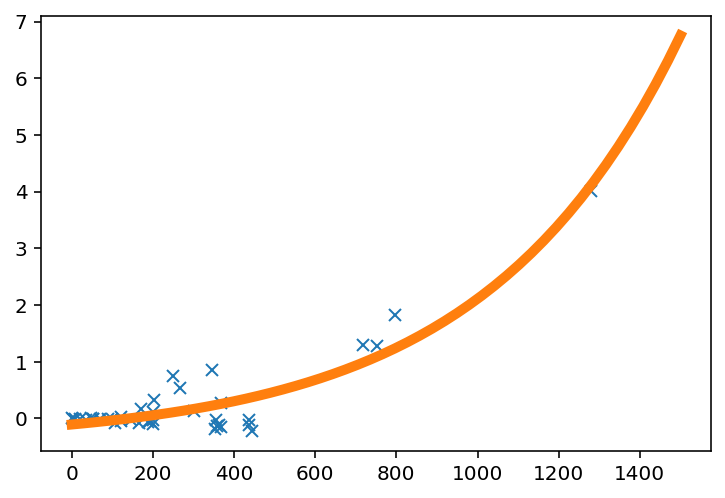

In [ ]:
# Figure 3a
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a + b*np.exp(c*x)

x = np.array(table_merge['N0'])
y = np.array(table_merge['linear_growth_rate'])

popt, pcov = curve_fit(func, x, y, p0=[0, 0.5, 0.001], maxfev=10000)

plt.plot(x, y, 'x')
xx = np.linspace(0, 1500, 50)
yy = func(xx, *popt)
plt.plot(xx, yy, lw=5)

popt

0.8601680737179622


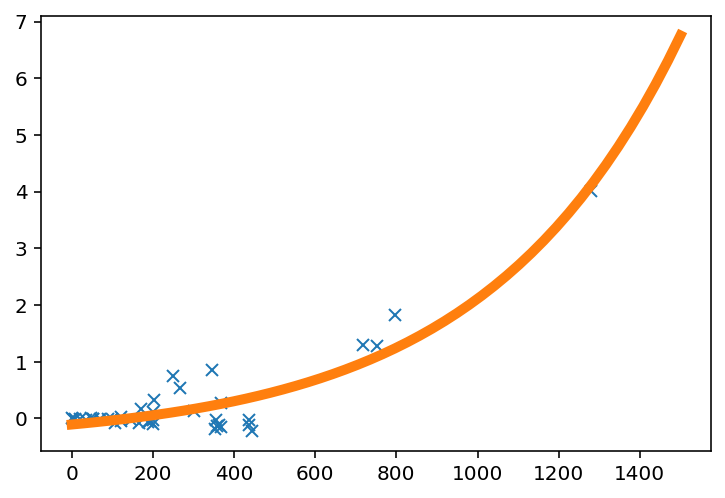

In [ ]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a + b*np.exp(c*x)

x = np.array(table_merge['N0'])
y = np.array(table_merge['linear_growth_rate'])

popt, pcov = curve_fit(func, x, y, p0=[-1.5, 1.5, 0.001], maxfev=5000)

plt.plot(x, y, 'x')
xx = np.linspace(0, 1500, 50)
yy = func(xx, *popt)
plt.plot(xx, yy, lw=5)

residuals = y - func(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)

print(r_squared)

In [ ]:
# R2
import numpy as np
import statsmodels.api as sm

x = [np.array(table_merge['N0'])]
y = np.array(table_merge['linear_growth_rate'])

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     78.24
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           9.21e-11
Time:                        17:24:17   Log-Likelihood:                -22.595
No. Observations:                  40   AIC:                             49.19
Df Residuals:                      38   BIC:                             52.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0024      0.000      8.845      0.0

intercept = -0.0707668558446038
slope = [3.31225746e-05]


Text(0, 0.5, 'Growth rate (linear wrt time) of protein degraders')

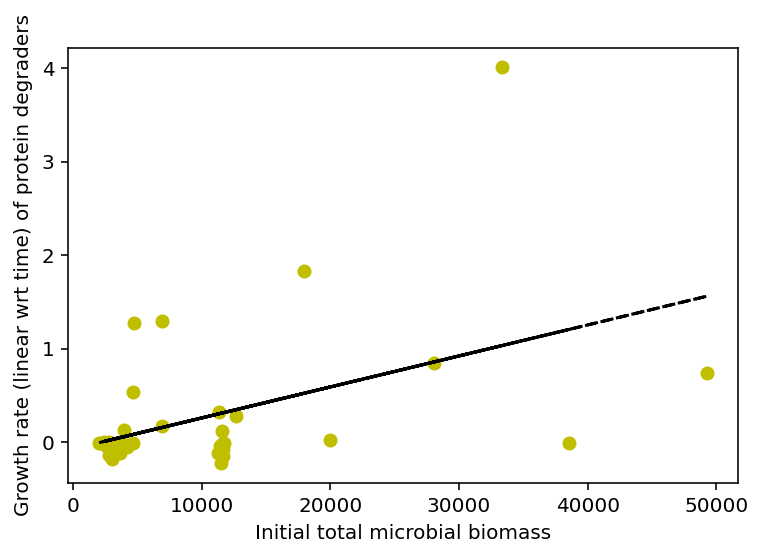

In [ ]:
# Figure 3b: Try with a linear
# Plot
from sklearn.linear_model import LinearRegression
import numpy as np

x = np.array(table_merge['Ntot0']).reshape(-1, 1)
y = np.array(table_merge['linear_growth_rate'])

lm = LinearRegression()
lm.fit(x, y)

print('intercept =', lm.intercept_)
print('slope =',lm.coef_)

# PLOT
x = np.array(table_merge['Ntot0'])
y = np.array(table_merge['linear_growth_rate'])

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
plt.xlabel("Initial total microbial biomass")
plt.ylabel("Growth rate (linear wrt time) of protein degraders")

In [ ]:
# R2 = 0.22 (not good)
import numpy as np
import statsmodels.api as sm

x = [np.array(table_merge['Ntot0'])]
y = np.array(table_merge['linear_growth_rate'])

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     10.71
Date:                Fri, 10 Jun 2022   Prob (F-statistic):            0.00227
Time:                        21:59:57   Log-Likelihood:                -39.988
No. Observations:                  40   AIC:                             83.98
Df Residuals:                      38   BIC:                             87.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.312e-05   1.01e-05      3.273      0.0

-363719592224.4462


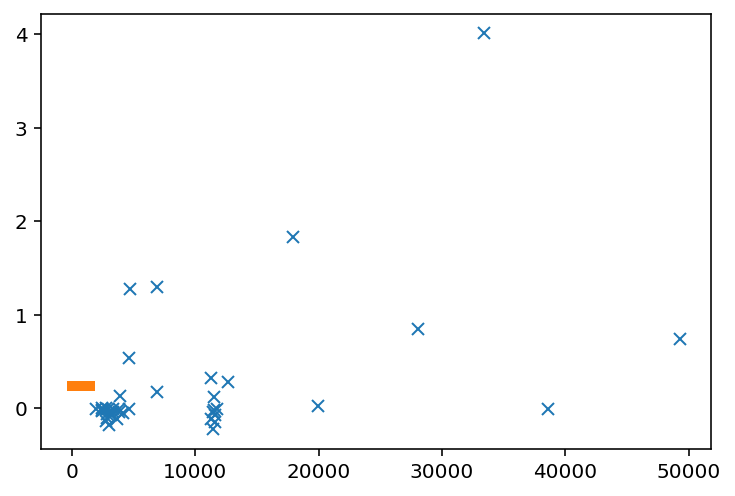

In [ ]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a + b*np.exp(c*x)

x = np.array(table_merge['Ntot0'])
y = np.array(table_merge['linear_growth_rate'])

popt, pcov = curve_fit(func, x, y, p0=[-1.5, 1.5, 0.001], maxfev=5000)

plt.plot(x, y, 'x')
xx = np.linspace(0, 1500, 50)
yy = func(xx, *popt)
plt.plot(xx, yy, lw=5)

residuals = y - func(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)

print(r_squared)

# ***** Do I get the same strong correlations between GR and total initial biomass (N0_tot)?

In [ ]:
# BETWEEN YEAR 3 AND DAY 0 
# PHASE 1
# RANDOM COMMUNITIES IN DESERT LITTER
table_phase1_t0 = pd.read_csv('specialists_t0_combined_22040801.csv')
table_phase1_year3 = pd.read_csv('specialists_year3_combined_22040201.csv')
# PHASE 1
# RANDOM COMMUNITIES IN DESERT LITTER 
col10 = table_phase1_t0.loc[(table_phase1_t0["substrate"] == 'Protein3') & (table_phase1_t0["litter"] == 'A'),["microbe_biomass_t0","treatment_name"]]
col10.set_index(['treatment_name'], inplace=True) 
col1 = col10.rename(columns={"microbe_biomass_t0": "Ntot0"})
col20 = table_phase1_year3.loc[(table_phase1_year3["substrate"] == 'Protein3')& (table_phase1_year3["litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col20.set_index(['treatment_name'], inplace=True) 
col2 = col20.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_1 = pd.concat([col1['N0'], col2['Nmean']], axis=1)
# add linear growth rate (sachant que time = 3 years = 1095 days) 
table_merge = Table_for_plot_1
table_merge['linear_growth_rate'] = (table_merge['Nmean'] - table_merge['N0']) / 1095
table_merge['exp_growth_rate'] = np.log( table_merge['Nmean'] / table_merge['N0'] ) / 1095

In [ ]:
# PHASE 2
# PINE OAK COMMUNITIES IN DESERT LITTER
# NO INVADERS
table_phase2_t0 = pd.read_csv('specialists_t0_combined_22040802.csv')
table_phase2_year3 = pd.read_csv('specialists_year3_combined_22032203.csv')
# year 1 of phase 2 without invaders
col30 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["residents"] == 'ResD') & (table_phase2_t0["invaders"] == 'NoInv') & (table_phase2_t0["final_litter"] == 'A'),["microbe_biomass_t0","treatment_name"]]
col30.set_index(['treatment_name'], inplace=True) 
col3 = col30.rename(columns={"microbe_biomass_t0": "Ntot0"})
col40 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["residents"] == 'ResD') & (table_phase2_year3["invaders"] == 'NoInv') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col40.set_index(['treatment_name'], inplace=True) 
col4 = col40.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_2 = pd.concat([col3['N0'], col4['Nmean']], axis=1)
# add linear growth rate (sachant que time = 3 years = 1095 days) 
table_merge = Table_for_plot_2
table_merge['linear_growth_rate'] = (table_merge['Nmean'] - table_merge['N0']) / 1095
table_merge['exp_growth_rate'] = np.log( table_merge['Nmean'] / table_merge['N0'] ) / 1095

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# PHASE 2
# PINE OAK COMMUNITIES IN DESERT LITTER
# INVADERS FROM DESERT COMMUNITIES
table_phase2_t0 = pd.read_csv('specialists_t0_combined_22040803.csv')
table_phase2_year3 = pd.read_csv('specialists_year3_combined_22032203.csv')
# year 1 of phase 2 with invaders
col50 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["invaders"] == 'InvA') & (table_phase2_t0["final_litter"] == 'A'),["microbe_biomass_t0","treatment_name"]]
col50.set_index(['treatment_name'], inplace=True) 
col5 = col50.rename(columns={"microbe_biomass_t0": "N0"})
col60 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["invaders"] == 'InvA') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col60.set_index(['treatment_name'], inplace=True) 
col6 = col60.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_3 = pd.concat([col5['N0'], col6['Nmean']], axis=1)
# add linear growth rate (sachant que time = 3 years = 1095 days) 
table_merge = Table_for_plot_3
table_merge['linear_growth_rate'] = (table_merge['Nmean'] - table_merge['N0']) / 1095
table_merge['exp_growth_rate'] = np.log( table_merge['Nmean'] / table_merge['N0'] ) / 1095

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# PHASE 2
# SCRUBLAND COMMUNITIES IN DESERT LITTER
# NO INVADERS
table_phase2_t0 = pd.read_csv('specialists_t0_combined_22040803.csv')
table_phase2_year3 = pd.read_csv('specialists_year3_combined_22032203.csv')
# year 1 of phase 2 without invaders
col70 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["residents"] == 'ResB') & (table_phase2_t0["invaders"] == 'NoInv') & (table_phase2_t0["final_litter"] == 'A'),["microbe_biomass_t0","treatment_name"]]
col70.set_index(['treatment_name'], inplace=True) 
col7 = col70.rename(columns={"microbe_biomass_t0": "N0"})
col80 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["residents"] == 'ResB') & (table_phase2_year3["invaders"] == 'NoInv') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col80.set_index(['treatment_name'], inplace=True) 
col8 = col80.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_4 = pd.concat([col7['N0'], col8['Nmean']], axis=1)
# concat
table_merge = Table_for_plot_4
# add linear growth rate (sachant que time = 3 years = 1095 days) 
table_merge['linear_growth_rate'] = (table_merge['Nmean'] - table_merge['N0']) / 1095
table_merge['exp_growth_rate'] = np.log( table_merge['Nmean'] / table_merge['N0'] ) / 1095

intercept = -1.7622899595689532
slope = [-0.00073695]


Text(0, 0.5, 'Growth rate (linear wrt time) of protein degraders')

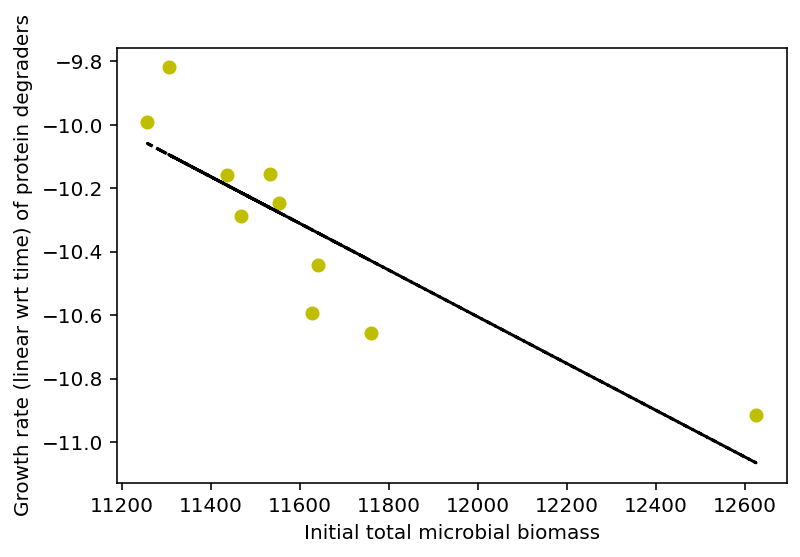

In [ ]:
# Plot
from sklearn.linear_model import LinearRegression
import numpy as np

x = np.array(table_merge['N0']).reshape(-1, 1)
y = np.array(table_merge['linear_growth_rate'])

lm = LinearRegression()
lm.fit(x, y)

print('intercept =', lm.intercept_)
print('slope =',lm.coef_)

# PLOT
x = np.array(table_merge['N0'])
y = np.array(table_merge['linear_growth_rate'])

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
plt.xlabel("Initial total microbial biomass")
plt.ylabel("Growth rate (linear wrt time) of protein degraders")

In [ ]:
# Multiple regression linear model
import numpy as np
import statsmodels.api as sm

x = [np.array(table_merge['N0'])]
y = np.array(table_merge['linear_growth_rate'])

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

print(reg_m(y, x).summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1959.
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           7.49e-11
Time:                        17:57:44   Log-Likelihood:                -6.4844
No. Observations:                  10   AIC:                             16.97
Df Residuals:                       8   BIC:                             17.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0008    1.7e-05    -44.265      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


# ***** What is the total microbial biomass for the different N0?

In [ ]:
# PHASE 1
# RANDOM COMMUNITIES IN DESERT LITTER
phase1_D = pd.read_csv('specialists_t0_combined_22040801.csv')
phase1_D_prot = phase1_D.loc[phase1_D['substrate'] == 'Protein3']
table_merge = phase1_D_prot

In [ ]:
# PHASE 2
# PINE OAK COMMUNITIES IN DESERT LITTER
# NO INVADERS
phase2_AD0 = pd.read_csv('specialists_t0_combined_22040802.csv')
phase2_AD0_prot = phase2_AD0.loc[phase2_AD0['substrate'] == 'Protein3']
table_merge = phase2_AD0_prot

In [ ]:
# PHASE 2
# PINE OAK COMMUNITIES IN DESERT LITTER
# INVADERS FROM DESERT COMMUNITIES
phase2_ADA_AB0 = pd.read_csv('specialists_t0_combined_22040803.csv')
phase2_ADA = phase2_ADA_AB0.loc[phase2_ADA_AB0['residents'] == 'ResD']
phase2_ADA_prot = phase2_ADA.loc[phase2_ADA['substrate'] == 'Protein3']
table_merge = phase2_ADA_prot

In [ ]:
# PHASE 2
# SCRUBLAND COMMUNITIES IN DESERT LITTER
# NO INVADERS
phase2_ADA_AB0 = pd.read_csv('specialists_t0_combined_22040803.csv')
phase2_AB0 = phase2_ADA_AB0.loc[phase2_ADA_AB0['residents'] == 'ResB']
phase2_ADA_prot = phase2_AB0.loc[phase2_AB0['substrate'] == 'Protein3']
table_merge = phase2_ADA_prot
table_merge

Unnamed: 0  Unnamed: 0.1     jobID treatment_name final_litter residents  \
28           28             0  12073122     phase2AB05            A      ResB   
41           41             0  12073121     phase2AB04            A      ResB   
60           60             0  12073124     phase2AB07            A      ResB   
63           63             0  12073117    phase2AB010            A      ResB   
79           79             0  12073118     phase2AB01            A      ResB   
123         123             0  12073123     phase2AB06            A      ResB   
147         147             0  12073120     phase2AB03            A      ResB   
183         183             0  12073119     phase2AB02            A      ResB   
189         189             0  12073125     phase2AB08            A      ResB   
208         208             0  12073126     phase2AB09            A      ResB   

    invaders  enz_max  seed_index  seed_number  microbe_biomass_t0 substrate  \
28     NoInv        3           5   2102121239        17932.245270  Protein3   
41     NoInv        3           4   2102121238         3916.434473  Protein3   
60     NoInv        3           7   2102121241         2969.346219  Protein3   
63     NoInv        3          10   2102121244         3383.991538  Protein3   
79     NoInv        3           1   2102121235         2438.429365  Protein3   
123    NoInv        3           6   2102121240         4754.682799  Protein3   
147    NoInv        3           3   2102121237        33375.544421  Protein3   
183    NoInv        3           2   2102121236         2994.232063  Protein3   
189    NoInv        3           8   2102121242         2896.700047  Protein3   
208    NoInv        3           9   2102121243         2748.772587  Protein3   

     biomass_decomp_t0  biomass_decomp_res_t0  biomass_decomp_inv_t0  
28          796.738924             796.738924                    0.0  
41          302.498432             302.498432                    0.0  
60           69.784128              69.784128                    0.0  
63          201.436617             201.436617                    0.0  
79           35.592130              35.592130                    0.0  
123         751.786300             751.786300                    0.0  
147        1280.411525            1280.411525                    0.0  
183         353.213126             353.213126                    0.0  
189         200.438224             200.438224                    0.0  
208         359.008132             359.008132                    0.0

In [ ]:
# Plot
from sklearn.linear_model import LinearRegression
import numpy as np

x = np.array(table_merge['microbe_biomass_t0']).reshape(-1, 1)
y = np.array(table_merge['biomass_decomp_t0'])

lm = LinearRegression()
lm.fit(x, y)

print('intercept =', lm.intercept_)
print('slope =',lm.coef_)

# PLOT
x = np.array(table_merge['microbe_biomass_t0'])
y = np.array(table_merge['biomass_decomp_t0'])

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
plt.xlabel("Total microbial biomass (mg.cm-3)")
plt.ylabel("Biomass of protein degraders (mg.cm-3)")

KeyError: ignored

In [ ]:
# Multiple regression linear model
import numpy as np
import statsmodels.api as sm

x = [np.array(table_merge['microbe_biomass_t0'])]
y = np.array(table_merge['biomass_decomp_t0'])

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     29.72
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           0.000608
Time:                        17:03:01   Log-Likelihood:                -65.605
No. Observations:                  10   AIC:                             135.2
Df Residuals:                       8   BIC:                             135.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0343      0.006      5.451      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


# ***** Fit with an exponential function

In [ ]:
# BETWEEN YEAR 3 AND DAY 0
# ALL TOGETHER
table_phase1_t0 = pd.read_csv('specialists_t0_combined_22040201.csv')
table_phase1_year1 = pd.read_csv('specialists_year1_combined_22040201.csv')
table_phase1_year2 = pd.read_csv('specialists_year2_combined_22040201.csv')
table_phase1_year3 = pd.read_csv('specialists_year3_combined_22040201.csv')
table_phase2_t0 = pd.read_csv('specialists_t0_combined_22032203.csv')
table_phase2_year1 = pd.read_csv('specialists_year1_combined_22032203.csv')
table_phase2_year2 = pd.read_csv('specialists_year2_combined_22032203.csv')
table_phase2_year3 = pd.read_csv('specialists_year3_combined_22032203.csv')
# PHASE 1
# RANDOM COMMUNITIES IN DESERT LITTER 
col10 = table_phase1_t0.loc[(table_phase1_t0["substrate"] == 'Protein3') & (table_phase1_t0["litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col10.set_index(['treatment_name'], inplace=True) 
col1 = col10.rename(columns={"biomass_decomp_t0": "N0"})
col20 = table_phase1_year3.loc[(table_phase1_year3["substrate"] == 'Protein3')& (table_phase1_year3["litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col20.set_index(['treatment_name'], inplace=True) 
col2 = col20.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_1 = pd.concat([col1['N0'], col2['Nmean']], axis=1)
# PHASE 2
# PINE OAK COMMUNITIES IN DESERT LITTER
# NO INVADERS
col30 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["residents"] == 'ResD') & (table_phase2_t0["invaders"] == 'NoInv') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col30.set_index(['treatment_name'], inplace=True) 
col3 = col30.rename(columns={"biomass_decomp_t0": "N0"})
col40 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["residents"] == 'ResD') & (table_phase2_year3["invaders"] == 'NoInv') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col40.set_index(['treatment_name'], inplace=True) 
col4 = col40.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_2 = pd.concat([col3['N0'], col4['Nmean']], axis=1)
# PHASE 2
# PINE OAK COMMUNITIES IN DESERT LITTER
# INVADERS FROM DESERT COMMUNITIES
col50 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["invaders"] == 'InvA') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col50.set_index(['treatment_name'], inplace=True) 
col5 = col50.rename(columns={"biomass_decomp_t0": "N0"})
col60 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["invaders"] == 'InvA') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col60.set_index(['treatment_name'], inplace=True) 
col6 = col60.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_3 = pd.concat([col5['N0'], col6['Nmean']], axis=1)
# PHASE 2
# SCRUBLAND COMMUNITIES IN DESERT LITTER
# NO INVADERS
col70 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["residents"] == 'ResB') & (table_phase2_t0["invaders"] == 'NoInv') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col70.set_index(['treatment_name'], inplace=True) 
col7 = col70.rename(columns={"biomass_decomp_t0": "N0"})
col80 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["residents"] == 'ResB') & (table_phase2_year3["invaders"] == 'NoInv') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col80.set_index(['treatment_name'], inplace=True) 
col8 = col80.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_4 = pd.concat([col7['N0'], col8['Nmean']], axis=1)
# concat
table_merge = pd.concat([Table_for_plot_1,Table_for_plot_2,Table_for_plot_3,Table_for_plot_4],axis=0)
# add linear growth rate (sachant que time = 3 years = 1095 days) 
table_merge['linear_growth_rate'] = (table_merge['Nmean'] - table_merge['N0']) / 1095
table_merge['exp_growth_rate'] = np.log( table_merge['Nmean'] / table_merge['N0'] ) / 1095

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([-0.42390045,  0.31567277,  0.00208277])

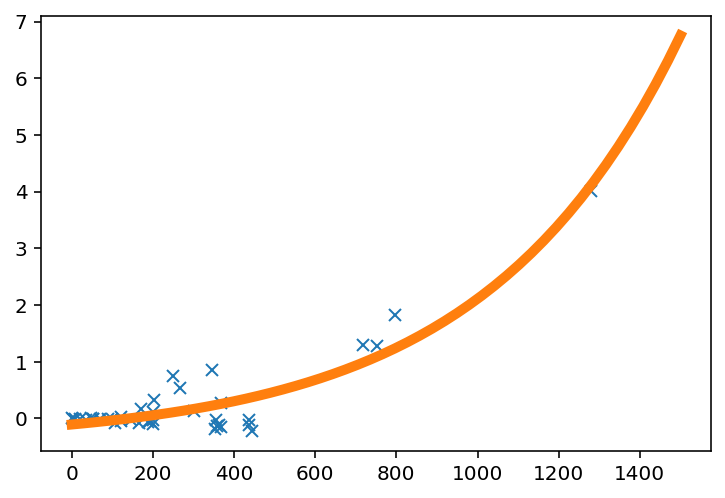

In [ ]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a + b*np.exp(c*x)

x = np.array(table_merge['N0'])
y = np.array(table_merge['linear_growth_rate'])

popt, pcov = curve_fit(func, x, y, p0=[0, 0.5, 0.001], maxfev=10000)

plt.plot(x, y, 'x')
xx = np.linspace(0, 1500, 50)
yy = func(xx, *popt)
plt.plot(xx, yy, lw=5)

popt

In [ ]:
(np.log(0.42390045/0.31567277))/0.00208277

141.5386724683043

0.8601680737179622


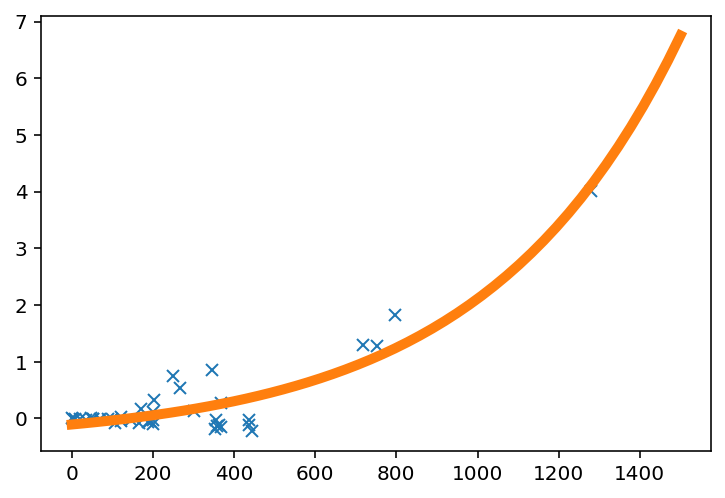

In [ ]:
b

array([-1.24389822,  0.0012643 ])

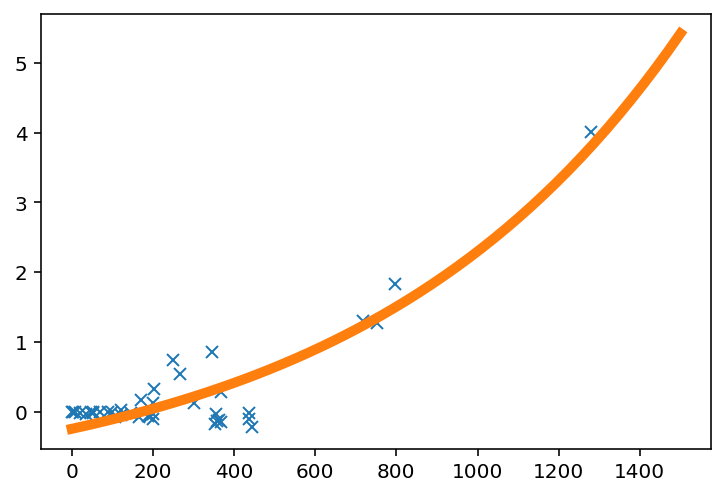

In [ ]:
from scipy.optimize import curve_fit

def func(x, a, c):
    return a + np.exp(c*x)

x = np.array(table_merge['N0'])
y = np.array(table_merge['linear_growth_rate'])

popt, pcov = curve_fit(func, x, y, p0=[0, 0.5], maxfev=5000)

plt.plot(x, y, 'x')
xx = np.linspace(0, 1500, 50)
yy = func(xx, *popt)
plt.plot(xx, yy, lw=5)

residuals = y - func(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)

popt

In [ ]:
np.log(1.2)/0.001

182.32155679395458

# ***** 3 years GR

In [ ]:
# BETWEEN YEAR 3 AND DAY 0 
# PHASE 1
# RANDOM COMMUNITIES IN DESERT LITTER
table_phase1_t0 = pd.read_csv('specialists_t0_combined_22040201.csv')
table_phase1_year1 = pd.read_csv('specialists_year1_combined_22040201.csv')
table_phase1_year2 = pd.read_csv('specialists_year2_combined_22040201.csv')
table_phase1_year3 = pd.read_csv('specialists_year3_combined_22040201.csv')
# PHASE 1
# RANDOM COMMUNITIES IN DESERT LITTER 
col10 = table_phase1_t0.loc[(table_phase1_t0["substrate"] == 'Protein3') & (table_phase1_t0["litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col10.set_index(['treatment_name'], inplace=True) 
col1 = col10.rename(columns={"biomass_decomp_t0": "N0"})
col20 = table_phase1_year3.loc[(table_phase1_year3["substrate"] == 'Protein3')& (table_phase1_year3["litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col20.set_index(['treatment_name'], inplace=True) 
col2 = col20.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_1 = pd.concat([col1['N0'], col2['Nmean']], axis=1)
# add linear growth rate (sachant que time = 3 years = 1095 days) 
table_merge = Table_for_plot_1
table_merge['linear_growth_rate'] = (table_merge['Nmean'] - table_merge['N0']) / 1095
table_merge['exp_growth_rate'] = np.log( table_merge['Nmean'] / table_merge['N0'] ) / 1095

In [ ]:
# BETWEEN YEAR 3 AND DAY 0
# PHASE 2
# PINE OAK COMMUNITIES IN DESERT LITTER
# NO INVADERS
table_phase2_t0 = pd.read_csv('specialists_t0_combined_22032203.csv')
table_phase2_year1 = pd.read_csv('specialists_year1_combined_22032203.csv')
table_phase2_year2 = pd.read_csv('specialists_year2_combined_22032203.csv')
table_phase2_year3 = pd.read_csv('specialists_year3_combined_22032203.csv')
# year 1 of phase 2 without invaders
col30 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["residents"] == 'ResD') & (table_phase2_t0["invaders"] == 'NoInv') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col30.set_index(['treatment_name'], inplace=True) 
col3 = col30.rename(columns={"biomass_decomp_t0": "N0"})
col40 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["residents"] == 'ResD') & (table_phase2_year3["invaders"] == 'NoInv') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col40.set_index(['treatment_name'], inplace=True) 
col4 = col40.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_2 = pd.concat([col3['N0'], col4['Nmean']], axis=1)
# add linear growth rate (sachant que time = 3 years = 1095 days) 
table_merge = Table_for_plot_2
table_merge['linear_growth_rate'] = (table_merge['Nmean'] - table_merge['N0']) / 1095
table_merge['exp_growth_rate'] = np.log( table_merge['Nmean'] / table_merge['N0'] ) / 1095

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# BETWEEN YEAR 3 AND DAY 0
# PHASE 2
# PINE OAK COMMUNITIES IN DESERT LITTER
# INVADERS FROM DESERT COMMUNITIES
table_phase2_t0 = pd.read_csv('specialists_t0_combined_22032203.csv')
table_phase2_year1 = pd.read_csv('specialists_year1_combined_22032203.csv')
table_phase2_year2 = pd.read_csv('specialists_year2_combined_22032203.csv')
table_phase2_year3 = pd.read_csv('specialists_year3_combined_22032203.csv')
# year 1 of phase 2 with invaders
col50 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["invaders"] == 'InvA') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col50.set_index(['treatment_name'], inplace=True) 
col5 = col50.rename(columns={"biomass_decomp_t0": "N0"})
col60 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["invaders"] == 'InvA') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col60.set_index(['treatment_name'], inplace=True) 
col6 = col60.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_3 = pd.concat([col5['N0'], col6['Nmean']], axis=1)


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# BETWEEN YEAR 3 AND DAY 0
# PHASE 2
# SCRUBLAND COMMUNITIES IN DESERT LITTER
# NO INVADERS
table_phase2_t0 = pd.read_csv('specialists_t0_combined_22032203.csv')
table_phase2_year1 = pd.read_csv('specialists_year1_combined_22032203.csv')
table_phase2_year2 = pd.read_csv('specialists_year2_combined_22032203.csv')
table_phase2_year3 = pd.read_csv('specialists_year3_combined_22032203.csv')
# year 1 of phase 2 without invaders
col70 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["residents"] == 'ResB') & (table_phase2_t0["invaders"] == 'NoInv') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col70.set_index(['treatment_name'], inplace=True) 
col7 = col70.rename(columns={"biomass_decomp_t0": "N0"})
col80 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["residents"] == 'ResB') & (table_phase2_year3["invaders"] == 'NoInv') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col80.set_index(['treatment_name'], inplace=True) 
col8 = col80.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_4 = pd.concat([col7['N0'], col8['Nmean']], axis=1)
# concat
table_merge = Table_for_plot_4
# add linear growth rate (sachant que time = 3 years = 1095 days) 
table_merge['linear_growth_rate'] = (table_merge['Nmean'] - table_merge['N0']) / 1095
table_merge['exp_growth_rate'] = np.log( table_merge['Nmean'] / table_merge['N0'] ) / 1095

In [ ]:
# BETWEEN YEAR 3 AND DAY 0
# ALL TOGETHER
table_phase1_t0 = pd.read_csv('specialists_t0_combined_22040201.csv')
table_phase1_year1 = pd.read_csv('specialists_year1_combined_22040201.csv')
table_phase1_year2 = pd.read_csv('specialists_year2_combined_22040201.csv')
table_phase1_year3 = pd.read_csv('specialists_year3_combined_22040201.csv')
table_phase2_t0 = pd.read_csv('specialists_t0_combined_22032203.csv')
table_phase2_year1 = pd.read_csv('specialists_year1_combined_22032203.csv')
table_phase2_year2 = pd.read_csv('specialists_year2_combined_22032203.csv')
table_phase2_year3 = pd.read_csv('specialists_year3_combined_22032203.csv')
# PHASE 1
# RANDOM COMMUNITIES IN DESERT LITTER 
col10 = table_phase1_t0.loc[(table_phase1_t0["substrate"] == 'Protein3') & (table_phase1_t0["litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col10.set_index(['treatment_name'], inplace=True) 
col1 = col10.rename(columns={"biomass_decomp_t0": "N0"})
col20 = table_phase1_year3.loc[(table_phase1_year3["substrate"] == 'Protein3')& (table_phase1_year3["litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col20.set_index(['treatment_name'], inplace=True) 
col2 = col20.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_1 = pd.concat([col1['N0'], col2['Nmean']], axis=1)
# PHASE 2
# PINE OAK COMMUNITIES IN DESERT LITTER
# NO INVADERS
col30 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["residents"] == 'ResD') & (table_phase2_t0["invaders"] == 'NoInv') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col30.set_index(['treatment_name'], inplace=True) 
col3 = col30.rename(columns={"biomass_decomp_t0": "N0"})
col40 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["residents"] == 'ResD') & (table_phase2_year3["invaders"] == 'NoInv') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col40.set_index(['treatment_name'], inplace=True) 
col4 = col40.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_2 = pd.concat([col3['N0'], col4['Nmean']], axis=1)
# PHASE 2
# PINE OAK COMMUNITIES IN DESERT LITTER
# INVADERS FROM DESERT COMMUNITIES
col50 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["invaders"] == 'InvA') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col50.set_index(['treatment_name'], inplace=True) 
col5 = col50.rename(columns={"biomass_decomp_t0": "N0"})
col60 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["invaders"] == 'InvA') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col60.set_index(['treatment_name'], inplace=True) 
col6 = col60.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_3 = pd.concat([col5['N0'], col6['Nmean']], axis=1)
# PHASE 2
# SCRUBLAND COMMUNITIES IN DESERT LITTER
# NO INVADERS
col70 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["residents"] == 'ResB') & (table_phase2_t0["invaders"] == 'NoInv') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col70.set_index(['treatment_name'], inplace=True) 
col7 = col70.rename(columns={"biomass_decomp_t0": "N0"})
col80 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["residents"] == 'ResB') & (table_phase2_year3["invaders"] == 'NoInv') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col80.set_index(['treatment_name'], inplace=True) 
col8 = col80.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_4 = pd.concat([col7['N0'], col8['Nmean']], axis=1)
# concat
table_merge = pd.concat([Table_for_plot_1,Table_for_plot_2,Table_for_plot_3,Table_for_plot_4],axis=0)
# add linear growth rate (sachant que time = 3 years = 1095 days) 
table_merge['linear_growth_rate'] = (table_merge['Nmean'] - table_merge['N0']) / 1095
table_merge['exp_growth_rate'] = np.log( table_merge['Nmean'] / table_merge['N0'] ) / 1095

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


intercept = -0.3900979758071018
slope = [0.00240087]


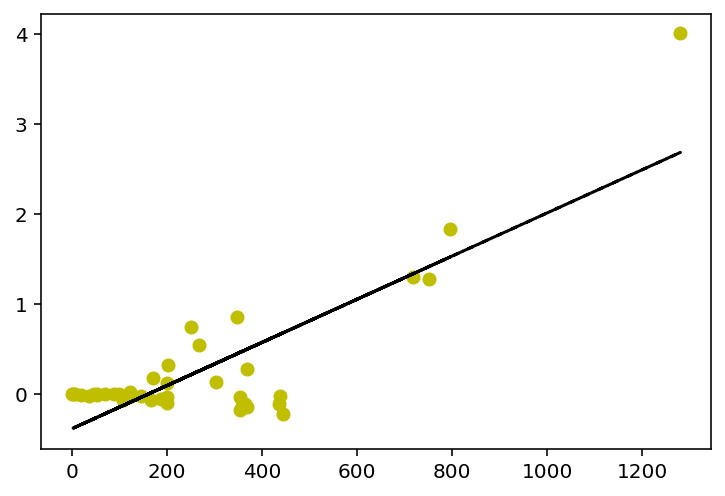

In [ ]:
# Plot
from sklearn.linear_model import LinearRegression
import numpy as np

x = np.array(table_merge['N0']).reshape(-1, 1)
y = np.array(table_merge['linear_growth_rate'])

lm = LinearRegression()
lm.fit(x, y)

print('intercept =', lm.intercept_)
print('slope =',lm.coef_)

# PLOT
x = np.array(table_merge['N0'])
y = np.array(table_merge['linear_growth_rate'])

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
#plt.xlabel("Initial biomass of protein degraders")
#plt.ylabel("Growth rate (linear wrt time) of protein degraders")

In [ ]:
0.3900979758071018/0.00240087

162.48192355567016

In [ ]:
# Multiple regression linear model
import numpy as np
import statsmodels.api as sm

x = [np.array(table_merge['N0'])]
y = np.array(table_merge['linear_growth_rate'])

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

print(reg_m(y, x).summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     78.24
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           9.21e-11
Time:                        22:36:36   Log-Likelihood:                -22.595
No. Observations:                  40   AIC:                             49.19
Df Residuals:                      38   BIC:                             52.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0024      0.000      8.845      0.0

# ***** Use last day for t0

In [ ]:
# YEAR BY YEAR 
# PHASE 1
# RANDOM COMMUNITIES IN DESERT LITTER
table_phase1_t0 = pd.read_csv('specialists_t0_combined_22040201.csv')
table_phase1_year1 = pd.read_csv('specialists_year1_combined_22040201.csv')
table_phase1_year2 = pd.read_csv('specialists_year2_combined_22040201.csv')
table_phase1_year3 = pd.read_csv('specialists_year3_combined_22040201.csv')
# year 1 of phase 1
col10 = table_phase1_t0.loc[(table_phase1_t0["substrate"] == 'Protein3') & (table_phase1_t0["litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col10.set_index(['treatment_name'], inplace=True) 
col1 = col10.rename(columns={"biomass_decomp_t0": "N0"})
col20 = table_phase1_year1.loc[(table_phase1_year1["substrate"] == 'Protein3')& (table_phase1_year1["litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col20.set_index(['treatment_name'], inplace=True) 
col2 = col20.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_1 = pd.concat([col1['N0'], col2['Nmean']], axis=1)
# year 2 of phase 1
col30 = table_phase1_year1.loc[(table_phase1_year1["substrate"] == 'Protein3') & (table_phase1_year1["litter"] == 'A'),["biomass_specialist_last_day","treatment_name"]]
col30.set_index(['treatment_name'], inplace=True) 
col3 = col30.rename(columns={"biomass_specialist_last_day": "N0"})
col40 = table_phase1_year2.loc[(table_phase1_year2["substrate"] == 'Protein3')& (table_phase1_year2["litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col40.set_index(['treatment_name'], inplace=True) 
col4 = col40.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_2 = pd.concat([col3['N0'], col4['Nmean']], axis=1)
# year 3 of phase 1
col50 = table_phase1_year2.loc[(table_phase1_year2["substrate"] == 'Protein3') & (table_phase1_year2["litter"] == 'A'),["biomass_specialist_last_day","treatment_name"]]
col50.set_index(['treatment_name'], inplace=True) 
col5 = col50.rename(columns={"biomass_specialist_last_day": "N0"})
col60 = table_phase1_year3.loc[(table_phase1_year3["substrate"] == 'Protein3')& (table_phase1_year3["litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col60.set_index(['treatment_name'], inplace=True) 
col6 = col60.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_3 = pd.concat([col5['N0'], col6['Nmean']], axis=1)
# concat
table_merge = pd.concat([Table_for_plot_1,Table_for_plot_2,Table_for_plot_3],axis=0)
# add linear growth rate (sachant que time = 3 years = 1095 days) 
table_merge['linear_growth_rate'] = (table_merge['Nmean'] - table_merge['N0']) / 365
table_merge['exp_growth_rate'] = np.log( table_merge['Nmean'] / table_merge['N0'] ) / 365

In [ ]:
# YEAR BY YEAR 
# PHASE 2
# PINE OAK COMMUNITIES IN DESERT LITTER
# NO INVADERS
table_phase2_t0 = pd.read_csv('specialists_t0_combined_22032203.csv')
table_phase2_year1 = pd.read_csv('specialists_year1_combined_22032203.csv')
table_phase2_year2 = pd.read_csv('specialists_year2_combined_22032203.csv')
table_phase2_year3 = pd.read_csv('specialists_year3_combined_22032203.csv')
# year 1 of phase 2 without invaders
col70 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["residents"] == 'ResD') & (table_phase2_t0["invaders"] == 'NoInv') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col70.set_index(['treatment_name'], inplace=True) 
col7 = col70.rename(columns={"biomass_decomp_t0": "N0"})
col80 = table_phase2_year1.loc[(table_phase2_year1["substrate"] == 'Protein3') & (table_phase2_year1["residents"] == 'ResD') & (table_phase2_year1["invaders"] == 'NoInv') & (table_phase2_year1["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col80.set_index(['treatment_name'], inplace=True) 
col8 = col80.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_4 = pd.concat([col7['N0'], col8['Nmean']], axis=1)
# year 2 of phase 2 without invaders
col90 = table_phase2_year1.loc[(table_phase2_year1["substrate"] == 'Protein3') & (table_phase2_year1["residents"] == 'ResD') & (table_phase2_year1["invaders"] == 'NoInv') & (table_phase2_year1["final_litter"] == 'A'),["biomass_specialist_last_day","treatment_name"]]
col90.set_index(['treatment_name'], inplace=True) 
col9 = col90.rename(columns={"biomass_specialist_last_day": "N0"})
col100 = table_phase2_year2.loc[(table_phase2_year2["substrate"] == 'Protein3') & (table_phase2_year2["residents"] == 'ResD') & (table_phase2_year2["invaders"] == 'NoInv') & (table_phase2_year2["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col100.set_index(['treatment_name'], inplace=True) 
col10 = col100.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_5 = pd.concat([col9['N0'], col10['Nmean']], axis=1)
# year 3 of phase 2 without invaders
col110 = table_phase2_year2.loc[(table_phase2_year2["substrate"] == 'Protein3') & (table_phase2_year2["residents"] == 'ResD') & (table_phase2_year2["invaders"] == 'NoInv') & (table_phase2_year2["final_litter"] == 'A'),["biomass_specialist_last_day","treatment_name"]]
col110.set_index(['treatment_name'], inplace=True) 
col11 = col110.rename(columns={"biomass_specialist_last_day": "N0"})
col120 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["residents"] == 'ResD') & (table_phase2_year3["invaders"] == 'NoInv') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col120.set_index(['treatment_name'], inplace=True) 
col12 = col120.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_6 = pd.concat([col11['N0'], col12['Nmean']], axis=1)
# concat
table_merge = pd.concat([Table_for_plot_4,Table_for_plot_5,Table_for_plot_6],axis=0)
# add linear growth rate (sachant que time = 3 years = 1095 days) 
table_merge['linear_growth_rate'] = (table_merge['Nmean'] - table_merge['N0']) / 365
table_merge['exp_growth_rate'] = np.log( table_merge['Nmean'] / table_merge['N0'] ) / 365
table_merge

In [ ]:
# YEAR BY YEAR 
# PHASE 2
# PINE OAK COMMUNITIES IN DESERT LITTER
# INVADERS FROM DESERT COMMUNITIES
table_phase2_t0 = pd.read_csv('specialists_t0_combined_22032203.csv')
table_phase2_year1 = pd.read_csv('specialists_year1_combined_22032203.csv')
table_phase2_year2 = pd.read_csv('specialists_year2_combined_22032203.csv')
table_phase2_year3 = pd.read_csv('specialists_year3_combined_22032203.csv')
# year 1 of phase 2 with invaders
col130 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["invaders"] == 'InvA') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col130.set_index(['treatment_name'], inplace=True) 
col13 = col130.rename(columns={"biomass_decomp_t0": "N0"})
col140 = table_phase2_year1.loc[(table_phase2_year1["substrate"] == 'Protein3') & (table_phase2_year1["invaders"] == 'InvA') & (table_phase2_year1["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col140.set_index(['treatment_name'], inplace=True) 
col14 = col140.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_7 = pd.concat([col13['N0'], col14['Nmean']], axis=1)
# year 2 of phase 2 with invaders
col150 = table_phase2_year1.loc[(table_phase2_year1["substrate"] == 'Protein3') & (table_phase2_year1["invaders"] == 'InvA') & (table_phase2_year1["final_litter"] == 'A'),["biomass_specialist_last_day","treatment_name"]]
col150.set_index(['treatment_name'], inplace=True) 
col15 = col150.rename(columns={"biomass_specialist_last_day": "N0"})
col160 = table_phase2_year2.loc[(table_phase2_year2["substrate"] == 'Protein3') & (table_phase2_year2["invaders"] == 'InvA') & (table_phase2_year2["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col160.set_index(['treatment_name'], inplace=True) 
col16 = col160.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_8 = pd.concat([col15['N0'], col16['Nmean']], axis=1)
# year 3 of phase 2 with invaders
col170 = table_phase2_year2.loc[(table_phase2_year2["substrate"] == 'Protein3') & (table_phase2_year2["invaders"] == 'InvA') & (table_phase2_year2["final_litter"] == 'A'),["biomass_specialist_last_day","treatment_name"]]
col170.set_index(['treatment_name'], inplace=True) 
col17 = col170.rename(columns={"biomass_specialist_last_day": "N0"})
col180 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["invaders"] == 'InvA') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col180.set_index(['treatment_name'], inplace=True) 
col18 = col180.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_9 = pd.concat([col17['N0'], col18['Nmean']], axis=1)
# concat
table_merge = pd.concat([Table_for_plot_7,Table_for_plot_8,Table_for_plot_9],axis=0)
# add linear growth rate (sachant que time = 3 years = 1095 days) 
table_merge['linear_growth_rate'] = (table_merge['Nmean'] - table_merge['N0']) / 365
table_merge['exp_growth_rate'] = np.log( table_merge['Nmean'] / table_merge['N0'] ) / 365

In [ ]:
# YEAR BY YEAR 
# PHASE 2
# SCRUBLAND COMMUNITIES IN DESERT LITTER
# NO INVADERS
table_phase2_t0 = pd.read_csv('specialists_t0_combined_22032203.csv')
table_phase2_year1 = pd.read_csv('specialists_year1_combined_22032203.csv')
table_phase2_year2 = pd.read_csv('specialists_year2_combined_22032203.csv')
table_phase2_year3 = pd.read_csv('specialists_year3_combined_22032203.csv')
# year 1 of phase 2 without invaders
col70 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["residents"] == 'ResB') & (table_phase2_t0["invaders"] == 'NoInv') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col70.set_index(['treatment_name'], inplace=True) 
col7 = col70.rename(columns={"biomass_decomp_t0": "N0"})
col80 = table_phase2_year1.loc[(table_phase2_year1["substrate"] == 'Protein3') & (table_phase2_year1["residents"] == 'ResB') & (table_phase2_year1["invaders"] == 'NoInv') & (table_phase2_year1["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col80.set_index(['treatment_name'], inplace=True) 
col8 = col80.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_4 = pd.concat([col7['N0'], col8['Nmean']], axis=1)
# year 2 of phase 2 without invaders
col90 = table_phase2_year1.loc[(table_phase2_year1["substrate"] == 'Protein3') & (table_phase2_year1["residents"] == 'ResB') & (table_phase2_year1["invaders"] == 'NoInv') & (table_phase2_year1["final_litter"] == 'A'),["biomass_specialist_last_day","treatment_name"]]
col90.set_index(['treatment_name'], inplace=True) 
col9 = col90.rename(columns={"biomass_specialist_last_day": "N0"})
col100 = table_phase2_year2.loc[(table_phase2_year2["substrate"] == 'Protein3') & (table_phase2_year2["residents"] == 'ResB') & (table_phase2_year2["invaders"] == 'NoInv') & (table_phase2_year2["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col100.set_index(['treatment_name'], inplace=True) 
col10 = col100.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_5 = pd.concat([col9['N0'], col10['Nmean']], axis=1)
# year 3 of phase 2 without invaders
col110 = table_phase2_year2.loc[(table_phase2_year2["substrate"] == 'Protein3') & (table_phase2_year2["residents"] == 'ResB') & (table_phase2_year2["invaders"] == 'NoInv') & (table_phase2_year2["final_litter"] == 'A'),["biomass_specialist_last_day","treatment_name"]]
col110.set_index(['treatment_name'], inplace=True) 
col11 = col110.rename(columns={"biomass_specialist_last_day": "N0"})
col120 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["residents"] == 'ResB') & (table_phase2_year3["invaders"] == 'NoInv') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col120.set_index(['treatment_name'], inplace=True) 
col12 = col120.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_6 = pd.concat([col11['N0'], col12['Nmean']], axis=1)
# concat
table_merge = pd.concat([Table_for_plot_4,Table_for_plot_5,Table_for_plot_6],axis=0)
# add linear growth rate (sachant que time = 3 years = 1095 days) 
table_merge['linear_growth_rate'] = (table_merge['Nmean'] - table_merge['N0']) / 365
table_merge['exp_growth_rate'] = np.log( table_merge['Nmean'] / table_merge['N0'] ) / 365

In [ ]:
# YEAR BY YEAR 
# ALL TOGETHER 
table_phase1_t0 = pd.read_csv('specialists_t0_combined_22040201.csv')
table_phase1_year1 = pd.read_csv('specialists_year1_combined_22040201.csv')
table_phase1_year2 = pd.read_csv('specialists_year2_combined_22040201.csv')
table_phase1_year3 = pd.read_csv('specialists_year3_combined_22040201.csv')
table_phase2_t0 = pd.read_csv('specialists_t0_combined_22032203.csv')
table_phase2_year1 = pd.read_csv('specialists_year1_combined_22032203.csv')
table_phase2_year2 = pd.read_csv('specialists_year2_combined_22032203.csv')
table_phase2_year3 = pd.read_csv('specialists_year3_combined_22032203.csv')
# PHASE 1
# RANDOM COMMUNITIES IN DESERT LITTER 
# year 1 of phase 1
col10 = table_phase1_t0.loc[(table_phase1_t0["substrate"] == 'Protein3') & (table_phase1_t0["litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col10.set_index(['treatment_name'], inplace=True) 
col1 = col10.rename(columns={"biomass_decomp_t0": "N0"})
col20 = table_phase1_year1.loc[(table_phase1_year1["substrate"] == 'Protein3')& (table_phase1_year1["litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col20.set_index(['treatment_name'], inplace=True) 
col2 = col20.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_1 = pd.concat([col1['N0'], col2['Nmean']], axis=1)
# year 2 of phase 1
col30 = table_phase1_year1.loc[(table_phase1_year1["substrate"] == 'Protein3') & (table_phase1_year1["litter"] == 'A'),["biomass_specialist_last_day","treatment_name"]]
col30.set_index(['treatment_name'], inplace=True) 
col3 = col30.rename(columns={"biomass_specialist_last_day": "N0"})
col40 = table_phase1_year2.loc[(table_phase1_year2["substrate"] == 'Protein3')& (table_phase1_year2["litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col40.set_index(['treatment_name'], inplace=True) 
col4 = col40.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_2 = pd.concat([col3['N0'], col4['Nmean']], axis=1)
# year 3 of phase 1
col50 = table_phase1_year2.loc[(table_phase1_year2["substrate"] == 'Protein3') & (table_phase1_year2["litter"] == 'A'),["biomass_specialist_last_day","treatment_name"]]
col50.set_index(['treatment_name'], inplace=True) 
col5 = col50.rename(columns={"biomass_specialist_last_day": "N0"})
col60 = table_phase1_year3.loc[(table_phase1_year3["substrate"] == 'Protein3')& (table_phase1_year3["litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col60.set_index(['treatment_name'], inplace=True) 
col6 = col60.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_3 = pd.concat([col5['N0'], col6['Nmean']], axis=1)
# PHASE 2
# PINE OAK COMMUNITIES IN DESERT LITTER NO INVADERS
# year 1 of phase 2 without invaders
col70 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["residents"] == 'ResD') & (table_phase2_t0["invaders"] == 'NoInv') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col70.set_index(['treatment_name'], inplace=True) 
col7 = col70.rename(columns={"biomass_decomp_t0": "N0"})
col80 = table_phase2_year1.loc[(table_phase2_year1["substrate"] == 'Protein3') & (table_phase2_year1["residents"] == 'ResD') & (table_phase2_year1["invaders"] == 'NoInv') & (table_phase2_year1["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col80.set_index(['treatment_name'], inplace=True) 
col8 = col80.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_4 = pd.concat([col7['N0'], col8['Nmean']], axis=1)
# year 2 of phase 2 without invaders
col90 = table_phase2_year1.loc[(table_phase2_year1["substrate"] == 'Protein3') & (table_phase2_year1["residents"] == 'ResD') & (table_phase2_year1["invaders"] == 'NoInv') & (table_phase2_year1["final_litter"] == 'A'),["biomass_specialist_last_day","treatment_name"]]
col90.set_index(['treatment_name'], inplace=True) 
col9 = col90.rename(columns={"biomass_specialist_last_day": "N0"})
col100 = table_phase2_year2.loc[(table_phase2_year2["substrate"] == 'Protein3') & (table_phase2_year2["residents"] == 'ResD') & (table_phase2_year2["invaders"] == 'NoInv') & (table_phase2_year2["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col100.set_index(['treatment_name'], inplace=True) 
col10 = col100.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_5 = pd.concat([col9['N0'], col10['Nmean']], axis=1)
# year 3 of phase 2 without invaders
col110 = table_phase2_year2.loc[(table_phase2_year2["substrate"] == 'Protein3') & (table_phase2_year2["residents"] == 'ResD') & (table_phase2_year2["invaders"] == 'NoInv') & (table_phase2_year2["final_litter"] == 'A'),["biomass_specialist_last_day","treatment_name"]]
col110.set_index(['treatment_name'], inplace=True) 
col11 = col110.rename(columns={"biomass_specialist_last_day": "N0"})
col120 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["residents"] == 'ResD') & (table_phase2_year3["invaders"] == 'NoInv') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col120.set_index(['treatment_name'], inplace=True) 
col12 = col120.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_6 = pd.concat([col11['N0'], col12['Nmean']], axis=1)
# PHASE 2
# PINE OAK COMMUNITIES IN DESERT LITTER WITH INVADERS FROM DESERT COMMUNITIES
# year 1 of phase 2 with invaders
col130 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["invaders"] == 'InvA') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col130.set_index(['treatment_name'], inplace=True) 
col13 = col130.rename(columns={"biomass_decomp_t0": "N0"})
col140 = table_phase2_year1.loc[(table_phase2_year1["substrate"] == 'Protein3') & (table_phase2_year1["invaders"] == 'InvA') & (table_phase2_year1["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col140.set_index(['treatment_name'], inplace=True) 
col14 = col140.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_7 = pd.concat([col13['N0'], col14['Nmean']], axis=1)
# year 2 of phase 2 with invaders
col150 = table_phase2_year1.loc[(table_phase2_year1["substrate"] == 'Protein3') & (table_phase2_year1["invaders"] == 'InvA') & (table_phase2_year1["final_litter"] == 'A'),["biomass_specialist_last_day","treatment_name"]]
col150.set_index(['treatment_name'], inplace=True) 
col15 = col150.rename(columns={"biomass_specialist_last_day": "N0"})
col160 = table_phase2_year2.loc[(table_phase2_year2["substrate"] == 'Protein3') & (table_phase2_year2["invaders"] == 'InvA') & (table_phase2_year2["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col160.set_index(['treatment_name'], inplace=True) 
col16 = col160.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_8 = pd.concat([col15['N0'], col16['Nmean']], axis=1)
# year 3 of phase 2 with invaders
col170 = table_phase2_year2.loc[(table_phase2_year2["substrate"] == 'Protein3') & (table_phase2_year2["invaders"] == 'InvA') & (table_phase2_year2["final_litter"] == 'A'),["biomass_specialist_last_day","treatment_name"]]
col170.set_index(['treatment_name'], inplace=True) 
col17 = col170.rename(columns={"biomass_specialist_last_day": "N0"})
col180 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["invaders"] == 'InvA') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col180.set_index(['treatment_name'], inplace=True) 
col18 = col180.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_9 = pd.concat([col17['N0'], col18['Nmean']], axis=1)
# PHASE 2
# SCRUBLAND COMMUNITIES IN DESERT LITTER NO INVADERS
# year 1 of phase 2 without invaders
col190 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["residents"] == 'ResB') & (table_phase2_t0["invaders"] == 'NoInv') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col190.set_index(['treatment_name'], inplace=True) 
col19 = col190.rename(columns={"biomass_decomp_t0": "N0"})
col200 = table_phase2_year1.loc[(table_phase2_year1["substrate"] == 'Protein3') & (table_phase2_year1["residents"] == 'ResB') & (table_phase2_year1["invaders"] == 'NoInv') & (table_phase2_year1["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col200.set_index(['treatment_name'], inplace=True) 
col20 = col200.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_10 = pd.concat([col19['N0'], col20['Nmean']], axis=1)
# year 2 of phase 2 without invaders
col210 = table_phase2_year1.loc[(table_phase2_year1["substrate"] == 'Protein3') & (table_phase2_year1["residents"] == 'ResB') & (table_phase2_year1["invaders"] == 'NoInv') & (table_phase2_year1["final_litter"] == 'A'),["biomass_specialist_last_day","treatment_name"]]
col210.set_index(['treatment_name'], inplace=True) 
col21 = col210.rename(columns={"biomass_specialist_last_day": "N0"})
col220 = table_phase2_year2.loc[(table_phase2_year2["substrate"] == 'Protein3') & (table_phase2_year2["residents"] == 'ResB') & (table_phase2_year2["invaders"] == 'NoInv') & (table_phase2_year2["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col220.set_index(['treatment_name'], inplace=True) 
col22 = col220.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_11 = pd.concat([col21['N0'], col22['Nmean']], axis=1)
# year 3 of phase 2 without invaders
col230 = table_phase2_year2.loc[(table_phase2_year2["substrate"] == 'Protein3') & (table_phase2_year2["residents"] == 'ResB') & (table_phase2_year2["invaders"] == 'NoInv') & (table_phase2_year2["final_litter"] == 'A'),["biomass_specialist_last_day","treatment_name"]]
col230.set_index(['treatment_name'], inplace=True) 
col23 = col230.rename(columns={"biomass_specialist_last_day": "N0"})
col240 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["residents"] == 'ResB') & (table_phase2_year3["invaders"] == 'NoInv') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col240.set_index(['treatment_name'], inplace=True) 
col24 = col240.rename(columns={"biomass_specialist_year": "Nmean"})
Table_for_plot_12 = pd.concat([col23['N0'], col24['Nmean']], axis=1)
# concat
table_merge = pd.concat([Table_for_plot_1,Table_for_plot_2,Table_for_plot_3,Table_for_plot_4,Table_for_plot_5,Table_for_plot_6,Table_for_plot_7,
                         Table_for_plot_8,Table_for_plot_9,Table_for_plot_10,Table_for_plot_11,Table_for_plot_12],axis=0)
# calculate linear and exponential growth rates
table_merge['linear_growth_rate'] = (table_merge['Nmean'] - table_merge['N0']) / 365
table_merge['exp_growth_rate'] = np.log( table_merge['Nmean'] / table_merge['N0'] ) / 365
table_merge


N0        Nmean  linear_growth_rate  exp_growth_rate
treatment_name                                                               
phase1A7         100.000000   102.103954            0.005764         0.000057
phase1A10        368.000000   363.145490           -0.013300        -0.000036
phase1A1         107.000000    83.905838           -0.063272        -0.000666
phase1A6         368.000000   338.124110           -0.081852        -0.000232
phase1A4         355.000000   318.321589           -0.100489        -0.000299
...                     ...          ...                 ...              ...
phase2AB03      4043.570988  5667.279350            4.448516         0.000925
phase2AB07        63.560002    66.172861            0.007159         0.000110
phase2AB05      2936.119765  2800.326737           -0.372036        -0.000130
phase2AB02       186.028153   156.578640           -0.080684        -0.000472
phase2AB04       386.036945   443.329721            0.156967         0.000379

[120 rows x 4 columns]

intercept = -0.13173331762039636
slope = [0.00073107]


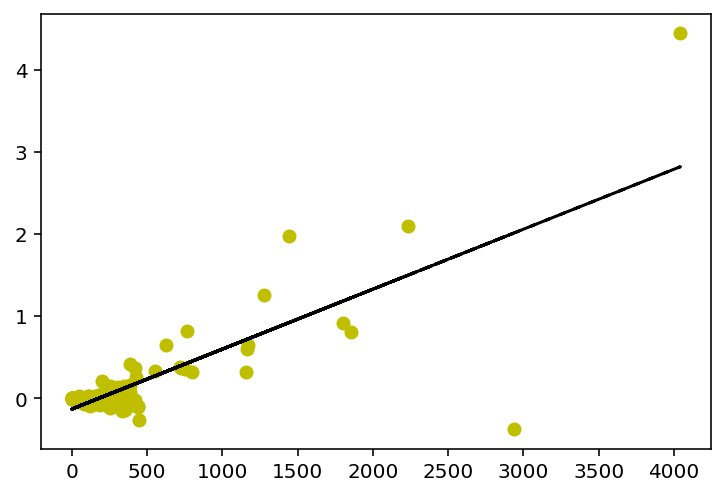

In [ ]:
# Plot
from sklearn.linear_model import LinearRegression
import numpy as np

x = np.array(table_merge['N0']).reshape(-1, 1)
y = np.array(table_merge['linear_growth_rate'])

lm = LinearRegression()
lm.fit(x, y)

print('intercept =', lm.intercept_)
print('slope =',lm.coef_)

# PLOT
x = np.array(table_merge['N0'])
y = np.array(table_merge['linear_growth_rate'])

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
#plt.xlabel("Initial biomass of protein degraders")
#plt.ylabel("Growth rate (linear wrt time) of protein degraders")

In [ ]:
np.log(1)

0.0

In [ ]:
0.13173331762039636/0.00073107

180.19248173279763

In [ ]:
# Multiple regression linear model
import numpy as np
import statsmodels.api as sm

x = [np.array(table_merge['N0'])]
y = np.array(table_merge['linear_growth_rate'])

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

print(reg_m(y, x).summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     191.2
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           1.91e-26
Time:                        18:26:40   Log-Likelihood:                -34.689
No. Observations:                 120   AIC:                             73.38
Df Residuals:                     118   BIC:                             78.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0007   5.29e-05     13.829      0.0

# ***** Growth rate = f(initial biomass) with phase 2

In [ ]:
# PHASE 1
# t0
table_t0 = pd.read_csv('specialists_t0_combined_22040201.csv')
table_t0_SubX = table_t0[(table_t0["substrate"] == 'Protein3') & (table_t0["litter"] == 'A')]
# year 3
table_year3 = pd.read_csv('specialists_year3_combined_22040201.csv')
table_year3_SubX = table_year3[(table_year3["substrate"] == 'Protein3') & (table_year3["litter"] == 'A')]
# concat
table_t0_SubX.set_index(['treatment_name'], inplace=True) 
table_year3_SubX.set_index(['treatment_name'], inplace=True) 
table_merge_phase1 = pd.concat([table_t0_SubX['biomass_decomp_t0'], table_year3_SubX['biomass_specialist_year']], axis=1)
table_merge_phase1.head()

biomass_decomp_t0  biomass_specialist_year
treatment_name                                            
phase1A7                    100.0                91.573872
phase1A10                   368.0               207.552654
phase1A1                    107.0                26.647713
phase1A6                    368.0               673.810022
phase1A4                    355.0               314.538594

In [ ]:
table_t0_SubX['biomass_decomp_t0']

treatment_name
phase1A7     100.0
phase1A10    368.0
phase1A1     107.0
phase1A6     368.0
phase1A4     355.0
phase1A8     444.0
phase1A9     201.0
phase1A2     437.0
phase1A3     203.0
phase1A5     438.0
Name: biomass_decomp_t0, dtype: float64

In [ ]:
table_year3_SubX['biomass_specialist_year']

treatment_name
phase1A2     316.929200
phase1A5     413.914439
phase1A3     553.413476
phase1A8     203.296270
phase1A9     333.461097
phase1A1      26.647713
phase1A4     314.538594
phase1A6     673.810022
phase1A10    207.552654
phase1A7      91.573872
Name: biomass_specialist_year, dtype: float64

In [ ]:
# PHASE 2
# t0
table_t0 = pd.read_csv('specialists_t0_combined_22032203.csv')
table_t0_SubX = table_t0[(table_t0["substrate"] == 'Protein3') & (table_t0["invaders"] == 'NoInv') & (table_t0["final_litter"] == 'A')]
# year 3
table_year3 = pd.read_csv('specialists_year3_combined_22032203.csv')
table_year3_SubX = table_year3[(table_year3["substrate"] == 'Protein3') & (table_year3["invaders"] == 'NoInv') & (table_year3["final_litter"] == 'A')]
# concat t0 et year 3 de phase 2
table_t0_SubX.set_index(['treatment_name'], inplace=True) 
table_year3_SubX.set_index(['treatment_name'], inplace=True) 
table_merge_phase2 = pd.concat([table_t0_SubX['biomass_decomp_t0'], table_year3_SubX['biomass_specialist_year']], axis=1)
table_merge_phase2.head()

biomass_decomp_t0  biomass_specialist_year
treatment_name                                            
phase2AD05             122.023042               147.183631
phase2AD01               0.000000                 0.000000
phase2AD08              53.525832                37.032206
phase2AD03               2.894301                 0.000000
phase2AB07              69.784128                66.172861

In [ ]:
# concat phase 1 et phase 2
table_merge = pd.concat([table_merge_phase1,table_merge_phase2], axis=0)
# add linear growth rate (sachant que time = 3 years = 1095 days) 
table_merge['linear_growth_rate'] = (table_merge['biomass_specialist_year'] - table_merge['biomass_decomp_t0']) / 1095
table_merge['exp_growth_rate'] = np.log( table_merge['biomass_specialist_year'] / table_merge['biomass_decomp_t0'] ) / 1095
table_merge.head()

NameError: ignored

In [ ]:
# Remove rows with NA or Inf
table_merge_2 = table_merge[table_merge['biomass_specialist_year'] != 0]
table_merge_2.head()

NameError: ignored

intercept = -0.0005785113889157953
slope = [1.63258478e-06]


Text(0, 0.5, 'Growth rate (exp wrt time) of protein degraders')

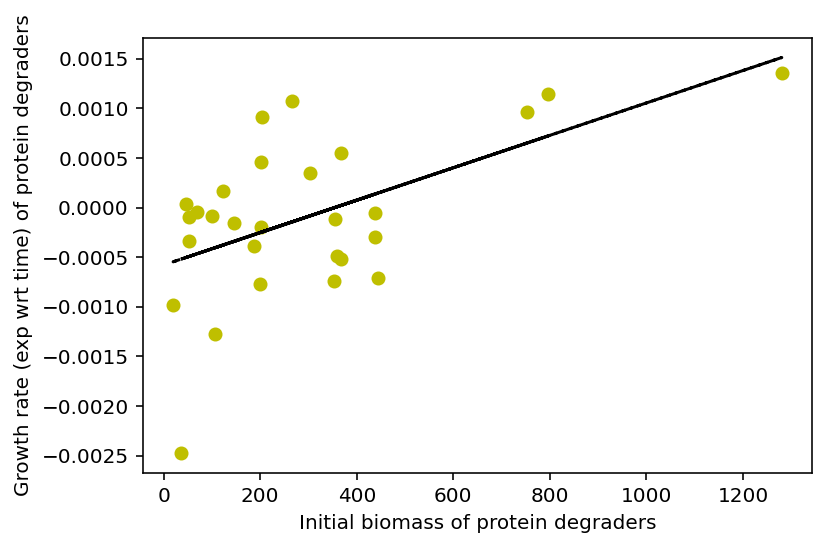

In [ ]:
# Plot
# Get intercept and slope of the linear regression - FUNGI NUMBER
# SLOPE = -0.22
from sklearn.linear_model import LinearRegression
import numpy as np

x = np.array(table_merge_2['biomass_decomp_t0']).reshape(-1, 1)
y = np.array(table_merge_2['exp_growth_rate'])

lm = LinearRegression()
lm.fit(x, y)

print('intercept =', lm.intercept_)
print('slope =',lm.coef_)

# PLOT
x = np.array(table_merge_2['biomass_decomp_t0'])
y = np.array(table_merge_2['exp_growth_rate'])

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
plt.xlabel("Initial biomass of protein degraders")
plt.ylabel("Growth rate (exp wrt time) of protein degraders")

In [ ]:
# Multiple regression linear model
import numpy as np
import statsmodels.api as sm

x = [np.array(table_merge_2['biomass_decomp_t0'])]
y = np.array(table_merge_2['exp_growth_rate'])

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     11.63
Date:                Wed, 06 Apr 2022   Prob (F-statistic):            0.00213
Time:                        20:19:51   Log-Likelihood:                 165.22
No. Observations:                  28   AIC:                            -326.4
Df Residuals:                      26   BIC:                            -323.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.633e-06   4.79e-07      3.410      0.0

# ***** Look at dN/dt as a function of time

In [ ]:
# t0
table_t0 = pd.read_csv('specialists_t0_combined_22040201.csv')
table_t0_SubX = table_t0[(table_t0["substrate"] == 'Protein3')]
table_t0_SubX = table_t0_SubX.rename(columns={'biomass_decomp_t0' : '0'})
table_t0_SubX.set_index(['treatment_name'], inplace=True)
# year 1
table_year1 = pd.read_csv('specialists_year1_combined_22040201.csv')
table_year1_SubX = table_year1[(table_year1["substrate"] == 'Protein3')]
table_year1_SubX = table_year1_SubX.rename(columns={'biomass_specialist_year' : '1'})
table_year1_SubX.set_index(['treatment_name'], inplace=True) 
# year 2
table_year2 = pd.read_csv('specialists_year2_combined_22040201.csv')
table_year2_SubX = table_year2[(table_year2["substrate"] == 'Protein3')]
table_year2_SubX = table_year2_SubX.rename(columns={'biomass_specialist_year' : '2'})
table_year2_SubX.set_index(['treatment_name'], inplace=True) 
# year 3
table_year3 = pd.read_csv('specialists_year3_combined_22040201.csv')
table_year3_SubX = table_year3[(table_year3["substrate"] == 'Protein3')]
table_year3_SubX = table_year3_SubX.rename(columns={'biomass_specialist_year' : '3'})
table_year3_SubX.set_index(['treatment_name'], inplace=True) 
# concat
table_merge = pd.concat([table_t0_SubX['0'], table_year1_SubX['1'],table_year2_SubX['2'],table_year3_SubX['3']], axis=1)
# high protein content
table_highprot = table_merge[table_merge.index.str[6].isin(['A', 'B', 'C'])]
# low protein content
table_lowprot = table_merge[table_merge.index.str[6].isin(['D', 'E'])]

Text(0, 0.5, 'Biomass of protein degraders')

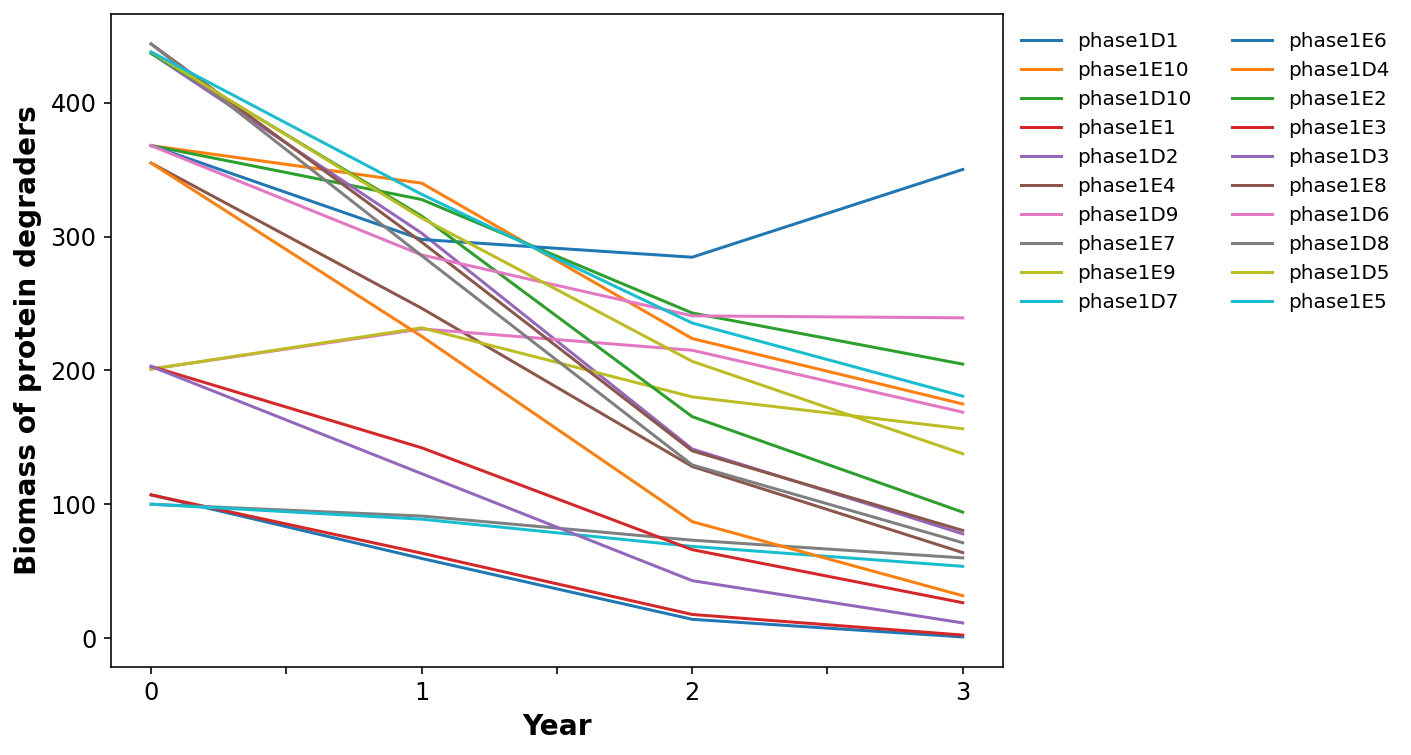

In [ ]:
fig = table_lowprot.T.plot(fontsize=12,legend=False,figsize=(8,6))
fig.legend(bbox_to_anchor=(1, 1),ncol=2,frameon = False)
fig.set_xlabel('Year',size=14, weight = 'bold')
fig.set_ylabel('Biomass of protein degraders',size=14, weight = 'bold')
#fig.set_ylim(0,40000)

# ***** Growth rate of protein degraders

In [ ]:
# t0
table_t0 = pd.read_csv('specialists_t0_combined_22040201.csv')
table_t0_SubX = table_t0[(table_t0["substrate"] == 'Protein3')]
# year 3
table_year3 = pd.read_csv('specialists_year3_combined_22040201.csv')
table_year3_SubX = table_year3[(table_year3["substrate"] == 'Protein3')]
# concat
table_t0_SubX.set_index(['treatment_name'], inplace=True) 
table_year3_SubX.set_index(['treatment_name'], inplace=True) 
table_merge = pd.concat([table_t0_SubX['biomass_decomp_t0'], table_year3_SubX['biomass_specialist_year']], axis=1)
# add linear growth rate (sachant que time = 3 years = 1095 days) 
table_merge['linear_growth_rate'] = (table_merge['biomass_specialist_year'] - table_merge['biomass_decomp_t0']) / 1095
table_merge['exp_growth_rate'] = np.log( table_merge['biomass_specialist_year'] / table_merge['biomass_decomp_t0'] ) / 1095
# Only keep Desert samples
table_Desert = table_merge[table_merge.index.str[6].isin(['A'])]
len(table_Desert)

10

In [ ]:
x = np.array(table_Desert['biomass_decomp_t0'])
y = np.array(table_Desert['linear_growth_rate'])
y

array([-0.00769509, -0.14652726, -0.07338108,  0.27927856, -0.03695106,
       -0.21982076,  0.12096904, -0.1096537 ,  0.32001231, -0.02199595])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  from ipykernel import kernelapp as app


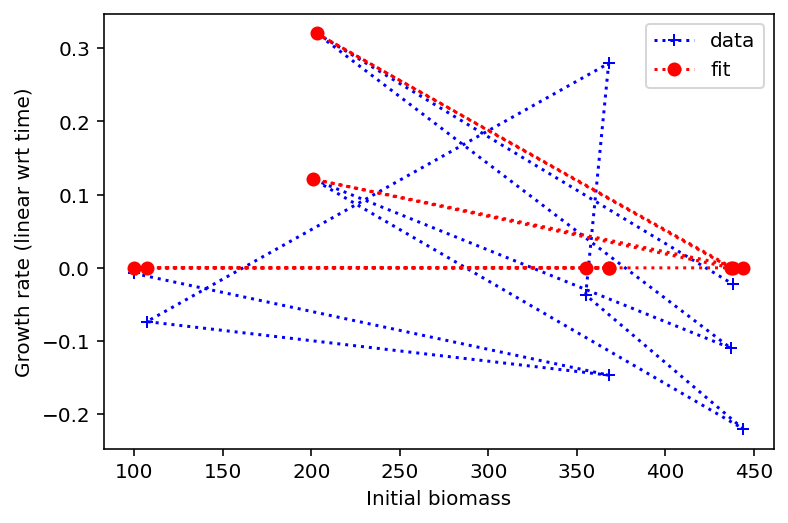

In [ ]:
# Normal distribution
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

x = np.array(table_Desert['biomass_decomp_t0'])
y = np.array(table_Desert['linear_growth_rate'])

n = len(x)                          #the number of data
mean = sum(x*y)/n                   #note this correction
sigma = sum(y*(x-mean)**2)/n        #note this correction

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma], maxfev=50000)

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.legend()
plt.xlabel('Initial biomass')
plt.ylabel('Growth rate (linear wrt time)')
plt.show()

In [ ]:
# Multiple regression linear model
import numpy as np
import statsmodels.api as sm

x = [np.array(table_Desert['biomass_decomp_t0'])]
y = np.array(table_Desert['linear_growth_rate'])

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.9311
Date:                Wed, 06 Apr 2022   Prob (F-statistic):              0.363
Time:                        19:35:37   Log-Likelihood:                 4.1845
No. Observations:                  10   AIC:                            -4.369
Df Residuals:                       8   BIC:                            -3.764
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0004      0.000     -0.965      0.3

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


intercept = 0.13732783224625855
slope = [-0.00042007]


Text(0, 0.5, 'Growth rate (linear wrt time) of protein degraders')

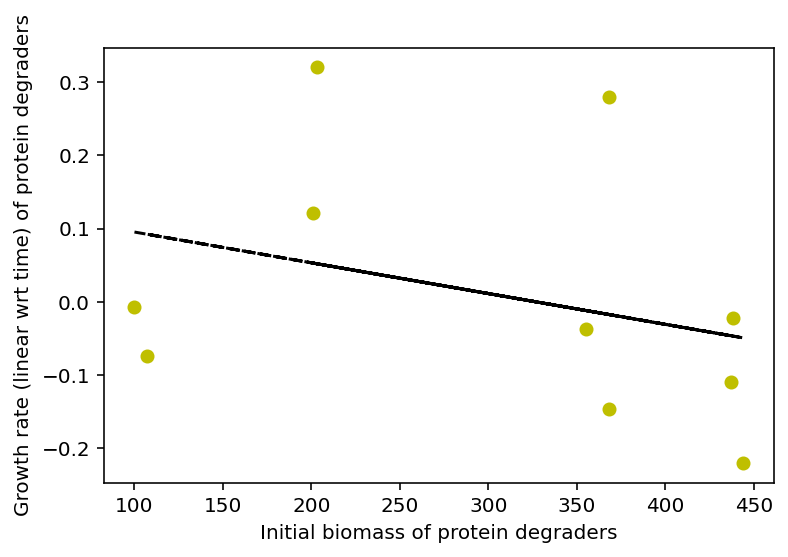

In [ ]:
# Plot
# Get intercept and slope of the linear regression - FUNGI NUMBER
# SLOPE = -0.22
from sklearn.linear_model import LinearRegression
import numpy as np

x = np.array(table_Desert['biomass_decomp_t0']).reshape(-1, 1)
y = np.array(table_Desert['linear_growth_rate'])

lm = LinearRegression()
lm.fit(x, y)

print('intercept =', lm.intercept_)
print('slope =',lm.coef_)

# PLOT
x = np.array(table_Desert['biomass_decomp_t0'])
y = np.array(table_Desert['linear_growth_rate'])

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
plt.xlabel("Initial biomass of protein degraders")
plt.ylabel("Growth rate (linear wrt time) of protein degraders")

# **** Average of CNP overflow per litter and per degrader

Text(0, 0.5, 'Nutrient overflow (mg.cm-3)')

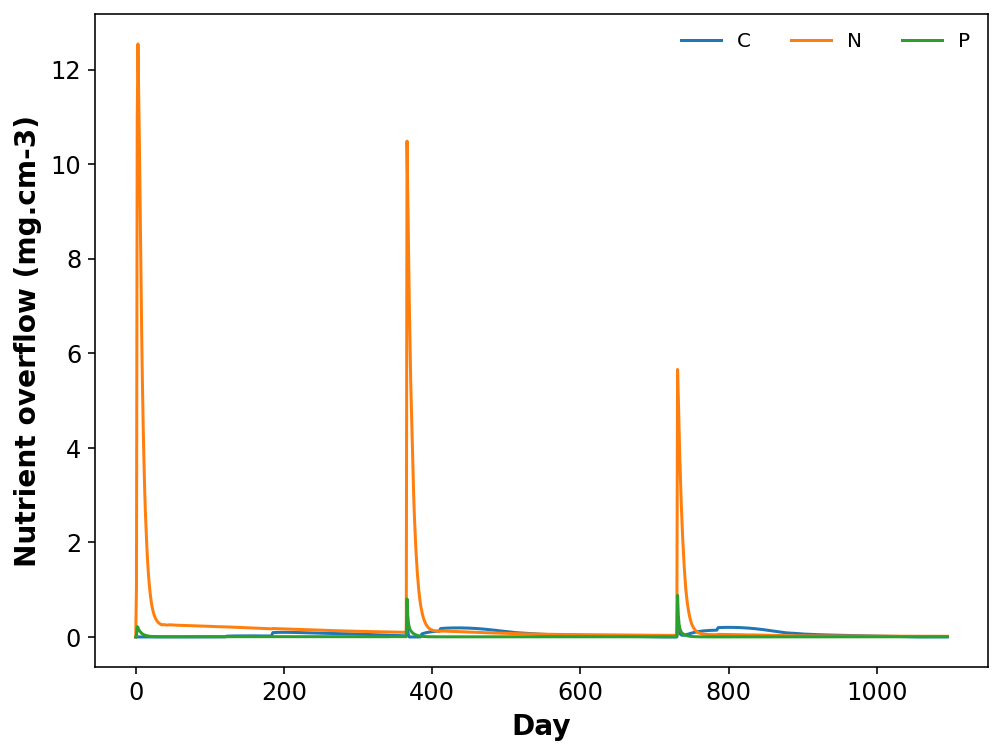

In [ ]:
# Average CNP overflow per degrader type per litter
OverflowSeries = pd.read_csv('overflow_perdegrader_combined_22040202.csv')
OverflowSeries_DegraderX_LitterX = OverflowSeries[(OverflowSeries["degrader"] == 'Protein3') & (OverflowSeries["litter"] == 'D')]
OverflowSeries_mean = OverflowSeries_DegraderX_LitterX.groupby(['nutrient'], as_index=False).mean()
OverflowSeries_data = OverflowSeries_mean.iloc[:,4:]
OverflowSeries_data.insert(loc=0,column='nutrient', value=OverflowSeries_mean['nutrient'])
OverflowSeries_data = OverflowSeries_data.set_index('nutrient')

fig = OverflowSeries_data.T.iloc[:,:].plot(fontsize=12,legend=False,figsize=(8,6))
fig.legend(bbox_to_anchor=(1, 1),ncol=10,frameon = False)
fig.set_xlabel('Day',size=14, weight = 'bold')
fig.set_ylabel('Nutrient overflow (mg.cm-3)',size=14, weight = 'bold')
#fig.set_ylim(0,40000)

# **** Time series of CNP overflow from Protein3 degraders

Text(0, 0.5, 'Nutrient overflow (mg.cm-3)')

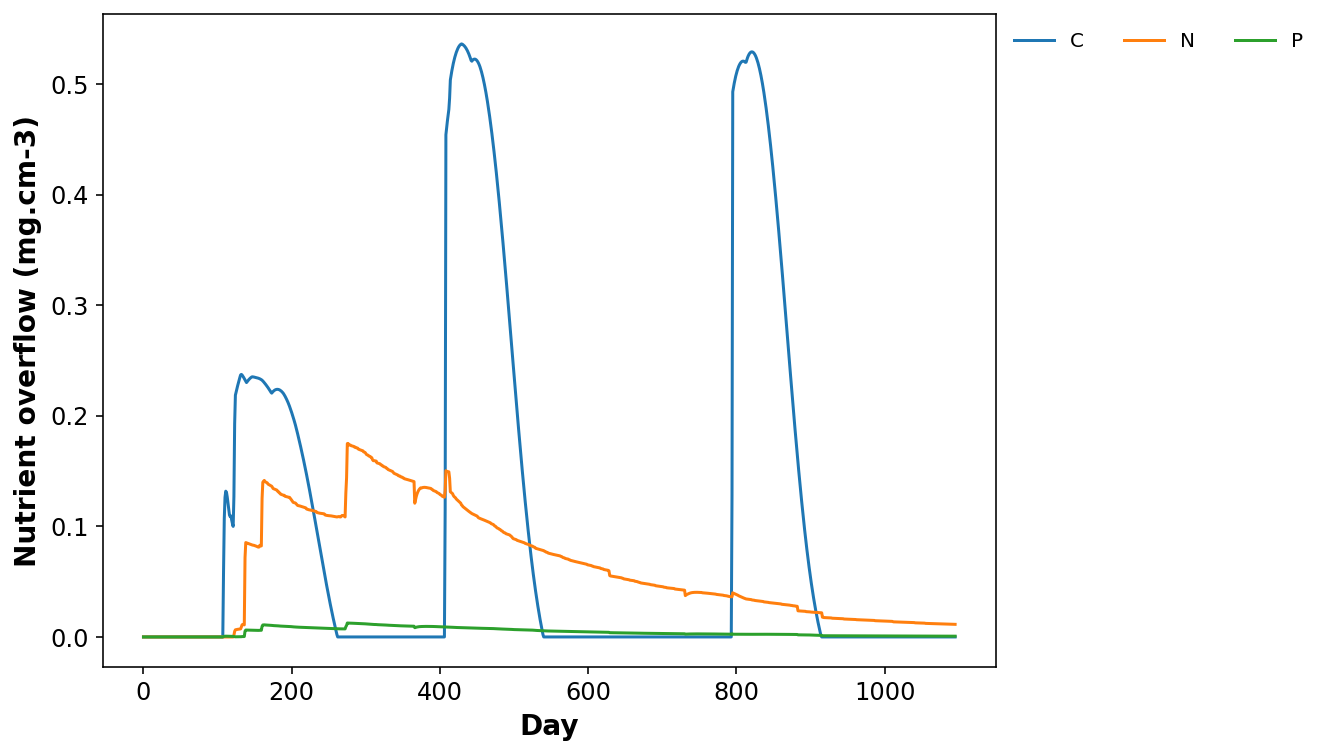

In [ ]:
OverflowSeries = pd.read_csv('overflow_perdegrader_3_D2_Protein3_jobID=11950942.csv')  # D6
#OverflowSeries = pd.read_csv('overflow_perdegrader_3_A6_Protein3_jobID=11950919.csv')  # A6
OverflowSeries = OverflowSeries.set_index('Unnamed: 0')

fig = OverflowSeries.T.iloc[:,:].plot(fontsize=12,legend=False,figsize=(8,6))
fig.legend(bbox_to_anchor=(1, 1),ncol=10,frameon = False)
fig.set_xlabel('Day',size=14, weight = 'bold')
fig.set_ylabel('Nutrient overflow (mg.cm-3)',size=14, weight = 'bold')
#fig.set_ylim(0,40000)

# ***** Biomass without lower P stoichiometric limit!

In [ ]:
### File name
# Normal = 22032201
# No P lower bound = 22033004
# No C lower bound = 22033003
# No nutrient diffusion = 22033002

# t0 (= final day of P1)
table_t0 = pd.read_csv('specialists_phase1_t0_combined_22033002.csv')
table_t0_N = table_t0[(table_t0["substrate"] == 'Protein3')]
# year 3 of phase 1
table_LC = pd.read_csv('specialists_year3_combined_22033002.csv')
table_LC_N = table_LC[(table_LC["substrate"] == 'Protein3')]
# Build dataframe
col1 = table_t0_N.loc[(table_t0_N['litter'] == 'A')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "PI-t0"})
col2 = table_LC_N.loc[(table_LC_N['litter'] == 'A')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "D-P1"})
col3 = table_LC_N.loc[(table_LC_N['litter'] == 'B')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Sc-P1"})
col4 = table_LC_N.loc[(table_LC_N['litter'] == 'C')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "G-P1"})
col5 = table_LC_N.loc[(table_LC_N['litter'] == 'D')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Po-P1"})
col6 = table_LC_N.loc[(table_LC_N['litter'] == 'E')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Sa-P1"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6],axis=1)
Table_for_plot

PI-t0        D-P1       Sc-P1        G-P1       Po-P1       Sa-P1
0  107.0   68.680404  256.375000   72.247382  154.499393  131.370755
1  368.0  194.101352  236.864916  182.985640    9.982194  142.291597
2  203.0  214.162970   74.877499  213.073108   87.211224   97.411607
3  368.0  228.808764  208.086190  242.152976   53.597267  203.941394
4  444.0  219.719806  201.804318  189.461373   68.895261   19.171353
5  437.0  273.457783  224.650399  234.170321  190.128429  215.511384
6  438.0  291.711204   77.032414  205.452051   56.977609   48.451619
7  100.0  186.734945  189.336875   75.326603   27.864955   45.180427
8  201.0  256.528703  253.171765  334.042959   94.218303  215.468962
9  355.0   74.019789  291.346326  217.611958  140.312253  108.664057

[(0.0, 1000.0)]

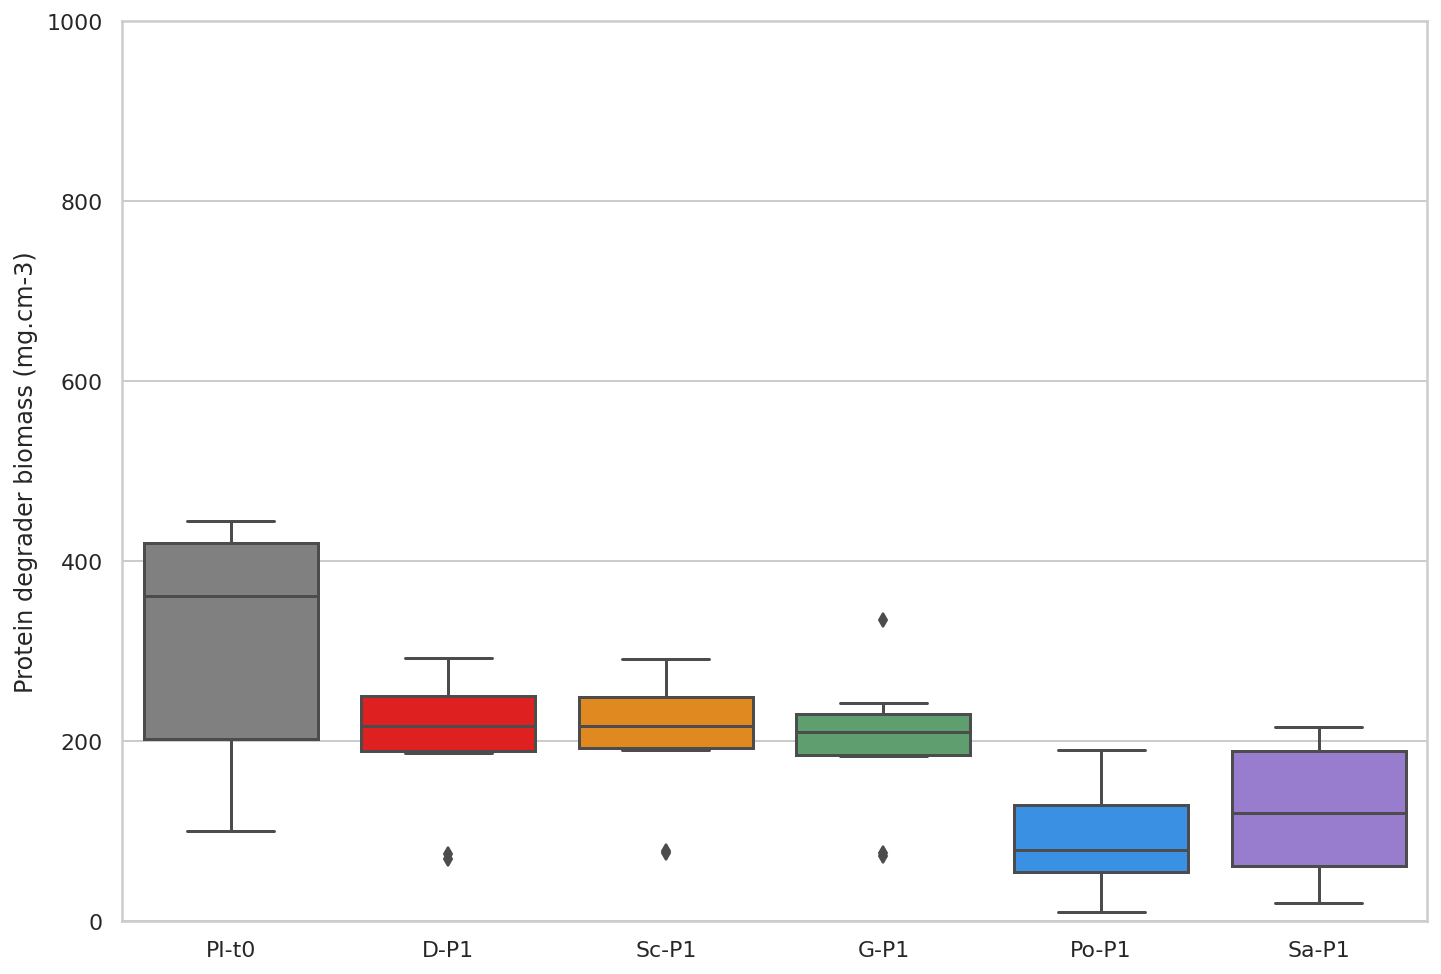

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"PI-t0":"grey",
          "D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax.set_ylabel('Protein degrader biomass (mg.cm-3)')
ax.set_xlabel('')
ax.set(ylim=(0, 1000))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "biomass"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[1],anov_df_T[5]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('biomass ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                 sum_sq    df         F    PR(>F)
treatment  30456.090896   1.0  5.531984  0.030256
Residual   99098.200547  18.0       NaN       NaN


In [ ]:
anov_df

biomass treatment  seed
0   107.000000     PI-t0     1
1   368.000000     PI-t0     2
2   203.000000     PI-t0     3
3   368.000000     PI-t0     4
4   444.000000     PI-t0     5
5   437.000000     PI-t0     6
6   438.000000     PI-t0     7
7   100.000000     PI-t0     8
8   201.000000     PI-t0     9
9   355.000000     PI-t0    10
10  131.370755     Sa-P1     1
11  142.291597     Sa-P1     2
12   97.411607     Sa-P1     3
13  203.941394     Sa-P1     4
14   19.171353     Sa-P1     5
15  215.511384     Sa-P1     6
16   48.451619     Sa-P1     7
17   45.180427     Sa-P1     8
18  215.468962     Sa-P1     9
19  108.664057     Sa-P1    10

# ***** Biomass/substrate hemicellulose vs protein 3 degraders

In [ ]:
# Biomass/substrate with default parameters
Input_D_H = 1.85
Input_D_P3 = 13.81
Input_Po_H = 25.50
Input_Po_P3 = 2.65
# t0 (= final day of P1)
table_t0 = pd.read_csv('specialists_phase1_t0_combined_22032301.csv')
table_t0_D_H = table_t0[(table_t0["litter"] == 'A') & (table_t0["substrate"] == 'Hemicellulose')]
table_t0_D_P3 = table_t0[(table_t0["litter"] == 'A') & (table_t0["substrate"] == 'Protein3')]
table_t0_Po_H = table_t0[(table_t0["litter"] == 'D') & (table_t0["substrate"] == 'Hemicellulose')]
table_t0_Po_P3 = table_t0[(table_t0["litter"] == 'D') & (table_t0["substrate"] == 'Protein3')]
# year 3 of phase 1 in Po
table_LC = pd.read_csv('specialists_year3_combined_22032301.csv')
table_LC_D_H = table_LC[(table_LC["litter"] == 'A') & (table_LC["substrate"] == 'Hemicellulose')]
table_LC_D_P3 = table_LC[(table_LC["litter"] == 'A') & (table_LC["substrate"] == 'Protein3')]
table_LC_Po_H = table_LC[(table_LC["litter"] == 'D') & (table_LC["substrate"] == 'Hemicellulose')]
table_LC_Po_P3 = table_LC[(table_LC["litter"] == 'D') & (table_LC["substrate"] == 'Protein3')]
# Build dataframe
col1 = (table_t0_D_H["biomass_decomp_t0"]/Input_D_H).to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "t0-D-H"})
col2 = (table_t0_D_P3["biomass_decomp_t0"]/Input_D_P3).to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "t0-D-P3"})
col3 = (table_LC_D_H["biomass_specialist_year"]/Input_D_H).to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "D-H"})
col4 = (table_LC_D_P3["biomass_specialist_year"]/Input_D_P3).to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "D-P3"})
col5 = (table_t0_Po_H["biomass_decomp_t0"]/Input_Po_H).to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "t0-Po-H"})
col6 = (table_t0_Po_P3["biomass_decomp_t0"]/Input_Po_P3).to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "t0-Po-P3"})
col7 = (table_LC_Po_H["biomass_specialist_year"]/Input_Po_H).to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Po-H"})
col8 = (table_LC_Po_P3["biomass_specialist_year"]/Input_Po_P3).to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Po-P3"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7,col8],axis=1)
Table_for_plot

t0-D-H    t0-D-P3          D-H        D-P3    t0-Po-H    t0-Po-P3  \
0  175.675676  26.647357  1140.927000   17.921268  11.098039  165.283019   
1  121.621622  25.706010   102.542160  126.959949   4.000000  167.547170   
2  178.378378  26.647357    72.520587   69.248274  15.725490  138.867925   
3   55.135135  14.554671     0.000000    1.697543   0.000000   76.603774   
4  216.756757   7.748009    27.515837   20.689312  12.745098  133.962264   
5  305.405405  32.150615     0.000000  126.777776  22.156863   37.735849   
6    0.000000  14.699493  1518.915719   13.261961   6.666667   75.849057   
7  152.972973  31.716148    48.378057    9.391397  21.058824  138.867925   
8   91.891892  31.643736    26.885397   18.323783   8.823529  164.905660   
9  290.270270   7.241130    56.484753   11.215692  12.941176   40.377358   

         Po-H        Po-P3  
0    3.022446     4.091547  
1    0.090698  2112.650453  
2   11.005872    41.864378  
3    0.000000    59.131806  
4  136.967200   114.853875  
5  323.468553   109.721883  
6    6.409734     0.327617  
7   10.268584    23.146364  
8    6.692344    18.980639  
9   10.065296   959.796068

[(0.0, 400.0)]

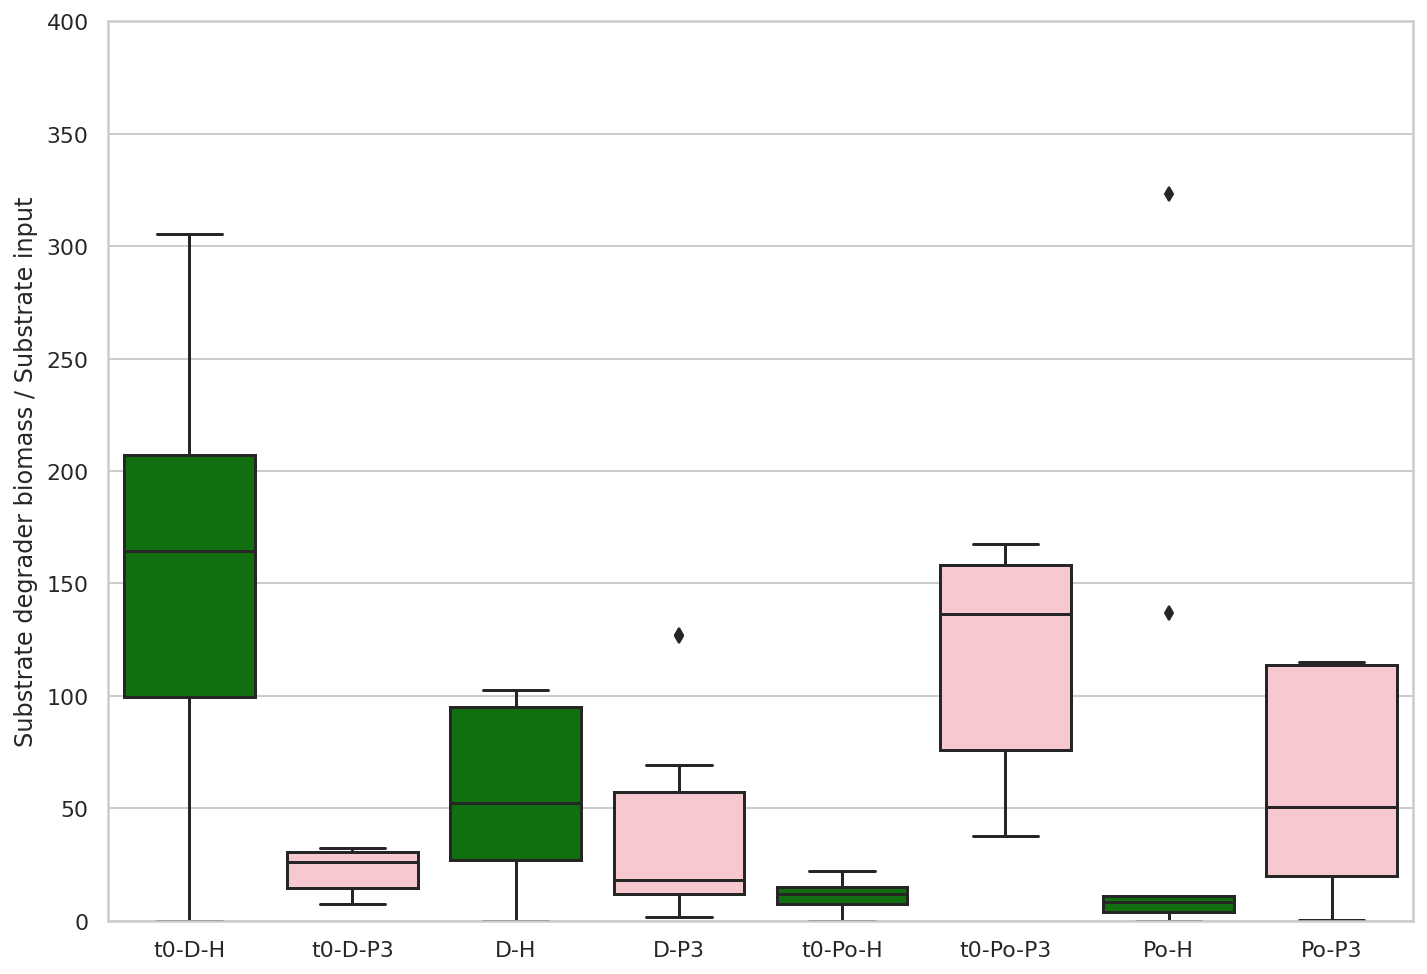

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"t0-D-H":"green","t0-D-P3":"pink","D-H":"green","D-P3":"pink","t0-Po-H":"green","t0-Po-P3":"pink","Po-H":"green","Po-P3":"pink"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax.set_ylabel('Substrate degrader biomass / Substrate input')
ax.set_xlabel('')
ax.set(ylim=(0, 400))

In [ ]:
# Biomass/substrate with default parameters
Input_D_H = 1.85
Input_D_P3 = 13.81
Input_Po_H = 25.50
Input_Po_P3 = 2.65
# t0 (= final day of P1)
table_t0 = pd.read_csv('specialists_phase1_t0_combined_22032201.csv')
table_t0_D_H = table_t0[(table_t0["litter"] == 'A') & (table_t0["substrate"] == 'Hemicellulose')]
table_t0_D_P3 = table_t0[(table_t0["litter"] == 'A') & (table_t0["substrate"] == 'Protein3')]
table_t0_Po_H = table_t0[(table_t0["litter"] == 'D') & (table_t0["substrate"] == 'Hemicellulose')]
table_t0_Po_P3 = table_t0[(table_t0["litter"] == 'D') & (table_t0["substrate"] == 'Protein3')]
# year 3 of phase 1 in Po
table_LC = pd.read_csv('specialists_year3_combined_22032201.csv')
table_LC_D_H = table_LC[(table_LC["litter"] == 'A') & (table_LC["substrate"] == 'Hemicellulose')]
table_LC_D_P3 = table_LC[(table_LC["litter"] == 'A') & (table_LC["substrate"] == 'Protein3')]
table_LC_Po_H = table_LC[(table_LC["litter"] == 'D') & (table_LC["substrate"] == 'Hemicellulose')]
table_LC_Po_P3 = table_LC[(table_LC["litter"] == 'D') & (table_LC["substrate"] == 'Protein3')]
# Build dataframe
col1 = (table_t0_D_H["biomass_decomp_t0"]/Input_D_H).to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "t0-D-H"})
col2 = (table_t0_D_P3["biomass_decomp_t0"]/Input_D_P3).to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "t0-D-P3"})
col3 = (table_LC_D_H["biomass_specialist_year"]/Input_D_H).to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "D-H"})
col4 = (table_LC_D_P3["biomass_specialist_year"]/Input_D_P3).to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "D-P3"})
col5 = (table_t0_Po_H["biomass_decomp_t0"]/Input_Po_H).to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "t0-Po-H"})
col6 = (table_t0_Po_P3["biomass_decomp_t0"]/Input_Po_P3).to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "t0-Po-P3"})
col7 = (table_LC_Po_H["biomass_specialist_year"]/Input_Po_H).to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Po-H"})
col8 = (table_LC_Po_P3["biomass_specialist_year"]/Input_Po_P3).to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Po-P3"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7,col8],axis=1)
Table_for_plot

t0-D-H    t0-D-P3         D-H       D-P3    t0-Po-H    t0-Po-P3  \
0   55.135135   7.241130  443.440758  22.949254   8.823529   40.377358   
1  121.621622   7.748009   13.111200  36.616273  12.941176  164.905660   
2    0.000000  26.647357   25.459449  31.983254  22.156863   37.735849   
3  216.756757  25.706010  197.268425  14.494229   6.666667   75.849057   
4  152.972973  32.150615   44.977402  14.472311  21.058824  133.962264   
5  175.675676  26.647357   52.173821  23.783895   0.000000  138.867925   
6   91.891892  14.554671    0.000000   1.929595  15.725490   76.603774   
7  305.405405  31.643736  273.854134  23.618756  12.745098  167.547170   
8  290.270270  31.716148   23.932207  57.818484  11.098039  138.867925   
9  178.378378  14.699493    0.000000   6.630983   4.000000  165.283019   

        Po-H      Po-P3  
0  13.437276  26.880631  
1   0.000000  88.276985  
2  11.911126  53.102415  
3   2.585255   4.024705  
4   0.094825  20.225384  
5  25.483672  63.689953  
6  12.134536  12.023571  
7   5.203417  77.253976  
8  29.776814   0.305157  
9  15.450448  29.392461

[(0.0, 400.0)]

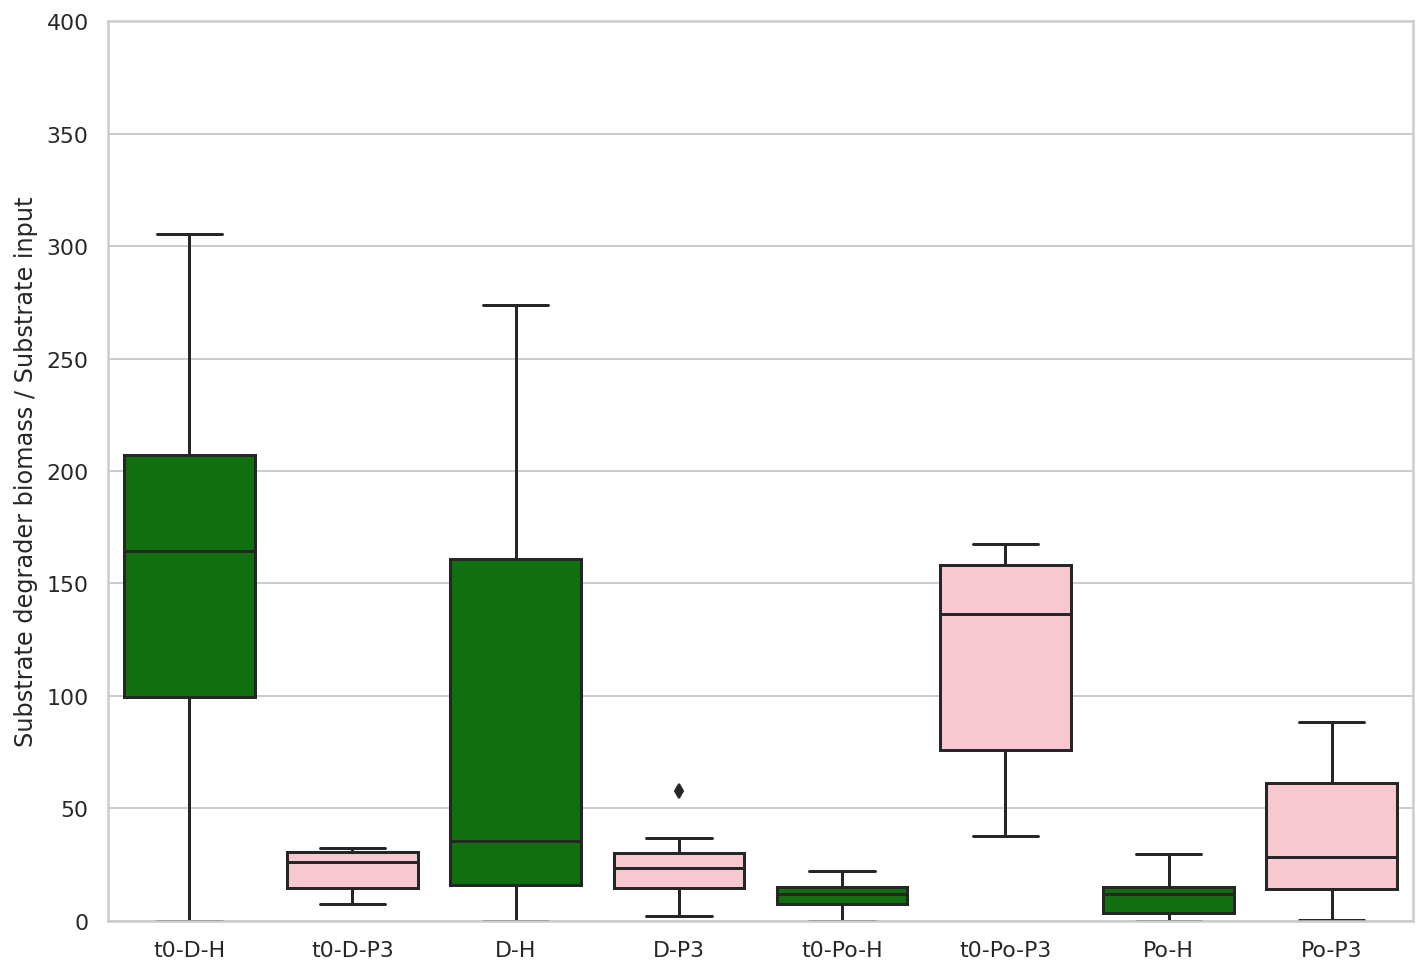

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"t0-D-H":"green","t0-D-P3":"pink","D-H":"green","D-P3":"pink","t0-Po-H":"green","t0-Po-P3":"pink","Po-H":"green","Po-P3":"pink"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax.set_ylabel('Substrate degrader biomass / Substrate input')
ax.set_xlabel('')
ax.set(ylim=(0, 400))

In [ ]:
# Build dataframe
col1 = (table_t0_H["biomass_decomp_t0"]).to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "t0-H"})
col2 = (table_t0_P3["biomass_decomp_t0"]).to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "t0-P3"})
col3 = (table_LC_D_H["biomass_specialist_year"]).to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "D-H"})
col4 = (table_LC_D_P3["biomass_specialist_year"]).to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "D-P3"})
col5 = (table_LC_Po_H["biomass_specialist_year"]).to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Po-H"})
col6 = (table_LC_Po_P3["biomass_specialist_year"]).to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Po-P3"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6],axis=1)
Table_for_plot

t0-H  t0-P3         D-H        D-P3        Po-H       Po-P3
0  102.0  100.0  820.365401  316.929200  342.650540   71.233671
1  225.0  107.0   24.255720  505.670731    0.000000  233.934009
2    0.0  368.0   47.099981  441.688744  303.733704  140.721399
3  401.0  355.0  364.946586  200.165306   65.923994   10.665469
4  283.0  444.0   83.208194  199.862611    2.418026   53.597267
5  325.0  368.0   96.521569  328.455589  649.833647  168.778375
6  170.0  201.0    0.000000   26.647713  309.430672   31.862463
7  565.0  437.0  506.630147  326.175018  132.687122  204.723037
8  537.0  438.0   44.274583  798.473262  759.308768    0.808667
9  330.0  203.0    0.000000   91.573872  393.986432   77.890022

Text(0.5, 0, '')

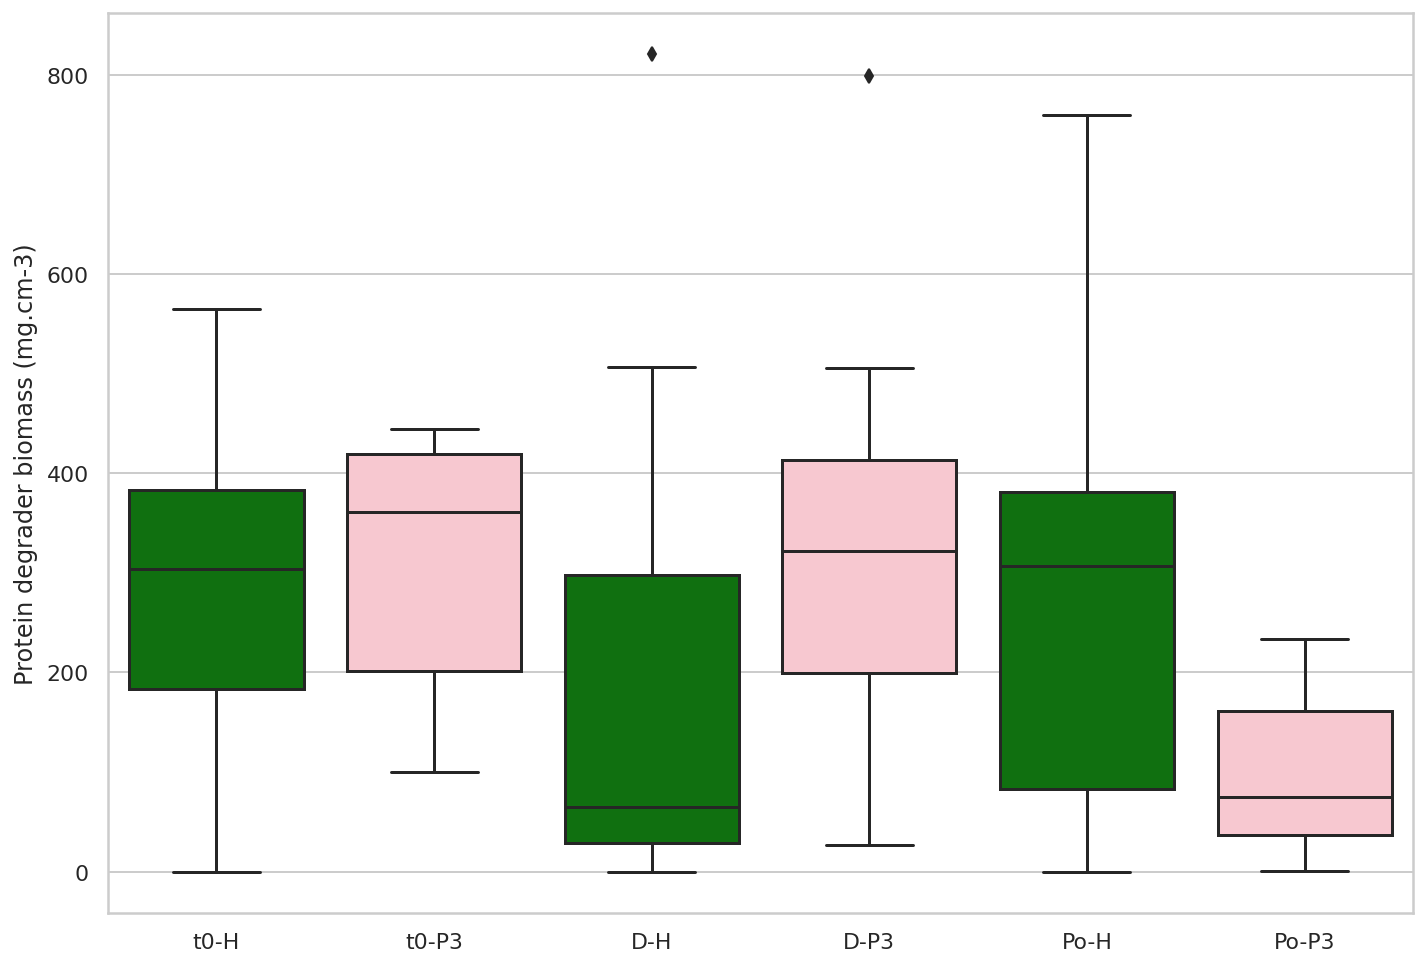

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"t0-H":"green","t0-P3":"pink","D-H":"green","D-P3":"pink","Po-H":"green","Po-P3":"pink"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax.set_ylabel('Protein degrader biomass (mg.cm-3)')
ax.set_xlabel('')
#ax.set(ylim=(0, 5e-3))

# ****** Figure 5a (protein decay without C:N constraints)

In [ ]:
phase1 = pd.read_csv('decay_results_persubstrate_combined_22032302.csv')
phase1_SubX = phase1.loc[phase1['substrate'].isin(['Protein1','Protein2','Protein3'])]

#phase2 = pd.read_csv('decay_results_persubstrate_combined_22032202.csv')
#phase2_DtoPo  = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv') & (phase2["substrate"].isin(['Protein1','Protein2','Protein3']))]
#phase2_PotoD  = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv') & (phase2["substrate"].isin(['Protein1','Protein2','Protein3']))]

col1 = phase1_SubX.loc[phase1_SubX['litter'] == 'An'].groupby(['treatment_name','seed_number'], as_index=False).mean()['decay_year_3'].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D-P1"})
col2 = phase1_SubX.loc[phase1_SubX['litter'] == 'Bn'].groupby(['treatment_name','seed_number'], as_index=False).mean()['decay_year_3'].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sc-P1"})
col3 = phase1_SubX.loc[phase1_SubX['litter'] == 'Cn'].groupby(['treatment_name','seed_number'], as_index=False).mean()['decay_year_3'].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "G-P1"})
col4 = phase1_SubX.loc[phase1_SubX['litter'] == 'Dn'].groupby(['treatment_name','seed_number'], as_index=False).mean()['decay_year_3'].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po-P1"})
col5 = phase1_SubX.loc[phase1_SubX['litter'] == 'En'].groupby(['treatment_name','seed_number'], as_index=False).mean()['decay_year_3'].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sa-P1"})
#col6 = phase2_DtoPo.groupby(['treatment_name','seed_number'], as_index=False).mean()['decay_year_3'].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D to Po"})
#col7 = phase2_PotoD.groupby(['treatment_name','seed_number'], as_index=False).mean()['decay_year_3'].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po to D"})

Table_for_plot = pd.concat([col1,col2,col3,col4,col5],axis=1)
Table_for_plot

D-P1     Sc-P1      G-P1     Po-P1     Sa-P1
0  0.000043  0.000050  0.000052  0.000003  0.000006
1  0.000131  0.000136  0.000147  0.000009  0.000028
2  0.000159  0.000162  0.000167  0.000012  0.000027
3  0.000119  0.000125  0.000134  0.000013  0.000027
4  0.000120  0.000121  0.000123  0.000007  0.000020
5  0.000138  0.000155  0.000145  0.000012  0.000035
6  0.000126  0.000081  0.000091  0.000039  0.000064
7  0.000017  0.000037  0.000034  0.000009  0.000015
8  0.000098  0.000115  0.000116  0.000008  0.000016
9  0.000079  0.000087  0.000081  0.000004  0.000010

[(0.0, 0.0007)]

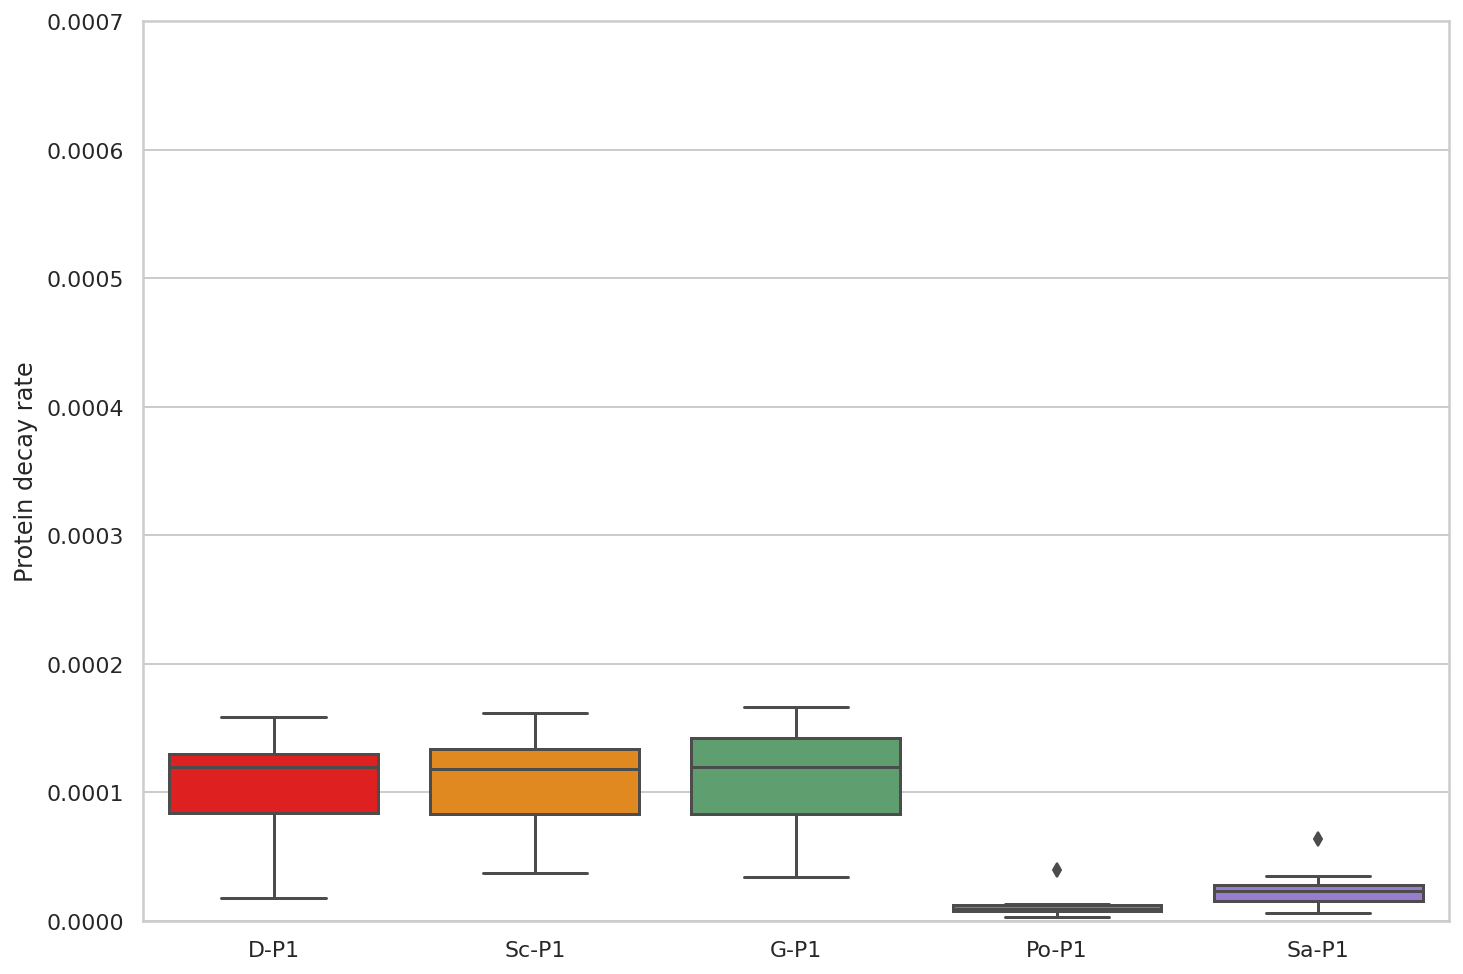

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
#ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Protein decay rate')
ax.set_xlabel('')
ax.set(ylim=(0, 0.0007))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "biomass"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[0],anov_df_T[4]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('biomass ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                 sum_sq    df          F    PR(>F)
treatment  2.911081e-08   1.0  10.924336  0.003936
Residual   4.796580e-08  18.0        NaN       NaN


In [ ]:
anov_df

biomass treatment  seed
0   2.948961e-05      D-P1     1
1   9.328109e-05      D-P1     2
2   1.082640e-04      D-P1     3
3   2.253939e-04      D-P1     4
4   1.022601e-04      D-P1     5
5   1.256277e-04      D-P1     6
6   1.954990e-04      D-P1     7
7   1.728214e-05      D-P1     8
8   8.430883e-05      D-P1     9
9   1.501916e-04      D-P1    10
10  4.148925e-05     Sc-P1     1
11  2.106538e-07     Sc-P1     2
12  1.278520e-04     Sc-P1     3
13  2.656358e-04     Sc-P1     4
14  1.103389e-04     Sc-P1     5
15  1.621873e-04     Sc-P1     6
16  1.644726e-04     Sc-P1     7
17  8.781624e-05     Sc-P1     8
18  1.078158e-04     Sc-P1     9
19  1.665641e-03     Sc-P1    10

# ***** Figure 5b (Figure 3b without C:N stoichiometric constraints)

In [ ]:
# t0 (= final day of P1)
#table_t0 = pd.read_csv('specialists_phase1_t0_combined_22032201.csv')    #NORMAL
#table_t0 = pd.read_csv('specialists_phase1_t0_combined_22032301.csv')    #CN stoich
table_t0 = pd.read_csv('specialists_phase1_t0_combined_22032302.csv')    #Protein N by C

table_t0_N = table_t0[(table_t0["substrate"] == 'Protein3')]

# year 3 of phase 1
#table_LC = pd.read_csv('specialists_year3_combined_22032201.csv')    #NORMAL
#table_LC = pd.read_csv('specialists_year3_combined_22032301.csv')     #CN stoich
table_LC = pd.read_csv('specialists_year3_combined_22032302.csv')    #Protein N by C

table_LC_N = table_LC[(table_LC["substrate"] == 'Protein3')]

# t0 of phase 2
#table_tII0 = pd.read_csv('specialists_t0_combined_22032202.csv')
#table_tII0_N = table_tII0[(table_tII0["substrate"] == 'Protein3') & (table_tII0["invaders"] == 'NoInv')]
# year 3 of phase 2 NoInv
#table_LCII = pd.read_csv('specialists_year3_combined_22032202.csv')
#table_LCII_N = table_LCII[(table_LCII["substrate"] == 'Protein3') & (table_LCII["invaders"] == 'NoInv')]
# Build dataframe
col1 = table_t0_N.loc[(table_t0_N['litter'] == 'An')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "PI-t0"})
col2 = table_LC_N.loc[(table_LC_N['litter'] == 'An')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "D-P1"})
col3 = table_LC_N.loc[(table_LC_N['litter'] == 'Bn')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Sc-P1"})
col4 = table_LC_N.loc[(table_LC_N['litter'] == 'Cn')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "G-P1"})
col5 = table_LC_N.loc[(table_LC_N['litter'] == 'Dn')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Po-P1"})
col6 = table_LC_N.loc[(table_LC_N['litter'] == 'En')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Sa-P1"})
#col7 = table_LCII_N.loc[(table_LCII_N['final_litter'] == 'D') & (table_LCII_N['residents'] == 'ResA')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "DtoPo-y3"})
#col8 = table_LCII_N.loc[(table_LCII_N['final_litter'] == 'A') & (table_LCII_N['residents'] == 'ResD')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "PotoD-y3"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6],axis=1)
Table_for_plot

PI-t0        D-P1       Sc-P1        G-P1       Po-P1       Sa-P1
0  100.0  116.521001  246.928114  251.126873   13.285078   85.382840
1  355.0  213.786078  161.807461  221.598458   99.704591  189.630868
2  368.0  242.706584   83.550287   84.092327  102.256650  146.780231
3  107.0  147.070616  228.804641  165.025849   98.127902   87.274931
4  201.0  191.485977  172.906120  202.096977   71.603573   38.234608
5  444.0  213.618206  206.336357  166.773350   58.577764   47.207126
6  203.0  272.681806  105.336352   60.115979    1.298813   84.744559
7  438.0  136.515040  122.615779  139.042792   37.515731  114.650068
8  437.0   54.678427  210.410085  203.443424   78.371719    2.835992
9  368.0  101.370656   56.991089  130.540175   55.332099   80.441493

[(0.0, 1000.0)]

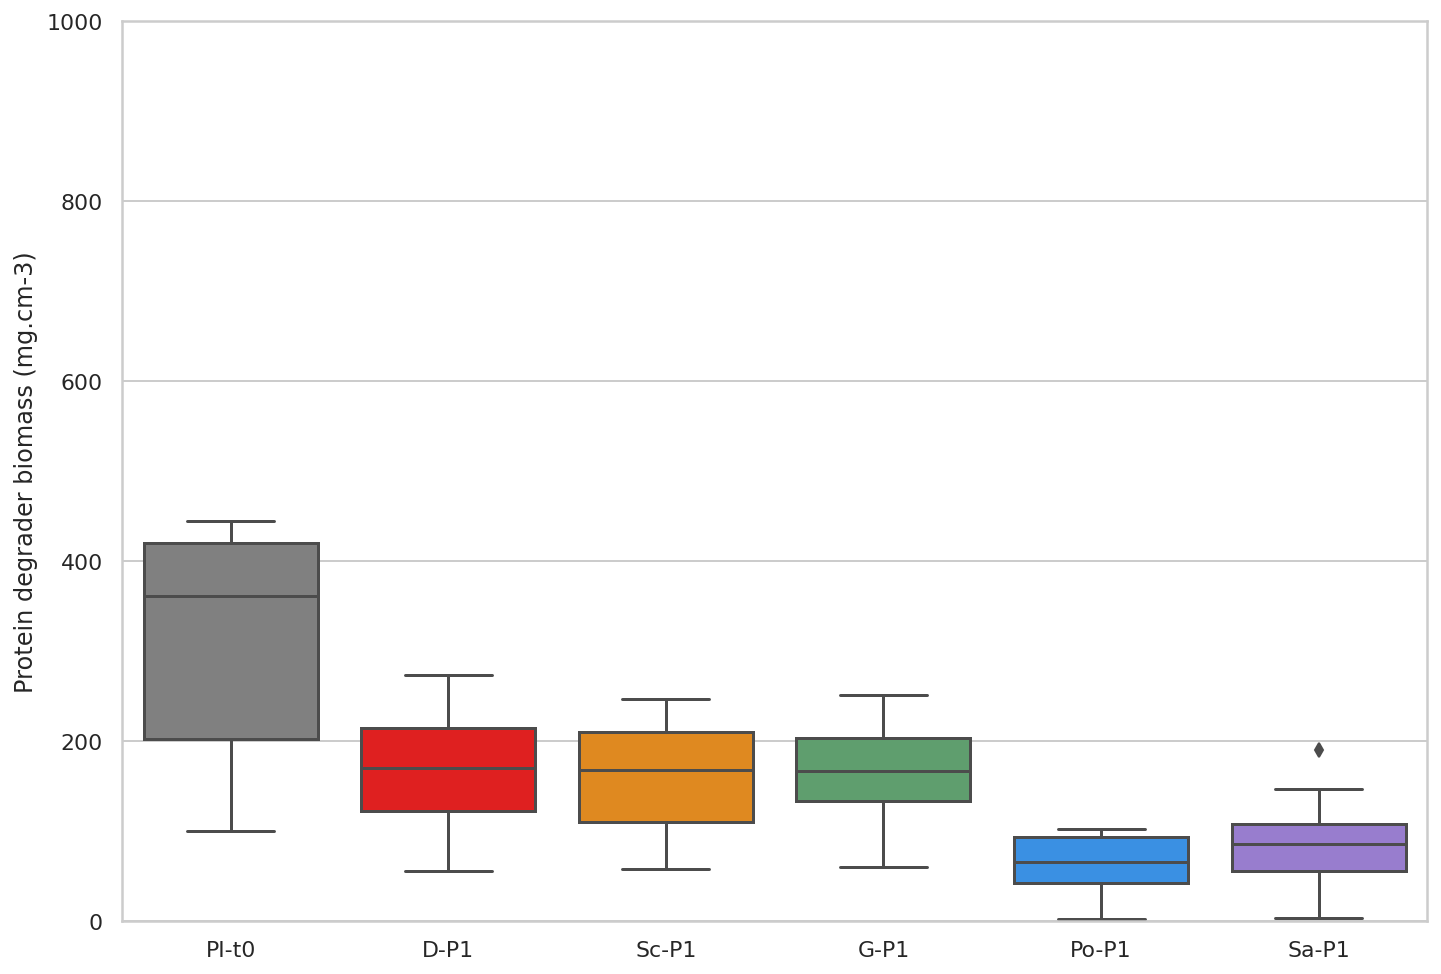

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"PI-t0":"grey",
          "D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax.set_ylabel('Protein degrader biomass (mg.cm-3)')
ax.set_xlabel('')
ax.set(ylim=(0, 1000))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "biomass"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[0],anov_df_T[5]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('biomass ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                 sum_sq    df         F    PR(>F)
treatment  4.580607e+06   1.0  1.149118  0.297897
Residual   7.175152e+07  18.0       NaN       NaN


In [ ]:
anov_df

biomass treatment  seed
0   302.000000     PI-t0     1
1   529.000000     PI-t0     2
2    75.000000     PI-t0     3
3   476.000000     PI-t0     4
4   502.000000     PI-t0     5
5   150.000000     PI-t0     6
6   279.000000     PI-t0     7
7   116.000000     PI-t0     8
8   282.000000     PI-t0     9
9   163.000000     PI-t0    10
10   17.859751      G-P1     1
11   33.566798      G-P1     2
12  199.815170      G-P1     3
13   62.691196      G-P1     4
14   80.702427      G-P1     5
15  183.982960      G-P1     6
16  387.457961      G-P1     7
17   34.212960      G-P1     8
18  367.040103      G-P1     9
19  202.486046      G-P1    10

# ***** Number of taxa per box initially

In [ ]:
# Average biomass per box on Day 0,I = 1.5 (box with bacteria only are around 1.2, some boxes are empty, boxes with fungi are around 28)
grid_raw = pd.read_csv('microbes_spatial_D6_jobID=11327305_day=0.csv')
Biomass = grid_raw.iloc[:,1]
n_taxa = 100
gridsize = 10000

Biomass_box = np.empty(gridsize)

for i in range(gridsize):
  Biomass_box[i] = Biomass[i:(n_taxa+i)].sum()

Biomass_box.mean()  

1.42969913274

In [ ]:
# Number of taxa on average per box
grid_raw = pd.read_csv('microbes_spatial_D6_jobID=11327305_day=0.csv')
Biomass = grid_raw.iloc[:,1]
n_taxa = 100
gridsize = 10000

Taxa_number = np.empty(gridsize)

for i in range(gridsize):
  Biomass_box = Biomass[i:(n_taxa+i)]
  Taxa_number[i] = len(Biomass_box[Biomass_box != 0])

Taxa_number.mean()  

0.5246

# ***** Figure 4 (with invaders) biomass

In [ ]:
# year 3 of phase 2 NoInv
table_LC_N = pd.read_csv('specialists_year3_combined_22032202.csv')
table_LC_N = table_LC_N[(table_LC_N['final_litter'] == 'B') & (table_LC_N['residents'] == 'ResA') & (table_LC_N["substrate"] == 'Hemicellulose')]
# Build dataframe
col1 = table_LC_N.loc[(table_LC_N['invaders'] == 'NoInv')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "NoInv"})
col2 = table_LC_N.loc[(table_LC_N['invaders'] == 'InvA')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Inv-D"})
col3 = table_LC_N.loc[(table_LC_N['invaders'] == 'InvB')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Inv-Sc"})
col4 = table_LC_N.loc[(table_LC_N['invaders'] == 'InvC')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Inv-G"})
col5 = table_LC_N.loc[(table_LC_N['invaders'] == 'InvD')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Inv-Po"})
col6 = table_LC_N.loc[(table_LC_N['invaders'] == 'InvE')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Inv-Sa"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6],axis=1)
Table_for_plot

NoInv         Inv-D        Inv-Sc         Inv-G        Inv-Po  \
0  9982.162330     76.317551  15994.738705    556.194332      0.000000   
1   257.051543    159.901257    430.055403    609.563249    172.079292   
2   463.083103  18220.586800      0.000000      0.000000    122.002549   
3   121.781969     87.293713    209.109770     86.232038      0.000000   
4     6.709786     10.454032      0.000000      0.000000    614.152608   
5    77.231516      0.000000    524.065187    122.449023  15518.894728   
6    64.481843     81.444384    323.043438    393.616512     97.912417   
7     0.000000      0.000000    566.053231    189.964904    315.819287   
8     0.000000    667.001502     75.903858  16466.453816    332.522891   
9   110.216557    443.087668    126.778028           NaN     30.022475   

         Inv-Sa  
0  15245.086713  
1    178.409602  
2    126.540189  
3    196.656265  
4    397.120118  
5      0.000000  
6    643.375696  
7     86.076522  
8      0.000000  
9    427.738312

[(0.0, 700.0)]

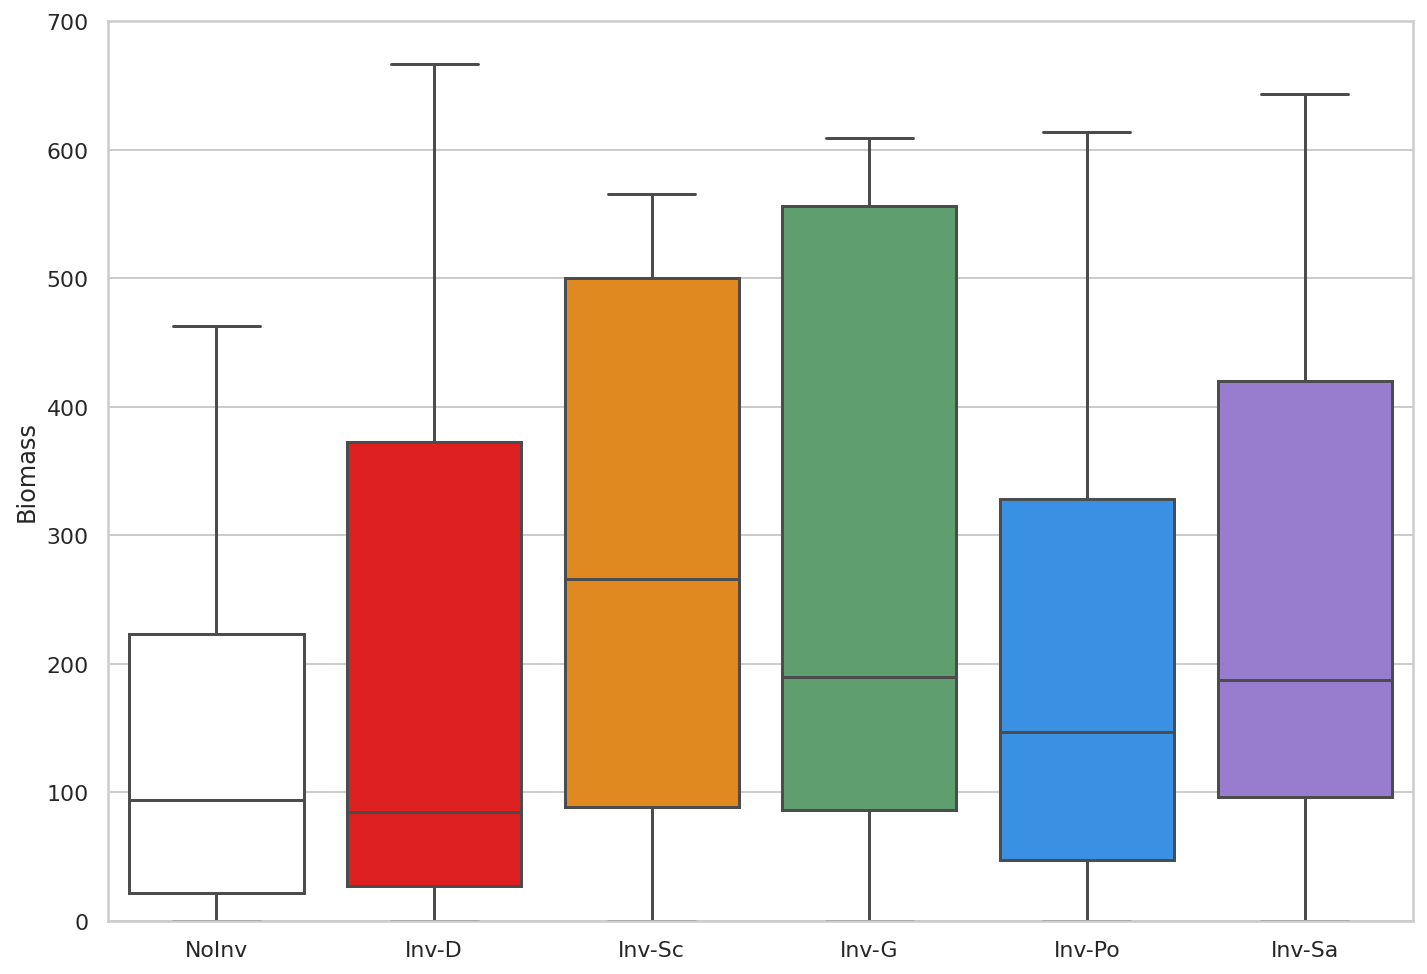

In [ ]:
# Boxplot
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"NoInv":"w", "Inv-D":"red", "Inv-Sc":"darkorange", "Inv-G":"g",
          "Inv-Po":"dodgerblue", "Inv-Sa":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
#ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
ax.set_ylabel('Biomass')
ax.set_xlabel('')
ax.set(ylim=(0, 700))

In [ ]:
table_t0_N.head()

Unnamed: 0  Unnamed: 0.1     jobID treatment_name final_litter residents  \
22           22             0  11687744     phase2ADE8            A      ResD   
23           23             0  11687706     phase2ADA6            A      ResD   
41           41             0  11687729     phase2ADD2            A      ResD   
85           85             0  11687696    phase2ADA10            A      ResD   
104         104             0  11687727     phase2ADC9            A      ResD   

    invaders  enz_max  seed_index  seed_number substrate  biomass_decomp_t0  \
22      InvE        3           8   2102121242  Protein3          71.851978   
23      InvA        3           6   2102121240  Protein3         717.664500   
41      InvD        3           2   2102121236  Protein3          58.536035   
85      InvA        3          10   2102121244  Protein3         192.787082   
104     InvC        3           9   2102121243  Protein3         291.727039   

     biomass_decomp_res_t0  biomass_decomp_inv_t0  
22               53.525832              18.326145  
23              266.828880             450.835621  
41               52.857861               5.678174  
85              187.134923               5.652159  
104             146.089113             145.637927

In [ ]:
# t0
table_t0 = pd.read_csv('specialists_t0_combined_22032202.csv')
table_t0_N = table_t0[(table_t0["final_litter"] == 'B') & (table_t0["residents"] == 'ResA') & (table_t0["substrate"] == 'Hemicellulose')]
# Build dataframe
col1 = table_t0_N.loc[(table_t0_N['invaders'] == 'NoInv')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "NoInv"})
col2 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvA')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "Inv-D"})
col3 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvB')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "Inv-Sc"})
col4 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvC')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "Inv-G"})
col5 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvD')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "Inv-Po"})
col6 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvE')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "Inv-Sa"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6],axis=1)
Table_for_plot['NoInv'] = Table_for_plot['NoInv'].fillna(0)
Table_for_plot

NoInv       Inv-D      Inv-Sc       Inv-G      Inv-Po      Inv-Sa
0    0.0  244.358767   17.521101  162.929993   25.908043  195.776928
1    0.0   17.080889   85.629305  170.969361  182.648568    0.000000
2    0.0    0.000000  148.011046  196.812060  102.855096   47.575919
3    0.0    0.000000  225.545099  236.388351  117.206202    0.000000
4    0.0    7.722284    0.000000    0.000000  260.974298  128.083859
5    0.0   18.443113    0.000000  149.770224  315.505758  197.536410
6    0.0  277.844300  190.029443   66.188757    0.000000   15.221600
7    0.0   16.511732  183.222669    0.000000   10.859087  165.086576
8    0.0  210.394921  149.649797  170.199668  160.004244  134.936153
9    0.0    4.731074  236.291195   25.376207    0.000000  262.135158

Text(0.5, 0, '')

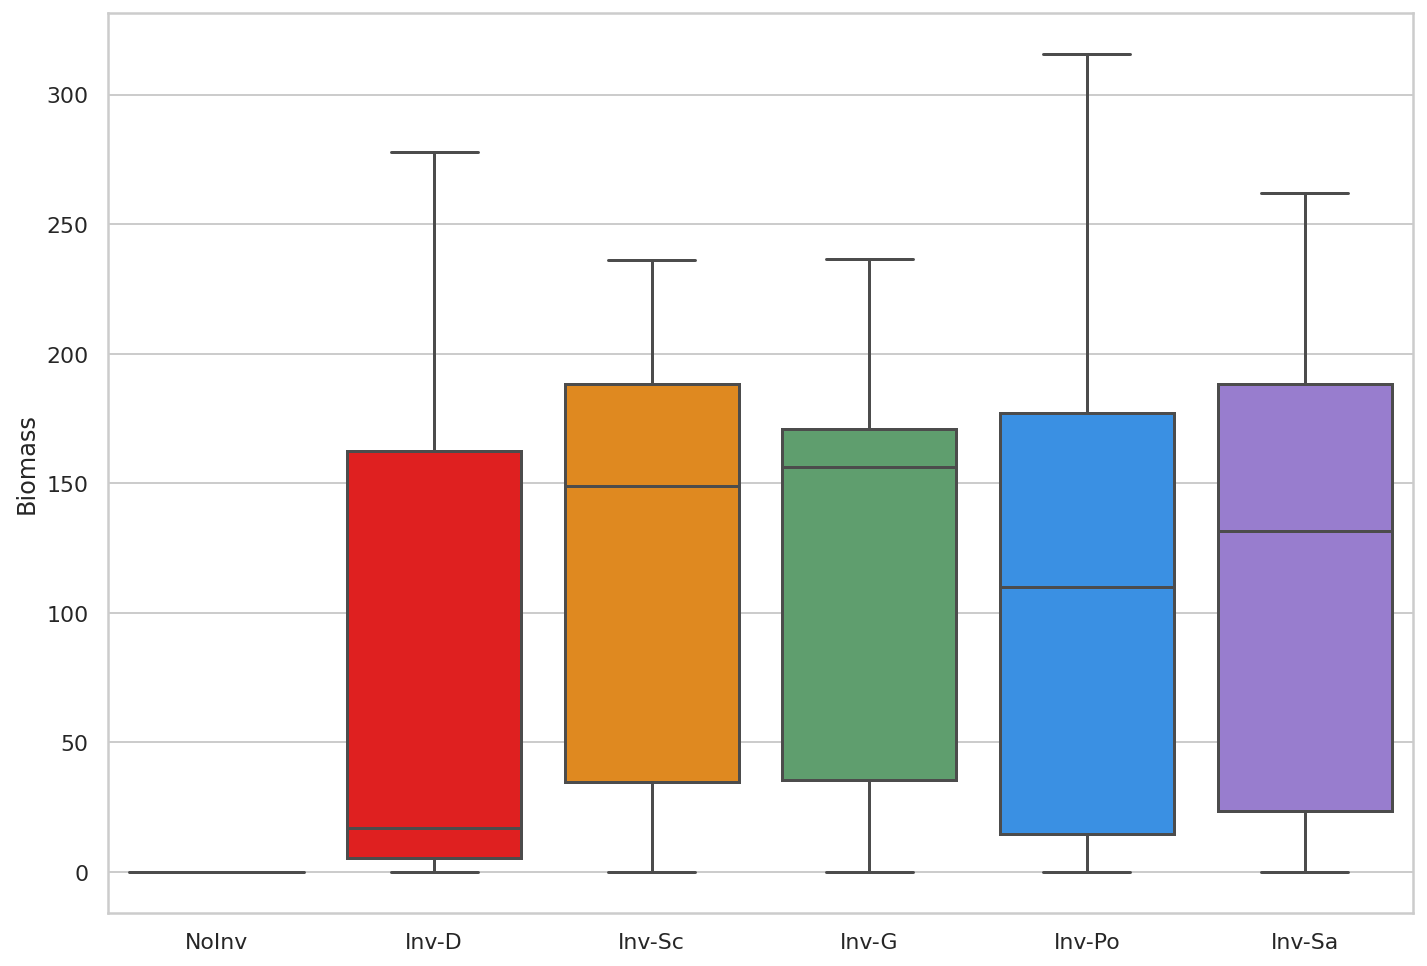

In [ ]:
# Boxplot
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"NoInv":"w", "Inv-D":"red", "Inv-Sc":"darkorange", "Inv-G":"g",
          "Inv-Po":"dodgerblue", "Inv-Sa":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
#ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
ax.set_ylabel('Biomass')
ax.set_xlabel('')
#ax.set(ylim=(0, 3e-4))

# ***** Figure 4 (with invaders) decay

In [ ]:
# Table phase 1
phase1 = pd.read_csv('decay_results_persubstrate_combined_22032001.csv')
# Table phase 2
phase2 = pd.read_csv('decay_results_persubstrate_combined_22032202.csv')
# Pick substrate
phase1_enzmax3 = phase1.loc[(phase1["enz_max"] == 3)  & (phase1['substrate'] == 'Hemicellulose')]
phase2_enzmax3  = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResA') & (phase2["substrate"] == 'Hemicellulose')]
# Boxplots for hypothesis 1
import seaborn as sns
# Build dataframe
col1 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'A']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D-P1"})
col2 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'NoInv']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "NoInv"})
col3 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvA']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Inv-D"})
col4 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvB']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Inv-Sc"})
col5 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvC']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Inv-G"})
col6 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvD']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Inv-Po"})
col7 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvE']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Inv-Sa"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
Table_for_plot

D-P1     NoInv     Inv-D    Inv-Sc     Inv-G    Inv-Po    Inv-Sa
0  0.000045  0.000000  0.060992  0.054345  0.000165  0.000160  0.000146
1  0.000003  0.000006  0.000038  0.000297  0.000163  0.052234  0.000201
2  0.000003  0.000043  0.000000  0.001353  0.000000  0.000000  0.000000
3  0.000000  0.000164  0.000039  0.000178  0.000000  0.000161  0.000654
4  0.000008  0.000052  0.000010  0.000075  0.000576  0.000628  0.000181
5  0.000006  0.034745  0.000061  0.000000  0.055464  0.000000  0.000942
6  0.000008  0.000000  0.000000  0.000632  0.001608  0.000058  0.051612
7  0.000003  0.000117  0.000164  0.000180  0.000157  0.000020  0.000000
8  0.000097  0.000044  0.000149  0.000000  0.000077  0.000748  0.000078
9  0.000000  0.000466  0.000669  0.000067       NaN  0.000135  0.000065

[(0.0, 0.001)]

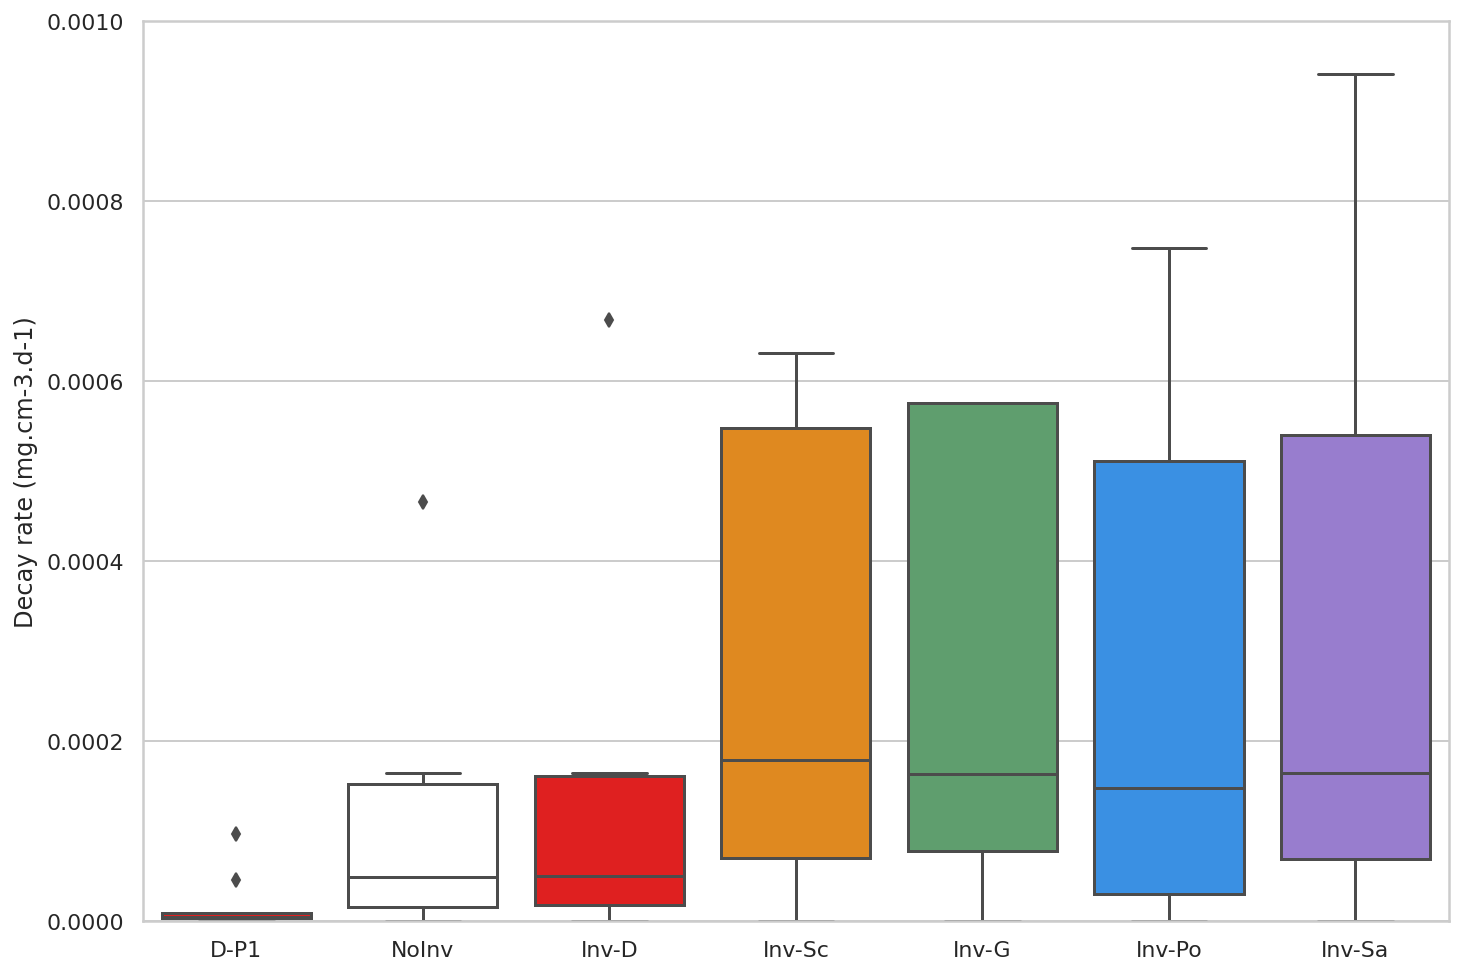

In [ ]:
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

#my_pal = {"Po-P1":"dodgerblue", "":"w", "NoInv":"w",  "Po":"dodgerblue", "Sa":"mediumpurple", 
#          "D":"red", "Sc":"darkorange", "G":"g", " ":"w", "Sc-P1":"darkorange"}

my_pal = {"D-P1":"red", "NoInv":"w",  "Inv-D":"red", "Inv-Sc":"darkorange", "Inv-G":"g",
          "Inv-Po":"dodgerblue", "Inv-Sa":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
#ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Decay rate (mg.cm-3.d-1)')
ax.set_xlabel('')
ax.set(ylim=(0, 1e-3))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "decay"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[2],anov_df_T[6]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('decay ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                 sum_sq    df         F    PR(>F)
treatment  5.040871e-08   1.0  2.734746  0.115521
Residual   3.317883e-07  18.0       NaN       NaN


In [ ]:
anov_df

decay treatment  seed
0   0.000000e+00     NoInv     1
1   1.844621e-04     NoInv     2
2   2.071658e-05     NoInv     3
3   2.648231e-05     NoInv     4
4   1.337409e-05     NoInv     5
5   3.057395e-05     NoInv     6
6   8.812803e-08     NoInv     7
7   1.164928e-05     NoInv     8
8   5.058140e-05     NoInv     9
9   2.372130e-05     NoInv    10
10  9.396530e-05    Inv-Sc     1
11  8.819009e-04    Inv-Sc     2
12  1.187900e-04    Inv-Sc     3
13  3.373856e-04    Inv-Sc     4
14  7.057999e-05    Inv-Sc     5
15  3.994122e-04    Inv-Sc     6
16  1.187420e-05    Inv-Sc     7
17  3.628636e-05    Inv-Sc     8
18  1.371450e-05    Inv-Sc     9
19  9.545222e-05    Inv-Sc    10

# ***** Figure 3d (hemicellulose degrader biomass)

In [ ]:
# t0 (= final day of P1)
table_t0 = pd.read_csv('specialists_phase1_t0_combined_22032201.csv')
table_t0_N = table_t0[(table_t0["substrate"] == 'Hemicellulose')]
# year 3 of phase 1
table_LC = pd.read_csv('specialists_year3_combined_22032201.csv')
table_LC_N = table_LC[(table_LC["substrate"] == 'Hemicellulose')]
# t0 of phase 2
table_tII0 = pd.read_csv('specialists_t0_combined_22032202.csv')
table_tII0_N = table_tII0[(table_tII0["substrate"] == 'Hemicellulose') & (table_tII0["invaders"] == 'NoInv')]
# year 3 of phase 2 NoInv
table_LCII = pd.read_csv('specialists_year3_combined_22032202.csv')
table_LCII_N = table_LCII[(table_LCII["substrate"] == 'Hemicellulose') & (table_LCII["invaders"] == 'NoInv')]
# Build dataframe
col0 = table_t0_N.loc[(table_t0_N['litter'] == 'A')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "PI-t0"})
col1 = table_LC_N.loc[(table_LC_N['litter'] == 'A')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "D-P1"})
col2 = table_LC_N.loc[(table_LC_N['litter'] == 'B')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Sc-P1"})
col3 = table_LC_N.loc[(table_LC_N['litter'] == 'C')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "G-P1"})
col4 = table_LC_N.loc[(table_LC_N['litter'] == 'D')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Po-P1"})
col5 = table_LC_N.loc[(table_LC_N['litter'] == 'E')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Sa-P1"})
col6 = table_LCII_N.loc[(table_LCII_N['final_litter'] == 'B') & (table_LCII_N['residents'] == 'ResA')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "D to Sc"})
col7 = table_LCII_N.loc[(table_LCII_N['final_litter'] == 'A') & (table_LCII_N['residents'] == 'ResB')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Sc to D"})
Table_for_plot = pd.concat([col0,col1,col2,col3,col4,col5,col6,col7],axis=1)
Table_for_plot

PI-t0        D-P1       Sc-P1        G-P1       Po-P1       Sa-P1  \
0  102.0  820.365401  393.178077  203.619523  342.650540  729.721226   
1  225.0   24.255720  437.859281  655.085407    0.000000  441.252940   
2    0.0   47.099981  563.672373  143.913490  303.733704  350.821686   
3  401.0  364.946586  507.131750    4.975646   65.923994  102.620133   
4  283.0   83.208194  135.554243    0.000000    2.418026  153.643357   
5  325.0   96.521569  413.157198  490.878497  649.833647  607.902988   
6  170.0    0.000000  192.535098  372.781957  309.430672  327.824876   
7  565.0  506.630147  691.108178  423.025095  132.687122    0.000000   
8  537.0   44.274583    0.000000  492.211796  759.308768  351.511244   
9  330.0    0.000000    6.858587  460.901419  393.986432    2.979474   

       D to Sc      Sc to D  
0  9982.162330    44.318205  
1   257.051543   249.600439  
2   463.083103    67.859951  
3   121.781969   212.704827  
4     6.709786  4150.019325  
5    77.231516     0.000000  
6    64.481843    26.927300  
7     0.000000     0.000000  
8     0.000000     8.518250  
9   110.216557   447.891367

[(0.0, 800.0)]

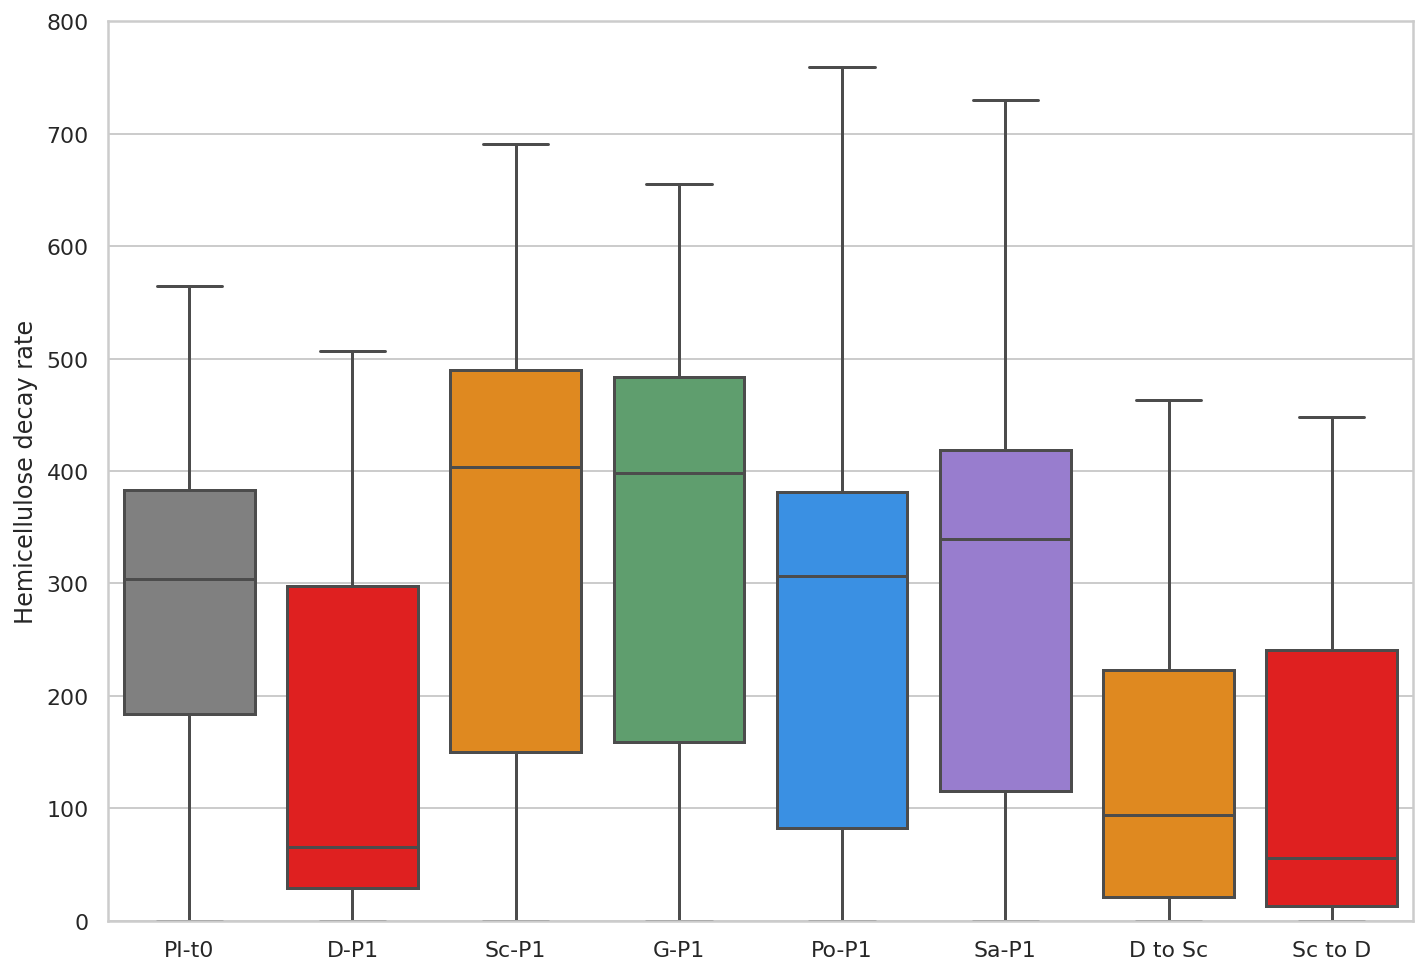

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"PI-t0":"grey",
          "D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple",
          "D to Sc":"darkorange", "Sc to D":"red"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
#ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Hemicellulose decay rate')
ax.set_xlabel('')
ax.set(ylim=(0, 800))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "biomass"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[1],anov_df_T[6]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('biomass ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                 sum_sq    df         F    PR(>F)
treatment  1.742443e+05   1.0  0.204528  0.656493
Residual   1.533479e+07  18.0       NaN       NaN


In [ ]:
anov_df

biomass treatment  seed
0    393.178077     Sc-P1     1
1    437.859281     Sc-P1     2
2    563.672373     Sc-P1     3
3    507.131750     Sc-P1     4
4    135.554243     Sc-P1     5
5    413.157198     Sc-P1     6
6    192.535098     Sc-P1     7
7    691.108178     Sc-P1     8
8      0.000000     Sc-P1     9
9      6.858587     Sc-P1    10
10  9982.162330   D to Sc     1
11   257.051543   D to Sc     2
12   463.083103   D to Sc     3
13   121.781969   D to Sc     4
14     6.709786   D to Sc     5
15    77.231516   D to Sc     6
16    64.481843   D to Sc     7
17     0.000000   D to Sc     8
18     0.000000   D to Sc     9
19   110.216557   D to Sc    10

# ***** Figure 3c (hemicellulose decay)

In [ ]:
# Table phase 1
phase1 = pd.read_csv('decay_results_persubstrate_combined_22032001.csv')
# Table phase 2
phase21 = pd.read_csv('decay_results_persubstrate_combined_22032003.csv')
phase22 = pd.read_csv('decay_results_persubstrate_combined_22031801.csv')
phase2 = pd.concat([phase21,phase22])
# Pick substrate
phase1_enzmax3 = phase1.loc[(phase1["enz_max"] == 3)  & (phase1['substrate'] == 'Hemicellulose')]
phase2_DtoPo  = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResA') & (phase2["substrate"] == 'Hemicellulose')]
phase2_PotoD  = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResB') & (phase2["substrate"] == 'Hemicellulose')]
# Build dataframe
col1 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'A']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D-P1"})
col2 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'B']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sc-P1"})
col3 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'C']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "G-P1"})
col4 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'D']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po-P1"})
col5 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'E']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sa-P1"})
col6 = phase2_DtoPo.loc[phase2_DtoPo['invaders'] == 'NoInv']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D to Sc"})
col7 = phase2_PotoD.loc[phase2_PotoD['invaders'] == 'NoInv']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sc to D"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
Table_for_plot

D-P1     Sc-P1      G-P1     Po-P1     Sa-P1   D to Sc   Sc to D
0  0.000045  0.000009  0.000000  0.000305  0.000579  0.000052  0.000000
1  0.000003  0.001307  0.001217  0.001271  0.000003  0.000117  0.000777
2  0.000003  0.000620  0.000503  0.000000  0.000066  0.000000  0.000003
3  0.000000  0.000129  0.000493  0.000078  0.000080  0.034745  0.000015
4  0.000008  0.000148  0.000127  0.000311  0.000000  0.000044  0.000004
5  0.000006  0.000651  0.000448  0.000003  0.001264  0.000006  0.000008
6  0.000008  0.001323  0.001016  0.000476  0.000335  0.000043  0.000000
7  0.000003  0.000000  0.000006  0.000060  0.000445  0.000466  0.000028
8  0.000097  0.000197  0.000097  0.000041  0.000303  0.000164  0.000001
9  0.000000  0.000653  0.000143  0.000398  0.000080  0.000000  0.000001

[(0.0, 0.0015)]

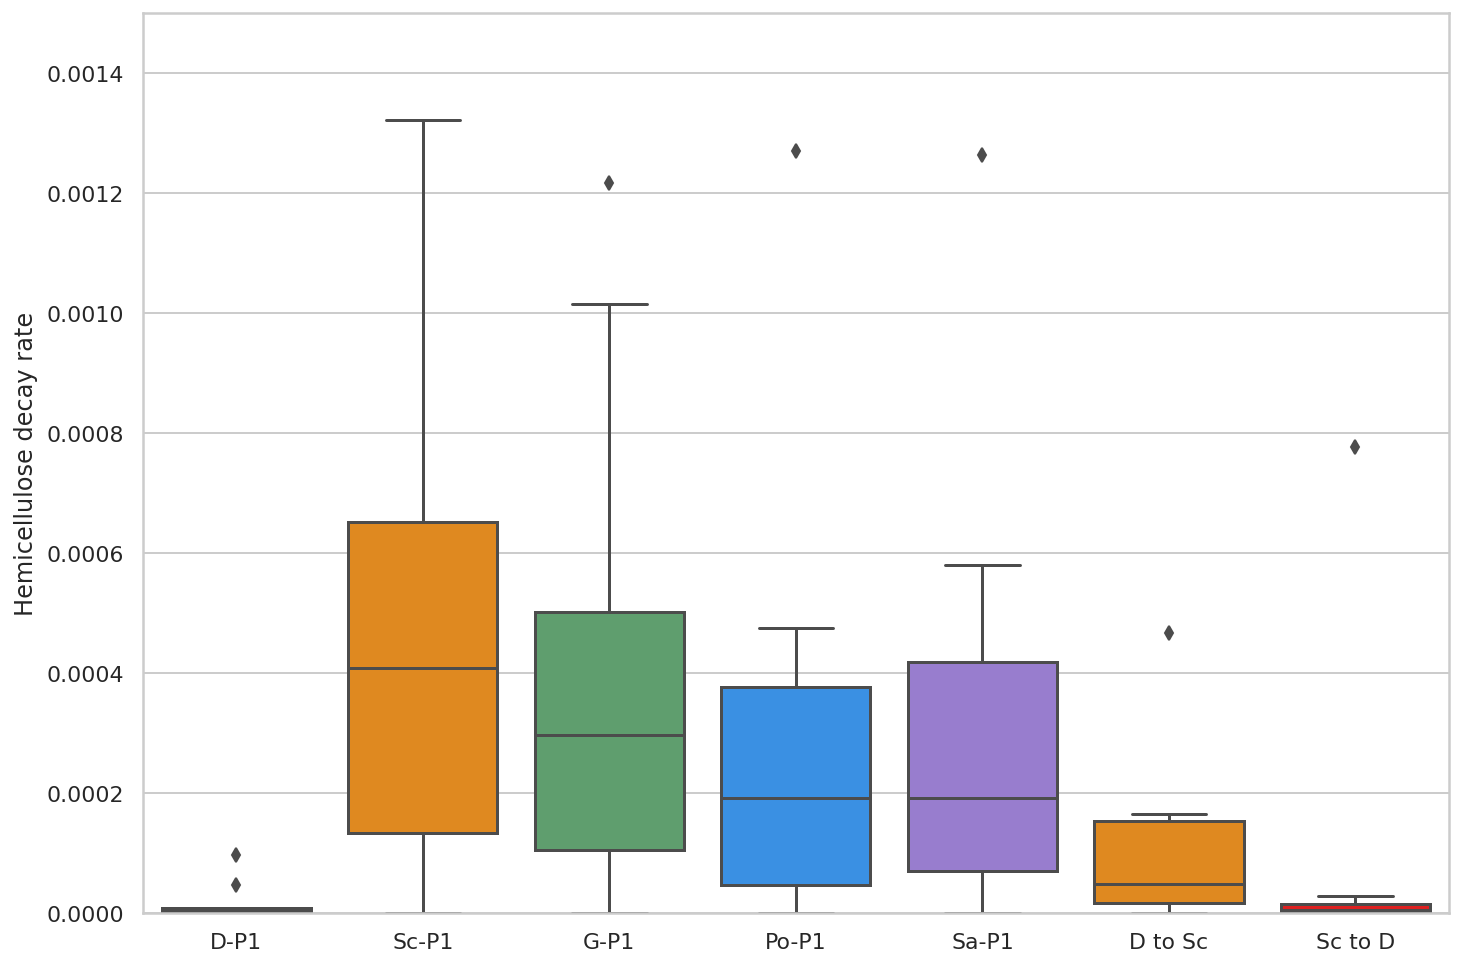

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple",
          "D to Sc":"darkorange", "Sc to D":"red"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
#ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Hemicellulose decay rate')
ax.set_xlabel('')
#ax.set(ylim=(0, 1.5e-3))
ax.set(ylim=(0, 1.5e-3))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "decay"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[1],anov_df_T[6]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('decay ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                 sum_sq    df         F    PR(>F)
treatment  8.805758e-07   1.0  5.723938  0.027854
Residual   2.769136e-06  18.0       NaN       NaN


In [ ]:
anov_df

decay treatment  seed
0   0.000045      D-P1     1
1   0.000003      D-P1     2
2   0.000003      D-P1     3
3   0.000000      D-P1     4
4   0.000008      D-P1     5
5   0.000006      D-P1     6
6   0.000008      D-P1     7
7   0.000003      D-P1     8
8   0.000097      D-P1     9
9   0.000000      D-P1    10
10  0.000009     Sc-P1     1
11  0.001307     Sc-P1     2
12  0.000620     Sc-P1     3
13  0.000129     Sc-P1     4
14  0.000148     Sc-P1     5
15  0.000651     Sc-P1     6
16  0.001323     Sc-P1     7
17  0.000000     Sc-P1     8
18  0.000197     Sc-P1     9
19  0.000653     Sc-P1    10

# ***** Figure 3b (protein degraders biomass)

In [ ]:
table_tII0_N.head()

Unnamed: 0  Unnamed: 0.1     jobID treatment_name final_litter residents  \
51           51             0  11687537    phase2BA010            B      ResA   
133         133             0  11687510     phase2AD05            A      ResD   
142         142             0  11687540     phase2BA03            B      ResA   
225         225             0  11687506     phase2AD01            A      ResD   
226         226             0  11687513     phase2AD08            A      ResD   

    invaders  enz_max  seed_index  seed_number substrate  biomass_decomp_t0  \
51     NoInv        3          10   2102121244  Protein3         150.279568   
133    NoInv        3           5   2102121239  Protein3         122.023042   
142    NoInv        3           3   2102121237  Protein3         676.424807   
225    NoInv        3           1   2102121235  Protein3           0.000000   
226    NoInv        3           8   2102121242  Protein3          53.525832   

     biomass_decomp_res_t0  biomass_decomp_inv_t0  
51              150.279568                    0.0  
133             122.023042                    0.0  
142             676.424807                    0.0  
225               0.000000                    0.0  
226              53.525832                    0.0

In [ ]:
# t0 (= final day of P1)
table_t0 = pd.read_csv('specialists_phase1_t0_combined_22032201.csv')
table_t0_N = table_t0[(table_t0["substrate"] == 'Protein3')]
# year 3 of phase 1
table_LC = pd.read_csv('specialists_year3_combined_22032201.csv')
table_LC_N = table_LC[(table_LC["substrate"] == 'Protein3')]
# t0 of phase 2
table_tII0 = pd.read_csv('specialists_t0_combined_22032202.csv')
table_tII0_N = table_tII0[(table_tII0["substrate"] == 'Protein3') & (table_tII0["invaders"] == 'NoInv')]
# year 3 of phase 2 NoInv
table_LCII = pd.read_csv('specialists_year3_combined_22032202.csv')
table_LCII_N = table_LCII[(table_LCII["substrate"] == 'Protein3') & (table_LCII["invaders"] == 'NoInv')]
# Build dataframe
col1 = table_t0_N.loc[(table_t0_N['litter'] == 'A')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "PI-t0"})
#col2 = table_t0_N.loc[(table_t0_N['litter'] == 'B')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "Sc-P1-t0"})
#col3 = table_t0_N.loc[(table_t0_N['litter'] == 'C')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "G-P1-t0"})
#col4 = table_t0_N.loc[(table_t0_N['litter'] == 'D')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "Po-P1-t0"})
#col5 = table_t0_N.loc[(table_t0_N['litter'] == 'E')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "Sa-P1-t0"})
col6 = table_LC_N.loc[(table_LC_N['litter'] == 'A')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "D-P1"})
col7 = table_LC_N.loc[(table_LC_N['litter'] == 'B')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Sc-P1"})
col8 = table_LC_N.loc[(table_LC_N['litter'] == 'C')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "G-P1"})
col9 = table_LC_N.loc[(table_LC_N['litter'] == 'D')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Po-P1"})
col10 = table_LC_N.loc[(table_LC_N['litter'] == 'E')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Sa-P1"})
col11 = table_LCII_N.loc[(table_LCII_N['final_litter'] == 'D') & (table_LCII_N['residents'] == 'ResA')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "DtoPo-y3"})
col12 = table_LCII_N.loc[(table_LCII_N['final_litter'] == 'A') & (table_LCII_N['residents'] == 'ResD')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "PotoD-y3"})
Table_for_plot = pd.concat([col1,col6,col7,col8,col9,col10,col11,col12],axis=1)
Table_for_plot

PI-t0        D-P1       Sc-P1        G-P1       Po-P1       Sa-P1  \
0  100.0  316.929200  225.071207  223.000802   71.233671   80.403390   
1  107.0  505.670731  795.430795  443.456739  233.934009  198.894116   
2  368.0  441.688744  231.264099  219.764280  140.721399   94.065983   
3  355.0  200.165306  593.175897  546.453102   10.665469   29.956401   
4  444.0  199.862611  288.638116   43.274157   53.597267  156.382378   
5  368.0  328.455589   45.365810  343.856428  168.778375   59.889102   
6  201.0   26.647713  385.419931  278.530068   31.862463  175.194306   
7  437.0  326.175018  363.695665   75.329722  204.723037  359.592511   
8  438.0  798.473262   76.529068  482.611139    0.808667    2.213014   
9  203.0   91.573872  578.814699  328.216309   77.890022   53.431720   

     DtoPo-y3    PotoD-y3  
0   38.812211  123.487520  
1   34.923754  121.874773  
2    0.000000  860.387821  
3  143.428697   47.524482  
4   46.462058    6.651696  
5  164.734011   48.580810  
6  966.855246  147.183631  
7   67.603172   37.032206  
8   31.965854    0.000000  
9   25.695269    0.000000

Text(0.5, 0, '')

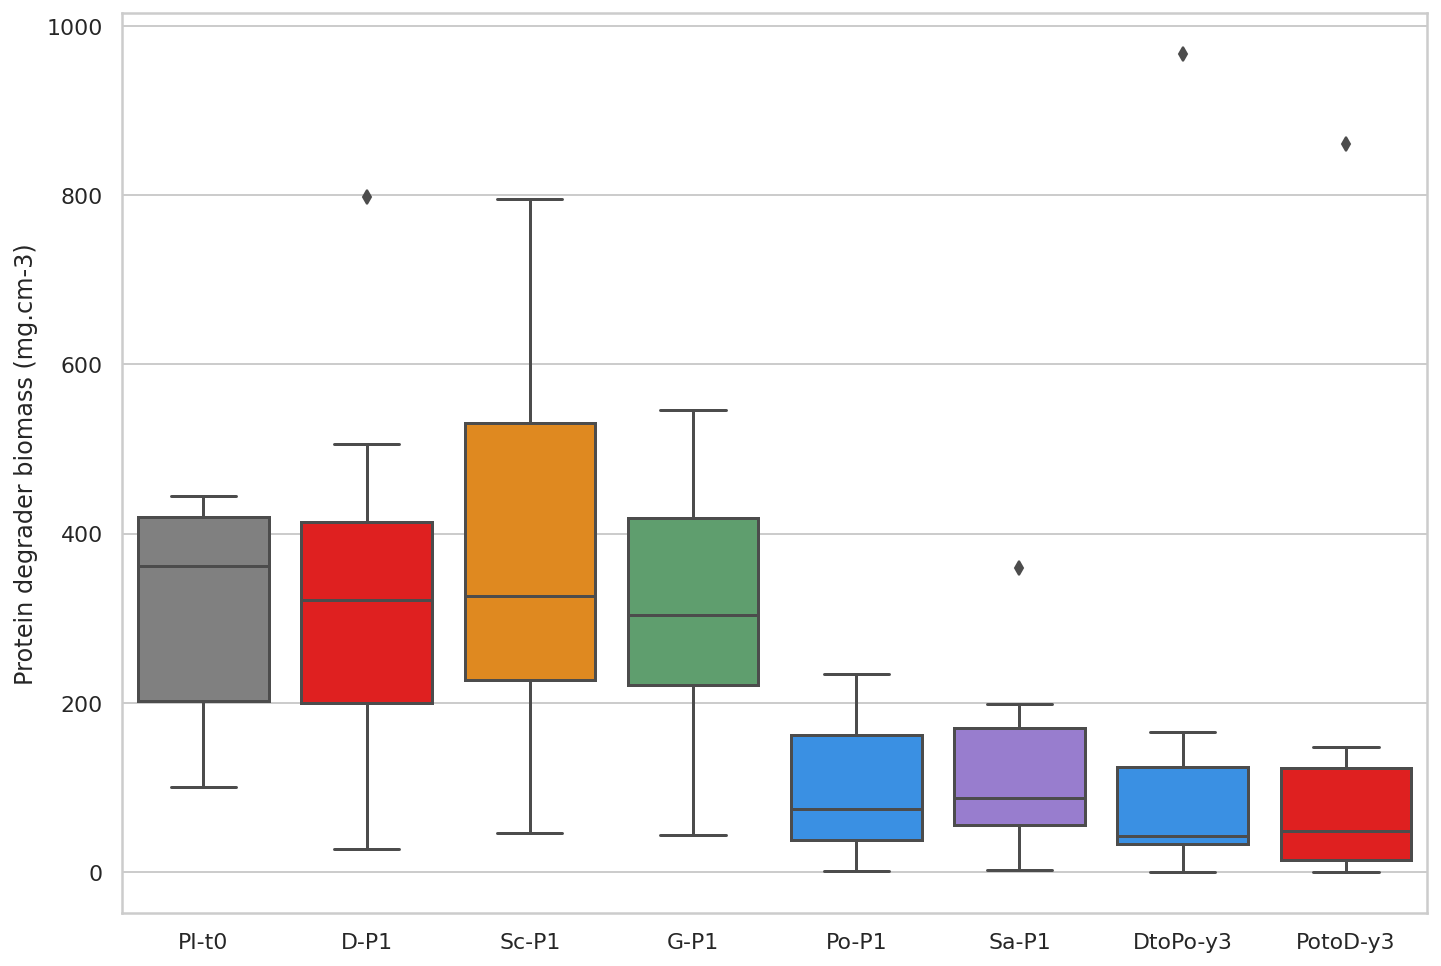

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"PI-t0":"grey",
          "D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple",
          "DtoPo-y3":"dodgerblue","PotoD-y3":"red"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax.set_ylabel('Protein degrader biomass (mg.cm-3)')
ax.set_xlabel('')
#ax.set(ylim=(0, 5e-3))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col6,col7,col8,col9,col10,col11,col12],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "biomass"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[0],anov_df_T[4]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('biomass ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                  sum_sq    df          F    PR(>F)
treatment  205392.997498   1.0  16.182633  0.000798
Residual   228459.352633  18.0        NaN       NaN


In [ ]:
anov_df

biomass treatment  seed
0   316.929200      D-P1     1
1   505.670731      D-P1     2
2   441.688744      D-P1     3
3   200.165306      D-P1     4
4   199.862611      D-P1     5
5   328.455589      D-P1     6
6    26.647713      D-P1     7
7   326.175018      D-P1     8
8   798.473262      D-P1     9
9    91.573872      D-P1    10
10   80.403390     Sa-P1     1
11  198.894116     Sa-P1     2
12   94.065983     Sa-P1     3
13   29.956401     Sa-P1     4
14  156.382378     Sa-P1     5
15   59.889102     Sa-P1     6
16  175.194306     Sa-P1     7
17  359.592511     Sa-P1     8
18    2.213014     Sa-P1     9
19   53.431720     Sa-P1    10

# ***** Protein decay (average Prot1-3)

In [ ]:
phase1 = pd.read_csv('decay_results_persubstrate_combined_22032001.csv')
phase1_SubX = phase1.loc[phase1['substrate'].isin(['Protein1','Protein2','Protein3'])]

phase2 = pd.read_csv('decay_results_persubstrate_combined_22032202.csv')
phase2_DtoPo  = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv') & (phase2["substrate"].isin(['Protein1','Protein2','Protein3']))]
phase2_PotoD  = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv') & (phase2["substrate"].isin(['Protein1','Protein2','Protein3']))]

col1 = phase1_SubX.loc[phase1_SubX['final_litter'] == 'A'].groupby(['treatment_name','seed_number'], as_index=False).mean()['decay_year_3'].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D-P1"})
col2 = phase1_SubX.loc[phase1_SubX['final_litter'] == 'B'].groupby(['treatment_name','seed_number'], as_index=False).mean()['decay_year_3'].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sc-P1"})
col3 = phase1_SubX.loc[phase1_SubX['final_litter'] == 'C'].groupby(['treatment_name','seed_number'], as_index=False).mean()['decay_year_3'].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "G-P1"})
col4 = phase1_SubX.loc[phase1_SubX['final_litter'] == 'D'].groupby(['treatment_name','seed_number'], as_index=False).mean()['decay_year_3'].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po-P1"})
col5 = phase1_SubX.loc[phase1_SubX['final_litter'] == 'E'].groupby(['treatment_name','seed_number'], as_index=False).mean()['decay_year_3'].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sa-P1"})
col6 = phase2_DtoPo.groupby(['treatment_name','seed_number'], as_index=False).mean()['decay_year_3'].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D to Po"})
col7 = phase2_PotoD.groupby(['treatment_name','seed_number'], as_index=False).mean()['decay_year_3'].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po to D"})

Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
Table_for_plot

D-P1     Sc-P1      G-P1     Po-P1     Sa-P1       D to Po   Po to D
0  0.000031  0.000043  0.000041  0.000003  0.000005  5.365208e-07  0.000002
1  0.000125  0.000146  0.000144  0.000007  0.000022  4.477298e-06  0.000007
2  0.000213  0.000240  0.000228  0.000012  0.000026  8.579338e-06  0.000017
3  0.000399  0.000637  0.000456  0.000016  0.000033  9.003344e-05  0.000750
4  0.000179  0.000169  0.000168  0.000006  0.000014  6.743007e-06  0.000002
5  0.000378  0.000545  0.000449  0.000014  0.000032  2.576362e-05  0.000030
6  0.000254  0.000201  0.000202  0.000059  0.000096  3.702712e-04  0.000562
7  0.000016  0.000064  0.000059  0.000016  0.000023  1.281967e-06  0.000011
8  0.000101  0.000133  0.000125  0.000008  0.000015  3.736220e-06  0.000021
9  0.000127  0.000144  0.000148  0.000005  0.000010  3.153899e-06  0.000011

Text(0.5, 0, '')

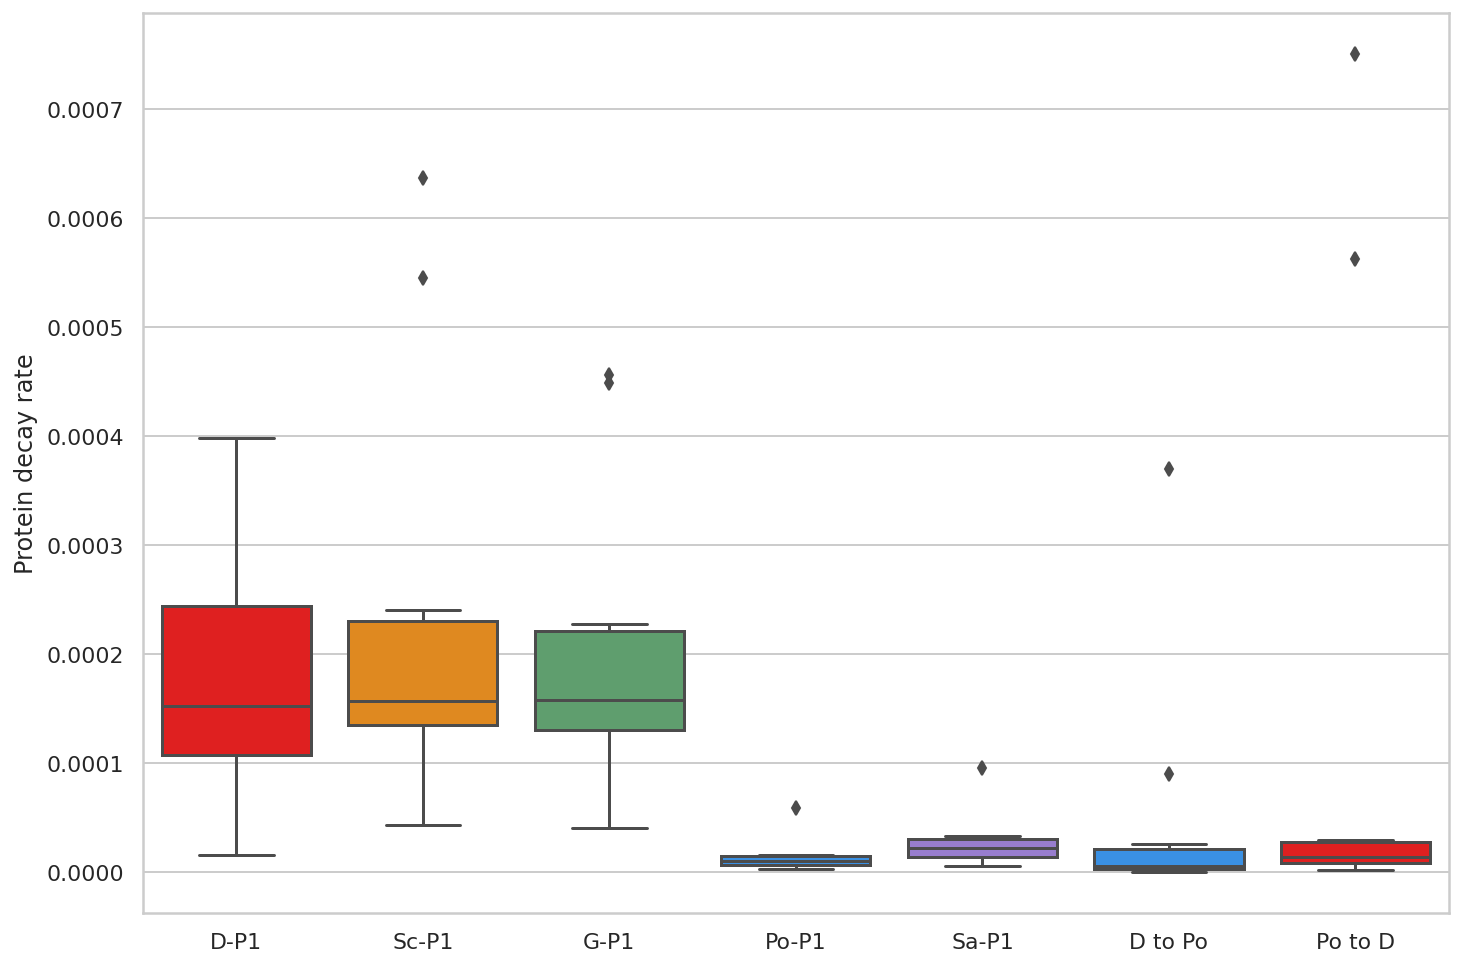

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple",
          "D to Po":"dodgerblue", "Po to D":"red"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
#ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Protein decay rate')
ax.set_xlabel('')
#ax.set(ylim=(0, 0.0007))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "decay"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[3],anov_df_T[6]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('decay ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                 sum_sq    df         F    PR(>F)
treatment  8.022064e-08   1.0  2.112945  0.163271
Residual   6.833927e-07  18.0       NaN       NaN


In [ ]:
anov_df

decay treatment  seed
0   0.000031      D-P1     1
1   0.000125      D-P1     2
2   0.000213      D-P1     3
3   0.000399      D-P1     4
4   0.000179      D-P1     5
5   0.000378      D-P1     6
6   0.000254      D-P1     7
7   0.000016      D-P1     8
8   0.000101      D-P1     9
9   0.000127      D-P1    10
10  0.000002   Po to D     1
11  0.000007   Po to D     2
12  0.000017   Po to D     3
13  0.000750   Po to D     4
14  0.000002   Po to D     5
15  0.000030   Po to D     6
16  0.000562   Po to D     7
17  0.000011   Po to D     8
18  0.000021   Po to D     9
19  0.000011   Po to D    10

# ***** Figure 3a (protein decay)

In [ ]:
# Table phase 1
phase1 = pd.read_csv('decay_results_persubstrate_combined_22032001.csv')
# Table phase 2
phase2 = pd.read_csv('decay_results_persubstrate_combined_22032202.csv')
#phase2 = pd.read_csv('decay_results_persubstrate_combined_22031801.csv')
# Pick substrate
phase1_enzmax3 = phase1.loc[(phase1['substrate'] == 'Protein3')]
phase2_DtoPo  = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResA') & (phase2["substrate"] == 'Protein3')]
phase2_PotoD  = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResD') & (phase2["substrate"] == 'Protein3')]
# Build dataframe
col1 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'A']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D-P1"})
col2 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'B']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sc-P1"})
col3 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'C']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "G-P1"})
col4 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'D']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po-P1"})
col5 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'E']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sa-P1"})
col6 = phase2_DtoPo.loc[phase2_DtoPo['invaders'] == 'NoInv']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D to Po"})
col7 = phase2_PotoD.loc[phase2_PotoD['invaders'] == 'NoInv']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po to D"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
Table_for_plot

D-P1     Sc-P1      G-P1         Po-P1     Sa-P1   D to Po   Po to D
0  0.000040  0.001183  0.000149  3.733497e-07  0.000017  0.000004  0.000005
1  0.000308  0.000165  0.000337  3.909262e-05  0.000019  0.000172  0.000000
2  0.000278  0.000052  0.000066  7.372810e-06  0.000026  0.000000  0.000021
3  0.000668  0.000424  0.000013  6.098432e-06  0.000051  0.000034  0.000023
4  0.000176  0.000364  0.000299  2.698138e-06  0.000014  0.000017  0.000011
5  0.000249  0.000069  0.000051  4.435630e-06  0.000095  0.000005  0.000000
6  0.000015  0.000363  0.000161  8.036740e-06  0.000002  0.000002  0.000506
7  0.000039  0.000152  0.000682  2.257519e-05  0.000010  0.000006  0.000060
8  0.000458  0.000255  0.000321  1.006006e-05  0.000005  0.000009  0.000013
9  0.000126  0.000014  0.000343  6.743813e-06  0.000010  0.000002  0.000018

[(0.0, 0.0007)]

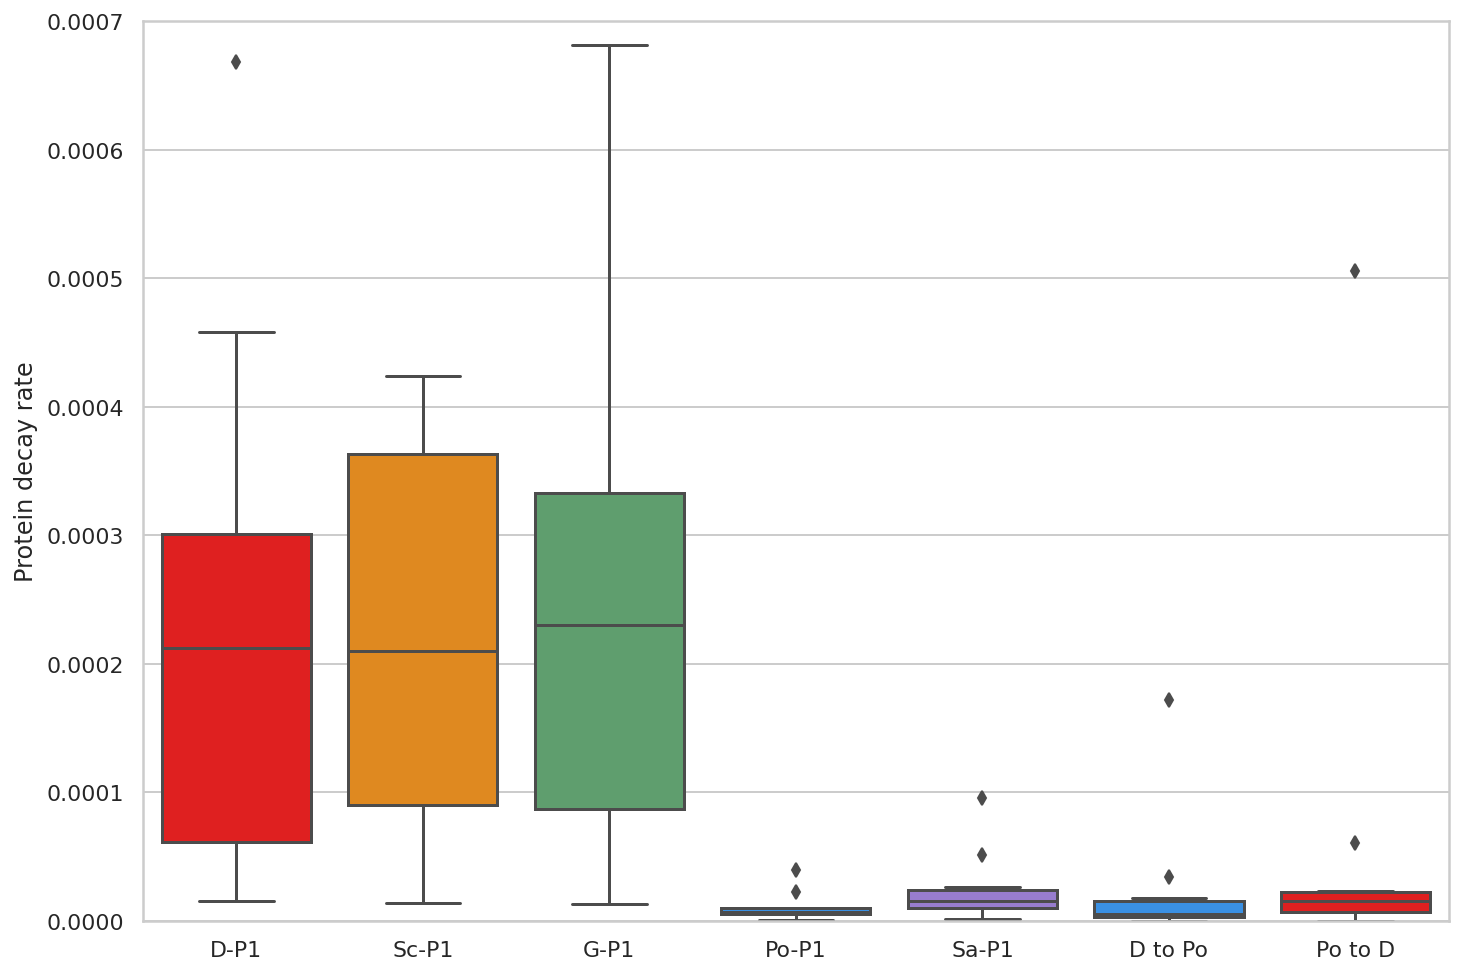

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple",
          "D to Po":"dodgerblue", "Po to D":"red"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
#ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Protein decay rate')
ax.set_xlabel('')
ax.set(ylim=(0, 0.0007))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "decay"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[3],anov_df_T[6]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('decay ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                 sum_sq    df         F    PR(>F)
treatment  1.511089e-08   1.0  1.242701  0.279615
Residual   2.188749e-07  18.0       NaN       NaN


In [ ]:
anov_df

decay treatment  seed
0   0.000040      D-P1     1
1   0.000308      D-P1     2
2   0.000278      D-P1     3
3   0.000668      D-P1     4
4   0.000176      D-P1     5
5   0.000249      D-P1     6
6   0.000015      D-P1     7
7   0.000039      D-P1     8
8   0.000458      D-P1     9
9   0.000126      D-P1    10
10  0.000023   Po to D     1
11  0.000021   Po to D     2
12  0.000011   Po to D     3
13  0.000506   Po to D     4
14  0.000000   Po to D     5
15  0.000013   Po to D     6
16  0.000018   Po to D     7
17  0.000060   Po to D     8
18  0.000005   Po to D     9
19  0.000000   Po to D    10

# ***** Grids day 810 Po to Desert vs Desert to Desert

0.1318149049253785


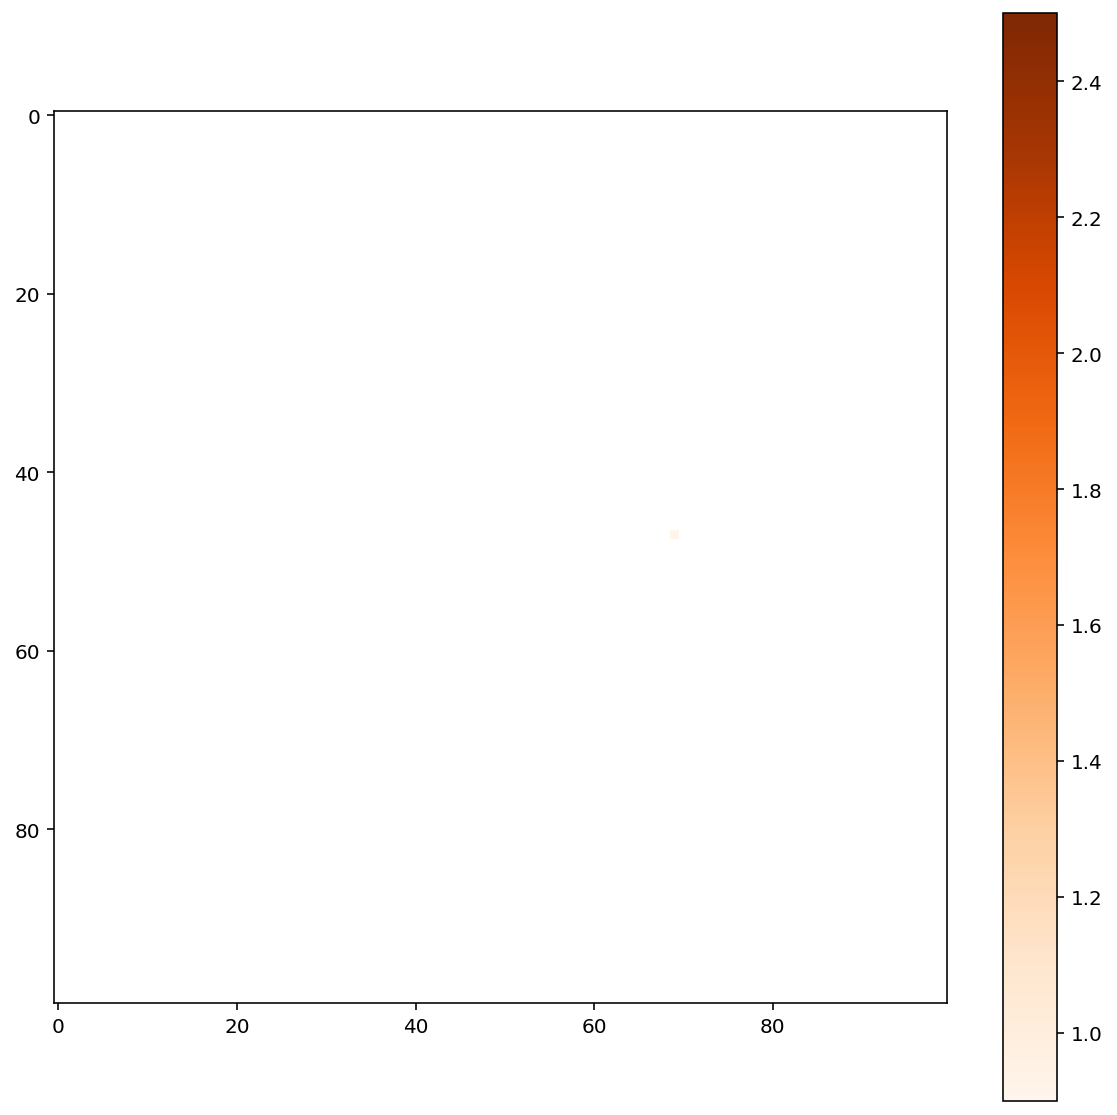

In [ ]:
# Distribution de ces 4 taxa a t0
Tax = 'Tax59'
# Grid: 1 taxon
#grid_raw = pd.read_csv('microbes_spatial_AA06_jobID=11664219_day=810.csv')
grid_raw = pd.read_csv('microbes_spatial_AD06_jobID=11647523_day=810.csv')
grid_all_t = grid_raw.rename(columns={"Unnamed: 0": "taxa"})
grid_df = grid_all_t[grid_all_t['taxa'] == Tax]
# Prepare for grid
grid_series = grid_df.iloc[:,1]
grid_array = grid_series.values.reshape(100,100)
grid_array_na = grid_array.copy()
grid_array_na[grid_array_na < 0.1] = np.nan
# Plot
plt.figure(figsize=(10, 10))
plt.imshow(grid_array_na, cmap='Oranges', vmin=0.9, vmax=2.5)
cbar = plt.colorbar(orientation='vertical')
print(grid_series.sum())

3568.403204007117


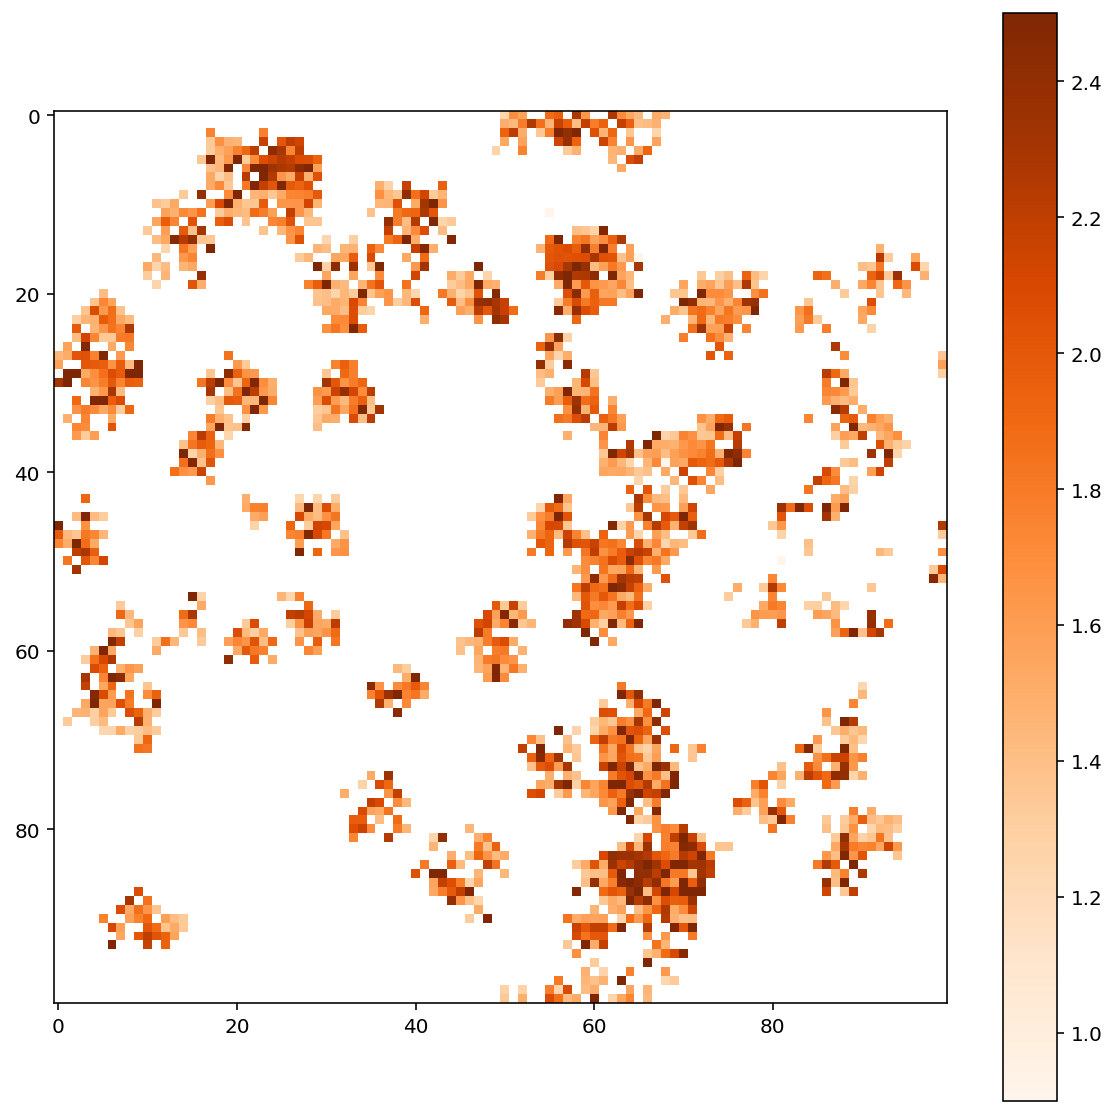

In [ ]:
# Sum
# Total biomass of Protein3 degraders
Tax1 = 'Tax29'
Tax2 = 'Tax35'
Tax3 = 'Tax59'
Tax4 = 'Tax93'
#Tax5 = 'Tax95'

grid_raw = pd.read_csv('microbes_spatial_AA06_jobID=11664219_day=810.csv')
#grid_raw = pd.read_csv('microbes_spatial_AD06_jobID=11647523_day=810.csv')
grid_all_t = grid_raw.rename(columns={"Unnamed: 0": "taxa"})
grid_df_1 = grid_all_t[grid_all_t['taxa'] == Tax1].reset_index()
grid_df_2 = grid_all_t[grid_all_t['taxa'] == Tax2].reset_index()
grid_df_3 = grid_all_t[grid_all_t['taxa'] == Tax3].reset_index()
grid_df_4 = grid_all_t[grid_all_t['taxa'] == Tax4].reset_index()
# Prepare for grid
grid_series = grid_df_1['811'] + grid_df_2['811'] + grid_df_3['811'] + grid_df_4['811']
grid_array = grid_series.values.reshape(100,100)
grid_array_na = grid_array.copy()
grid_array_na[grid_array_na < 0.1] = np.nan
# Plot
plt.figure(figsize=(10, 10))
plt.imshow(grid_array_na, cmap='Oranges', vmin=0.9, vmax=2.5)
cbar = plt.colorbar(orientation='vertical')
print(grid_series.sum())

# **** Check that the seed number corresponds to the PD taxa (pickle)

In [ ]:
# Quels sont les enzymes et Sub des taxa
#load in data
with open("11665873.pickle", "rb") as f:
    dump = pickle5.load(f)

Output_variables = vars(dump).keys()
Output_variables

dict_keys(['Runtime', 'Initialization', 'SubstratesSeries', 'DecayRatesSeries', 'MicrobesSeries', 'TotalBiomass_PerYear', 'decay_results', 'decay_results_firstcolumns', 'decay_results_persubstrate', 'Table_correspondance', 'Trait_table', 'SubX_list', 'DecayRates_Grid_Time', 'DecayRates_Grid_Time_Substrate', 'decay_results_persubstrate_final', 'decay_results_Sub'])

In [ ]:
Initialization = dump.Initialization
print(Initialization['seed_index'])
print(Initialization['seed_number'])

6
210121240


In [ ]:
# Which taxa can access the monomer of Protein3: Tax 8,24, 80,88
Initialization = dump.Initialization
# Mon of Protein3 (when NH4 = Mon1) = Mon12
TaxMon12 = Initialization['TaxMon_final'].loc[:,'Mon12']
TaxMon12[TaxMon12 != 0]
# 

Tax29    1
Tax35    1
Tax59    1
Tax93    1
Name: Mon12, dtype: int8

# ***** Which taxa have degrade/consume with substrate (pickle)

In [ ]:
# Quels sont les enzymes et Sub des taxa
#load in data
with open("11376389.pickle", "rb") as f:
    dump = pickle5.load(f)

Output_variables = vars(dump).keys()
Output_variables

dict_keys(['Runtime', 'Initialization', 'MicrobesSeries'])

In [ ]:
# Which taxa can access the monomer of Protein3: Tax 8,24, 80,88
Initialization = dump.Initialization
# Mon of Protein3 (when NH4 = Mon1) = Mon12
TaxMon12 = Initialization['TaxMon_final'].loc[:,'Mon12']
TaxMon12[TaxMon12 != 0]
# 

Tax8     1
Tax24    1
Tax38    1
Tax80    1
Tax88    1
Name: Mon12, dtype: int8

In [ ]:
# What other subtrate do they decompose/consume?
# Tax 29 has Enz 4,24,50 --- can degrade DeadMic, Prot3,OrgP1
# Tax 35 has Enz 4,10    --- can degrade DeadMic, Prot3
# Tax 59 has Enz 4,5,50  --- can degrade DeadMic, Prot3
# Tax 93 has Enz 4,5     --- can degrade DeadMic, Prot3
Initialization = dump.Initialization
EnzGenes = Initialization['EnzGenes'].loc['Tax38'].iloc[1,:]
EnzGenes.loc[EnzGenes != 0]

Enz3     1
Enz36    1
Enz44    1
Name: Tax38, dtype: int8

In [ ]:
# Qu'est-ce que ces enzymes degradent ?
# Enz 4 degrades Sub 1,10 = DeadMic, Prot3
# Enz 5 degrades nothing
# Enz 10 degrades nothing
# Enz 24 degrades Sub 11  = OrgP1
# Enz 50 degrades nothing
Initialization = dump.Initialization
ReqEnz = Initialization['ReqEnz'].loc['set1',:]
ReqEnz2 = ReqEnz.iloc[0:12,:]
ReqEnz3 = ReqEnz2.loc[:,'Enz36']
ReqEnz3.loc[ReqEnz3 != 0]

Series([], Name: Enz36, dtype: int8)

# ***** Grid of protein degraders from D vs from A

243.39565929976504


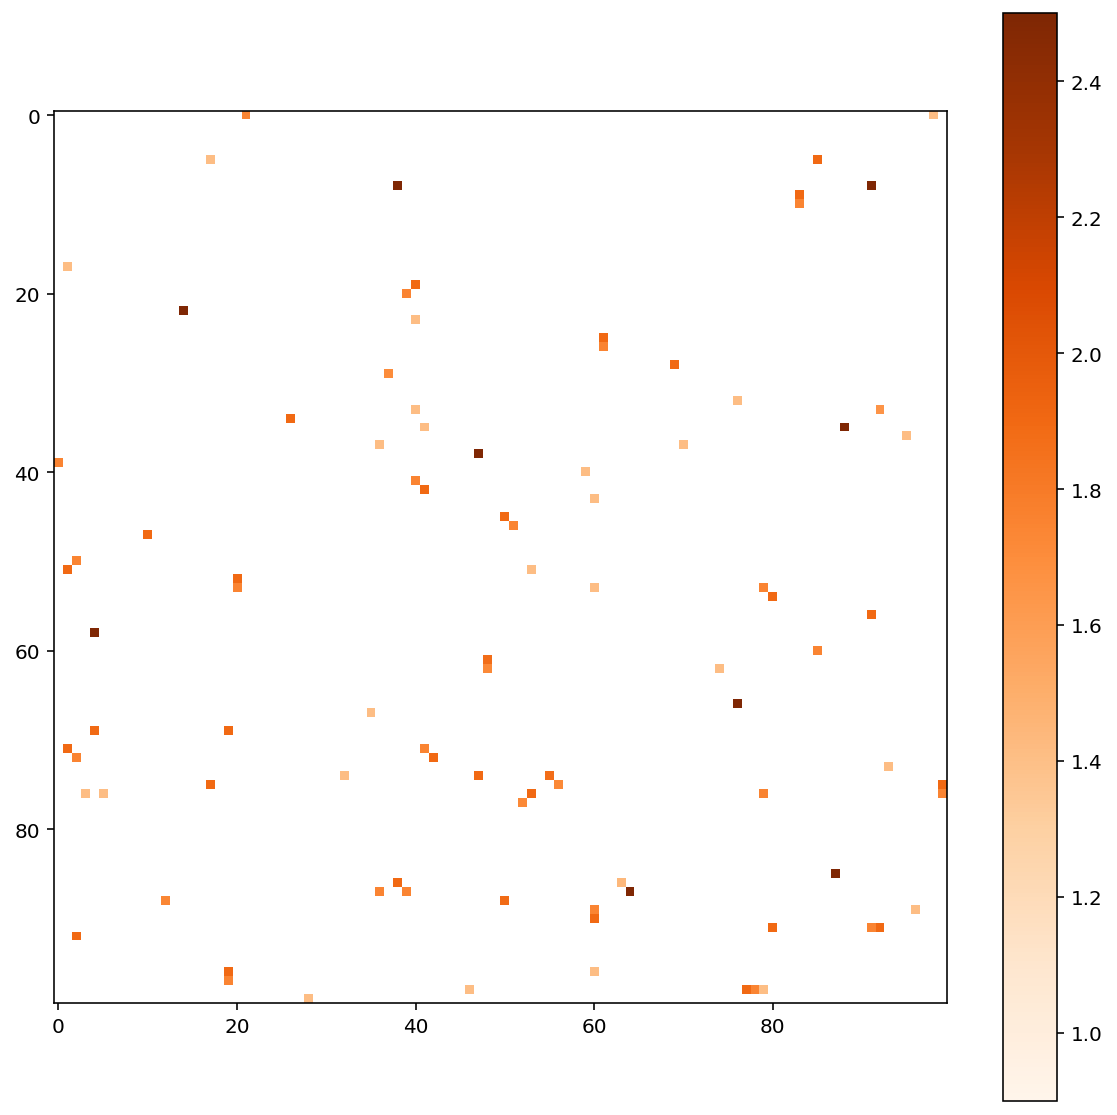

In [ ]:
# Total biomass of Protein3 degraders
Tax1 = 'Tax3'
Tax2 = 'Tax16'
Tax3 = 'Tax37'
Tax4 = 'Tax55'
Tax5 = 'Tax95'

grid_raw = pd.read_csv('residents_grid_A38_22031702.csv')
grid_all_t = grid_raw.rename(columns={"Unnamed: 0": "taxa"})
grid_all_t['biomass'] = grid_all_t.iloc[:,1:4].sum(axis=1)
grid = grid_all_t[['taxa', 'biomass']].copy()
grid_df_1 = grid[grid['taxa'] == Tax1].reset_index()
grid_df_2 = grid[grid['taxa'] == Tax2].reset_index()
grid_df_3 = grid[grid['taxa'] == Tax3].reset_index()
grid_df_4 = grid[grid['taxa'] == Tax4].reset_index()
grid_df_5 = grid[grid['taxa'] == Tax5].reset_index()
# Prepare for grid
grid_series = grid_df_1['biomass'] + grid_df_2['biomass'] + grid_df_3['biomass'] + grid_df_4['biomass'] + grid_df_5['biomass']
grid_array = grid_series.values.reshape(100,100)
grid_array_na = grid_array.copy()
grid_array_na[grid_array_na < 0.1] = np.nan
# Plot
plt.figure(figsize=(10, 10))
plt.imshow(grid_array_na, cmap='Oranges', vmin=0.9, vmax=2.5)
cbar = plt.colorbar(orientation='vertical')
print(grid_series.sum())

0.1401226608684539


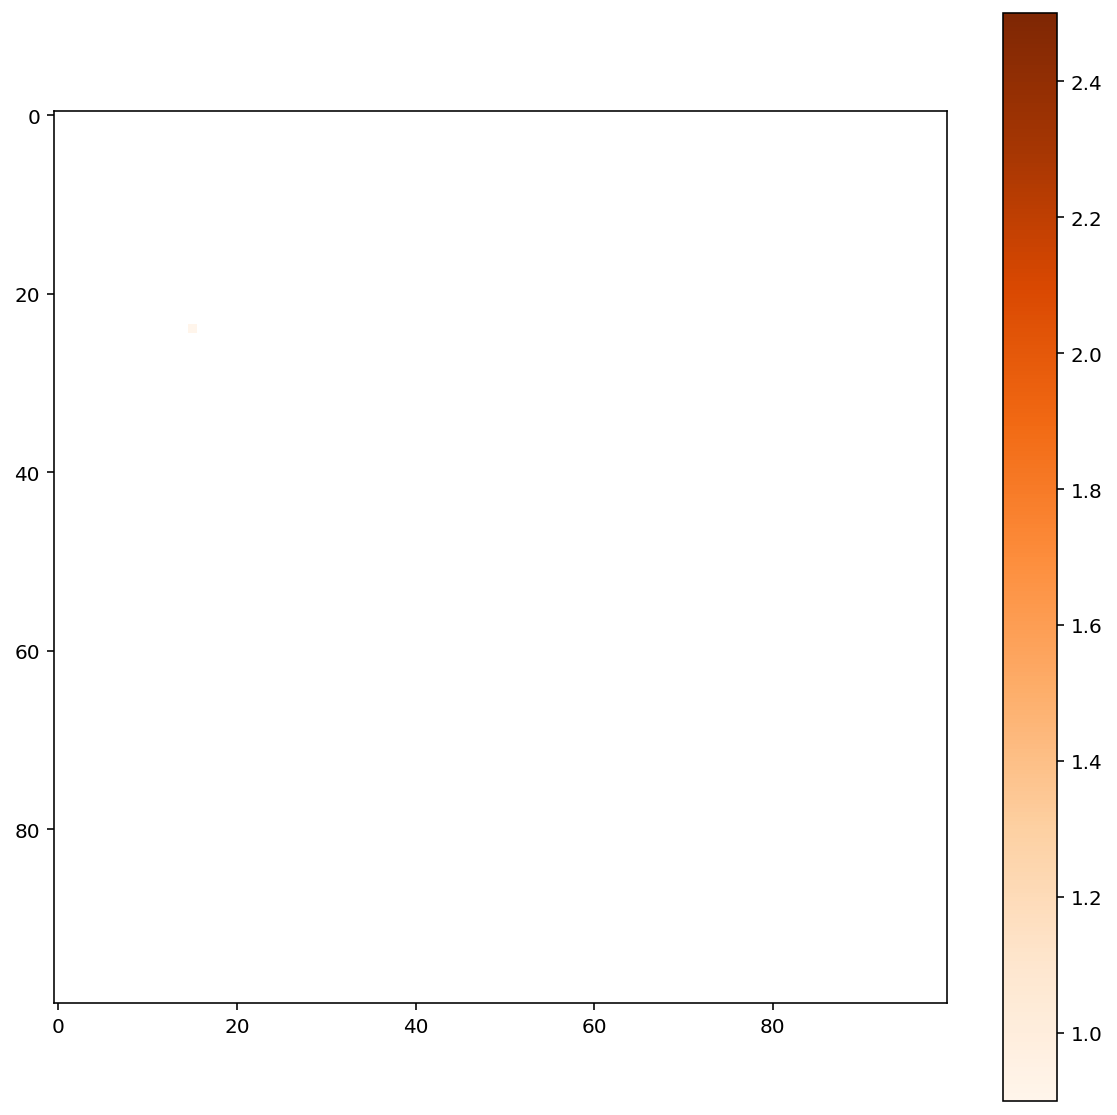

In [ ]:
# Distribution de ces 4 taxa a t0
Tax = 'Tax29'
# Grid: 1 taxon
grid_raw = pd.read_csv('residents_grid_D35_22031702.csv')
grid_all_t = grid_raw.rename(columns={"Unnamed: 0": "taxa"})
grid_all_t['biomass'] = grid_all_t.iloc[:,1:4].sum(axis=1)
grid = grid_all_t[['taxa', 'biomass']].copy()
grid_df = grid[grid['taxa'] == Tax]
# Prepare for grid
grid_series = grid_df.iloc[:,1]
grid_array = grid_series.values.reshape(100,100)
grid_array_na = grid_array.copy()
grid_array_na[grid_array_na < 0.1] = np.nan
# Plot
plt.figure(figsize=(10, 10))
plt.imshow(grid_array_na, cmap='Oranges', vmin=0.9, vmax=2.5)
cbar = plt.colorbar(orientation='vertical')
print(grid_series.sum())

# ***** Check the grids at t0 of phase 2

/usr/local/lib/python3.7/dist-packages/libpysal/weights/util.py:23: UserWarning: geopandas not available. Some functionality will be disabled.
  warn("geopandas not available. Some functionality will be disabled.")


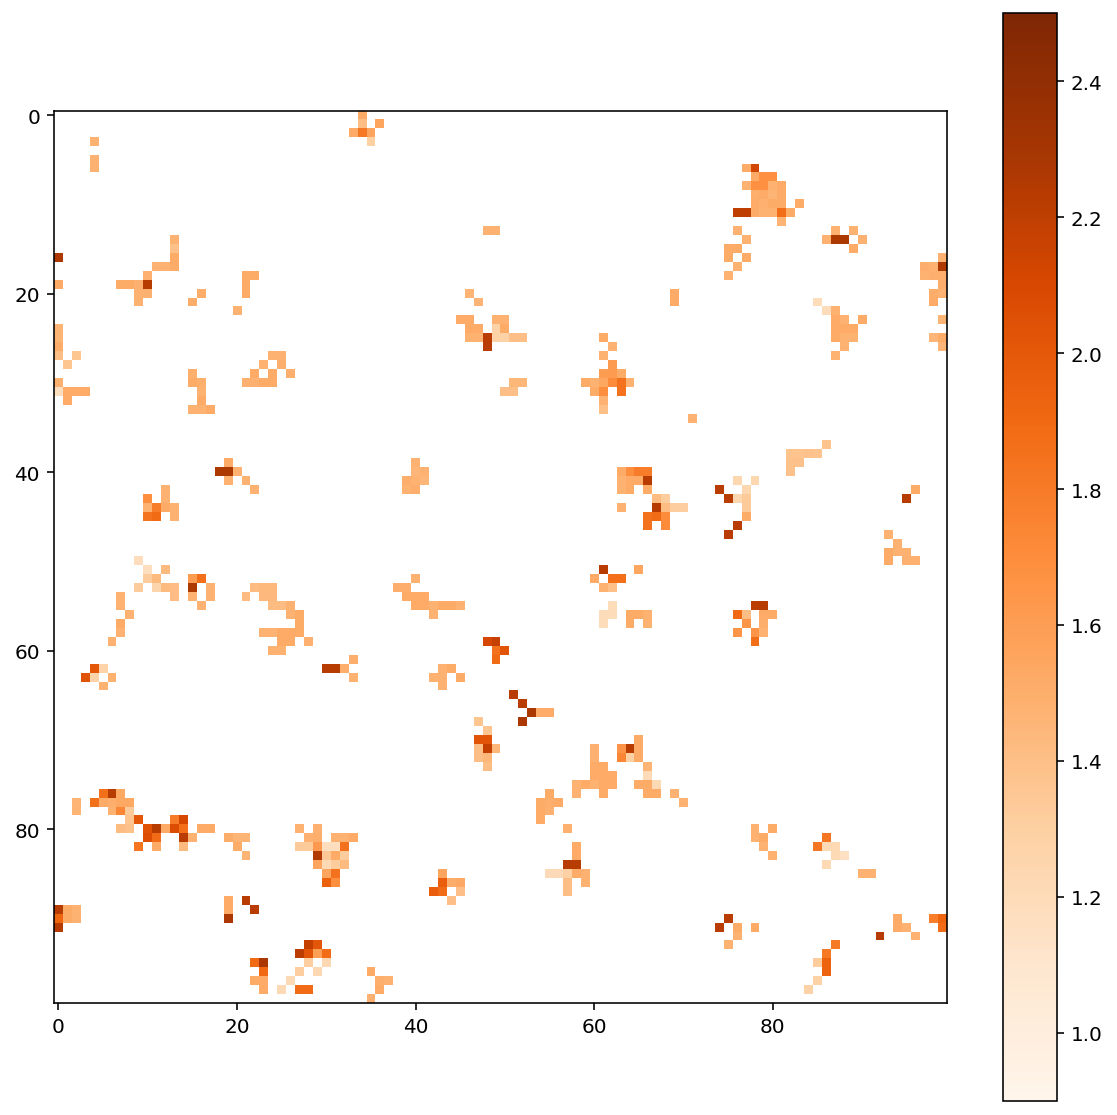

In [ ]:
Tax = 'Tax74'

# Grid: 1 taxon
grid_raw = pd.read_csv('residents_grid_D36_22031702.csv')
grid_all_t = grid_raw.rename(columns={"Unnamed: 0": "taxa"})
grid_all_t['biomass'] = grid_all_t.iloc[:,1:4].sum(axis=1)
grid = grid_all_t[['taxa', 'biomass']].copy()
grid_df = grid[grid['taxa'] == Tax]
# Prepare for grid
grid_series = grid_df.iloc[:,1]
grid_array = grid_series.values.reshape(100,100)
grid_array_na = grid_array.copy()
grid_array_na[grid_array_na < 0.1] = np.nan
# Moran's index of spatial correlation
from libpysal.weights import lat2W
from esda.moran import Moran
import numpy as np
# Plot
plt.figure(figsize=(10, 10))
#plt.imshow(grid_array_na, cmap='Paired',vmin=0, vmax=31)
plt.imshow(grid_array_na, cmap='Oranges', vmin=0.9, vmax=2.5)
cbar = plt.colorbar(orientation='vertical')
#print(grid_series[grid_series != 0])

# ***** Figure S3

In [ ]:
# Table phase 1
phase1 = pd.read_csv('decay_results_combined_22031802.csv')
#phase1 = pd.concat([phase11,phase12])
# Pick substrate
phase1_enzmax3 = phase1.loc[(phase1["enz_per_taxon_max"] == 3)]
# Build dataframe
col1 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'A']["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "D-P1"})
col2 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'B']["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "Sc-P1"})
col3 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'C']["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "G-P1"})
col4 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'D']["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "Po-P1"})
col5 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'E']["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "Sa-P1"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5],axis=1)
Table_for_plot

D-P1         Sc-P1          G-P1         Po-P1         Sa-P1
0   2880.116561   3524.222857   3326.683431   2641.619929   4264.160989
1  12177.031526  20123.065065   2857.254819   2877.244245   2964.701017
2  14466.034436   4151.257662   4051.562523  12725.139113   2740.722476
3   4539.938383  10621.078725   2544.992342   4247.065579   2655.603592
4   4169.932722   2880.978780  14732.935758  25511.536235  12858.313783
5   2741.864887   2755.537868   3574.254022   2980.717902  25293.035447
6   2642.075887   2950.468986   2811.865000   2672.204677   2605.631742
7   3044.647704   2956.593592  10177.004964   2498.222853   4134.216372
8   2301.507225   2551.100883   2682.721128   2148.583052   2283.679825
9   3518.044159   3320.336505   3032.905386   3892.370483   2957.799208

In [ ]:
# Table phase 1
phase1 = pd.read_csv('decay_results_combined_22031802.csv')
#phase1 = pd.concat([phase11,phase12])
# Pick substrate
phase1_enzmax3 = phase1.loc[(phase1["enz_per_taxon_max"] == 3)]
# Build dataframe
col1 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'A']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D-P1"})
col2 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'B']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sc-P1"})
col3 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'C']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "G-P1"})
col4 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'D']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po-P1"})
col5 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'E']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sa-P1"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5],axis=1)
Table_for_plot

D-P1     Sc-P1      G-P1     Po-P1     Sa-P1
0  0.000085  0.000232  0.000239  0.000107  0.000504
1  0.001888  0.003444  0.000079  0.000115  0.000215
2  0.002068  0.000371  0.000387  0.002381  0.000118
3  0.000430  0.001594  0.000073  0.000484  0.000071
4  0.000216  0.000078  0.002235  0.005145  0.002394
5  0.000133  0.000141  0.000212  0.000205  0.004799
6  0.000100  0.000133  0.000142  0.000062  0.000064
7  0.000137  0.000150  0.001413  0.000064  0.000237
8  0.000038  0.000088  0.000129  0.000080  0.000087
9  0.000234  0.000252  0.000134  0.000208  0.000120

[(2000.0, 5000.0)]

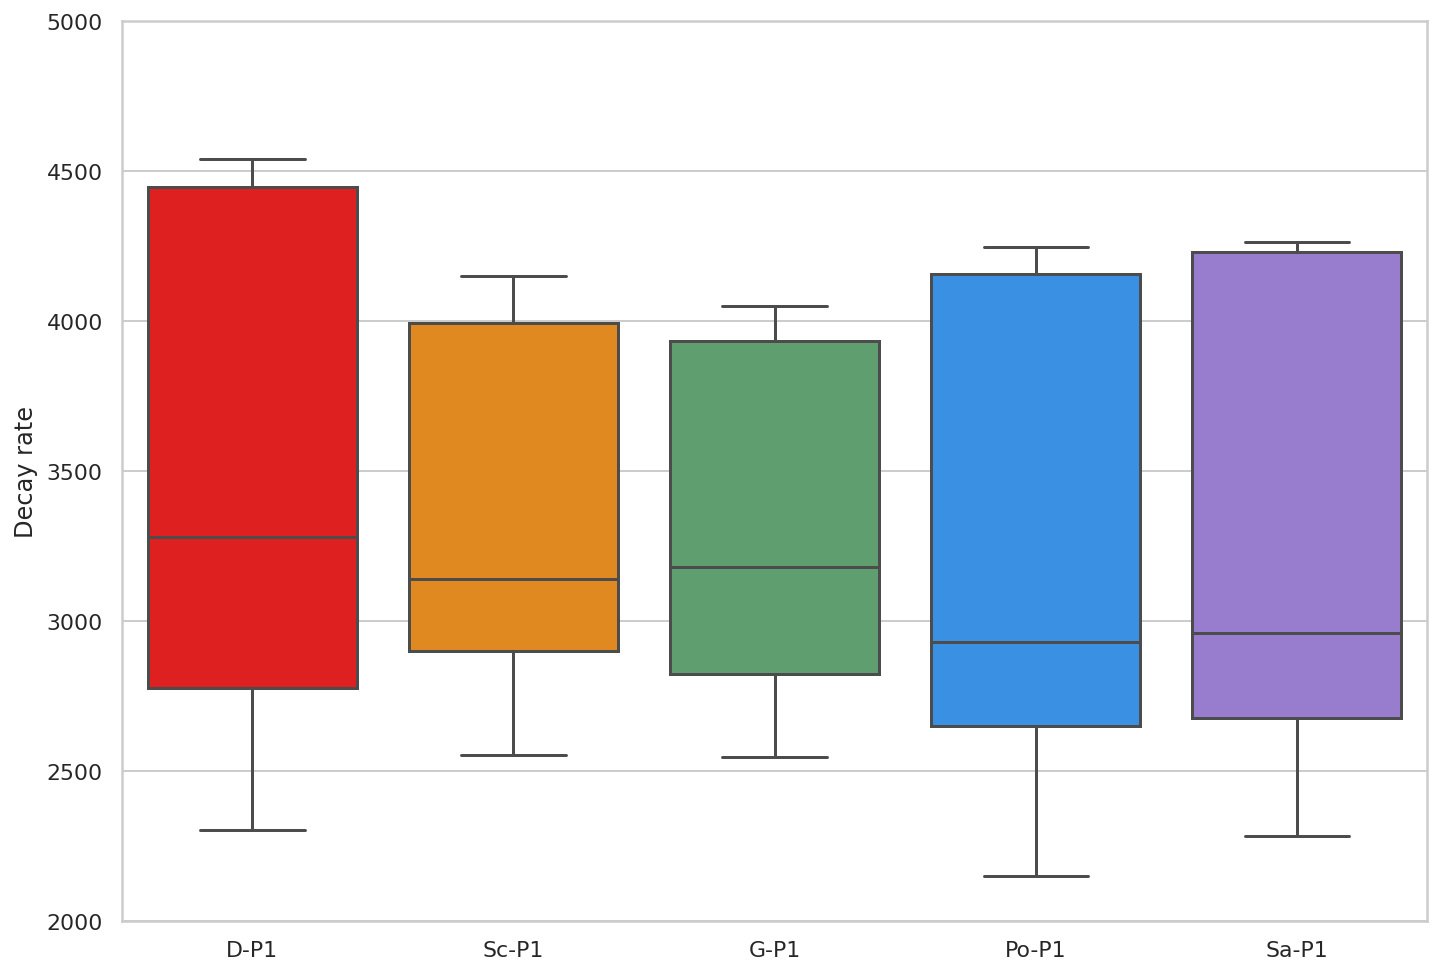

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
#ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Decay rate')
ax.set_xlabel('')
#ax.set(ylim=(0, 0.6e-3))
ax.set(ylim=(2000, 5000))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "decay"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[3],anov_df_T[4]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('decay ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

# ***** Check the pickle: there is no MicrobesSpatial

In [ ]:
# Quels sont les enzymes et Sub des taxa
#load in data
with open("11405181.pickle", "rb") as f:
    dump = pickle5.load(f)

Output_variables = vars(dump).keys()
Output_variables

dict_keys(['Runtime', 'Initialization', 'MicrobesSpatial'])

# ***** Look at Tax 74 (D6) in phase 1 

In [ ]:
# Qui grossit entre jour 25 et 40 ?
grid_raw_25 = pd.read_csv('microbes_spatial_D6_jobID=11327305_day='+str(25)+'.csv')
grid_raw_40 = pd.read_csv('microbes_spatial_D6_jobID=11327305_day='+str(40)+'.csv')
grid_raw_25['41'] = grid_raw_40.iloc[:,1]
grid_all_t = grid_raw_25.rename(columns={"Unnamed: 0": "taxa"})
grid_all = grid_all_t.groupby('taxa').sum()
grid_all.loc[grid_all.loc[:,'41'] > grid_all.loc[:,'26'] ]

26          41
taxa                         
Tax12   83.847558   84.701013
Tax17  194.125778  196.522550
Tax22   27.283886   27.350807
Tax26  139.093497  162.053197
Tax28  122.045106  123.051554
Tax29  109.404953  115.622929
Tax37   92.924872  100.331515
Tax40  140.790288  153.157415
Tax42  130.094121  139.476363
Tax43  133.096734  136.902068
Tax44   95.559345   98.083122
Tax5   125.081865  132.165491
Tax51  111.109017  113.395109
Tax57  109.847532  119.862470
Tax6   295.263736  396.777224
Tax60  146.002891  146.878283
Tax67  250.600446  258.722847
Tax70  107.432200  107.465616
Tax72  106.907817  117.538174
Tax74   65.469216   79.468124
Tax75  125.365657  126.537754
Tax78  134.902860  136.173260
Tax83  111.796707  112.795887
Tax91   27.487730   27.576720
Tax94  138.427915  142.228735
Tax95  105.307732  106.178000
Tax97   97.917378  114.556620

In [ ]:
Tax = 'Tax74'

# Grid: 1 taxon
day = 256
grid_raw = pd.read_csv('microbes_spatial_D6_jobID=11375278_day='+str(day)+'.csv')     # my code phase 1 + my colonization code + no temp_seed
#grid_raw = pd.read_csv('microbes_spatial_D6_jobID=11363541_day='+str(day)+'.csv')    # every 1 day for 1 year - Phase 1 code with Bin's colonization code + without temp_seed
#grid_raw = pd.read_csv('microbes_spatial_D6_jobID=11327305_day='+str(day)+'.csv')    # every 1 day for 1 year - Bin's untouched DEMENT
#grid_raw = pd.read_csv('microbes_spatial_D6_jobID=11323676_day='+str(day)+'.csv')    # every 1 day for 1 year - Bin code
#grid_raw = pd.read_csv('microbes_spatial_D6_jobID=11250937_day='+str(day)+'.csv')    # every 1 day for 1 year - Elsa code
#grid_raw = pd.read_csv('microbes_spatial_D6_jobID=11250943_day='+str(day)+'.csv')    # every 30 days for 3 years - Elsa code
grid_all_t = grid_raw.rename(columns={"Unnamed: 0": "taxa"})
grid = grid_all_t[['taxa',str(day+1)]]
grid_df = grid[grid['taxa'] == Tax]
# Prepare for grid
grid_series = grid_df.iloc[:,1]
grid_array = grid_series.values.reshape(100,100)
grid_array_na = grid_array.copy()
grid_array_na[grid_array_na < 0.1] = np.nan
# Moran's index of spatial correlation
from libpysal.weights import lat2W
from esda.moran import Moran
import numpy as np
# Plot
plt.figure(figsize=(10, 10))
#plt.imshow(grid_array_na, cmap='Paired',vmin=0, vmax=31)
plt.imshow(grid_array_na, cmap='Oranges', vmin=0.9, vmax=2.5)
cbar = plt.colorbar(orientation='vertical')
#print(grid_series[grid_series != 0])

KeyError: ignored

# ***** 100 grids at a time

In [ ]:
# Loop
#Goal: get 4 arrays of total number of individuals per box at each t
# Plot
centaine = 0
day_1 = centaine + 1
day_f = day_1 + 19
ncols = 10
fig, axes = plt.subplots(nrows=int((day_f-day_1+1)/ncols), ncols=ncols, figsize=(40, 40))
for day in np.arange(day_1,day_f+1):
    grid_raw = pd.read_csv('microbes_spatial_D6_jobID=11250937_day='+str(day-1)+'.csv')
    grid_all_t = grid_raw.rename(columns={"Unnamed: 0": "taxa"})
    grid = grid_all_t[['taxa',str(day)]]
    grid_df = grid[grid['taxa'] == 'Tax74']
    grid_series = grid_df.iloc[:,1]
    grid_array = grid_series.values.reshape(100,100)
    grid_array_na = grid_array.copy()
    grid_array_na[grid_array_na < 0.1] = np.nan
    position = (day-day_1)/ncols
    text = "{:.1f}".format(position)
    x_pos = int(text[0:1])
    y_pos = int(text[2:3])
    im = axes[x_pos,y_pos].imshow(grid_array_na, cmap='Oranges', vmin=0.01, vmax=1.2)
    axes[x_pos,y_pos].set_xticks([])
    axes[x_pos,y_pos].set_yticks([])
    axes[x_pos,y_pos].set_title("day=" + str(day))

# ***** I shouldn't get diagonals

In [ ]:
# Quels sont les enzymes et Sub des taxa
#load in data
with open("10657611.pickle", "rb") as f:
    dump = pickle5.load(f)

Output_variables = vars(dump).keys()
Output_variables

dict_keys(['Runtime', 'Initialization', 'SubstratesSeries', 'DecayRatesSeries', 'MicrobesSeries', 'TotalBiomass_PerYear', 'decay_results', 'decay_results_firstcolumns', 'decay_results_persubstrate', 'Table_correspondance', 'SubX_list', 'DecayRates_Grid_Time', 'DecayRates_Grid_Time_Substrate', 'ntaxa_decomp_tf', 'decay_results_persubstrate_final', 'decay_results_Sub'])

In [ ]:
Initialization = dump.Initialization
EnzGenes = Initialization['EnzGenes'].iloc[0:100,:]
EnzGenes_tax = EnzGenes.loc['Tax91',:]
EnzGenes_tax[EnzGenes_tax != 0]

Enz18    1.0
Enz38    1.0
Enz41    1.0
Name: Tax91, dtype: float32

In [ ]:
ReqEnz = Initialization['ReqEnz'].loc['set1'].iloc[0:12,:]
ReqEnz_Enz = ReqEnz.loc[:,'Enz41']
ReqEnz_Enz[ReqEnz_Enz != 0]

Series([], Name: Enz41, dtype: float32)

In [ ]:
# Table of correspondance between substrates and monomers names and indexes
n_substrats = 12
Sub_name_initial = pd.Series(Initialization['Vmax0'].T.index)
Sub_name_add = pd.Series(['0']*2)
Sub_name_almost = pd.concat([Sub_name_add, Sub_name_initial])
Sub_name = Sub_name_almost.reset_index(drop=True)
Sub_index_initial = pd.Series(Initialization['ReqEnz'].loc['set1'].iloc[0:n_substrats,:].index)
Sub_index_add = pd.Series(['0']*2)
Sub_index_almost = pd.concat([Sub_index_add, Sub_index_initial])
Sub_index = Sub_index_almost.reset_index(drop=True)
Mon_index = pd.Series(Initialization['TaxMon_final'].T.index)
Mon_name = pd.Series(Initialization['UptakeGenesCost'].T.index)
Table_correspondance = pd.DataFrame({'Sub_index': Sub_index, 'Sub_name': Sub_name, 'Mon_index': Mon_index, 'Mon_name': Mon_name})
Table_correspondance.index = Table_correspondance['Sub_name'].values
del Table_correspondance['Sub_name']
Table_correspondance

Sub_index Mon_index Mon_name
0                     0      Mon1      NH4
0                     0      Mon2      PO4
DeadMic            Sub1      Mon3  DeadMic
DeadEnz            Sub2      Mon4  DeadEnz
Cellulose          Sub3      Mon5     Mon3
Hemicellulose      Sub4      Mon6     Mon4
Starch             Sub5      Mon7     Mon5
Chitin             Sub6      Mon8     Mon6
Lignin             Sub7      Mon9     Mon7
Protein1           Sub8     Mon10     Mon8
Protein2           Sub9     Mon11     Mon9
Protein3          Sub10     Mon12    Mon10
OrgP1             Sub11     Mon13    Mon11
OrgP2             Sub12     Mon14    Mon12

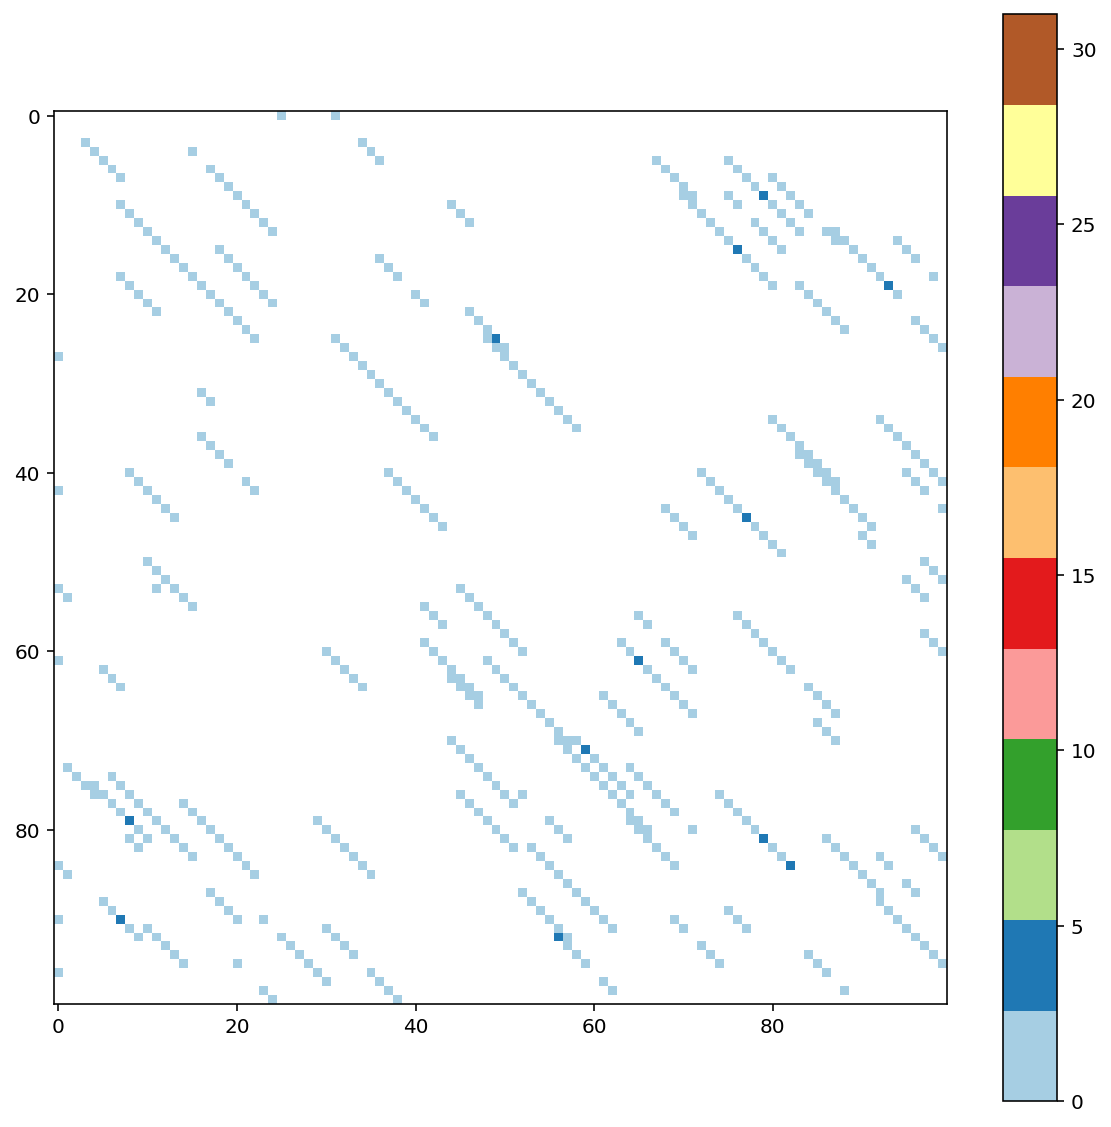

In [ ]:
# Grid: 1 taxon
day = 0
grid_raw = pd.read_csv('microbes_spatial_AD0_jobID=11224670_seed=6.csv')
grid_all_t = grid_raw.rename(columns={"Unnamed: 0": "taxa"})
grid = grid_all_t[['taxa',str(day)]]
grid_df = grid[grid['taxa'] == 'Tax74']
# Prepare for grid
grid_series = grid_df.iloc[:,1]
grid_array = grid_series.values.reshape(100,100)
grid_array_na = grid_array.copy()
grid_array_na[grid_array_na < 0.1] = np.nan
# Moran's index of spatial correlation
from libpysal.weights import lat2W
from esda.moran import Moran
import numpy as np
# Plot
plt.figure(figsize=(10, 10))
plt.imshow(grid_array_na, cmap='Paired',vmin=0, vmax=31)
cbar = plt.colorbar(orientation='vertical')

# ***** Tests on my computer: can I see in which direction bacteria grow?

In [ ]:
grid_raw = pd.read_csv('microbes_spatial_D1_jobID=1235.csv')
grid_all_t = grid_raw.rename(columns={"Unnamed: 0": "taxa"})
grid_all_t

taxa         0         1         2         3         4         5  \
0     Tax1  1.212121  1.211474  1.210880  1.210348  1.209882  1.209482   
1     Tax2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2     Tax3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     Tax4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     Tax5  1.212121  1.208300  1.204847  1.201855  1.199369  1.197407   
..     ...       ...       ...       ...       ...       ...       ...   
315  Tax16  1.212121  1.206811  1.202181  1.198305  1.195206  1.192881   
316  Tax17  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
317  Tax18  1.212121  1.212300  1.212478  1.212656  1.212835  1.213013   
318  Tax19  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
319  Tax20  1.212121  1.208819  1.206053  1.203920  1.202482  1.201778   

            6         7         8  ...        291        292        293  \
0    1.209147  1.208874  1.208661  ...   1.402979   1.403554   1.404111   
1    0.000000  0.000000  0.000000  ...  11.643733  18.214820  14.801834   
2    0.000000  0.000000  0.000000  ...   1.601226   1.613865   1.621886   
3    0.000000  0.000000  0.000000  ...   1.340629   1.342907   1.344932   
4    1.195971  1.195055  1.194649  ...   1.701686   1.715405   1.729095   
..        ...       ...       ...  ...        ...        ...        ...   
315  1.191316  1.190487  1.190373  ...   1.543784   1.546550   1.552290   
316  0.000000  0.000000  0.000000  ...   0.000000   0.000000   0.000000   
317  1.213191  1.213370  1.213548  ...   1.291787   1.292087   1.292417   
318  0.000000  0.000000  0.000000  ...   1.640056   3.067160   1.538096   
319  1.201830  1.202648  1.204234  ...   1.717002   1.720670   1.726271   

           294       295        296        297        298        299       300  
0     1.404673  1.405230   1.405800   1.406353   1.406887   1.407434  1.407969  
1    16.471816  8.278116  13.472228  15.507222  10.134917  11.610151  9.107085  
2     1.631707  1.640960   1.655464   1.666137   1.675020   1.688038  1.699870  
3     1.347143  1.349332   1.351757   1.354002   1.356152   1.358494  1.360732  
4     1.740323  1.751702   1.763306   1.775006   1.786795   1.798799  1.810912  
..         ...       ...        ...        ...        ...        ...       ...  
315   1.555303  1.559439   1.563552   1.567509   1.570995   1.574519  1.577626  
316   0.000000  0.000000   0.000000   0.000000   0.000000   0.000000  0.000000  
317   1.292729  1.293056   1.293382   1.293704   1.294024   1.294337  1.294645  
318   1.542881  1.548010   1.553121   1.558186   1.563031   1.567742  1.572385  
319   3.498621  3.507838   3.517123   1.763120   1.767435   1.771778  1.775871  

[320 rows x 302 columns]

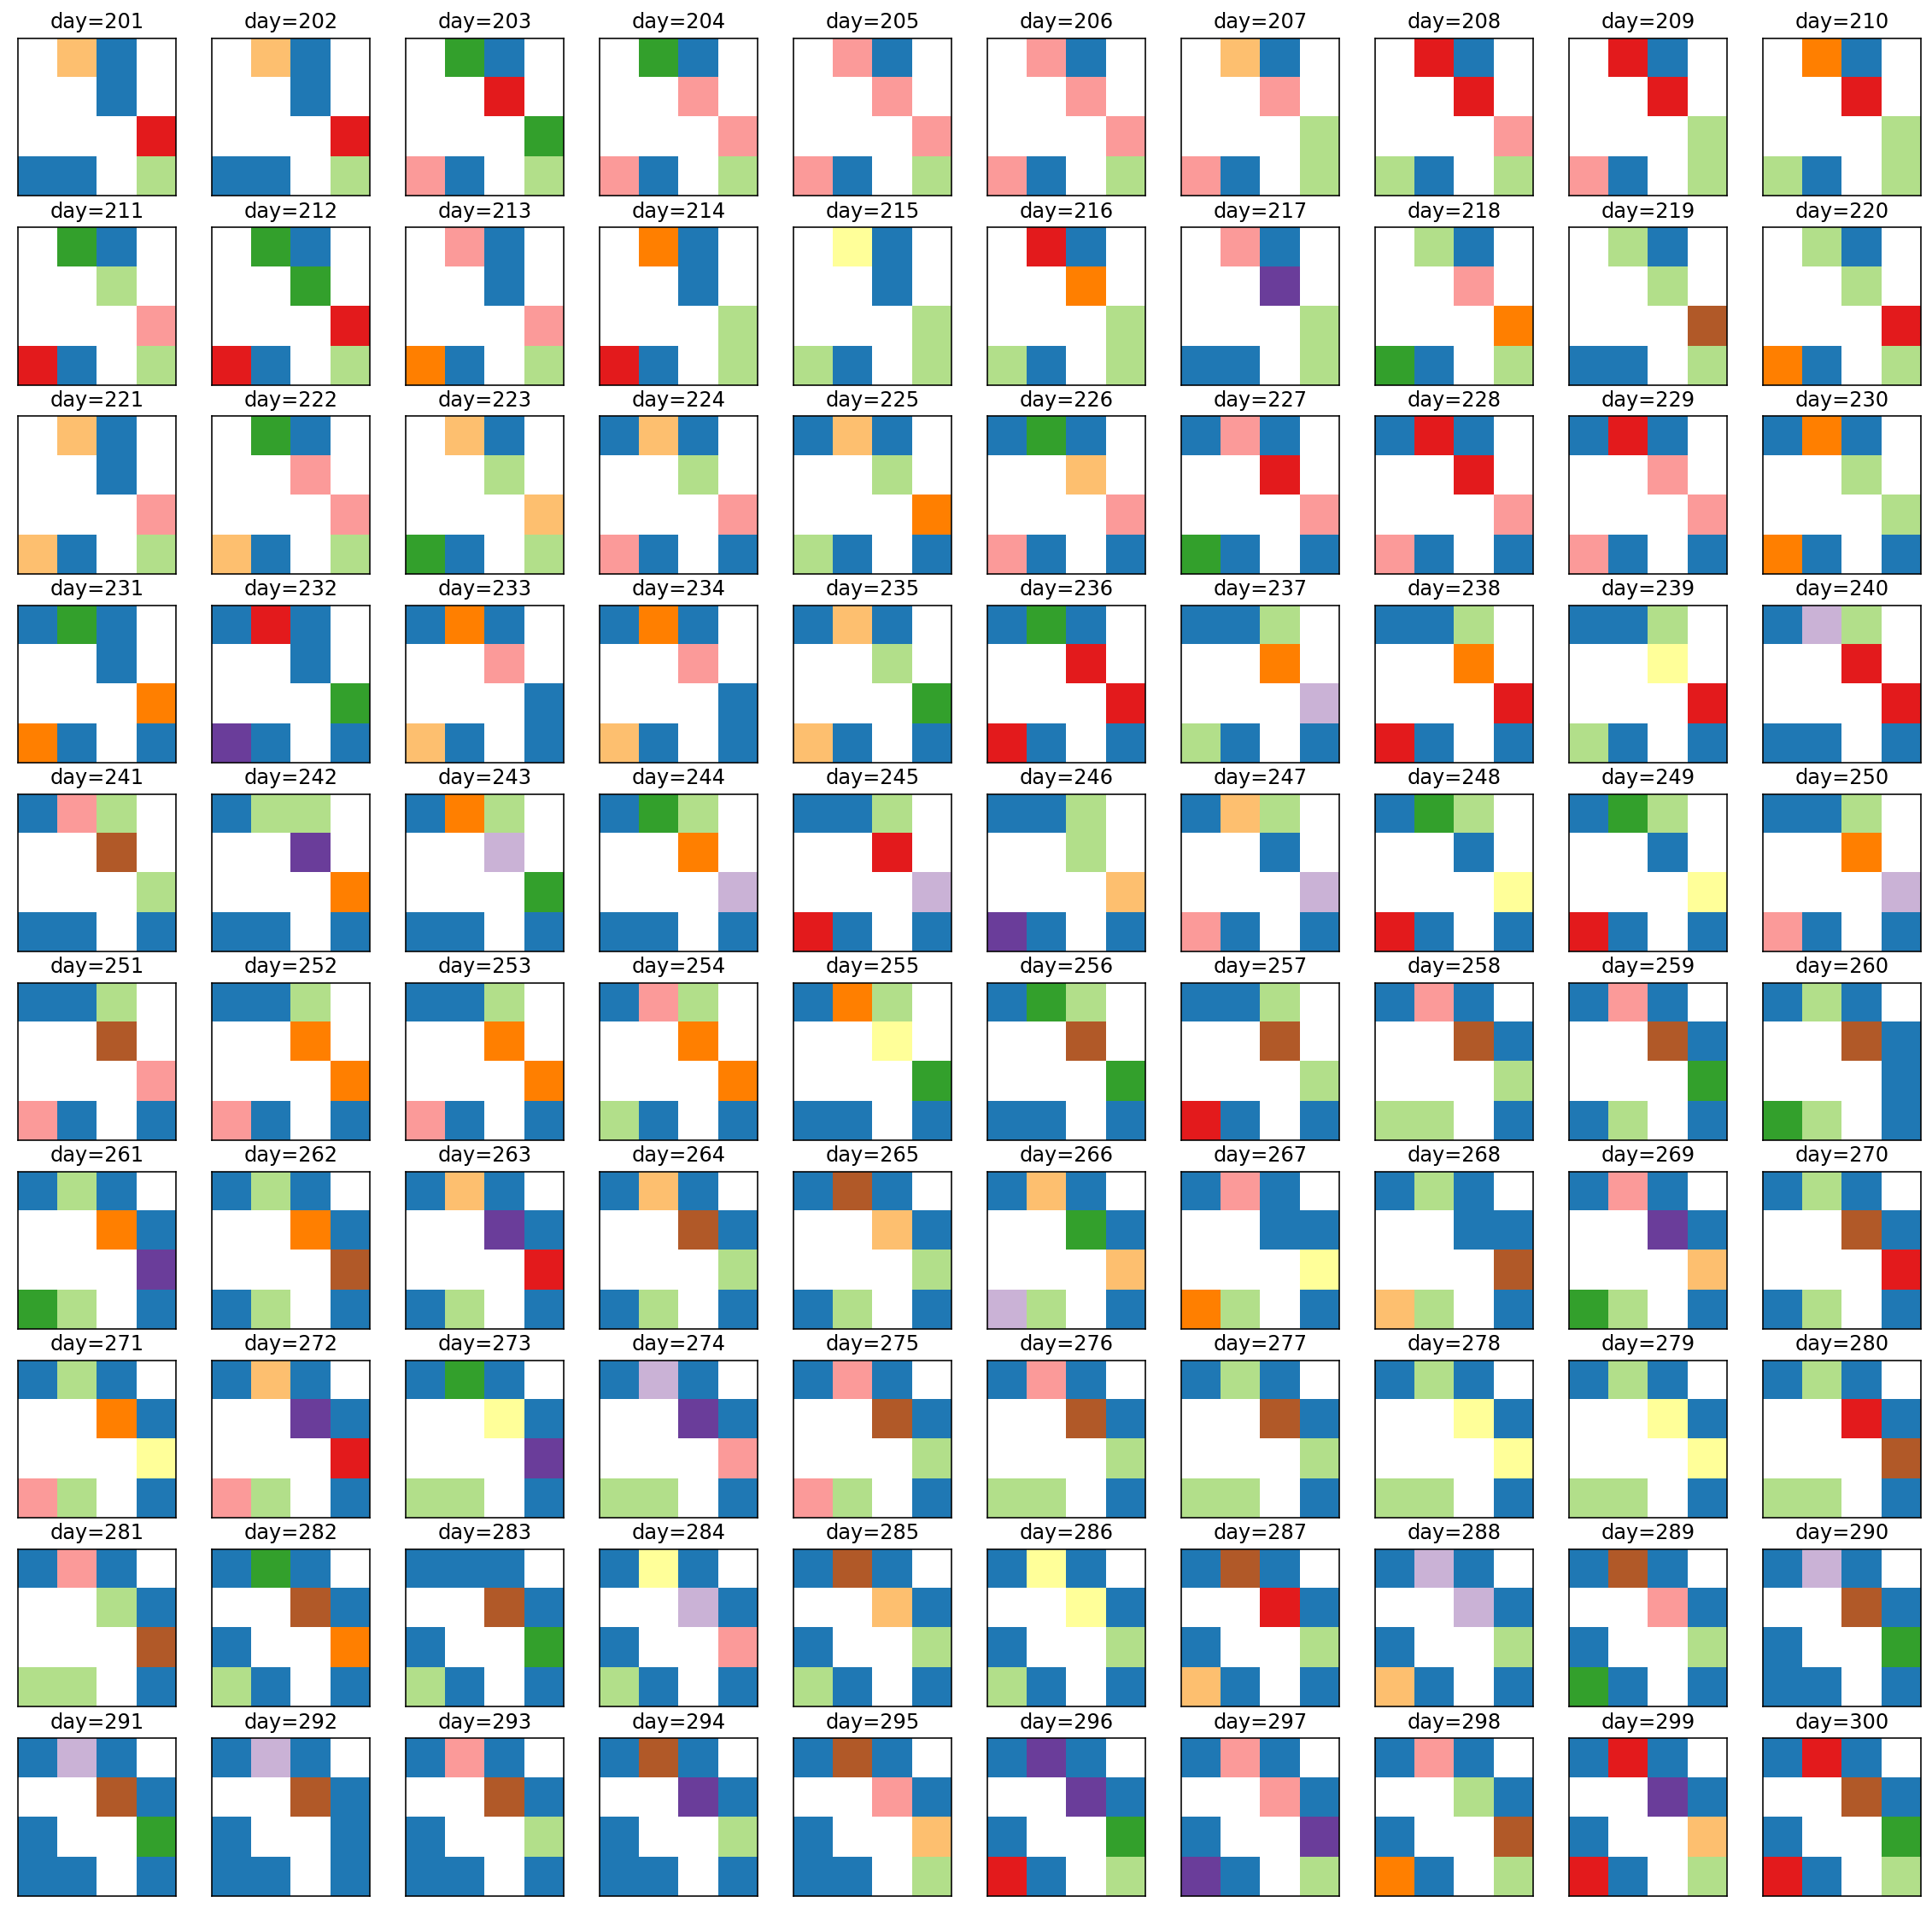

In [ ]:
#Goal: get 4 arrays of total number of individuals per box at each t
grid_tax = grid_all_t[grid_all_t['taxa'] == 'Tax5']
gridsize = 16
grid_x = 4
grid_y = 4
# Plot
day_1 = 201
day_f = 300
ncols = 10
fig, axes = plt.subplots(nrows=int((day_f-day_1+1)/ncols), ncols=ncols, figsize=(20, 20))
for day in np.arange(day_1,day_f+1):
    grid = grid_tax[['taxa',str(day)]]
    Biomass = np.zeros((gridsize))
    for i in np.arange(gridsize):
        Biomass[i] = grid.iloc[:,1].iloc[i]
    Biomass = Biomass.reshape(grid_x,grid_y)  
    Biomass = np.ma.masked_where(Biomass < 0.01, Biomass)
    position = (day-day_1)/ncols
    text = "{:.1f}".format(position)
    x_pos = int(text[0:1])
    y_pos = int(text[2:3])
    im = axes[x_pos,y_pos].imshow(Biomass,cmap='Paired',vmin=0,vmax=12)
    axes[x_pos,y_pos].set_xticks([])
    axes[x_pos,y_pos].set_yticks([])
    axes[x_pos,y_pos].set_title("day=" + str(day))

# ***** Proof that initial total biomass increases with n_taxa

In [ ]:
## taxa_per_box = 0.4
# n_taxa = 3: total initial biomass = 15.8
# n_taxa = 6: total initial biomass = 40.0
# n_taxa = 9: total initial biomass = 63.0
# n_taxa = 12: total initial biomass = 92.1
grid.iloc[:,1].sum()
## If I change taxa_per_box
# n_taxa = 6, taxa_per_box = 0.2 : total initial biomass = 24.2

# ***** Back to the phase 1 grids: none of them have 100x100 rows

In [ ]:
pd.read_csv('microbes_spatial_D10_jobID=11232380.csv')

Unnamed: 0    0    1   31   61   91  121  151  181  211  241  271  301  \
0            Tax1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1            Tax2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2            Tax3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3            Tax4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4            Tax5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
829123      Tax24  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
829124      Tax25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
829125      Tax26  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
829126      Tax27  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
829127      Tax28  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        331  361  391  
0       0.0  0.0  0.0  
1       0.0  0.0  0.0  
2       0.0  0.0  0.0  
3       0.0  0.0  0.0  
4       0.0  0.0  0.0  
...     ...  ...  ...  
829123  0.0  0.0  0.0  
829124  0.0  0.0  0.0  
829125  0.0  0.0  0.0  
829126  0.0  0.0  0.0  
829127  0.0  0.0  0.0  

[829128 rows x 16 columns]

# ***** Back to the multiple regression

In [ ]:
y = [-0.15,-0.34,-0.19,0.66,0.13,-0.48,-0.01,0.02,-0.32,0.76,0.34,0.84,0.53,-0.26,-0.3,-0.1,-0.15]

x1 = [67.4,28.4,123.6,322.9,43.5,72.5,133.7,203.2,224.6,438.2,231.5,458.2,827.5,69.7,155.3,397.4,269.7]
#x2 = [-0.0006,0.015,-0.001,-0.009,-0.0003,0.002,-0.0006,-0.0007,-0.002,0.002,0.017,-0.003,0.002,-0.0002,-0.002,-0.001,-0.0008]
x2 = [0.0006,0.015,0.001,0.009,0.0003,0.002,0.0006,0.0007,0.002,0.002,0.017,0.003,0.002,0.0002,0.002,0.001,0.0008]
x3 = [0.67,0.33,0,0.25,1,0.75,1,0.67,0.43,0,0.29,0,0.25,1,0.63,0.67,0.5]
x4 = [52.2,7.4,0,9.5,43.5,27.5,133.7,203,74,0,24.2,0,36.7,69.7,49,307.2,265]
x5 = [15.2,20.9,123.6,313.4,0,45.1,0,0.2,150.6,438.2,207.2,458.2,790.8,0,106.3,90.2,4.8]
x6 = [0.77,0.26,0,0.03,1,0.38,1,1,0.33,0,0.1,0,0.04,1,0.32,0.77,0.98]

In [ ]:
y = [-0.15,-0.34,-0.19,0.66,0.13,-0.48,-0.01,0.02,-0.32,0.76,0.34,0.84,0.53,-0.26,-0.3,-0.1,-0.15]
x2 = [0.0006,0.015,0.001,0.009,0.0003,0.002,0.0006,0.0007,0.002,0.002,0.017,0.003,0.002,0.0002,0.002,0.001,0.0008]

In [ ]:
# Multiple regression linear model
import numpy as np
import statsmodels.api as sm

x = [x2]

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2.466
Date:                Fri, 11 Mar 2022   Prob (F-statistic):              0.139
Time:                        00:39:41   Log-Likelihood:                -6.8848
No. Observations:                  16   AIC:                             17.77
Df Residuals:                      14   BIC:                             19.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            37.2707     23.734      1.570      0.1

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


intercept = 0.011397597552370492
slope = [13.2810953]


Text(0, 0.5, 'PD growth rate')

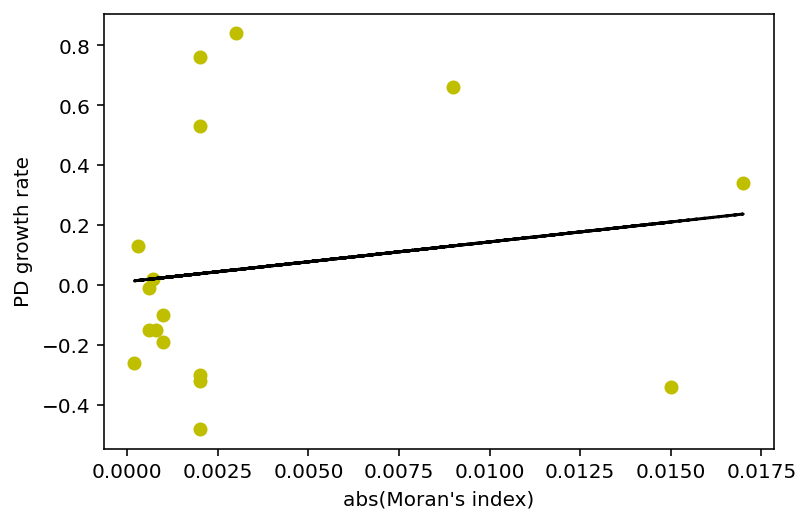

In [ ]:
# Plot
# Get intercept and slope of the linear regression - FUNGI NUMBER
# SLOPE = -0.22
from sklearn.linear_model import LinearRegression
import numpy as np

x = np.array(x2).reshape(-1, 1)
y = np.array(y)

lm = LinearRegression()
lm.fit(x, y)

print('intercept =', lm.intercept_)
print('slope =',lm.coef_)

# PLOT
x = np.array(x2)
y = np.array(y)

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
plt.xlabel("abs(Moran's index)")
plt.ylabel("PD growth rate")

# ***** Get Tax_SubX_index and n_PD

In [ ]:
#load in data
with open("10657611.pickle", "rb") as f:
    dump = pickle5.load(f)

Output_variables = vars(dump).keys()
Output_variables
# ABUNDANCE OF SPECIALIST TAXA
Initialization = dump.Initialization
n_taxa = Initialization['n_taxa']
n_substrats = Initialization['n_substrates']
n_monomers = n_substrats + 2
# Table of correspondance between substrates and monomers names and indexes
Sub_name_initial = pd.Series(Initialization['Vmax0'].T.index)
Sub_name_add = pd.Series(['0']*2)
Sub_name_almost = pd.concat([Sub_name_add, Sub_name_initial])
Sub_name = Sub_name_almost.reset_index(drop=True)
Sub_index_initial = pd.Series(Initialization['ReqEnz'].loc['set1'].iloc[0:n_substrats,:].index)
Sub_index_add = pd.Series(['0']*2)
Sub_index_almost = pd.concat([Sub_index_add, Sub_index_initial])
Sub_index = Sub_index_almost.reset_index(drop=True)
Mon_index = pd.Series(Initialization['TaxMon_final'].T.index)
Mon_name = pd.Series(Initialization['UptakeGenesCost'].T.index)
Table_correspondance = pd.DataFrame({'Sub_index': Sub_index, 'Sub_name': Sub_name, 'Mon_index': Mon_index, 'Mon_name': Mon_name})
Table_correspondance.index = Table_correspondance['Sub_name'].values
del Table_correspondance['Sub_name']
# WHICH TAXON IS SPECIALIST OF WHICH SUBSTRATE
SubX_list = Sub_name[2:].tolist()
SubX = 'Protein3'
Enz_SubX = Initialization['ReqEnz'].loc['set1'].iloc[0:n_substrats,:].loc[Table_correspondance['Sub_index'][SubX]]
Enz_SubX_index = Enz_SubX[Enz_SubX != 0].index          # Enzymes qui peuvent decomposer SubX
Tax_SubX = Initialization['EnzGenes'].iloc[0:n_taxa,:][Enz_SubX_index]     # Taxons qui peuvent decomposer SubX
Tax_SubX_index = Tax_SubX[Tax_SubX.sum(axis=1) != 0].index
print(Tax_SubX_index)

Index(['Tax29', 'Tax35', 'Tax59', 'Tax93', 'Tax129', 'Tax135', 'Tax159',
       'Tax193'],
      dtype='object')


# ***** Spatial correlation with n_taxa_PD per box instead of biomass

# ***** Try Moran's index on real grids

PD total biomass:  269.7
Moran index:  -0.0007671329392919223
FB_ratio:  0.5
F initial biomass:  265.0
B initial biomass:  4.8


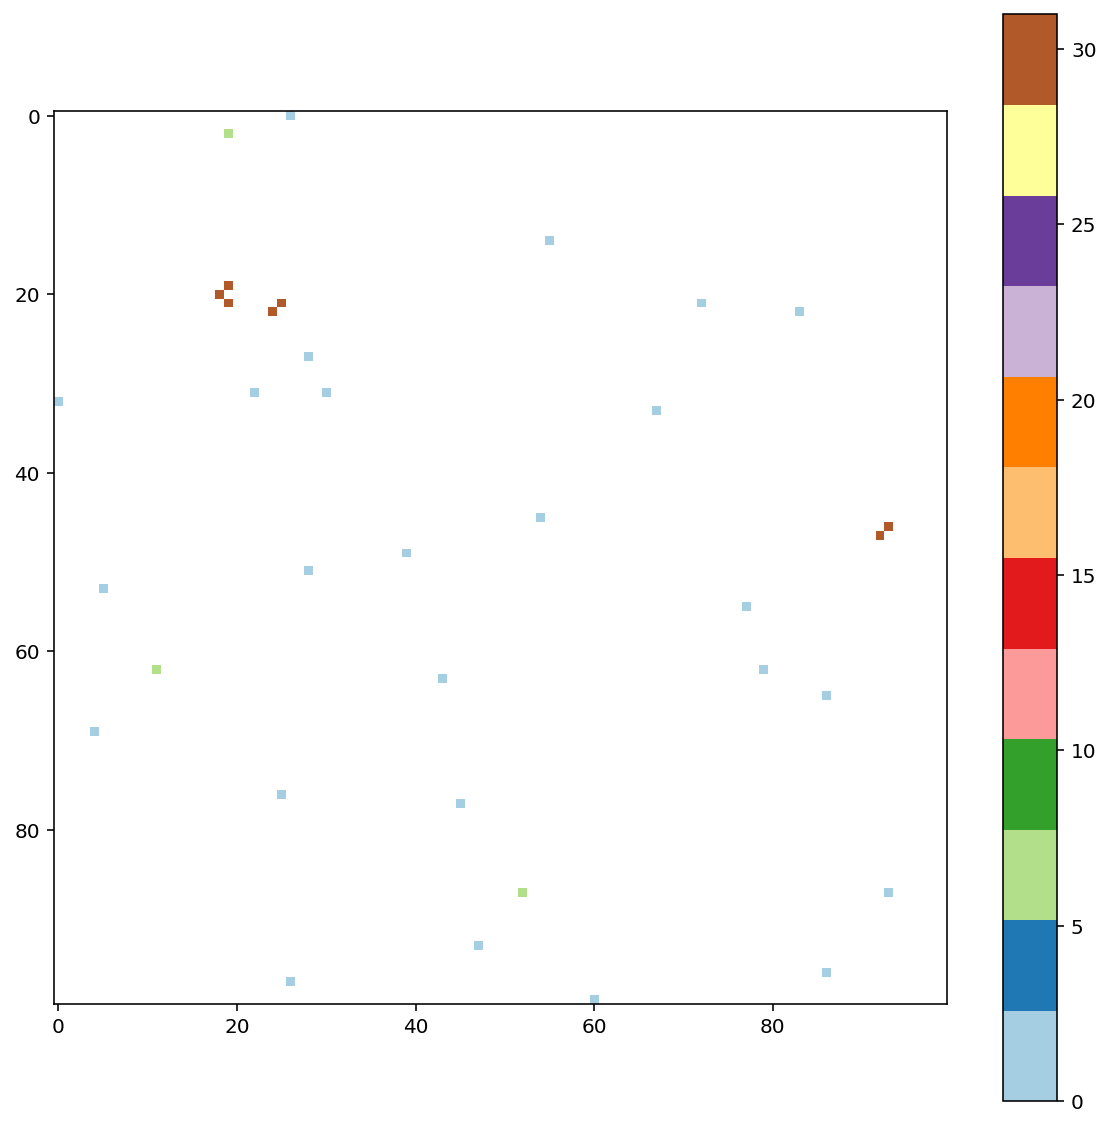

In [ ]:
# Grid: Biomass
day = 0
grid_raw = pd.read_csv('microbes_spatial_ADA_jobID=11224664_seed=10.csv')
grid_all_t = grid_raw.rename(columns={"Unnamed: 0": "taxa"})
grid = grid_all_t[['taxa',str(day)]]
n_PD = int(Tax_SubX_index.shape[0])
grid_df = grid[grid['taxa'].isin(Tax_SubX_index[0:n_PD])]
# F:B ratio
Tax_index = Initialization['EnzGenes'].iloc[0:n_taxa,:].index
Tax_FB = pd.DataFrame(Initialization['fb'][0:n_taxa], index = Tax_index)
Tax_FB_df = Tax_FB.rename(columns={0:'fb'})
Tax_FB_df[Tax_FB_df.index.isin(Tax_SubX_index)]
# Biomass per taxon
PD_biomass = grid_df.groupby(['taxa'],sort=False).sum()
PD_biomass_df = PD_biomass.rename(columns={'0':'biomass_d'+str(day)})
# Combine both df 
PD_tot_df = pd.merge(PD_biomass_df, Tax_FB_df, left_index=True, right_index=True)
# FB ratio: you want to keep only present PD_taxa
PD_tot_df_present = PD_tot_df[PD_tot_df['biomass_d0']!=0]
FB_ratio = PD_tot_df_present['fb'].sum()/PD_tot_df_present.shape[0]
# FB initial biomass
PD_F_biomass = PD_tot_df_present[PD_tot_df_present['fb']==1].iloc[:,0].sum()
PD_B_biomass = PD_tot_df_present[PD_tot_df_present['fb']==0].iloc[:,0].sum()
# Prepare for grid
grid_Prot = grid_df.iloc[:,1]
gridsize = 10000
grid_x = 100
grid_y = 100
grid_Prot_per_box = np.zeros((gridsize))
for i in np.arange(gridsize):
  grid_Prot_per_box[i] = grid_Prot[n_PD*i:n_PD*(i+1)].sum()
grid_Prot_per_box = grid_Prot_per_box.reshape(grid_x,grid_y)
grid_Prot_per_box_mask = np.ma.masked_where(grid_Prot_per_box < 0.01, grid_Prot_per_box)
# Moran's index of spatial correlation
from libpysal.weights import lat2W
from esda.moran import Moran
import numpy as np
# Plot
plt.figure(figsize=(10, 10))
plt.imshow(grid_Prot_per_box_mask, cmap='Paired',vmin=0, vmax=31)
cbar = plt.colorbar(orientation='vertical')
# Create the matrix of weigthts 
w = lat2W(grid_Prot_per_box_mask.shape[0], grid_Prot_per_box_mask.shape[1])
# Crate the pysal Moran object 
mi = Moran(grid_Prot_per_box_mask, w)
# Verify Moran's I results 
print('PD total biomass: ', round(grid_Prot_per_box.sum(),1))
print('Moran index: ', mi.I)    # spatial correlation index value
#print('Moran p-value: ', mi.p_norm)   # p-value 
print('FB_ratio: ', FB_ratio)
print('F initial biomass: ', round(PD_F_biomass,1))
print('B initial biomass: ', round(PD_B_biomass,1))

# ***** Distribution of 1 taxon

In [ ]:
# Grid: Biomass
day = 0
grid_raw = pd.read_csv('microbes_spatial_ADA_jobID=11224675_seed=2.csv')
grid_all_t = grid_raw.rename(columns={"Unnamed: 0": "taxa"})
grid = grid_all_t[['taxa',str(day)]]
grid_df = grid[grid['taxa'] == 'Tax108']
# Prepare for grid
grid_Prot = grid_df.iloc[:,1]
gridsize = 10000
grid_x = 100
grid_y = 100
grid_Prot_per_box = np.zeros((gridsize))
for i in np.arange(gridsize):
  grid_Prot_per_box[i] = grid_Prot.iloc[i]
grid_Prot_per_box = grid_Prot_per_box.reshape(grid_x,grid_y)
grid_Prot_per_box = np.ma.masked_where(grid_Prot_per_box < 0.01, grid_Prot_per_box)
# Moran's index of spatial correlation
from libpysal.weights import lat2W
from esda.moran import Moran
import numpy as np
# Plot
plt.figure(figsize=(10, 10))
plt.imshow(grid_Prot_per_box, cmap='Paired',vmin=0, vmax=31)
cbar = plt.colorbar(orientation='vertical')

# ***** Build 1 3x3 grid 

/usr/local/lib/python3.7/dist-packages/libpysal/weights/util.py:23: UserWarning: geopandas not available. Some functionality will be disabled.
  warn("geopandas not available. Some functionality will be disabled.")


<class 'numpy.ndarray'>
0.39423076923076916
0.029951007654558826


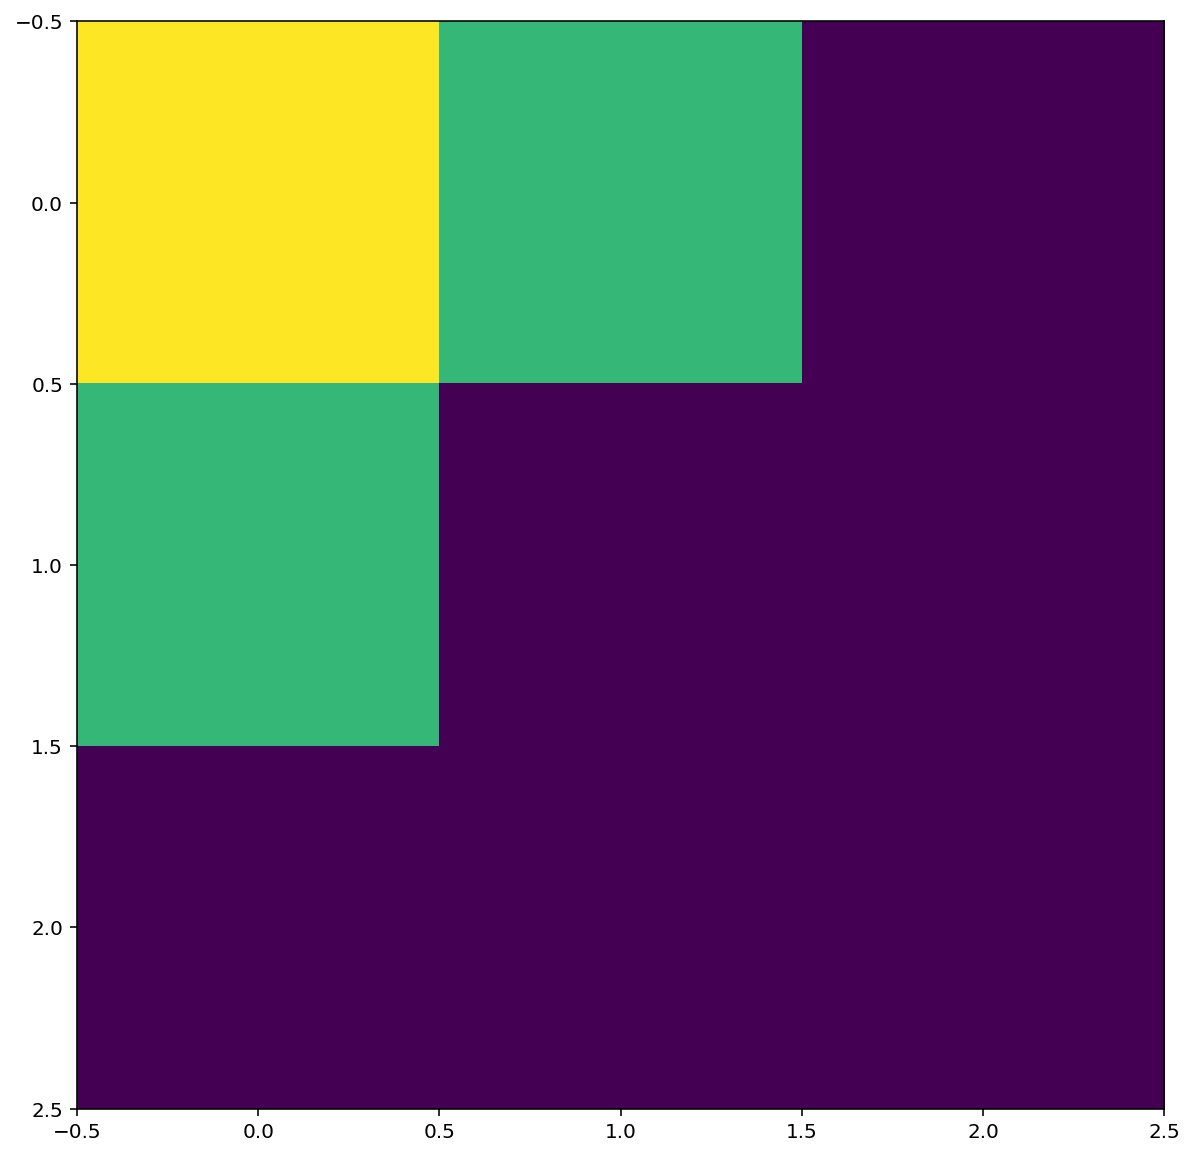

In [ ]:
# Build array
biomass_list = [3,2,0,2,0,0,0,0,0]
grid_x = 3
grid_y = 3
biomass_df = np.array(biomass_list)
biomass_grid = biomass_df.reshape(grid_x,grid_y)
# Moran's index of spatial correlation
from libpysal.weights import lat2W
from esda.moran import Moran
import numpy as np
# Plot
plt.figure(figsize=(10, 10))
plt.imshow(biomass_grid)
# Create the matrix of weigthts 
w = lat2W(biomass_grid.shape[0], biomass_grid.shape[1])
# Crate the pysal Moran object 
mi = Moran(biomass_grid, w)
# Verify Moran's I results 
print(type(biomass_grid))
print(mi.I)    # spatial correlation index value
print(mi.p_norm)   # p-value 

# ***** Spatial correlation index: python package: https://stackoverflow.com/questions/45839957/python-how-do-i-compute-interactive-spatial-autocorrelation-moran-i-using-py

---



-0.004202979915908039
0.30886065841200805


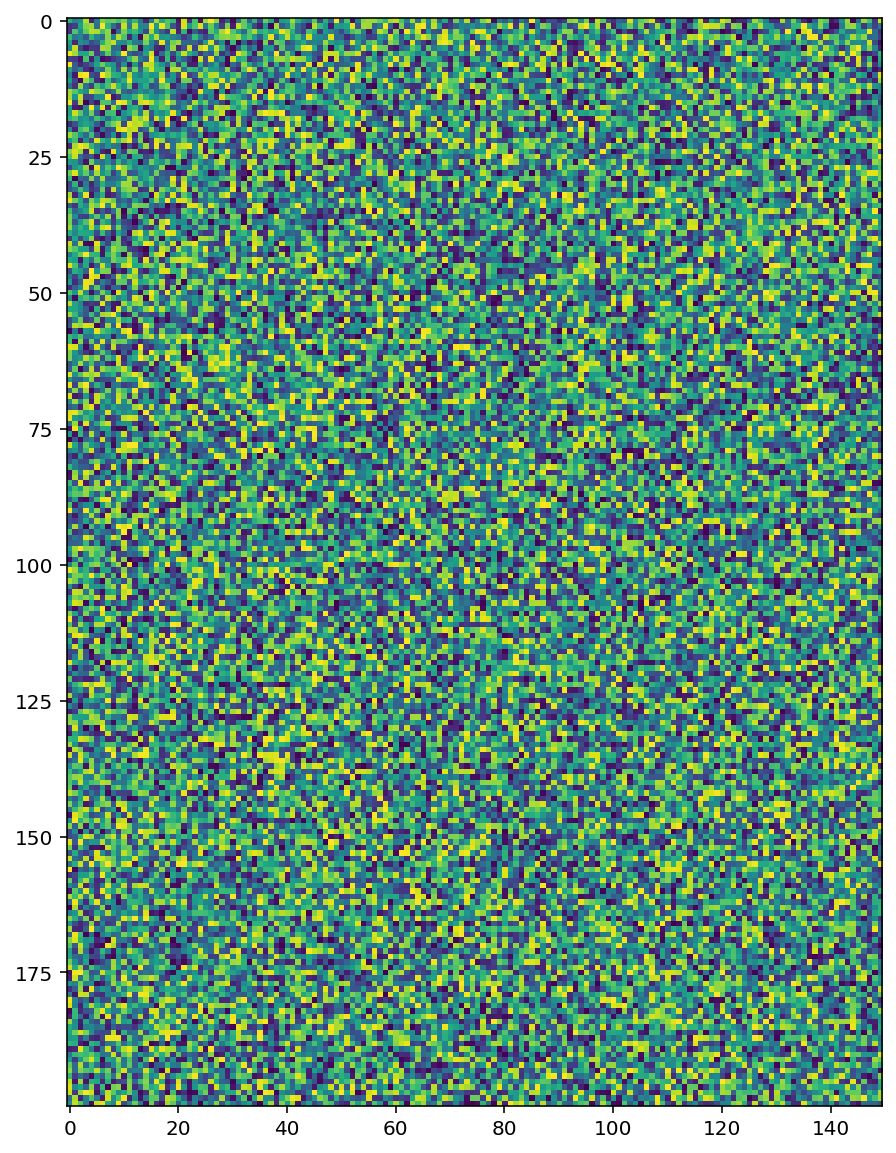

In [ ]:
from libpysal.weights import lat2W
from esda.moran import Moran
import numpy as np

# Use your matrix here, instead of this random one
Z = np.random.rand(200,150)

# Plot
plt.figure(figsize=(10, 10))
plt.imshow(Z)

# Create the matrix of weigthts 
w = lat2W(Z.shape[0], Z.shape[1])

# Crate the pysal Moran object 
mi = Moran(Z, w)

# Verify Moran's I results 
print(mi.I) 
print(mi.p_norm)

# ***** Are phase 1 grids ready? No
# ***** Do I get the 100x100 boxes at t0 if I cancel the simulation? No

# ***** Final biomass of resident protein degraders only

In [ ]:
# Biomass of resident protein degraders only (t0 only)
grid_raw = pd.read_csv('residents_grid_D310.csv')
grid_all_t = grid_raw.rename(columns={"Unnamed: 0": "taxa"})
grid_all_t['CNP'] = grid_all_t.iloc[:,1:4].sum(axis=1)
grid = grid_all_t.loc[:,['taxa','CNP']]
n_PD_res = int(Tax_SubX_index.shape[0]/2)
print(Tax_SubX_index[0:n_PD_res])
grid_df = grid[grid['taxa'].isin(Tax_SubX_index[0:n_PD_res])]
grid_Prot = grid_df.iloc[:,1]
grid_Prot.sum()

NameError: ignored

In [ ]:
# Biomass of protein degraders - without dispersers
day = 1095
grid_raw = pd.read_csv('microbes_spatial_AD0_jobID=11224663_seed=10.csv')
grid_all_t = grid_raw.rename(columns={"Unnamed: 0": "taxa"})
grid = grid_all_t[['taxa',str(day)]]
n_PD_res = int(Tax_SubX_index.shape[0]/2)
list_PD = Tax_SubX_index[0:n_PD_res]
print(list_PD)
grid_df = grid[grid['taxa'].isin(list_PD)]
grid_Prot = grid_df.iloc[:,1]
grid_Prot.sum()

Index(['Tax38', 'Tax42', 'Tax81', 'Tax91'], dtype='object')


211.81111169370257

In [ ]:
# Biomass of protein degraders - with dispersers - residents only
day = 1095
grid_raw = pd.read_csv('microbes_spatial_ADA_jobID=11224664_seed=10.csv')
grid_all_t = grid_raw.rename(columns={"Unnamed: 0": "taxa"})
grid = grid_all_t[['taxa',str(day)]]
n_PD_res = int(Tax_SubX_index.shape[0]/2)
list_PD = Tax_SubX_index[0:n_PD_res]
print(list_PD)
grid_df = grid[grid['taxa'].isin(list_PD)]
grid_Prot = grid_df.iloc[:,1]
grid_Prot.sum()

Index(['Tax38', 'Tax42', 'Tax81', 'Tax91'], dtype='object')


126.68438788436187

In [ ]:
# Biomass of protein degraders - with dispersers - all PD
day = 1095
grid_all_t = grid_raw.rename(columns={"Unnamed: 0": "taxa"})
grid = grid_all_t[['taxa',str(day)]]
n_PD = int(Tax_SubX_index.shape[0])
list_PD = Tax_SubX_index[0:n_PD]
print(list_PD)
grid_df = grid[grid['taxa'].isin(list_PD)]
grid_Prot = grid_df.iloc[:,1]
grid_Prot.sum()

Index(['Tax38', 'Tax42', 'Tax81', 'Tax91', 'Tax138', 'Tax142', 'Tax181',
       'Tax191'],
      dtype='object')


190.97479326993934

# **** Grids at the end of phase 2

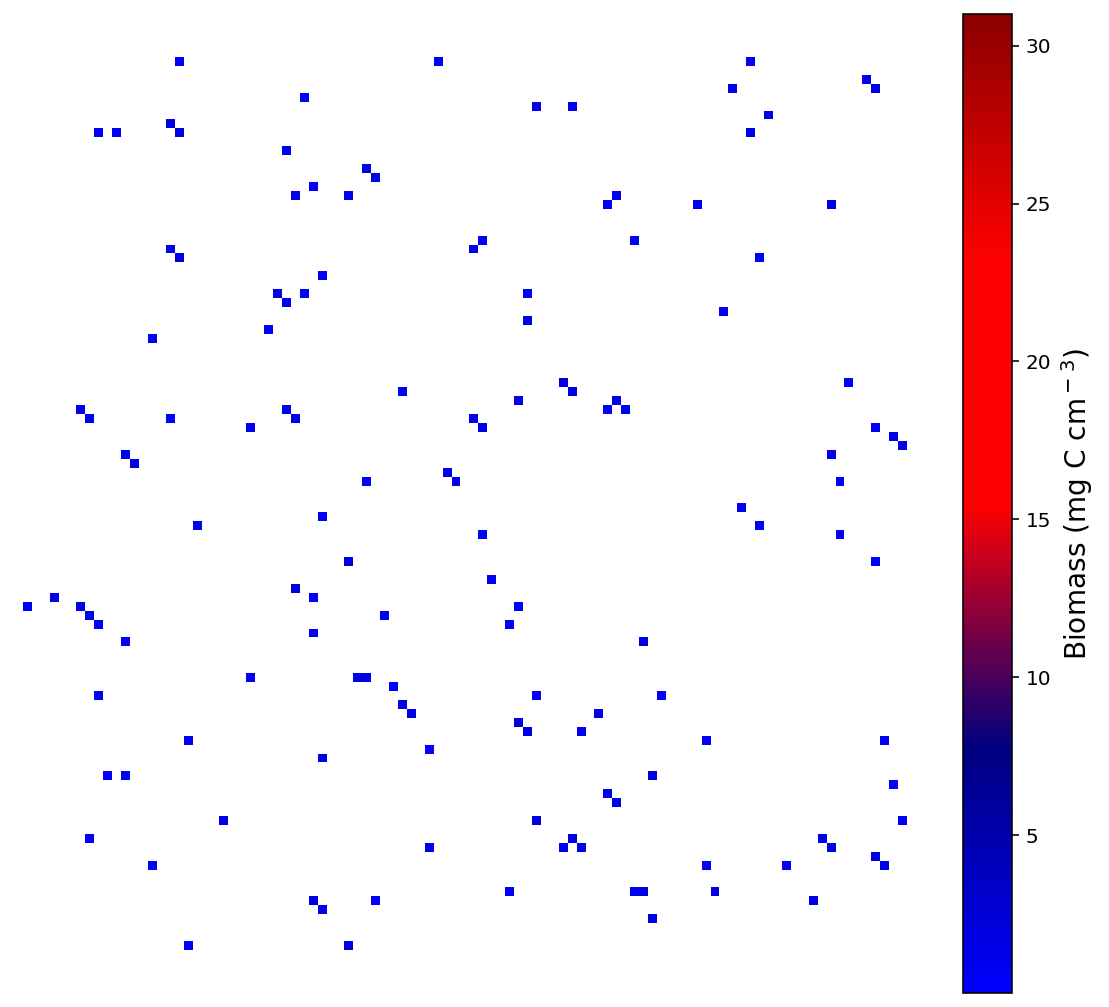

In [ ]:
# Grid: Biomass
day = 0
grid_raw = pd.read_csv('microbes_spatial_AD0_jobID=11224669_seed=5.csv')
grid_all_t = grid_raw.rename(columns={"Unnamed: 0": "taxa"})
grid = grid_all_t[['taxa',str(day)]]
n_PD = int(Tax_SubX_index.shape[0]/2)
grid_df = grid[grid['taxa'].isin(Tax_SubX_index[0:n_PD])]
grid_Prot = grid_df.iloc[:,1]
gridsize = 10000
grid_x = 100
grid_y = 100
grid_Prot_per_box = np.zeros((gridsize))
for i in np.arange(gridsize):
  grid_Prot_per_box[i] = grid_Prot[n_PD*i:n_PD*(i+1)].sum()
grid_Prot_per_box = grid_Prot_per_box.reshape(grid_x,grid_y)
grid_Prot_per_box = np.ma.masked_where(grid_Prot_per_box < 0.05, grid_Prot_per_box)
# Plot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
plt.figure(figsize=(10, 9))
cmap = LinearSegmentedColormap.from_list('mycmap', ['blue', 'navy','red', 'red', 'darkred'])
xx = plt.imshow(grid_Prot_per_box,cmap=cmap,vmin=0.01,vmax=31)
plt.axis('off')
cbar = plt.colorbar(xx,orientation='vertical')
cbar.set_label('Biomass (mg C cm$^-$$^3$)',size=14)

# ***** Correction of how to get grids at t0 of phase 2

In [ ]:
#load in data
with open("10657610.pickle", "rb") as f:
    dump = pickle5.load(f)

Output_variables = vars(dump).keys()
Output_variables

dict_keys(['Runtime', 'Initialization', 'SubstratesSeries', 'DecayRatesSeries', 'MicrobesSeries', 'TotalBiomass_PerYear', 'decay_results', 'decay_results_firstcolumns', 'decay_results_persubstrate', 'Table_correspondance', 'SubX_list', 'DecayRates_Grid_Time', 'DecayRates_Grid_Time_Substrate', 'ntaxa_decomp_tf', 'decay_results_persubstrate_final', 'decay_results_Sub'])

In [ ]:
# ABUNDANCE OF SPECIALIST TAXA
Initialization = dump.Initialization
n_taxa = Initialization['n_taxa']
n_substrats = Initialization['n_substrates']
n_monomers = n_substrats + 2
# Table of correspondance between substrates and monomers names and indexes
Sub_name_initial = pd.Series(Initialization['Vmax0'].T.index)
Sub_name_add = pd.Series(['0']*2)
Sub_name_almost = pd.concat([Sub_name_add, Sub_name_initial])
Sub_name = Sub_name_almost.reset_index(drop=True)
Sub_index_initial = pd.Series(Initialization['ReqEnz'].loc['set1'].iloc[0:n_substrats,:].index)
Sub_index_add = pd.Series(['0']*2)
Sub_index_almost = pd.concat([Sub_index_add, Sub_index_initial])
Sub_index = Sub_index_almost.reset_index(drop=True)
Mon_index = pd.Series(Initialization['TaxMon_final'].T.index)
Mon_name = pd.Series(Initialization['UptakeGenesCost'].T.index)
Table_correspondance = pd.DataFrame({'Sub_index': Sub_index, 'Sub_name': Sub_name, 'Mon_index': Mon_index, 'Mon_name': Mon_name})
Table_correspondance.index = Table_correspondance['Sub_name'].values
del Table_correspondance['Sub_name']
# WHICH TAXON IS SPECIALIST OF WHICH SUBSTRATE
SubX_list = Sub_name[2:].tolist()
SubX = 'Protein3'
Enz_SubX = Initialization['ReqEnz'].loc['set1'].iloc[0:n_substrats,:].loc[Table_correspondance['Sub_index'][SubX]]
Enz_SubX_index = Enz_SubX[Enz_SubX != 0].index          # Enzymes qui peuvent decomposer SubX
Tax_SubX = Initialization['EnzGenes'].iloc[0:n_taxa,:][Enz_SubX_index]     # Taxons qui peuvent decomposer SubX
Tax_SubX_index = Tax_SubX[Tax_SubX.sum(axis=1) != 0].index
n_PD = int(len(Tax_SubX_index)/2)
print(Tax_SubX_index)
print(n_PD)

Index(['Tax29', 'Tax76', 'Tax85', 'Tax93', 'Tax129', 'Tax176', 'Tax185',
       'Tax193'],
      dtype='object')
4


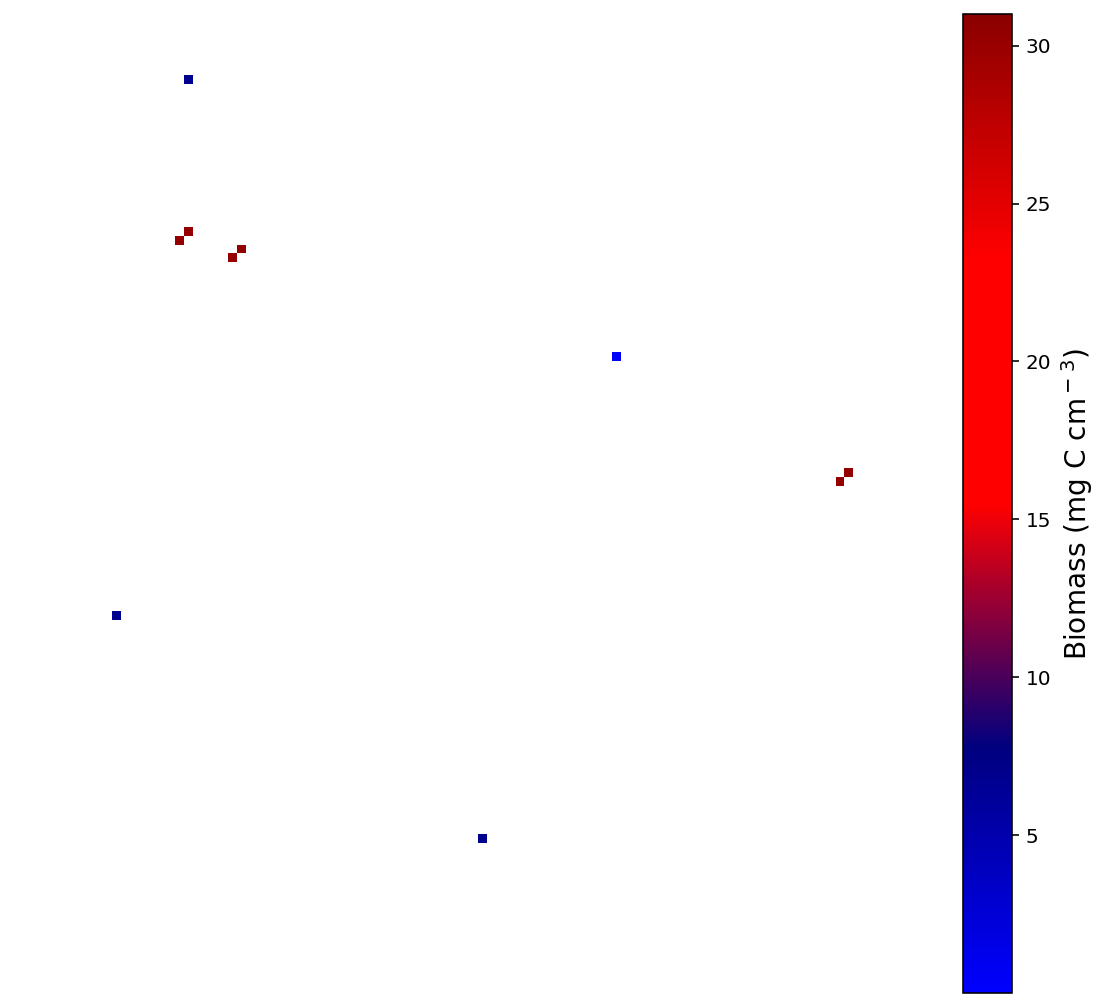

In [ ]:
# Grid: Biomass
grid_raw = pd.read_csv('residents_grid_D310.csv')
grid_all_t = grid_raw.rename(columns={"Unnamed: 0": "taxa"})
grid_all_t['CNP'] = grid_all_t.iloc[:,1:4].sum(axis=1)
grid = grid_all_t.loc[:,['taxa','CNP']]
grid_df = grid[grid['taxa'].isin(Tax_SubX_index[0:n_PD])]
grid_Prot = grid_df.iloc[:,1]
gridsize = 10000
grid_x = 100
grid_y = 100
grid_Prot_per_box = np.zeros((gridsize))
for i in np.arange(gridsize):
  grid_Prot_per_box[i] = grid_Prot[n_PD*i:n_PD*(i+1)].sum()
grid_Prot_per_box = grid_Prot_per_box.reshape(grid_x,grid_y)
grid_Prot_per_box = np.ma.masked_where(grid_Prot_per_box < 0.05, grid_Prot_per_box)
# Plot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
plt.figure(figsize=(10, 9))
cmap = LinearSegmentedColormap.from_list('mycmap', ['blue', 'navy','red', 'red', 'darkred'])
xx = plt.imshow(grid_Prot_per_box,cmap=cmap,vmin=0.01,vmax=31)
plt.axis('off')
cbar = plt.colorbar(xx,orientation='vertical')
cbar.set_label('Biomass (mg C cm$^-$$^3$)',size=14)

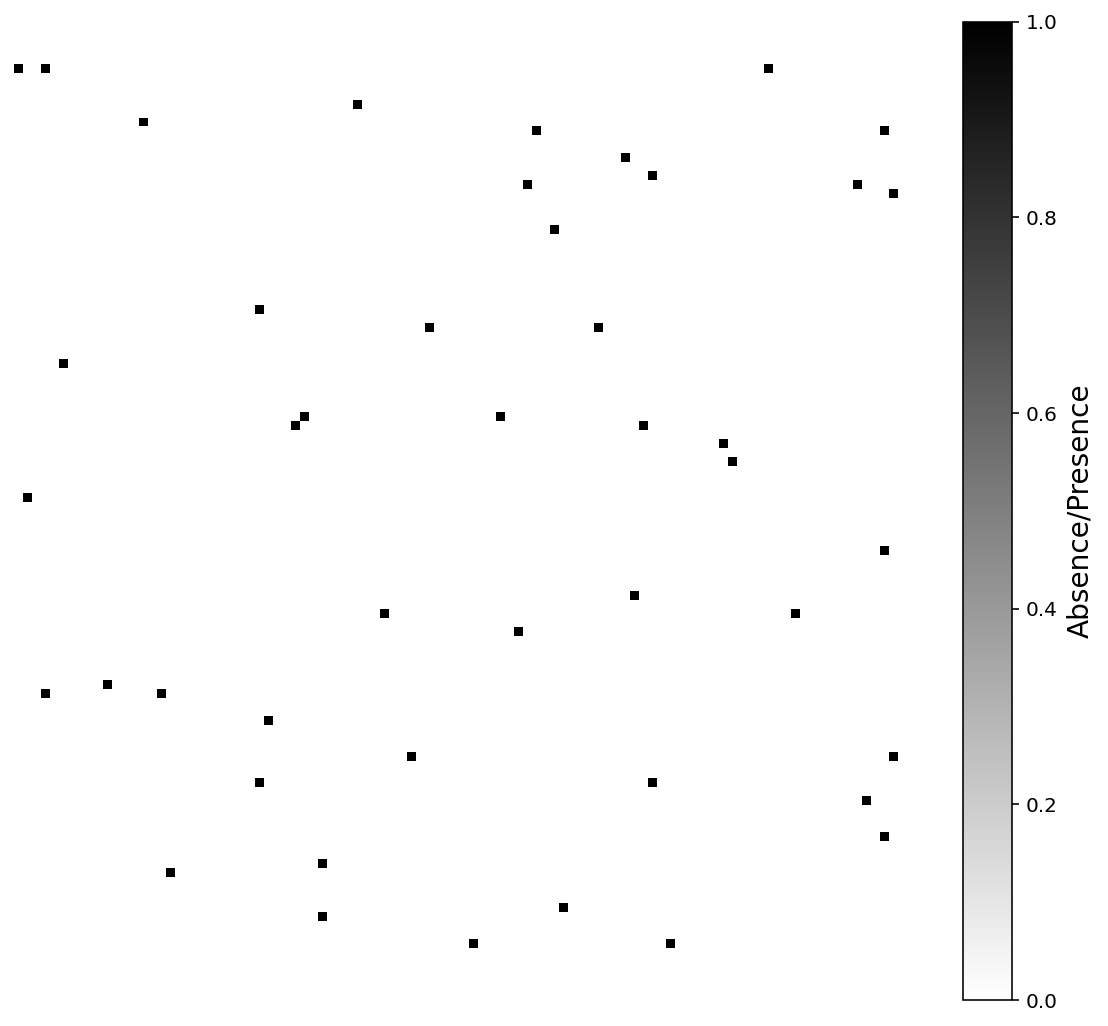

In [ ]:
# Grid: Presence/Absence
grid_raw = pd.read_csv('residents_grid_D32.csv')
grid_all_t = grid_raw.rename(columns={"Unnamed: 0": "taxa"})
grid_all_t['CNP'] = grid_all_t.iloc[:,1:4].sum(axis=1)
grid = grid_all_t.loc[:,['taxa','CNP']]
grid_df = grid[grid['taxa'].isin(Tax_SubX_index[0:n_PD])]
grid_Prot = grid_df.iloc[:,1]
gridsize = 10000
grid_x = 100
grid_y = 100
grid_Prot_per_box = np.zeros((gridsize))
for i in np.arange(gridsize):
  grid_Prot_per_box[i] = grid_Prot[n_PD*i:n_PD*(i+1)].sum()
grid_Prot_per_box = grid_Prot_per_box.reshape(grid_x,grid_y)
grid_Prot_per_box[grid_Prot_per_box > 0] = 1
# Plot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
plt.figure(figsize=(10, 9))
xx = plt.imshow(grid_Prot_per_box,cmap='binary',vmin=0,vmax=1)
plt.axis('off')
cbar = plt.colorbar(xx,orientation='vertical')
cbar.set_label('Absence/Presence',size=14)

# ***** Can I get spatial distribution of phase 1 and who's a protein degrader?

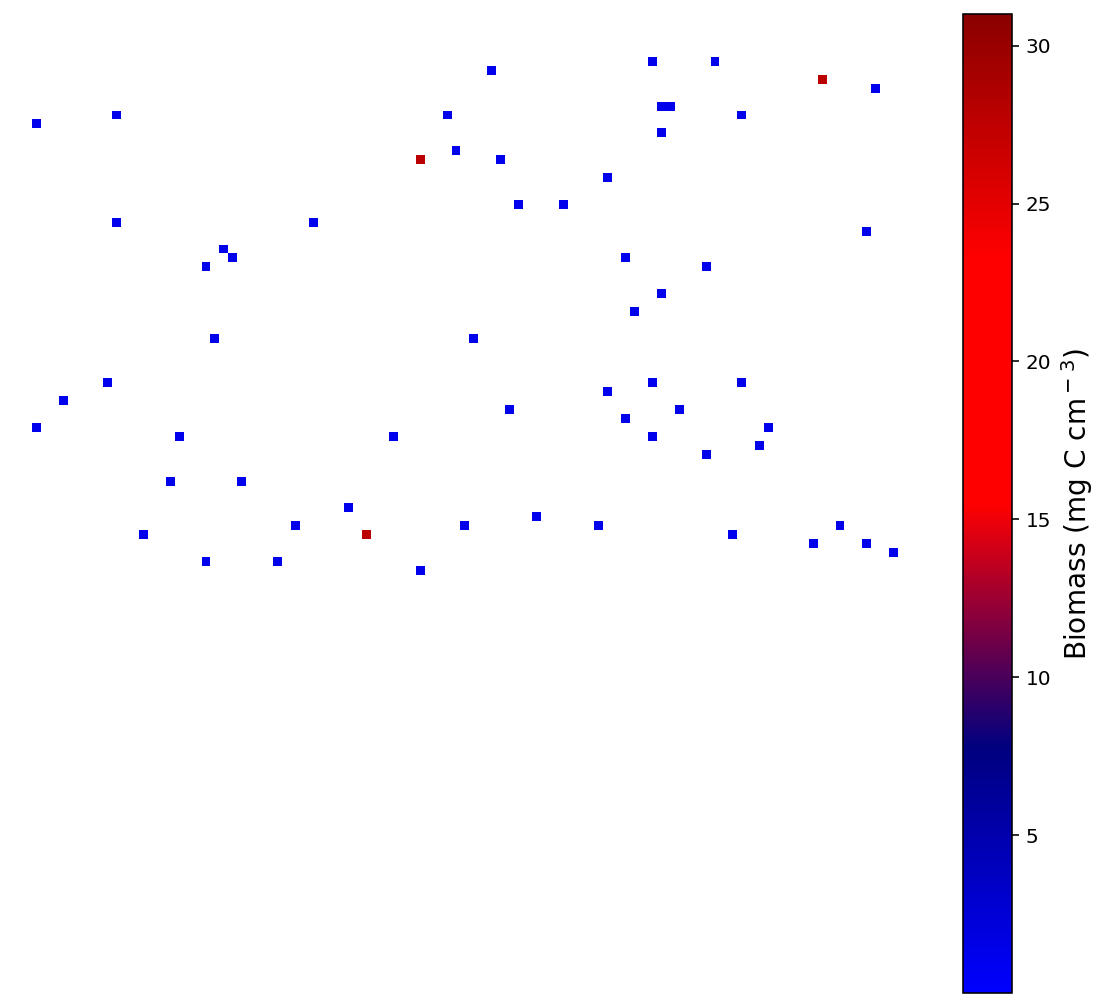

In [ ]:
# Grid: Biomass
grid_raw = pd.read_csv('microbes_spatial_D9_jobID=11232398.csv')
grid_all_t = grid_raw.rename(columns={"Unnamed: 0": "taxa"})
grid_all_t['CNP'] = grid_all_t.iloc[:,1:4].sum(axis=1)
grid = grid_all_t.loc[:,['taxa','CNP']]
grid_df = grid[grid['taxa'].isin(Tax_SubX_index[0:n_PD])]
grid_Prot = grid_df.iloc[:,1]
gridsize = 10000
grid_x = 100
grid_y = 100
grid_Prot_per_box = np.zeros((gridsize))
for i in np.arange(gridsize):
  grid_Prot_per_box[i] = grid_Prot[n_PD*i:n_PD*(i+1)].sum()
grid_Prot_per_box = grid_Prot_per_box.reshape(grid_x,grid_y)
grid_Prot_per_box = np.ma.masked_where(grid_Prot_per_box < 0.05, grid_Prot_per_box)
# Plot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
plt.figure(figsize=(10, 9))
cmap = LinearSegmentedColormap.from_list('mycmap', ['blue', 'navy','red', 'red', 'darkred'])
xx = plt.imshow(grid_Prot_per_box,cmap=cmap,vmin=0.01,vmax=31)
plt.axis('off')
cbar = plt.colorbar(xx,orientation='vertical')
cbar.set_label('Biomass (mg C cm$^-$$^3$)',size=14)

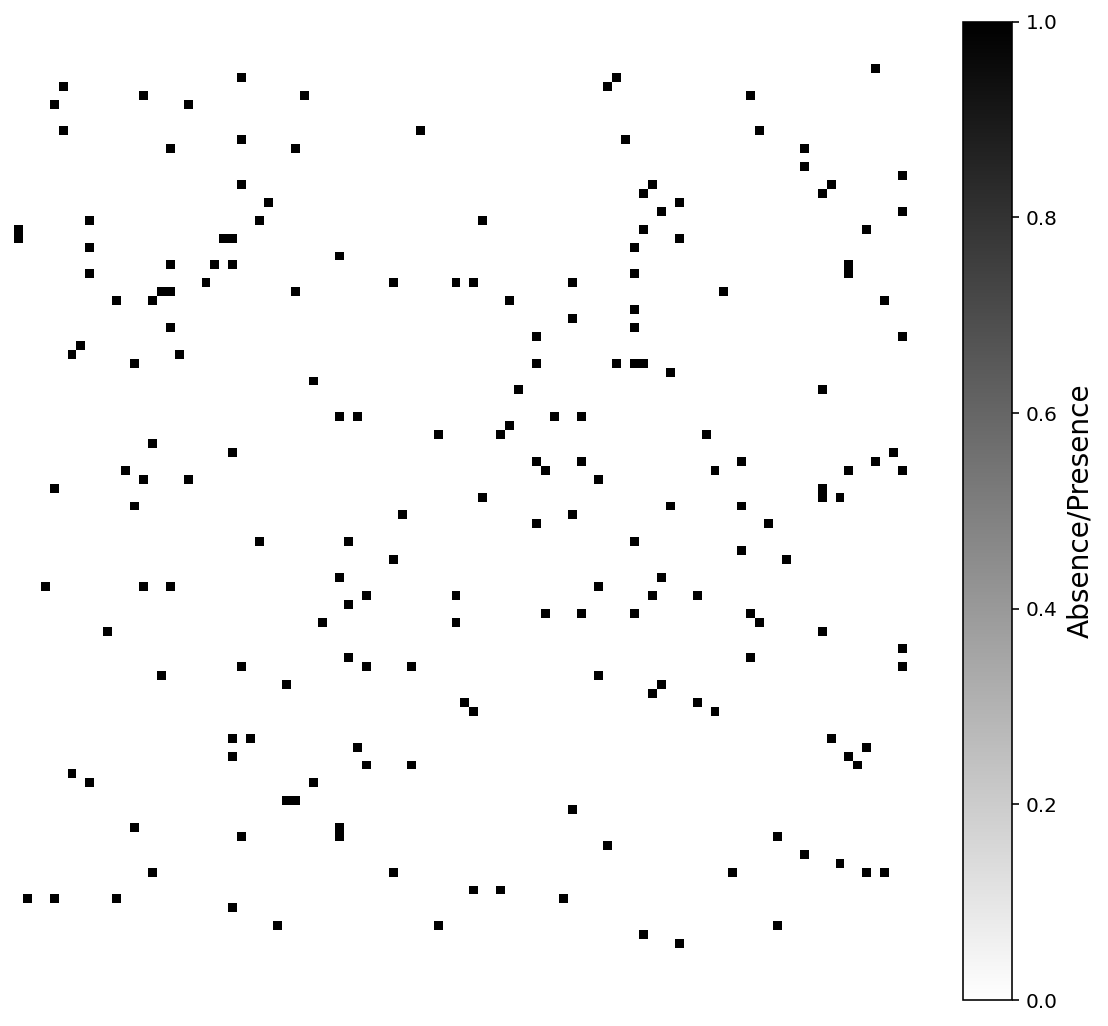

In [ ]:
# Grid: Presence/Absence
day = 0
grid_raw = pd.read_csv('microbes_spatial_D6_jobID=11232395.csv')
grid_all_t = grid_raw.rename(columns={"Unnamed: 0": "taxa"})
grid = grid_all_t[['taxa',str(day)]]
grid_df = grid[grid['taxa'].isin(Tax_SubX_index[0:n_PD])]
grid_Prot = grid_df.iloc[:,1]
gridsize = 10000
grid_x = 100
grid_y = 100
grid_Prot_per_box = np.zeros((gridsize))
for i in np.arange(gridsize):
  grid_Prot_per_box[i] = grid_Prot[n_PD*i:n_PD*(i+1)].sum()
grid_Prot_per_box = grid_Prot_per_box.reshape(grid_x,grid_y)
grid_Prot_per_box[grid_Prot_per_box > 0] = 1
# Plot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
plt.figure(figsize=(10, 9))
xx = plt.imshow(grid_Prot_per_box,cmap='binary',vmin=0,vmax=1)
plt.axis('off')
cbar = plt.colorbar(xx,orientation='vertical')
cbar.set_label('Absence/Presence',size=14)

In [ ]:
Tax_SubX_index

Index(['Tax29', 'Tax35', 'Tax59', 'Tax93', 'Tax129', 'Tax135', 'Tax159',
       'Tax193'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


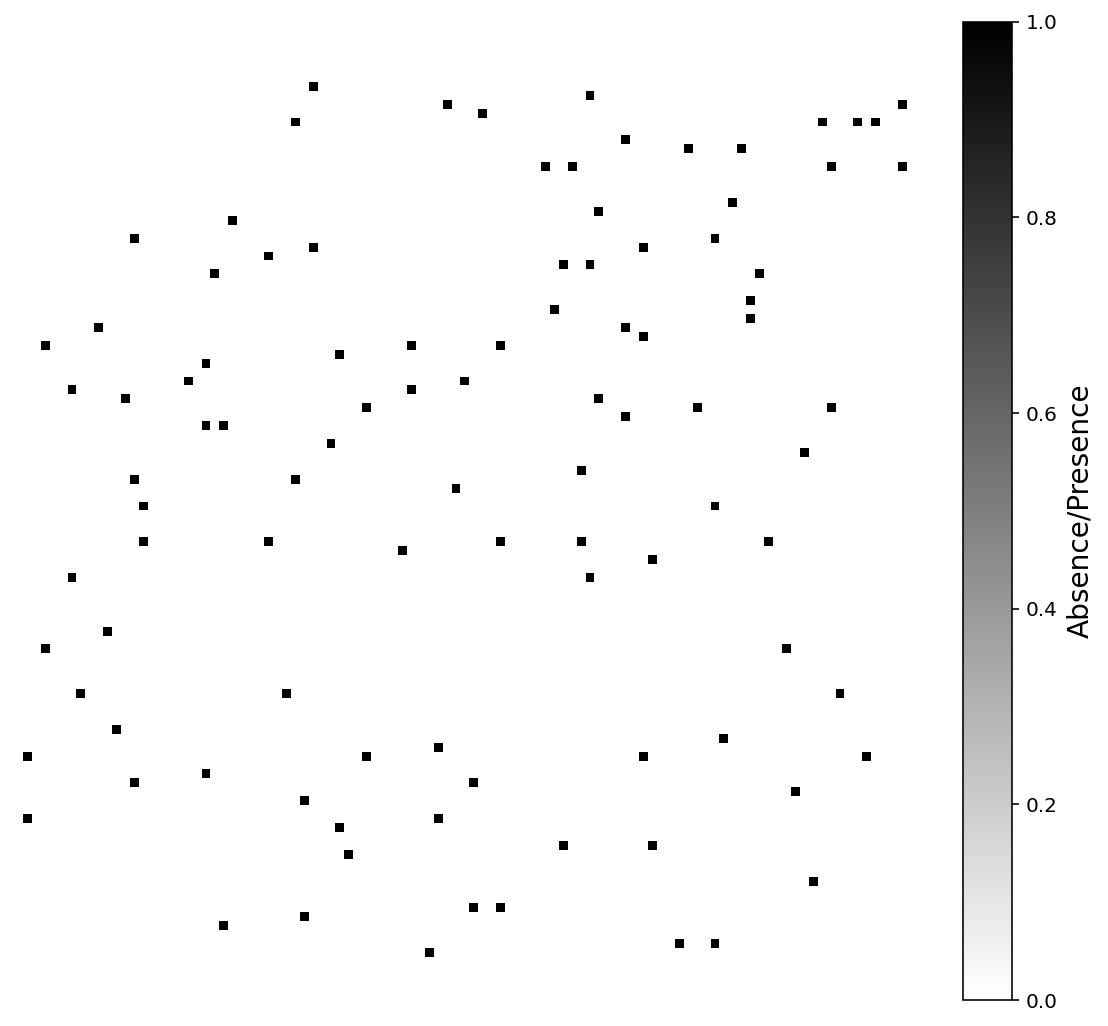

In [ ]:
day = 0
grid_raw = pd.read_csv('microbes_spatial_D6_jobID=11232395.csv')
grid_all_t = grid_raw.rename(columns={"Unnamed: 0": "taxa"})
grid = grid_all_t[['taxa',str(day)]]
grid_df = grid[grid['taxa'] == 'Tax93']
grid_Prot = grid_df.iloc[:,1]
grid_Prot[grid_Prot > 0] = 1
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
gridsize = 10000
grid_x = 100
grid_y = 100
timelist = list(grid_Prot)
for k in np.arange(n_taxa): 
    Subindex = k # Subindex=k if I'm targeting Taxon k+1
    Biomass = np.zeros((gridsize))    # j'initialise une grille remplie de biomasse de taxon = 0
    for j in np.arange(gridsize):   # pour la je case
        Biomass[j] = timelist[j]
    Biomass = Biomass.reshape(grid_x,grid_y)
plt.figure(figsize=(10, 9))
xx = plt.imshow(Biomass,cmap='binary',vmin=0,vmax=1)
plt.axis('off')
cbar = plt.colorbar(xx,orientation='vertical')
cbar.set_label('Absence/Presence',size=14)

In [ ]:
day = 0
# Get grid at t0
grid_raw = pd.read_csv('microbes_spatial_D6_jobID=11232395.csv')
grid_all_t = grid_raw.set_index('Unnamed: 0')
print(grid_all_t.columns)
grid = grid_all_t.loc[:,str(day+1)]
grid_Prot = grid[Tax_SubX_index[0:n_PD]]

# Plot 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list('mycmap', ['blue', 'green', 'pink', 'red'])

# Draw distribution of Tax12+Tax73
# Somme de biomasse dans la case 0, c'est la somme de biomasse de microbes 0 a n_taxa
gridsize = 10000
grid_x = 100
grid_y = 100
n_taxa = n_PD
timelist = list(grid_Prot)

for k in np.arange(n_taxa): 
    Subindex = k # Subindex=k if I'm targeting Taxon k+1
    Biomass = np.zeros((gridsize))    # j'initialise une grille remplie de biomasse de taxon = 0
    for j in np.arange(gridsize):   # pour la je case
        Biomass[j] = sum(timelist[n_taxa*j:n_taxa*(j+1)]) 
    Biomass = Biomass.reshape(grid_x,grid_y)

Biomass = np.ma.masked_where(Biomass < 0.01, Biomass)

##Plot
#Create the grid
plt.figure(figsize=(10, 9))
#plt.figure(figsize=(10,10))
#plt.grid(linestyle='')
#Inject the data from the array
xx = plt.imshow(Biomass,cmap=cmap, vmin=0.05, vmax=31)
#Remove space axis labels 
plt.axis('off')
#Add color bar
cbar = plt.colorbar(xx,orientation='vertical')
#Legend of color bar
cbar.set_label('Biomass (mg C cm$^-$$^3$)',size=14)

EmptyDataError: ignored

# ***** Multiple linear regression model

In [ ]:
import numpy as np
import statsmodels.api as sm

y = [-0.06,-0.34,-0.2,0.56,0.13,-0.44,-0.01,0.05,-0.25,0.65,0.23,0.68,0.45,-0.25,-0.23,-0.07,-0.05]

x = [
     [58,21,103,239,35,56,126,189,175,322,172,358,612,56,119,357,250]
     ]

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

print(reg_m(y, x).summary())

In [ ]:
print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     11.72
Date:                Tue, 08 Mar 2022   Prob (F-statistic):            0.00378
Time:                        20:01:15   Log-Likelihood:               -0.89228
No. Observations:                  17   AIC:                             5.785
Df Residuals:                      15   BIC:                             7.451
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0015      0.000      3.423      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


In [ ]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit([[58,2],[21,1],[103,0],[239,1],[35,1],[56,3],[126,1],[189,2],[175,2],
         [322,0],[172,1],[358,0],[612,1],[56,1],[119,3],[357,1],[250,2]], 
        [-0.06,-0.34,-0.2,0.56,0.13,-0.44,-0.01,0.05,-0.25,0.65,0.23,0.68,0.45,-0.25,-0.23,-0.07,-0.05])

reg.coef_
# gives [coef of initial biomass, coeff of fungi]

array([ 0.00120456, -0.16018317])

# ***** Simple linear regression model: https://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy

intercept = 0.3398260869565217
slope = [-0.22395652]


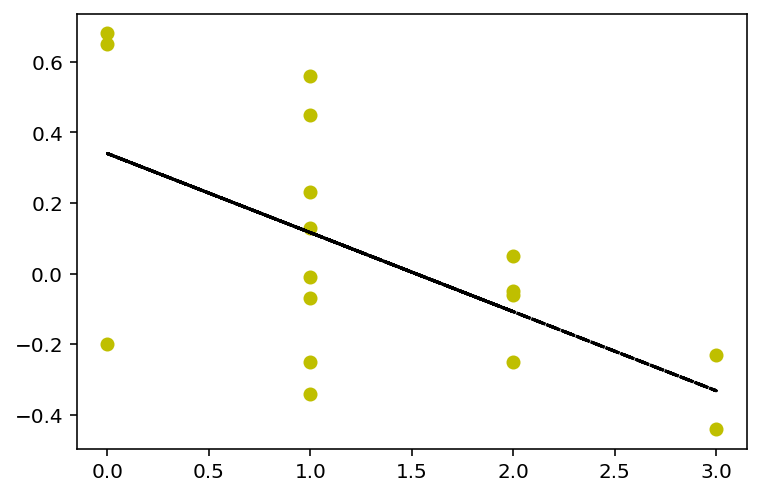

In [ ]:
# Get intercept and slope of the linear regression - FUNGI NUMBER
# SLOPE = -0.22
from sklearn.linear_model import LinearRegression
import numpy as np

x = np.array([2,1,0,1,1,3,1,2,2,0,1,0,1,1,3,1,2]).reshape(-1, 1)
y = np.array([-0.06,-0.34,-0.2,0.56,0.13,-0.44,-0.01,0.05,-0.25,0.65,0.23,0.68,0.45,-0.25,-0.23,-0.07,-0.05])

lm = LinearRegression()
lm.fit(x, y)

print('intercept =', lm.intercept_)
print('slope =',lm.coef_)

# PLOT
x = np.array([2,1,0,1,1,3,1,2,2,0,1,0,1,1,3,1,2])
y = np.array([-0.06,-0.34,-0.2,0.56,0.13,-0.44,-0.01,0.05,-0.25,0.65,0.23,0.68,0.45,-0.25,-0.23,-0.07,-0.05])

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')

intercept = -0.23771145861848
slope = [0.00150588]


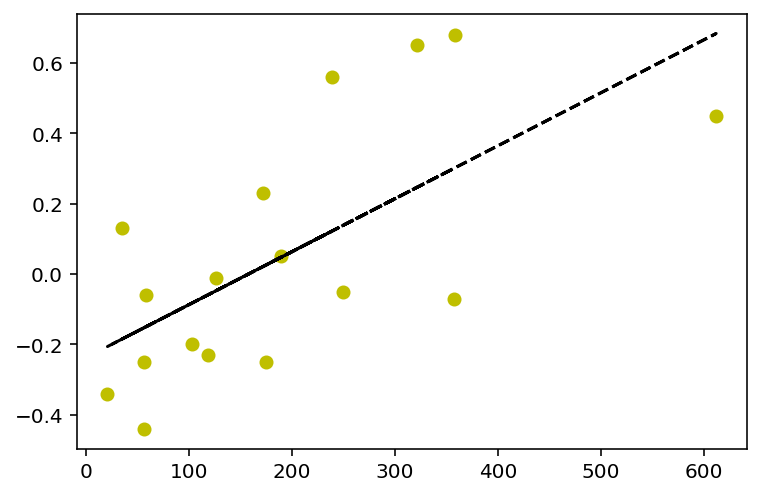

In [ ]:
# Get intercept and slope of the linear regression - INITIAL BIOMASS
# SLOPE = 0.0015
from sklearn.linear_model import LinearRegression
import numpy as np

x = np.array([58,21,103,239,35,56,126,189,175,322,172,358,612,56,119,357,250]).reshape(-1, 1)
y = np.array([-0.06,-0.34,-0.2,0.56,0.13,-0.44,-0.01,0.05,-0.25,0.65,0.23,0.68,0.45,-0.25,-0.23,-0.07,-0.05])

lm = LinearRegression()
lm.fit(x, y)

print('intercept =', lm.intercept_)
print('slope =',lm.coef_)

#plt.plot(x,y,'yo')

x = np.array([58,21,103,239,35,56,126,189,175,322,172,358,612,56,119,357,250])
y = np.array([-0.06,-0.34,-0.2,0.56,0.13,-0.44,-0.01,0.05,-0.25,0.65,0.23,0.68,0.45,-0.25,-0.23,-0.07,-0.05])

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')

# ***** Grids of other seeds

In [ ]:
#load in data
with open("10657611.pickle", "rb") as f:
    dump = pickle5.load(f)

Output_variables = vars(dump).keys()
Output_variables

dict_keys(['Runtime', 'Initialization', 'SubstratesSeries', 'DecayRatesSeries', 'MicrobesSeries', 'TotalBiomass_PerYear', 'decay_results', 'decay_results_firstcolumns', 'decay_results_persubstrate', 'Table_correspondance', 'SubX_list', 'DecayRates_Grid_Time', 'DecayRates_Grid_Time_Substrate', 'ntaxa_decomp_tf', 'decay_results_persubstrate_final', 'decay_results_Sub'])

Text(0, 0.5, 'Biomass per taxon')

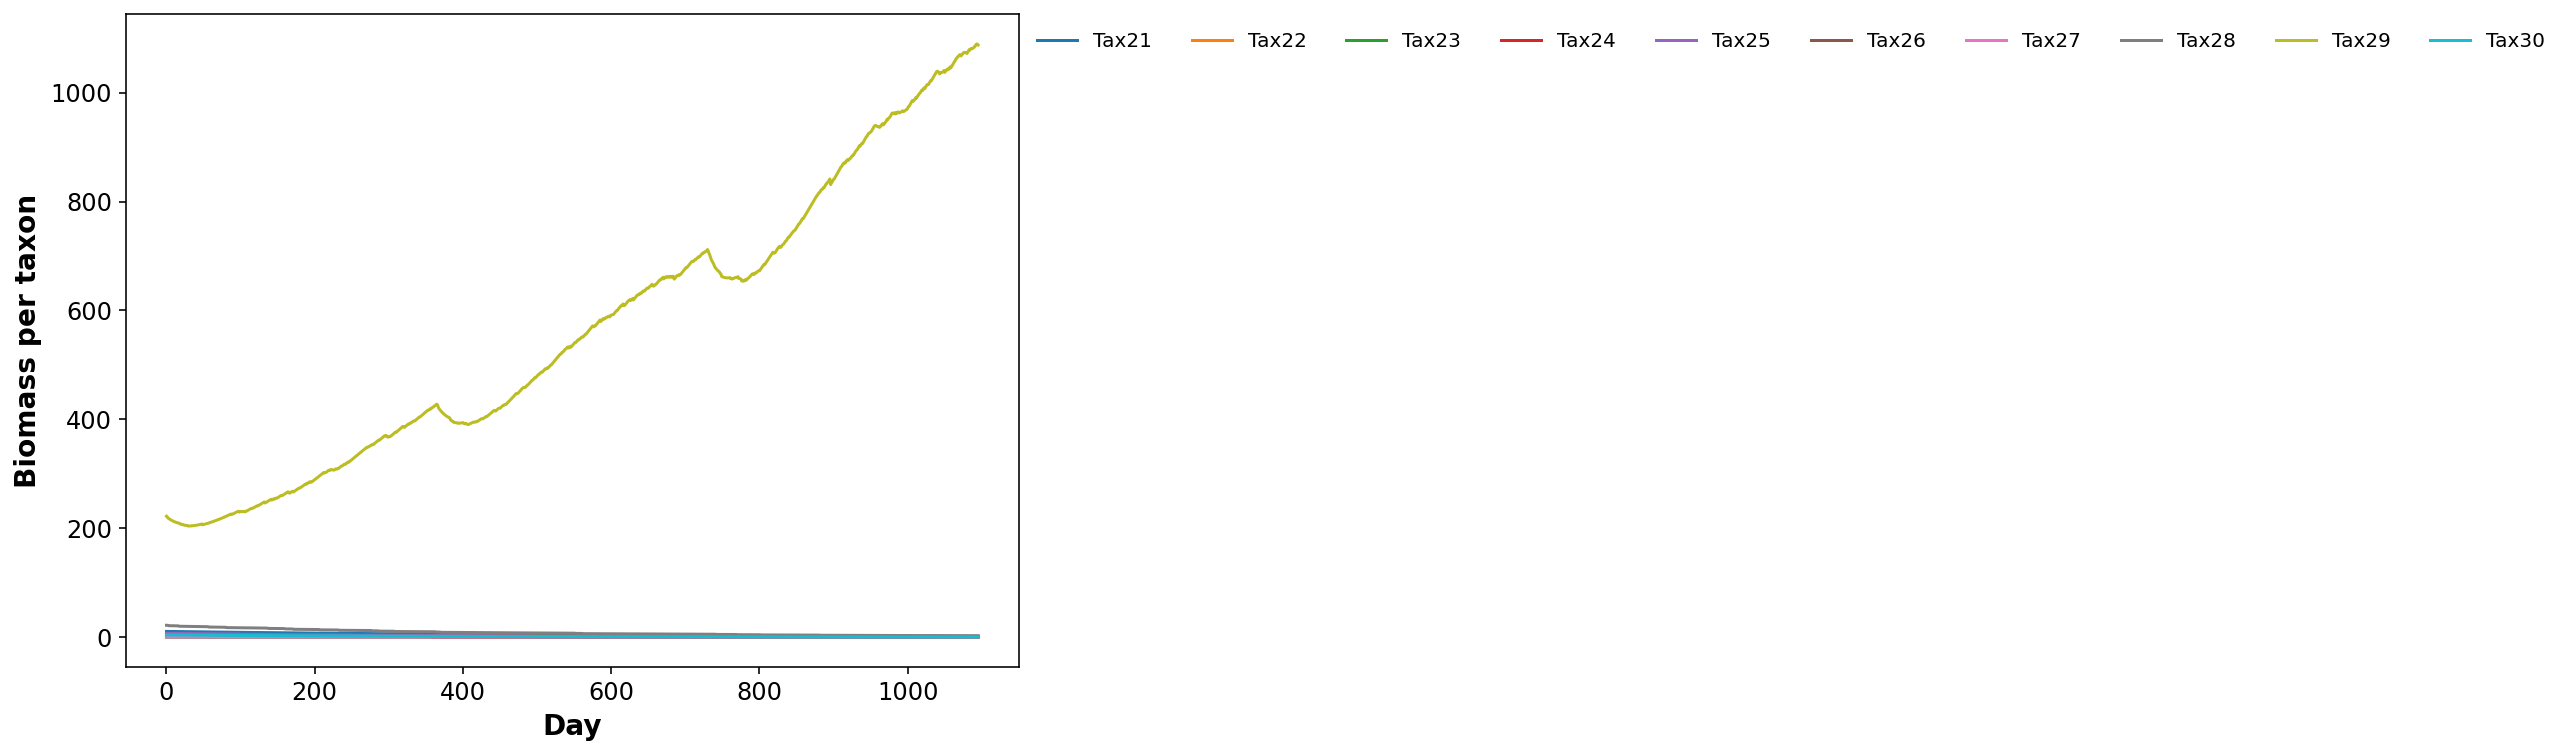

In [ ]:
# Who grows a lot?
MicrobesSeries = dump.MicrobesSeries

fig = MicrobesSeries.iloc[20:30,:].T.plot(fontsize=12,legend=False,figsize=(8,6))
fig.legend(bbox_to_anchor=(1, 1),ncol=10,frameon = False)
fig.set_xlabel('Day',size=14, weight = 'bold')
fig.set_ylabel('Biomass per taxon',size=14, weight = 'bold')
#fig.set_ylim(0,40000)

In [ ]:
# ABUNDANCE OF SPECIALIST TAXA
Initialization = dump.Initialization
n_taxa = Initialization['n_taxa']
n_substrats = Initialization['n_substrates']
n_monomers = n_substrats + 2
# Table of correspondance between substrates and monomers names and indexes
Sub_name_initial = pd.Series(Initialization['Vmax0'].T.index)
Sub_name_add = pd.Series(['0']*2)
Sub_name_almost = pd.concat([Sub_name_add, Sub_name_initial])
Sub_name = Sub_name_almost.reset_index(drop=True)
Sub_index_initial = pd.Series(Initialization['ReqEnz'].loc['set1'].iloc[0:n_substrats,:].index)
Sub_index_add = pd.Series(['0']*2)
Sub_index_almost = pd.concat([Sub_index_add, Sub_index_initial])
Sub_index = Sub_index_almost.reset_index(drop=True)
Mon_index = pd.Series(Initialization['TaxMon_final'].T.index)
Mon_name = pd.Series(Initialization['UptakeGenesCost'].T.index)
Table_correspondance = pd.DataFrame({'Sub_index': Sub_index, 'Sub_name': Sub_name, 'Mon_index': Mon_index, 'Mon_name': Mon_name})
Table_correspondance.index = Table_correspondance['Sub_name'].values
del Table_correspondance['Sub_name']
# WHICH TAXON IS SPECIALIST OF WHICH SUBSTRATE
SubX_list = Sub_name[2:].tolist()
SubX = 'Protein3'
Enz_SubX = Initialization['ReqEnz'].loc['set1'].iloc[0:n_substrats,:].loc[Table_correspondance['Sub_index'][SubX]]
Enz_SubX_index = Enz_SubX[Enz_SubX != 0].index          # Enzymes qui peuvent decomposer SubX
Tax_SubX = Initialization['EnzGenes'].iloc[0:n_taxa,:][Enz_SubX_index]     # Taxons qui peuvent decomposer SubX
Tax_SubX_index = Tax_SubX[Tax_SubX.sum(axis=1) != 0].index
Tax_SubX_index

Index(['Tax29', 'Tax35', 'Tax59', 'Tax93', 'Tax129', 'Tax135', 'Tax159',
       'Tax193'],
      dtype='object')

In [ ]:
EnzTax_PD = Initialization['EnzGenes'].iloc[0:n_taxa,:].loc['Tax93',:]
EnzTax_PD.loc[EnzTax_PD != 0]

Enz4    1.0
Enz5    1.0
Name: Tax93, dtype: float32

In [ ]:
EnzSub_PD = Initialization['ReqEnz'].loc['set1'].iloc[0:n_substrats,:].loc[:,'Enz5']
EnzSub_PD.loc[EnzSub_PD != 0]

Series([], Name: Enz5, dtype: float32)

In [ ]:
Table_correspondance

Sub_index Mon_index Mon_name
0                     0      Mon1      NH4
0                     0      Mon2      PO4
DeadMic            Sub1      Mon3  DeadMic
DeadEnz            Sub2      Mon4  DeadEnz
Cellulose          Sub3      Mon5     Mon3
Hemicellulose      Sub4      Mon6     Mon4
Starch             Sub5      Mon7     Mon5
Chitin             Sub6      Mon8     Mon6
Lignin             Sub7      Mon9     Mon7
Protein1           Sub8     Mon10     Mon8
Protein2           Sub9     Mon11     Mon9
Protein3          Sub10     Mon12    Mon10
OrgP1             Sub11     Mon13    Mon11
OrgP2             Sub12     Mon14    Mon12

In [ ]:
# Is Tax k a bacteria or a fungi
# Initialization['fb'][k-1]
Initialization['fb'][54]

1

In [ ]:
Tax_SubX_index[0:5]

Index(['Tax3', 'Tax16', 'Tax37', 'Tax55', 'Tax95'], dtype='object')

In [ ]:
# Get grid at t0
grid_raw = pd.read_csv('residents_grid_D36.csv')
grid_CNP = grid_raw.set_index('Unnamed: 0')
grid = grid_CNP.sum(axis=1)
grid_Prot = grid[Tax_SubX_index[0:5]]
grid_Prot.sum()

72.51912093572088

In [ ]:
grid_Prot['Tax95'].sum()

0.0

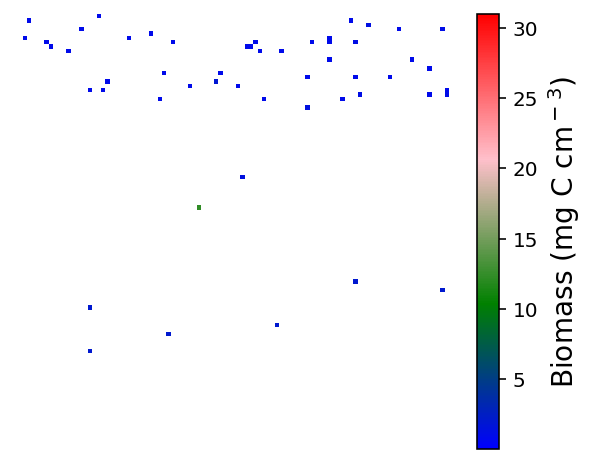

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list('mycmap', ['blue', 'green', 'pink', 'red'])

# Draw distribution of Tax12+Tax73
# Somme de biomasse dans la case 0, c'est la somme de biomasse de microbes 0 a n_taxa
gridsize = 10000
grid_x = 100
grid_y = 100
n_taxa = 5
timelist = list(grid_Prot)

for k in np.arange(n_taxa): 
    Subindex = k # Subindex=k if I'm targeting Taxon k+1
    Biomass = np.zeros((gridsize))    # j'initialise une grille remplie de biomasse de taxon = 0
    for j in np.arange(gridsize):   # pour la je case
        Biomass[j] = sum(timelist[n_taxa*j:n_taxa*(j+1)]) 
    Biomass = Biomass.reshape(grid_x,grid_y)

Biomass = np.ma.masked_where(Biomass < 0.05, Biomass)

##Plot
#Create the grid
plt.figure(figsize=(5, 4))
#plt.figure(figsize=(10,10))
#plt.grid(linestyle='')
#Inject the data from the array
xx = plt.imshow(Biomass,cmap=cmap, vmin=0.05, vmax=31)
#Remove space axis labels 
plt.axis('off')
#Add color bar
cbar = plt.colorbar(xx,orientation='vertical')
#Legend of color bar
cbar.set_label('Biomass (mg C cm$^-$$^3$)',size=14)

In [ ]:
grid_Prot_pos = grid_Prot[grid_Prot != 0]
min(grid_Prot[grid_Prot != 0])

0.1782449078127299

# ***** Recuperer le residents_grid et le pickle de jobID=10657614

In [ ]:
# 10657614 = seed 9
#load in data
with open("10657607.pickle", "rb") as f:
    dump = pickle5.load(f)

Output_variables = vars(dump).keys()
Output_variables

dict_keys(['Runtime', 'Initialization', 'SubstratesSeries', 'DecayRatesSeries', 'MicrobesSeries', 'TotalBiomass_PerYear', 'decay_results', 'decay_results_firstcolumns', 'decay_results_persubstrate', 'Table_correspondance', 'SubX_list', 'DecayRates_Grid_Time', 'DecayRates_Grid_Time_Substrate', 'ntaxa_decomp_tf', 'decay_results_persubstrate_final', 'decay_results_Sub'])

In [ ]:
# ABUNDANCE OF SPECIALIST TAXA
Initialization = dump.Initialization
n_taxa = Initialization['n_taxa']
n_substrats = Initialization['n_substrates']
n_monomers = n_substrats + 2
# Table of correspondance between substrates and monomers names and indexes
Sub_name_initial = pd.Series(Initialization['Vmax0'].T.index)
Sub_name_add = pd.Series(['0']*2)
Sub_name_almost = pd.concat([Sub_name_add, Sub_name_initial])
Sub_name = Sub_name_almost.reset_index(drop=True)
Sub_index_initial = pd.Series(Initialization['ReqEnz'].loc['set1'].iloc[0:n_substrats,:].index)
Sub_index_add = pd.Series(['0']*2)
Sub_index_almost = pd.concat([Sub_index_add, Sub_index_initial])
Sub_index = Sub_index_almost.reset_index(drop=True)
Mon_index = pd.Series(Initialization['TaxMon_final'].T.index)
Mon_name = pd.Series(Initialization['UptakeGenesCost'].T.index)
Table_correspondance = pd.DataFrame({'Sub_index': Sub_index, 'Sub_name': Sub_name, 'Mon_index': Mon_index, 'Mon_name': Mon_name})
Table_correspondance.index = Table_correspondance['Sub_name'].values
del Table_correspondance['Sub_name']
# WHICH TAXON IS SPECIALIST OF WHICH SUBSTRATE
SubX_list = Sub_name[2:].tolist()
SubX = 'Protein3'
Enz_SubX = Initialization['ReqEnz'].loc['set1'].iloc[0:n_substrats,:].loc[Table_correspondance['Sub_index'][SubX]]
Enz_SubX_index = Enz_SubX[Enz_SubX != 0].index          # Enzymes qui peuvent decomposer SubX
Tax_SubX = Initialization['EnzGenes'].iloc[0:n_taxa,:][Enz_SubX_index]     # Taxons qui peuvent decomposer SubX
Tax_SubX_index = Tax_SubX[Tax_SubX.sum(axis=1) != 0].index
Tax_SubX_index

Index(['Tax8', 'Tax24', 'Tax38', 'Tax80', 'Tax88', 'Tax108', 'Tax124',
       'Tax138', 'Tax180', 'Tax188'],
      dtype='object')

In [ ]:
Tax_SubX_index[0:5]

Index(['Tax8', 'Tax24', 'Tax38', 'Tax80', 'Tax88'], dtype='object')

In [ ]:
# Is Tax 12 a bacteria or a fungi
Initialization['fb'][7]

0

In [ ]:
# Get grid at t0
grid_raw = pd.read_csv('residents_grid_D32.csv')
grid_CNP = grid_raw.set_index('Unnamed: 0')
grid = grid_CNP.sum(axis=1)
grid_Prot = grid[Tax_SubX_index[0:5]]
grid_Prot.sum()

67.41019531185397

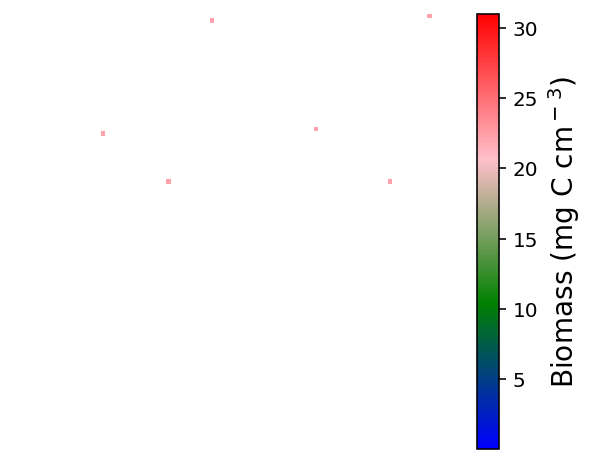

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list('mycmap', ['blue', 'green', 'pink', 'red'])

# Draw distribution of Tax12+Tax73
# Somme de biomasse dans la case 0, c'est la somme de biomasse de microbes 0 a n_taxa
gridsize = 10000
grid_x = 100
grid_y = 100
n_taxa = 2
timelist = list(grid_Prot)

for k in np.arange(n_taxa): 
    Subindex = k # Subindex=k if I'm targeting Taxon k+1
    Biomass = np.zeros((gridsize))    # j'initialise une grille remplie de biomasse de taxon = 0
    for j in np.arange(gridsize):
        Biomass[j] = sum(timelist[n_taxa*j:n_taxa*(j+1)]) 
    Biomass = Biomass.reshape(grid_x,grid_y)

Biomass = np.ma.masked_where(Biomass < 0.05, Biomass)

##Plot
#Create the grid
plt.figure(figsize=(5, 4))#, facecolor='w', edgecolor='k')
#plt.grid(linestyle='')
#Inject the data from the array
xx = plt.imshow(Biomass,cmap=cmap, vmin=0.05, vmax=31)
#Remove space axis labels 
plt.axis('off')
#Add color bar
cbar = plt.colorbar(xx,orientation='vertical')
#Legend of color bar
cbar.set_label('Biomass (mg C cm$^-$$^3$)',size=14)

# ***** Find a job_ID where protein degrader !=0 a t0 and still low a t3y of phase 2 (DA0)

In [ ]:
# t0
table_t01 = pd.read_csv('specialists_t0_combined_220221.csv')
table_t02 = pd.read_csv('specialists_t0_combined_22022501.csv')
table_t0 = pd.concat([table_t01,table_t02])
table_t0_N = table_t0[(table_t0["invaders"] == 'NoInv') & (table_t0["residents"] == 'ResD') & (table_t0["substrate"] == 'Protein3')]
# t3y
table_LC = pd.read_csv('specialists_year3_combined_220221.csv')
table_LC_N = table_LC[(table_LC["invaders"] == 'NoInv') & (table_LC["final_litter"] == 'A') & (table_LC["substrate"] == 'Protein3')]
# Make dataframe
df1 = table_t0_N.loc[:,{'jobID','biomass_decomp_t0'}]
df2 = table_LC_N.loc[:,{'jobID','biomass_specialist_year'}]
df3 = pd.merge(df1, df2, on="jobID")
df3 = pd.merge(df1, df2, on="jobID")
df3['Growth_rate'] = np.log10(df3['biomass_specialist_year'] / df3['biomass_decomp_t0'])
df3
# Par exemple, 126 devient 124 en 3 ans (taux de croissance nul) --> jobID = 10657614

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


biomass_decomp_t0     jobID  biomass_specialist_year  Growth_rate
0           0.000000  10657606                 0.000000          NaN
1           3.408749  10657608                 0.000000         -inf
2          57.916278  10657607                50.810780    -0.056845
3          35.206206  10657612                47.766553     0.132505
4         238.793745  10657611               861.378472     0.557171
5          21.408729  10657609                 9.909095    -0.334557
6         103.293634  10657610                65.697017    -0.196528
7         126.364310  10657614               124.542495    -0.006307
8         188.980998  10657605               212.059028     0.050039
9          55.957645  10657613                20.490487    -0.436307

In [ ]:
# t0
table_t01 = pd.read_csv('specialists_t0_combined_220221.csv')
table_t02 = pd.read_csv('specialists_t0_combined_22022501.csv')
table_t0 = pd.concat([table_t01,table_t02])
table_t0_N = table_t0[(table_t0["invaders"] == 'NoInv') & (table_t0["residents"] == 'ResD') & (table_t0["substrate"] == 'Protein3')]
# t3y
table_LC = pd.read_csv('specialists_year3_combined_220221.csv')
table_LC_N = table_LC[(table_LC["invaders"] == 'NoInv') & (table_LC["final_litter"] == 'A') & (table_LC["substrate"] == 'Protein3')]
# Make dataframe
df1 = table_t0_N.loc[:,{'seed_index','biomass_decomp_t0'}]
df2 = table_LC_N.loc[:,{'seed_index','biomass_specialist_year'}]
df3 = pd.merge(df1, df2, on="seed_index")
df3 = pd.merge(df1, df2, on="seed_index")
df3['Growth_rate'] = np.log10(df3['biomass_specialist_year'] / df3['biomass_decomp_t0'])
df3
# Par exemple, 126 devient 124 en 3 ans (taux de croissance nul) --> jobID = 10657614

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


seed_index  biomass_decomp_t0  biomass_specialist_year  Growth_rate
0           1           0.000000                 0.000000          NaN
1           3           3.408749                 0.000000         -inf
2           2          57.916278                50.810780    -0.056845
3           7          35.206206                47.766553     0.132505
4           6         238.793745               861.378472     0.557171
5           4          21.408729                 9.909095    -0.334557
6           5         103.293634                65.697017    -0.196528
7           9         126.364310               124.542495    -0.006307
8          10         188.980998               212.059028     0.050039
9           8          55.957645                20.490487    -0.436307

# ***** Get the same table for when there is invaders from A

In [ ]:
# t0
table_t01 = pd.read_csv('specialists_t0_combined_220221.csv')
table_t02 = pd.read_csv('specialists_t0_combined_22022501.csv')
table_t0 = pd.concat([table_t01,table_t02])
table_t0_N = table_t0[(table_t0["invaders"] == 'InvA') & (table_t0["residents"] == 'ResD') & (table_t0["substrate"] == 'Protein3')]
# t3y
table_LC = pd.read_csv('specialists_year3_combined_220221.csv')
table_LC_N = table_LC[(table_LC["invaders"] == 'InvA') & (table_LC["final_litter"] == 'A') & (table_LC["substrate"] == 'Protein3')]
# Make dataframe
df1 = table_t0_N.loc[:,{'seed_index','biomass_decomp_t0'}]
df2 = table_LC_N.loc[:,{'seed_index','biomass_specialist_year'}]
df3 = pd.merge(df1, df2, on="seed_index")
df3 = pd.merge(df1, df2, on="seed_index")
df3['Growth_rate'] = np.log10(df3['biomass_specialist_year'] / df3['biomass_decomp_t0'])
df3
# Par exemple, 126 devient 124 en 3 ans (taux de croissance nul) --> jobID = 10657614

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


seed_index  biomass_decomp_t0  biomass_specialist_year  Growth_rate
0           8         118.500730                70.313275    -0.226684
1           9         356.589541               303.889800    -0.069452
2           2         175.081690                99.559309    -0.245159
3           3         322.041901              1424.943890     0.645885
4           1           4.852467                 0.000000         -inf
5           5         357.727223              1725.427113     0.683345
6           4         171.939413               289.787619     0.226704
7           6         611.670772              1722.522854     0.449647
8           7          56.434631                31.629559    -0.251453
9          10         249.746824               221.844907    -0.051451

# ***** Can I see the distribution of protein degraders on the grid?

In [ ]:
# ***** Now I want the biomass of protein degraders only


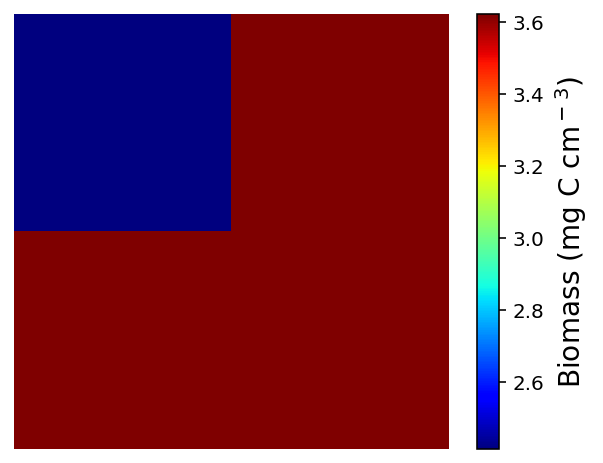

In [ ]:
# Create biomass grid from csv
microbes = pd.read_csv('microbes_spatial_22021701.csv')
microbes.rename({'Unnamed: 0': ''}, axis=1, inplace=True)
microbes_df = microbes.set_index('')
microbes_t0 = microbes_df.iloc[:,0]
microbes_t0
# Somme de biomasse dans la case 0, c'est la somme de biomasse de microbes 0 a n_taxa
gridsize = 4
grid_x = 2
grid_y = 2
n_taxa = 6
timelist = list(microbes_t0)

for k in np.arange(n_taxa): 
    Subindex = k # Subindex=k if I'm targeting Taxon k+1
    Biomass = np.zeros((gridsize))    # j'initialise une grille remplie de biomasse de taxon = 0
    for j in np.arange(gridsize):   # pour la je case
        Biomass[j] = sum(timelist[n_taxa*j:n_taxa*(j+1)]) 
    Biomass = Biomass.reshape(grid_x,grid_y)

##Plot
#Create the grid
plt.figure(figsize=(5, 4))#, facecolor='w', edgecolor='k')
#plt.grid(linestyle='')
#Inject the data from the array
xx = plt.imshow(Biomass,cmap='jet')
#Remove space axis labels 
plt.axis('off')
#Add color bar
cbar = plt.colorbar(xx,orientation='vertical')
#Legend of color bar
cbar.set_label('Biomass (mg C cm$^-$$^3$)',size=14)

# ***** Are protein degraders extinct at the end of Po? No

In [ ]:
table_t01 = pd.read_csv('specialists_t0_combined_220221.csv')
table_t02 = pd.read_csv('specialists_t0_combined_22022501.csv')
table_t0 = pd.concat([table_t01,table_t02])
table_t0[(table_t0["invaders"] == 'NoInv') & (table_t0["residents"] == 'ResD') & (table_t0["substrate"] == 'Protein3')]

Unnamed: 0  Unnamed: 0.1     jobID treatment_name final_litter  \
1189        1189             0  10657606     phase2AD01            A   
1264        1264             0  10657608     phase2AD03            A   
1302        1302             0  10657607     phase2AD02            A   
1349        1349             0  10657612     phase2AD07            A   
1446        1446             0  10657611     phase2AD06            A   
1531        1531             0  10657609     phase2AD04            A   
1557        1557             0  10657610     phase2AD05            A   
1915        1915             0  10657614     phase2AD09            A   
1963        1963             0  10657605    phase2AD010            A   
2002        2002             0  10657613     phase2AD08            A   

     residents invaders  enz_max  seed_index  seed_number substrate  \
1189      ResD    NoInv        3           1   2102121235  Protein3   
1264      ResD    NoInv        3           3   2102121237  Protein3   
1302      ResD    NoInv        3           2   2102121236  Protein3   
1349      ResD    NoInv        3           7   2102121241  Protein3   
1446      ResD    NoInv        3           6   2102121240  Protein3   
1531      ResD    NoInv        3           4   2102121238  Protein3   
1557      ResD    NoInv        3           5   2102121239  Protein3   
1915      ResD    NoInv        3           9   2102121243  Protein3   
1963      ResD    NoInv        3          10   2102121244  Protein3   
2002      ResD    NoInv        3           8   2102121242  Protein3   

      biomass_decomp_t0  biomass_decomp_res_t0  biomass_decomp_inv_t0  
1189           0.000000               0.000000                    0.0  
1264           3.408749               3.408749                    0.0  
1302          57.916278              57.916278                    0.0  
1349          35.206206              35.206206                    0.0  
1446         238.793745             238.793745                    0.0  
1531          21.408729              21.408729                    0.0  
1557         103.293634             103.293634                    0.0  
1915         126.364310             126.364310                    0.0  
1963         188.980998             188.980998                    0.0  
2002          55.957645              55.957645                    0.0

# ***** Figure 3d: Hemicellulose degrader abundance

In [ ]:
table_LC_N.loc[(table_LC_N['final_litter'] == 'B')].head()

Unnamed: 0  ...  biomass_specialist_inv_last_day
339          339  ...                              0.0
1140        1140  ...                              0.0
1169        1169  ...                              0.0
1684        1684  ...                              0.0
1706        1706  ...                              0.0

[5 rows x 18 columns]

In [ ]:
# t0 (= final day of P1)
table_t01 = pd.read_csv('specialists_t0_combined_220221.csv')
table_t02 = pd.read_csv('specialists_t0_combined_22022501.csv')
table_t0 = pd.concat([table_t01,table_t02])
table_t0_N = table_t0[(table_t0["invaders"] == 'NoInv') & (table_t0["substrate"] == 'Hemicellulose')]
# Litter change for DtoPo and PotoD
table_LC_1 = pd.read_csv('specialists_year3_combined_220221.csv')
table_LC_2 = pd.read_csv('specialists_year3_combined_22022502.csv')
table_LC = pd.concat([table_LC_1,table_LC_2])
table_LC_N = table_LC[(table_LC["invaders"] == 'NoInv') & (table_LC["substrate"] == 'Hemicellulose')]
# Build dataframe
col1 = table_t0_N.loc[(table_t0_N['residents'] == 'ResA') & (table_t0_N['final_litter'] == 'D')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "D-P1"})
col2 = table_t0_N.loc[(table_t0_N['residents'] == 'ResB')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "Sc-P1"})
col3 = table_t0_N.loc[(table_t0_N['residents'] == 'ResC')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "G-P1"})
col4 = table_t0_N.loc[(table_t0_N['residents'] == 'ResD')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "Po-P1"})
col5 = table_t0_N.loc[(table_t0_N['residents'] == 'ResE')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "Sa-P1"})
col6 = table_LC_N.loc[(table_LC_N['final_litter'] == 'B') & (table_LC_N['residents'] == 'ResA')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "D to Sc"})
col7 = table_LC_N.loc[(table_LC_N['final_litter'] == 'A') & (table_LC_N['residents'] == 'ResB')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Sc to D"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
Table_for_plot

D-P1       Sc-P1        G-P1  ...       Sa-P1      D to Sc      Sc to D
0   53.317084    0.000000  461.359165  ...    0.000000     0.000000    29.659887
1   36.126942    0.797868  628.521230  ...    0.000000     0.000000   115.559914
2  637.152151  191.078886  388.323839  ...  732.372989    35.559747  4004.188323
3  727.876976   95.640018  574.124003  ...  113.383045   325.896162     0.000000
4   26.488983  423.151518  162.499956  ...  333.177034     7.585796     0.000000
5    0.000000  594.752250    0.000000  ...   64.426269    93.869468   458.571704
6    0.000000  498.718706    0.000000  ...  350.622572    65.278529    46.478394
7   54.434582  289.081594  495.451659  ...  357.811099    76.833718     8.667132
8   19.468619  587.772538  383.443172  ...  339.302361   543.689066   229.137646
9  399.411636  545.446865   78.243939  ...  762.421390  6213.304725    57.174248

[10 rows x 7 columns]

[(0.0, 800.0)]

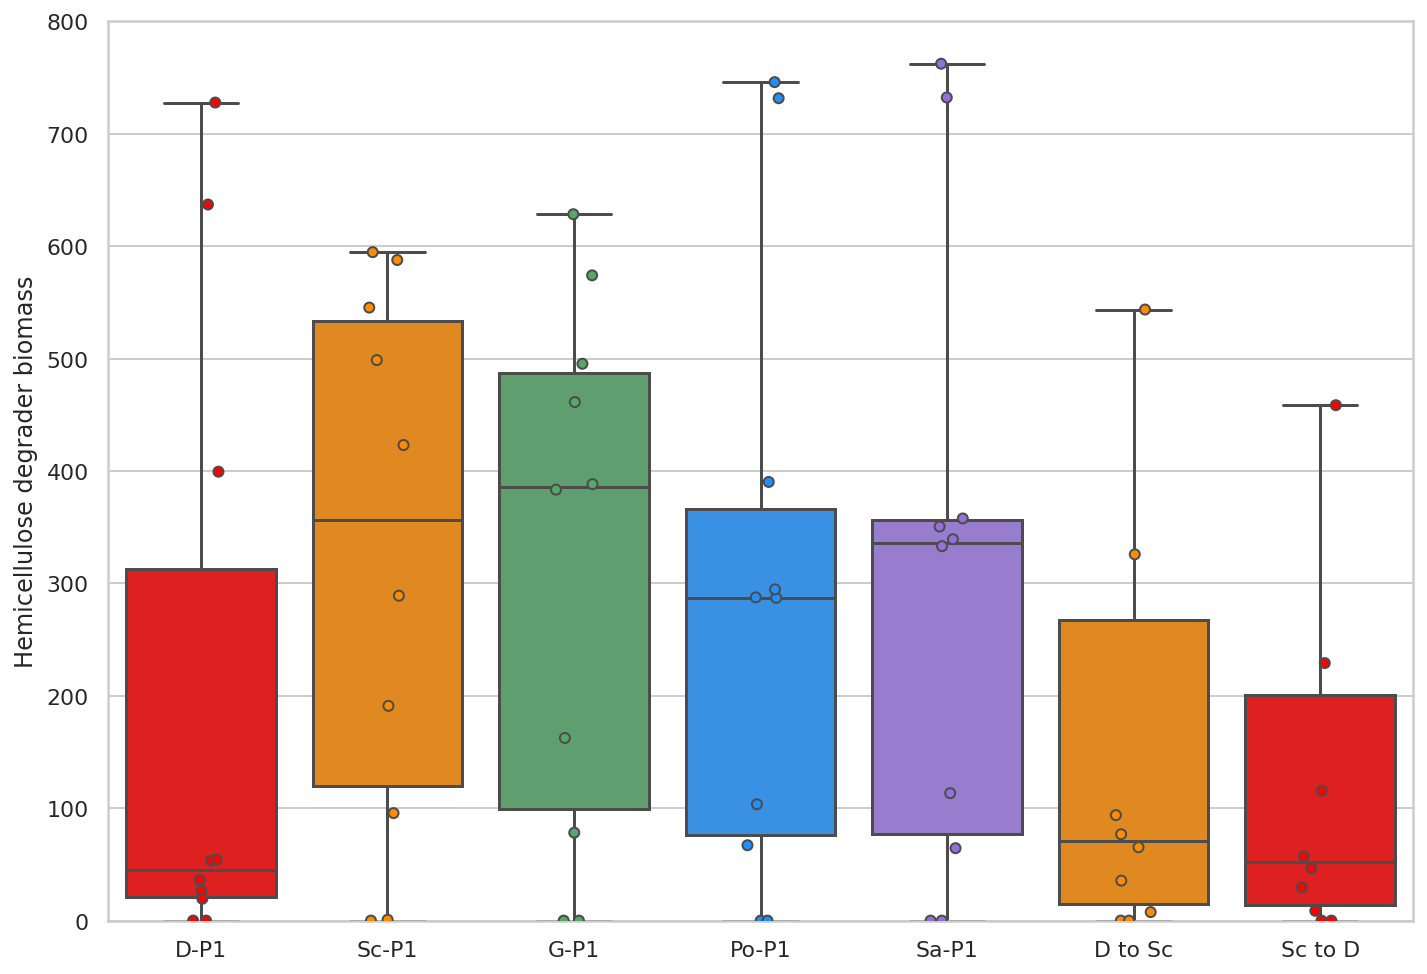

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple",
          "D to Sc":"darkorange", "Sc to D":"red"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Hemicellulose degrader biomass')
ax.set_xlabel('')
#ax.set(ylim=(0, 1.5e-3))
ax.set(ylim=(0, 800))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "biomass"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[0],anov_df_T[1]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('biomass ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                 sum_sq    df         F    PR(>F)
treatment  8.091997e+04   1.0  1.180068  0.291676
Residual   1.234301e+06  18.0       NaN       NaN


# ***** Figure 3b: Can I Protein degrader abundance final day of phase 1 (through t0 of phase 2 NoInv)?

In [ ]:
# t0 (= final day of P1)
table_t01 = pd.read_csv('specialists_t0_combined_220221.csv')
table_t02 = pd.read_csv('specialists_t0_combined_22022501.csv')
table_t0 = pd.concat([table_t01,table_t02])
table_t0_N = table_t0[(table_t0["invaders"] == 'NoInv') & (table_t0["substrate"] == 'Protein3')]
# Litter change for DtoPo and PotoD
table_LC = pd.read_csv('specialists_year3_combined_220221.csv')
table_LC_N = table_LC[(table_LC["invaders"] == 'NoInv') & (table_LC["substrate"] == 'Protein3')]
# Build dataframe
col1 = table_t0_N.loc[(table_t0_N['residents'] == 'ResA') & (table_t0_N['final_litter'] == 'D')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "D-P1"})
col2 = table_t0_N.loc[(table_t0_N['residents'] == 'ResB')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "Sc-P1"})
col3 = table_t0_N.loc[(table_t0_N['residents'] == 'ResC')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "G-P1"})
col4 = table_t0_N.loc[(table_t0_N['residents'] == 'ResD')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "Po-P1"})
col5 = table_t0_N.loc[(table_t0_N['residents'] == 'ResE')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "Sa-P1"})
col6 = table_LC_N.loc[(table_LC_N['final_litter'] == 'D') & (table_LC_N['residents'] == 'ResA')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "D to Po"})
col7 = table_LC_N.loc[(table_LC_N['final_litter'] == 'A') & (table_LC_N['residents'] == 'ResD')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Po to D"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
Table_for_plot

D-P1        Sc-P1        G-P1  ...       Sa-P1     D to Po     Po to D
0  152.972848   200.897579  237.627285  ...  163.630790    0.000000  212.059028
1  219.186220   397.537842  832.210172  ...   62.327562   64.013856   20.490487
2  416.517444   219.434419  320.183370  ...   39.993871   24.930033  124.542495
3  299.009519   302.220727   36.505409  ...  467.679066   25.469159   50.810780
4  793.369334   979.586013  288.407711  ...   42.310406  856.228299    0.000000
5   13.657811    46.500693  748.788034  ...  192.881516   35.118679    0.000000
6  664.276585   700.592073   70.188596  ...    0.000000  221.751530   65.697017
7  354.916783  1404.373604  620.788583  ...   13.783623  205.425476    9.909095
8  930.533005   324.272452  359.561128  ...   64.659911  147.156374  861.378472
9   63.685277    37.825856  198.388999  ...  204.078002   14.909074   47.766553

[10 rows x 7 columns]

Text(0.5, 0, '')

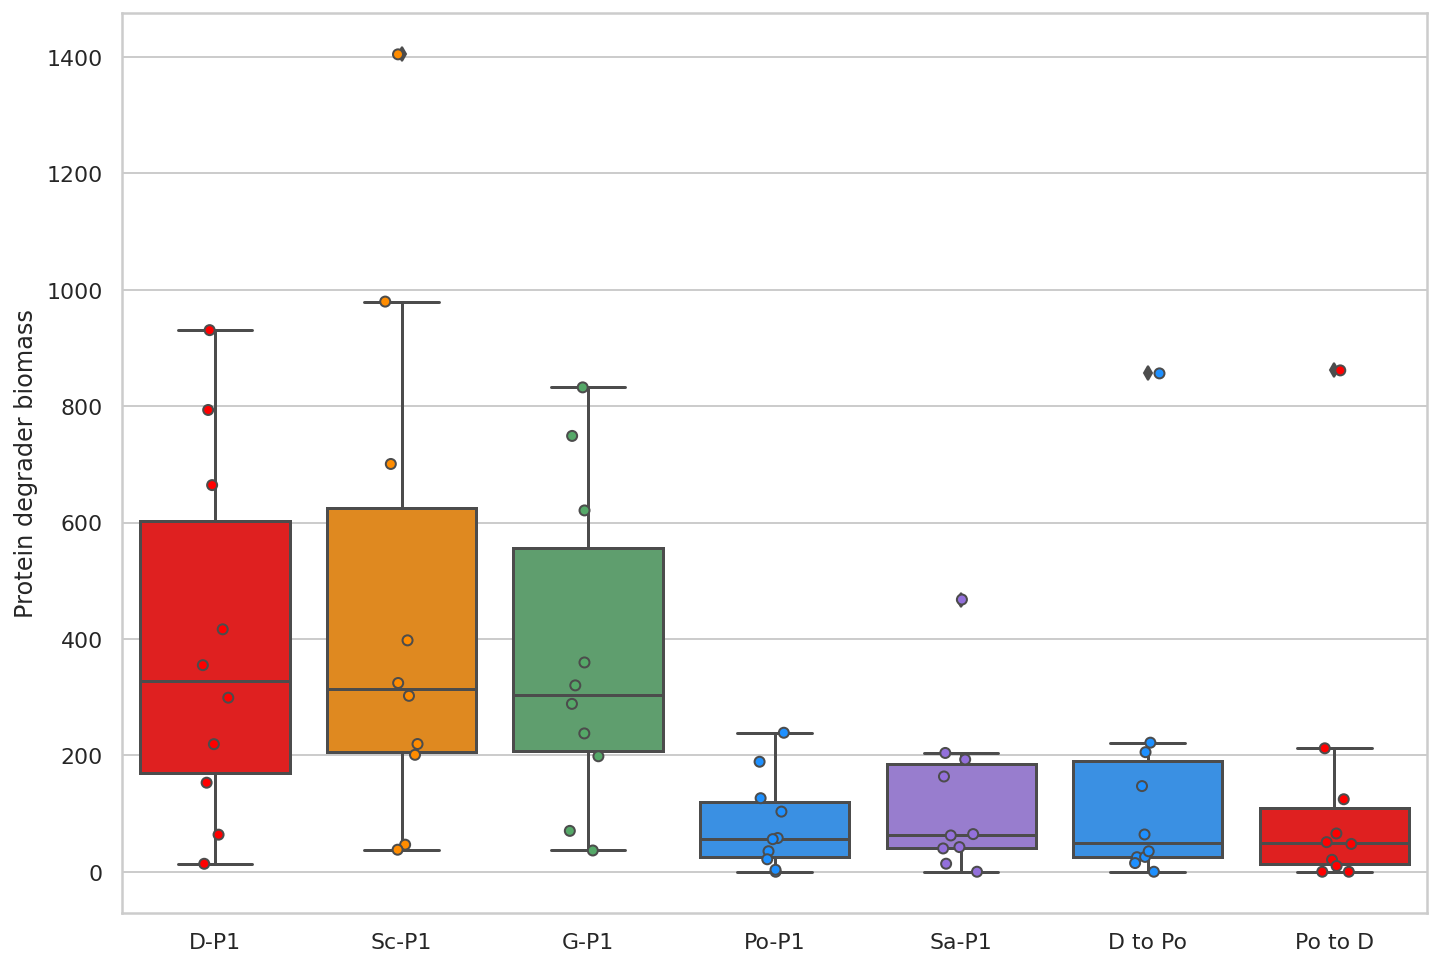

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple",
          "D to Po":"dodgerblue", "Po to D":"red"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Protein degrader biomass')
ax.set_xlabel('')
#ax.set(ylim=(0, 1.5e-3))
#ax.set(ylim=(0, 5e-3))

# ***** Figure 3c: Can I do the same for Hemicellulose (litter change: DtoSc and SctoD)

In [ ]:
# Table phase 1
phase11 = pd.read_csv('Decay_results_persubstrate_persubstrate_phase1.csv')
phase12 = pd.read_csv('Decay_results_persubstrate_persubstrate_phase1_BE.csv')
phase1 = pd.concat([phase11,phase12])
# Table phase 2
phase21 = pd.read_csv('decay_results_persubstrate_combined_220221.csv')
phase22 = pd.read_csv('decay_results_persubstrate_combined_22022502.csv')
phase2 = pd.concat([phase21,phase22])
# Pick substrate
phase1_enzmax3 = phase1.loc[(phase1["enz_max"] == 3)  & (phase1['substrate'] == 'Hemicellulose')]
phase2_DtoPo  = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResA') & (phase2["substrate"] == 'Hemicellulose')]
phase2_PotoD  = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResB') & (phase2["substrate"] == 'Hemicellulose')]
# Build dataframe
col1 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'A']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D-P1"})
col2 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'B']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sc-P1"})
col3 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'C']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "G-P1"})
col4 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'D']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po-P1"})
col5 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'E']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sa-P1"})
col6 = phase2_DtoPo.loc[phase2_DtoPo['invaders'] == 'NoInv']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D to Sc"})
col7 = phase2_PotoD.loc[phase2_PotoD['invaders'] == 'NoInv']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sc to D"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
Table_for_plot

D-P1     Sc-P1      G-P1     Po-P1     Sa-P1   D to Sc   Sc to D
0  0.000006  0.001414  0.000005  0.000431  0.000000  0.000007  0.000028
1  0.000007  0.000583  0.001019  0.000576  0.000352  0.000016  0.000004
2  0.000087  0.000000  0.000135  0.000003  0.001247  0.000496  0.000013
3  0.000003  0.000569  0.000077  0.000050  0.000364  0.000109  0.000612
4  0.000000  0.000200  0.000000  0.000067  0.000089  0.000000  0.000002
5  0.000004  0.000668  0.000459  0.001166  0.000003  0.000052  0.000000
6  0.000003  0.001381  0.001169  0.000310  0.000571  0.000162  0.000001
7  0.000007  0.000010  0.000468  0.000000  0.000083  0.000000  0.000002
8  0.000000  0.000110  0.000492  0.000082  0.000051  0.020318  0.000008
9  0.000044  0.000147  0.000127  0.000308  0.000473  0.000045  0.000000

[(0.0, 0.0015)]

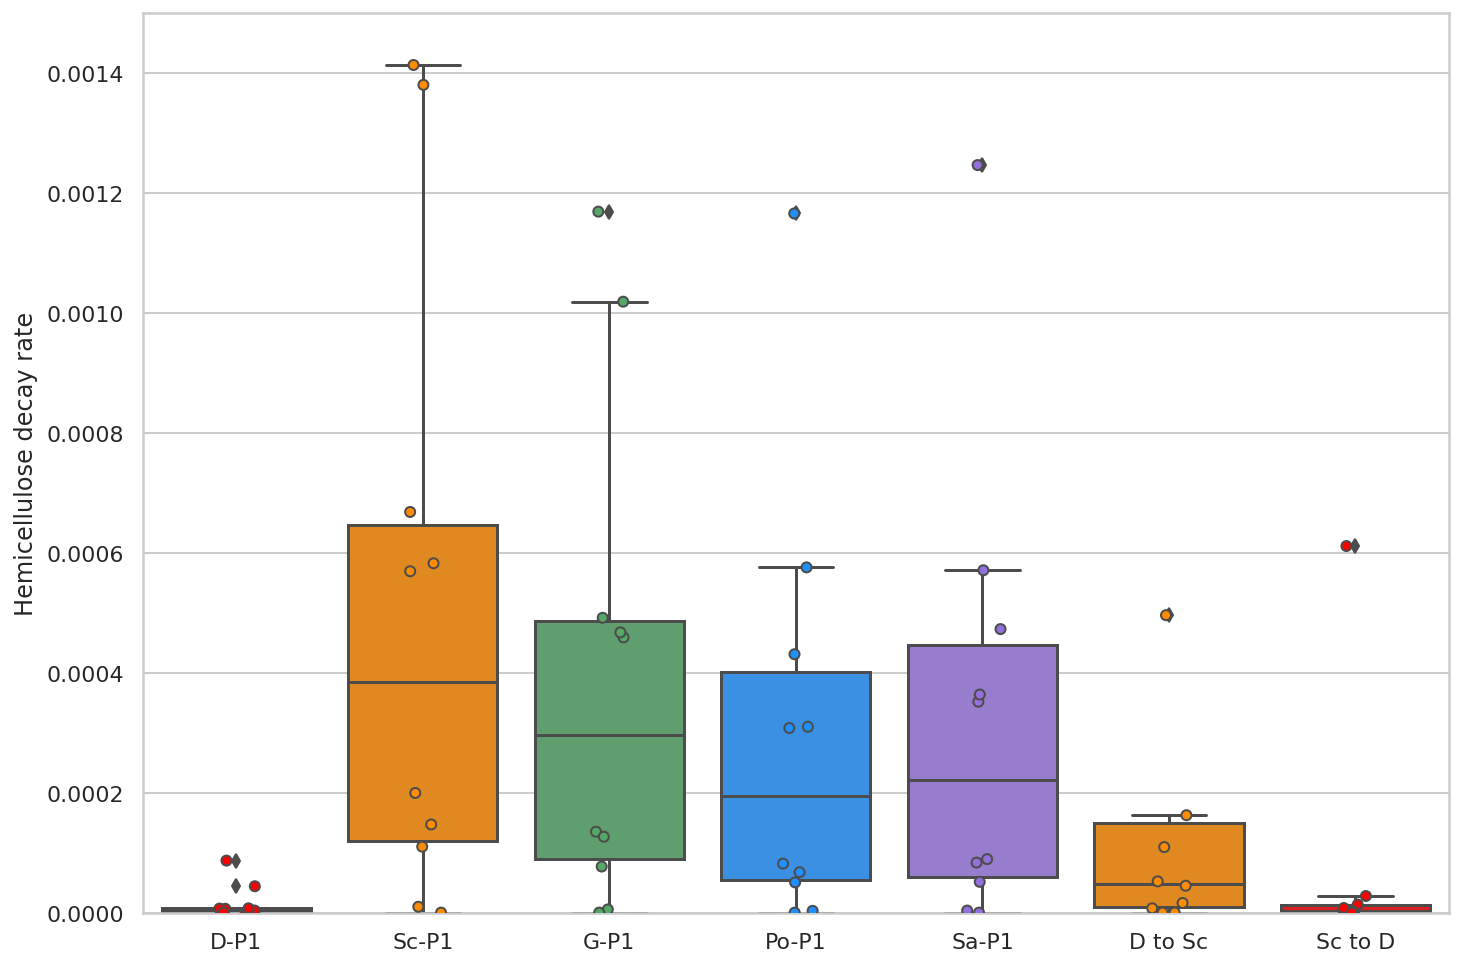

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple",
          "D to Sc":"darkorange", "Sc to D":"red"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Hemicellulose decay rate')
ax.set_xlabel('')
#ax.set(ylim=(0, 1.5e-3))
ax.set(ylim=(0, 1.5e-3))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "biomass"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[1],anov_df_T[6]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('biomass ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                 sum_sq    df         F    PR(>F)
treatment  9.736309e-07   1.0  6.174191  0.023024
Residual   2.838486e-06  18.0       NaN       NaN


In [ ]:
anov_df

biomass treatment  seed
0   0.001414     Sc-P1     1
1   0.000583     Sc-P1     2
2   0.000000     Sc-P1     3
3   0.000569     Sc-P1     4
4   0.000200     Sc-P1     5
5   0.000668     Sc-P1     6
6   0.001381     Sc-P1     7
7   0.000010     Sc-P1     8
8   0.000110     Sc-P1     9
9   0.000147     Sc-P1    10
10  0.000028   Sc to D     1
11  0.000004   Sc to D     2
12  0.000013   Sc to D     3
13  0.000612   Sc to D     4
14  0.000002   Sc to D     5
15  0.000000   Sc to D     6
16  0.000001   Sc to D     7
17  0.000002   Sc to D     8
18  0.000008   Sc to D     9
19  0.000000   Sc to D    10

# ***** Work on Figure 3c: Can I do the same with year 6 for phase 1? NO (I only have 3 litters for 6 years)

# ***** Figure 3a: What if I put Protein decay of no litter change and litter change on the same figure?

In [ ]:
# Table phase 1
phase11 = pd.read_csv('Decay_results_persubstrate_persubstrate_phase1.csv')
phase12 = pd.read_csv('Decay_results_persubstrate_persubstrate_phase1_BE.csv')
phase1 = pd.concat([phase11,phase12])
# Table phase 2
phase2 = pd.read_csv('decay_results_persubstrate_combined_220221.csv')
# Pick substrate
phase1_enzmax3 = phase1.loc[(phase1["enz_max"] == 3)  & (phase1['substrate'] == 'Protein3')]
phase2_DtoPo  = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResA') & (phase2["substrate"] == 'Protein3')]
phase2_PotoD  = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResD') & (phase2["substrate"] == 'Protein3')]
# Build dataframe
col1 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'A']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D-P1"})
col2 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'B']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sc-P1"})
col3 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'C']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "G-P1"})
col4 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'D']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po-P1"})
col5 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'E']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sa-P1"})
col6 = phase2_DtoPo.loc[phase2_DtoPo['invaders'] == 'NoInv']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D to Po"})
col7 = phase2_PotoD.loc[phase2_PotoD['invaders'] == 'NoInv']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po to D"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
Table_for_plot

D-P1     Sc-P1      G-P1         Po-P1     Sa-P1   D to Po   Po to D
0  0.000309  0.000333  0.000812  7.325179e-06  0.000016  0.000008  0.000000
1  0.000011  0.000068  0.000166  8.764838e-06  0.000002  0.000023  0.000008
2  0.000379  0.000173  0.000402  4.692811e-06  0.000099  0.000008  0.000027
3  0.000034  0.000048  0.000354  1.154772e-05  0.000004  0.000045  0.000018
4  0.000122  0.000355  0.000168  1.964005e-05  0.000011  0.000006  0.000029
5  0.000299  0.000009  0.000069  3.336990e-05  0.000016  0.000147  0.000014
6  0.000321  0.000165  0.000309  4.113640e-07  0.000020  0.000000  0.000000
7  0.000173  0.001281  0.000056  8.222282e-06  0.000052  0.000003  0.000496
8  0.000746  0.000338  0.000013  5.332762e-06  0.000027  0.000006  0.000011
9  0.000047  0.000459  0.000335  2.023697e-06  0.000013  0.000002  0.000023

Text(0.5, 0, '')

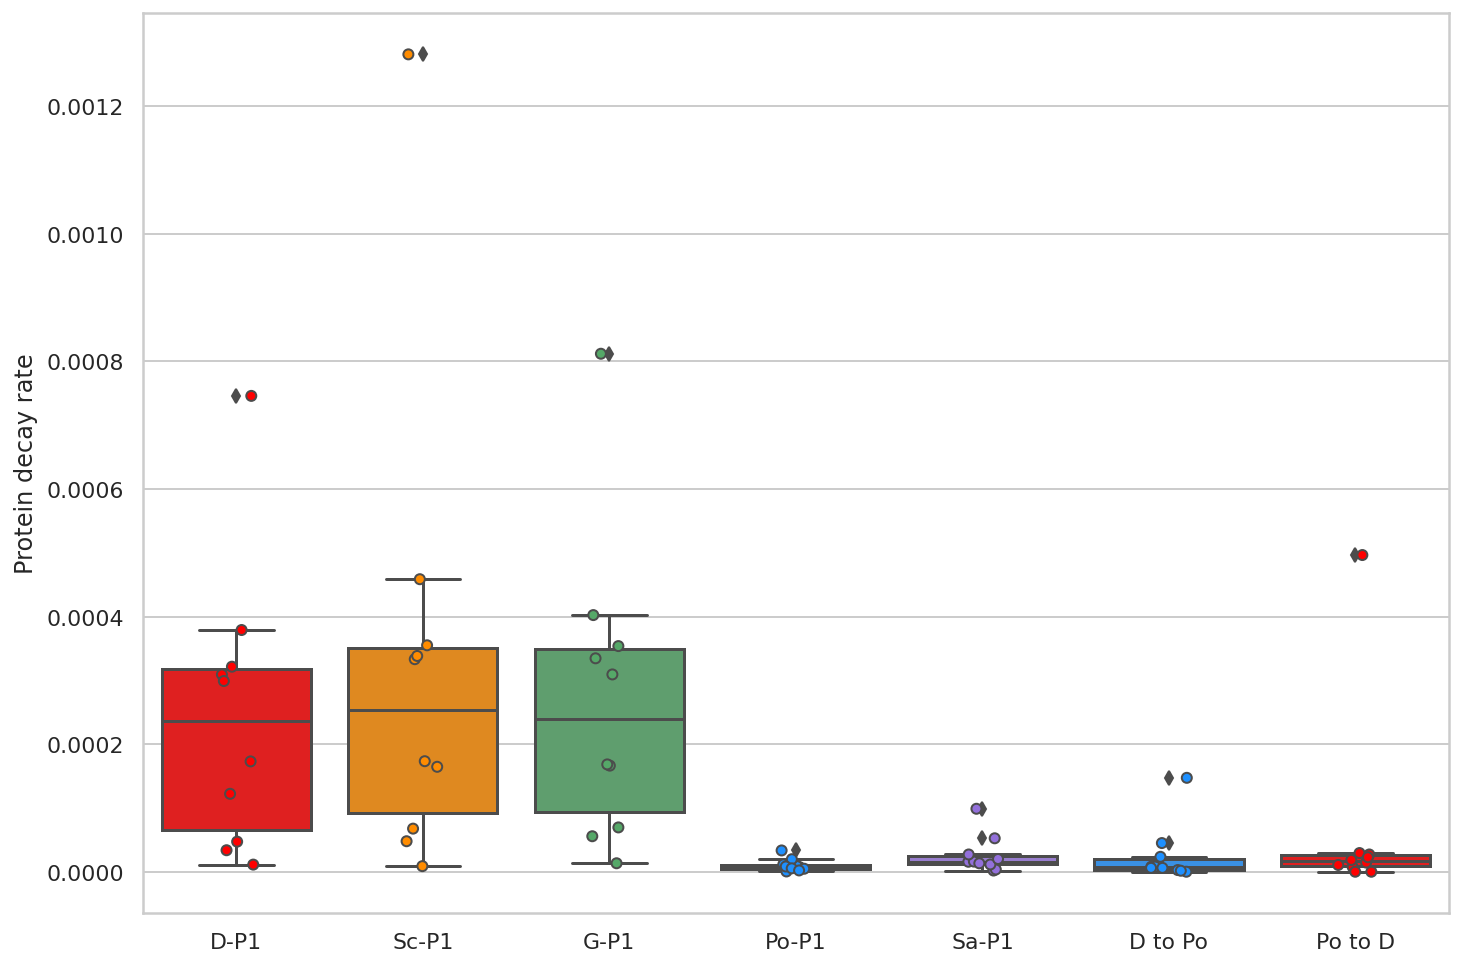

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple",
          "D to Po":"dodgerblue", "Po to D":"red"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Protein decay rate')
ax.set_xlabel('')
#ax.set(ylim=(0, 0.0014))

# ***** Work on Figure 3a: Can I get Protein decay rate after litter change (year 3 phase 2) for DtoPo and PotoD?

In [ ]:
phase2_DtoPo.head()

Unnamed: 0  Unnamed: 0.1  ... decay_year_2 decay_year_3
57           57             0  ...     0.000006     0.000005
93           93             0  ...     0.000002     0.000002
117         117             0  ...     0.000082     0.000056
141         141             0  ...     0.000023     0.000009
153         153             0  ...     0.000020     0.000008

[5 rows x 12 columns]

In [ ]:
# Using 220218 simulations
# Table phase 2
phase2 = pd.read_csv('decay_results_persubstrate_combined_220221.csv')
# Pick substrate
phase2_DtoPo  = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResA') & (phase2["substrate"] == 'Protein3')]
phase2_PotoD  = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResD') & (phase2["substrate"] == 'Protein3')]
# Build dataframe
col1 = phase2_DtoPo.loc[phase2_DtoPo['invaders'] == 'NoInv']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D to Po"})
col2 = phase2_PotoD.loc[phase2_PotoD['invaders'] == 'NoInv']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po to D"})
Table_for_plot = pd.concat([col1,col2],axis=1)
Table_for_plot

D to Po   Po to D
0  0.000008  0.000000
1  0.000023  0.000008
2  0.000008  0.000027
3  0.000045  0.000018
4  0.000006  0.000029
5  0.000147  0.000014
6  0.000000  0.000000
7  0.000003  0.000496
8  0.000006  0.000011
9  0.000002  0.000023

[(0.0, 4e-05)]

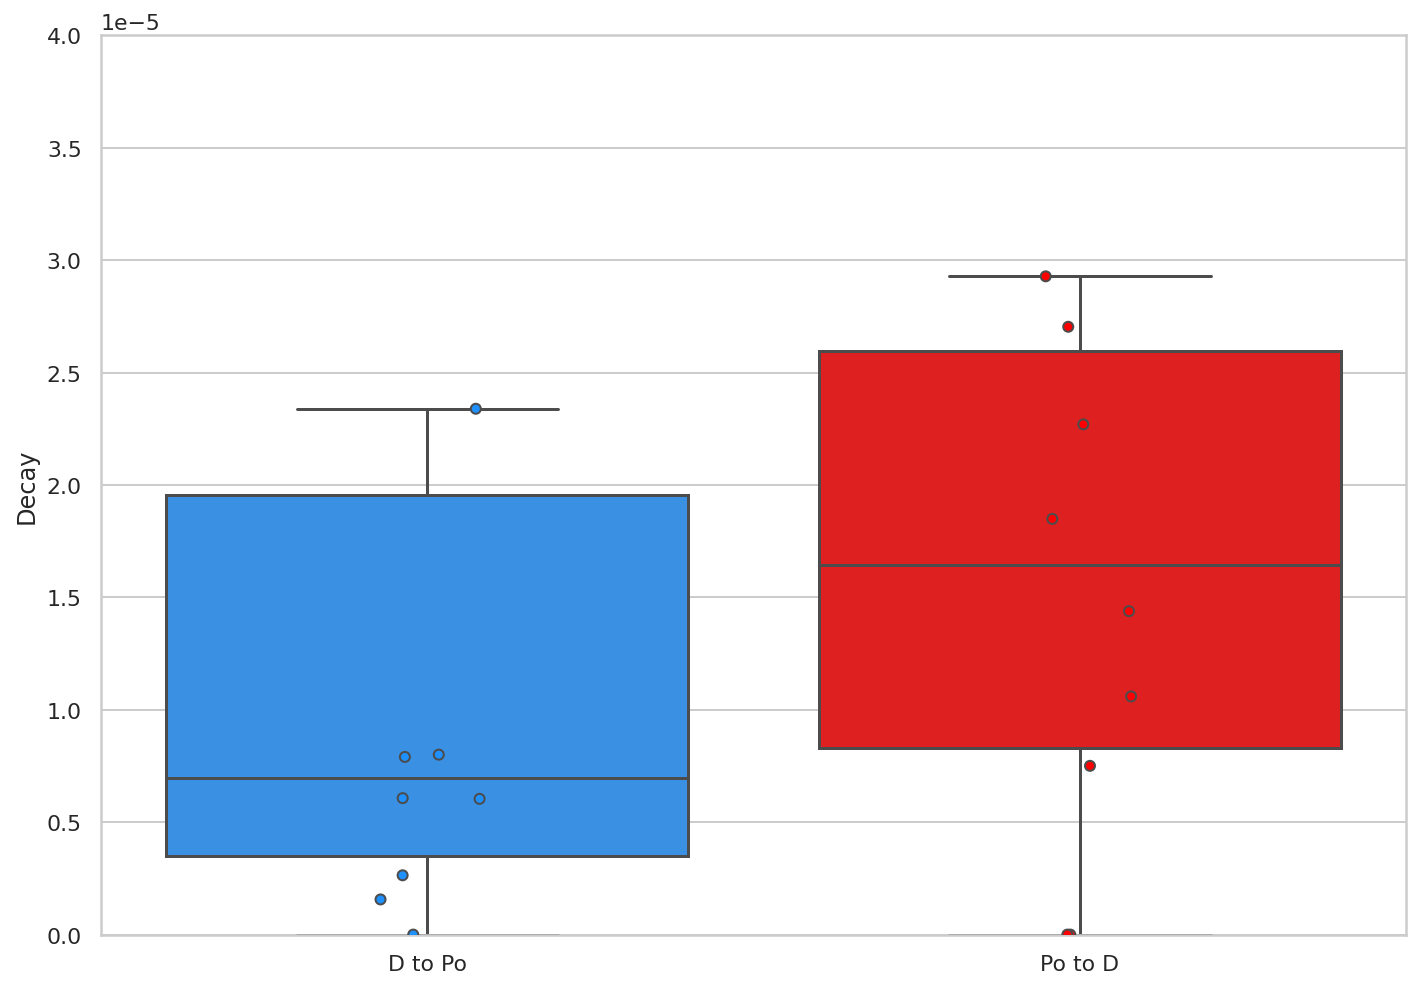

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"D to Po":"dodgerblue", "Po to D":"red"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Decay')
ax.set_xlabel('')
#ax.set(ylim=(0, 1.5e-3))
ax.set(ylim=(0, 4e-5))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "biomass"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[0],anov_df_T[1]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('biomass ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                 sum_sq    df         F    PR(>F)
treatment  7.171232e-09   1.0  0.565181  0.461898
Residual   2.283910e-07  18.0       NaN       NaN


In [ ]:
anov_df

biomass treatment  seed
0   0.000008   D to Po     1
1   0.000023   D to Po     2
2   0.000008   D to Po     3
3   0.000045   D to Po     4
4   0.000006   D to Po     5
5   0.000147   D to Po     6
6   0.000000   D to Po     7
7   0.000003   D to Po     8
8   0.000006   D to Po     9
9   0.000002   D to Po    10
10  0.000000   Po to D     1
11  0.000008   Po to D     2
12  0.000027   Po to D     3
13  0.000018   Po to D     4
14  0.000029   Po to D     5
15  0.000014   Po to D     6
16  0.000000   Po to D     7
17  0.000496   Po to D     8
18  0.000011   Po to D     9
19  0.000023   Po to D    10

# ***** Work on Figure 3b: Can I get Biomass of Protein degraders year 3 of phase 1? NO

In [ ]:
phase1.head()

Unnamed: 0  Unnamed: 0.1  ... decay_year_2 decay_year_3
0           0             0  ...     0.000115     0.000270
1           1             0  ...     0.000805     0.002059
2           2             0  ...     0.007780     0.017265
3           3             0  ...     0.000728     0.001372
4           4             0  ...     0.001553     0.001882

[5 rows x 12 columns]

In [ ]:
# Table phase 1
phase11 = pd.read_csv('Decay_results_persubstrate_persubstrate_phase1.csv')
phase12 = pd.read_csv('Decay_results_persubstrate_persubstrate_phase1_BE.csv')
phase1 = pd.concat([phase11,phase12])
# Pick substrate
phase1_enzmax3 = phase1.loc[(phase1["enz_max"] == 3)  & (phase1['substrate'] == 'Protein3')]
# Build dataframe
col1 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'A']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D-P1"})
col2 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'B']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sc-P1"})
col3 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'C']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "G-P1"})
col4 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'D']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po-P1"})
col5 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'E']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sa-P1"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5],axis=1)
Table_for_plot

D-P1     Sc-P1      G-P1         Po-P1     Sa-P1
0  0.000309  0.000333  0.000812  7.325179e-06  0.000016
1  0.000011  0.000068  0.000166  8.764838e-06  0.000002
2  0.000379  0.000173  0.000402  4.692811e-06  0.000099
3  0.000034  0.000048  0.000354  1.154772e-05  0.000004
4  0.000122  0.000355  0.000168  1.964005e-05  0.000011
5  0.000299  0.000009  0.000069  3.336990e-05  0.000016
6  0.000321  0.000165  0.000309  4.113640e-07  0.000020
7  0.000173  0.001281  0.000056  8.222282e-06  0.000052
8  0.000746  0.000338  0.000013  5.332762e-06  0.000027
9  0.000047  0.000459  0.000335  2.023697e-06  0.000013

# **** Figure S3B: Can I get the total biomass year 3 of phase 1? YES

In [ ]:
# Table phase 1
phase11 = pd.read_csv('Decay_results_persubtrate_allsubstrates_phase1.csv')
phase12 = pd.read_csv('Decay_results_allsubstrates_phase1_BE.csv')
phase1 = pd.concat([phase11,phase12])
# Pick substrate
phase1_enzmax3 = phase1.loc[(phase1["enzmax"] == 3)]
# Build dataframe
col1 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'A']["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "D-P1"})
col2 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'B']["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "Sc-P1"})
col3 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'C']["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "G-P1"})
col4 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'D']["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "Po-P1"})
col5 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'E']["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "Sa-P1"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5],axis=1)
Table_for_plot

D-P1         Sc-P1          G-P1         Po-P1         Sa-P1
0   2588.446778  11234.767192   3984.741227  12503.140766   4286.480100
1  14043.512686   2542.272284   2871.931662   2524.573212   2300.972633
2   4569.290692   2987.396865   3006.803722   2640.417643   2855.696500
3   2715.306611   2872.986034  15161.086692   2628.739232  30977.461650
4   3487.681595   3605.030513  10321.814107   4253.620636  14152.232654
5   3956.474698   3349.756028   2560.301519   4197.320694   3106.133463
6   2919.215195   4064.423890   2947.005055   2235.378221   2620.112908
7   3029.338015   2955.346873   3372.607900   2801.681516   2785.795441
8  12896.921075   3108.725348   2835.484603   3004.845149   2750.749069
9   2322.342071  20886.932075   3847.886256  31108.745615   4289.227074

[(2000.0, 5000.0)]

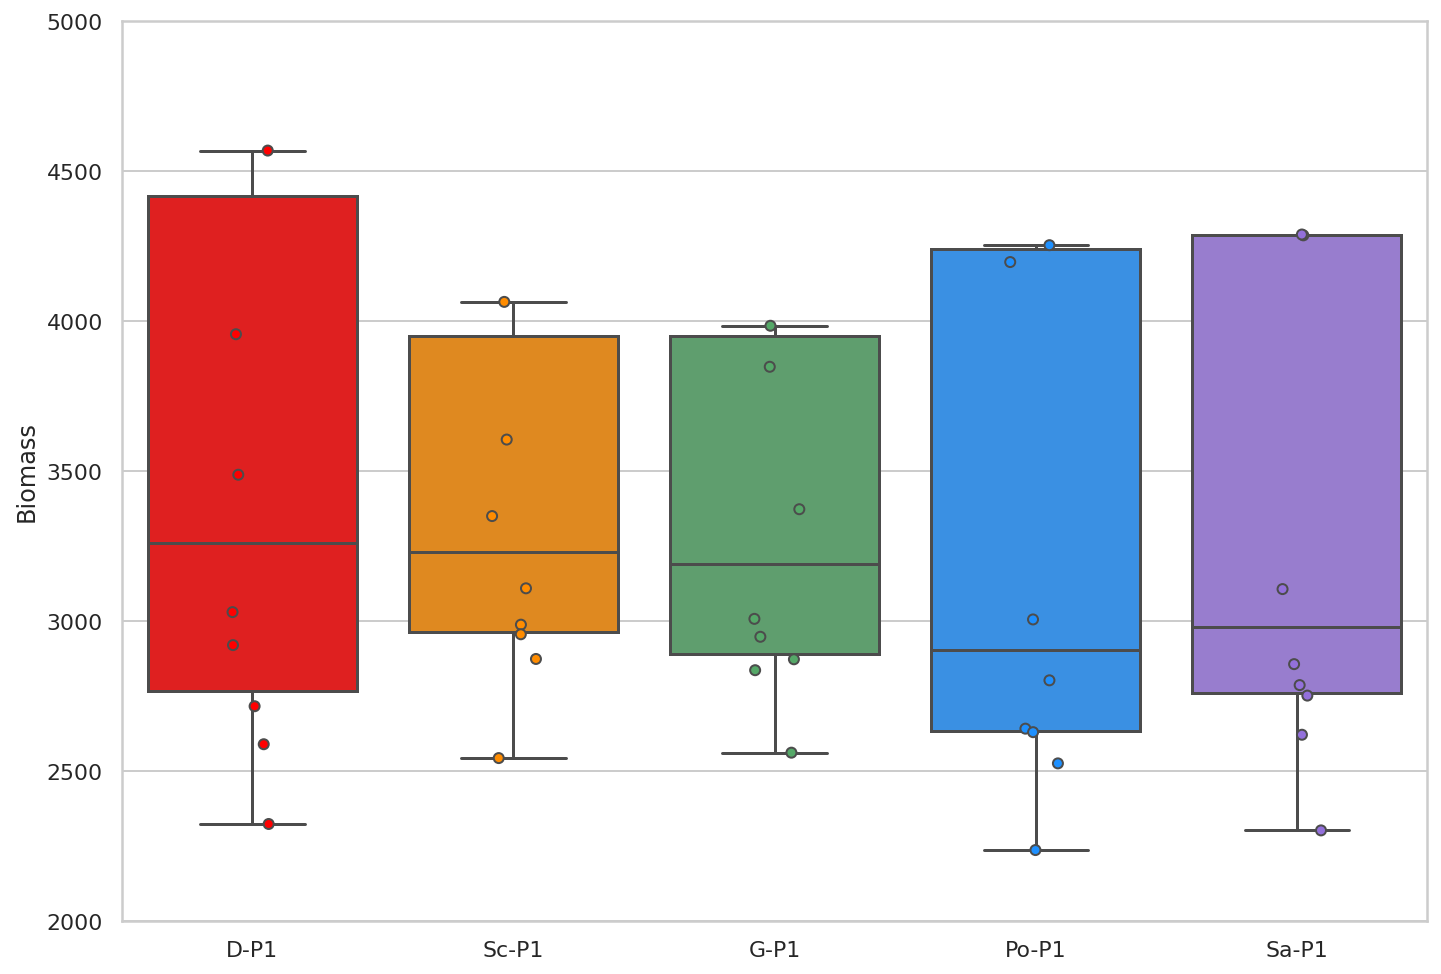

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Biomass')
ax.set_xlabel('')
#ax.set(ylim=(0, 1.5e-3))
ax.set(ylim=(2e+3, 5e+3))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "biomass"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[4],anov_df_T[0]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('biomass ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                 sum_sq    df         F    PR(>F)
treatment  1.548155e+07   1.0  0.301691  0.589574
Residual   9.236875e+08  18.0       NaN       NaN


In [ ]:
anov_df

biomass treatment  seed
0   11234.767192     Sc-P1     1
1    2542.272284     Sc-P1     2
2    2987.396865     Sc-P1     3
3    2872.986034     Sc-P1     4
4    3605.030513     Sc-P1     5
5    3349.756028     Sc-P1     6
6    4064.423890     Sc-P1     7
7    2955.346873     Sc-P1     8
8    3108.725348     Sc-P1     9
9   20886.932075     Sc-P1    10
10   3984.741227      G-P1     1
11   2871.931662      G-P1     2
12   3006.803722      G-P1     3
13  15161.086692      G-P1     4
14  10321.814107      G-P1     5
15   2560.301519      G-P1     6
16   2947.005055      G-P1     7
17   3372.607900      G-P1     8
18   2835.484603      G-P1     9
19   3847.886256      G-P1    10

# ***** Resubmission - Figure S3: Litter decay phase I and phase II

In [ ]:
phase23.loc[phase23['invaders'] == 'NoInv']

Unnamed: 0  Unnamed: 0.1 treatment_name final_litter residents invaders  \
5            5             0          EB033            E      ResB    NoInv   
6            6             0          EB034            E      ResB    NoInv   
7            7             0          EB035            E      ResB    NoInv   
8            8             0          EB032            E      ResB    NoInv   
13          13             0          EB031            E      ResB    NoInv   
14          14             0          EB036            E      ResB    NoInv   
15          15             0          EB038            E      ResB    NoInv   
21          21             0         EB0310            E      ResB    NoInv   
27          27             0          EB039            E      ResB    NoInv   
28          28             0          EB037            E      ResB    NoInv   

    enz_max  seed_number  biomass_year_1  decay_year_1  biomass_year_2  \
5         3   2102121237    49307.894503      0.007486    85075.976405   
6         3   2102121238     2994.904952      0.000188     3060.253611   
7         3   2102121239    26628.132480      0.004087    47200.282294   
8         3   2102121236     1933.357796      0.000086     1236.825622   
13        3   2102121235     1563.502525      0.000049      955.549907   
14        3   2102121240     3674.179776      0.000529     3874.339732   
15        3   2102121242     1981.458950      0.000052     1460.178371   
21        3   2102121244     2418.916786      0.000197     1728.992001   
27        3   2102121243     2076.936990      0.000118     1432.709728   
28        3   2102121241     2301.065130      0.000133     1766.349410   

    decay_year_2  biomass_year_3  decay_year_3       biomass     decay  
5       0.011707   116361.275741      0.015088  83581.715550  0.011427  
6       0.000262     4456.427468      0.000461   3503.862010  0.000304  
7       0.006682    64200.980940      0.008407  46009.798571  0.006392  
8       0.000066      787.534512      0.000046   1319.239310  0.000066  
13      0.000033      610.679498      0.000023   1043.243977  0.000035  
14      0.000747     4760.249040      0.001192   4102.922849  0.000822  
15      0.000045     1098.759700      0.000036   1513.465674  0.000044  
21      0.000162     1283.180363      0.000129   1810.363050  0.000163  
27      0.000091     1005.392998      0.000066   1505.013239  0.000091  
28      0.000121     1363.216367      0.000108   1810.210302  0.000121

In [ ]:
# PHASE 1 AND PHASE 2
phase1 = pd.read_csv('decay_results_combined_22040201.csv')
phase21 = pd.read_csv('Decay_average_phase2_finish_table_round1.csv')
phase22 = pd.read_csv('Decay_average_phase2_finish_table_round2.csv')
phase2 = pd.concat([phase21,phase22],axis=0)
# Build dataframe
col1 = phase1.loc[phase1['litter'] == 'A']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D-P1"})
col2 = phase1.loc[phase1['litter'] == 'B']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sc-P1"})
col3 = phase1.loc[phase1['litter'] == 'C']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "G-P1"})
col4 = phase1.loc[phase1['litter'] == 'D']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po-P1"})
col5 = phase1.loc[phase1['litter'] == 'E']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sa-P1"})
# From D to all
col6 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "DtoD-P2"})
col7 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "DtoSc-P2"})
col8 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "DtoG-P2"})
col9 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "DtoPo-P2"})
col10 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "DtoSa-P2"})
# From Sc to all
col11 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SctoD-P2"})
col12 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SctoSc-P2"})
col13 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SctoG-P2"})
col14 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SctoPo-P2"})
col15 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SctoSa-P2"})
# From G to all
col16 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "GtoD-P2"})
col17 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "GtoSc-P2"})
col18 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "GtoG-P2"})
col19 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "GtoPo-P2"})
col20 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "GtoSa-P2"})
# From Po to all
col21 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "PotoD-P2"})
col22 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "PotoSc-P2"})
col23 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "PotoG-P2"})
col24 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "PotoPo-P2"})
col25 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "PotoSa-P2"})
# From Sa to all
col26 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SatoD-P2"})
col27 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SatoSc-P2"})
col28 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SatoG-P2"})
col29 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SatoPo-P2"})
col30 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SatoSa-P2"})
# Combine
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30],axis=1)
Table_for_plot

D-P1     Sc-P1      G-P1     Po-P1     Sa-P1  DtoD-P2  DtoSc-P2  \
0  0.000229  0.000078  0.000134  0.000080  0.000256      NaN  0.008424   
1  0.002247  0.000088  0.000129  0.003585  0.009272      NaN  0.000165   
2  0.000213  0.000373  0.000079  0.000219  0.000087      NaN  0.000066   
3  0.002560  0.000136  0.000239  0.010777  0.003714      NaN  0.013141   
4  0.000133  0.000141  0.000073  0.000119  0.000064      NaN  0.000755   
5  0.000083  0.000242  0.000377  0.000205  0.000520      NaN  0.000092   
6  0.000038  0.004803  0.001606  0.000107  0.000071      NaN  0.000049   
7  0.000443  0.000231  0.000142  0.000062  0.000212      NaN  0.000017   
8  0.000100  0.002006  0.002543  0.000486  0.000120      NaN  0.003307   
9  0.000133  0.000150  0.000204  0.000064  0.000118      NaN  0.000039   

    DtoG-P2  DtoPo-P2  DtoSa-P2  ...  PotoD-P2  PotoSc-P2  PotoG-P2  \
0  0.000918  0.000035  0.000142  ...  0.005284        NaN       NaN   
1  0.012027  0.000022  0.000056  ...  0.000036        NaN       NaN   
2  0.000065  0.001649  0.000066  ...  0.010552        NaN       NaN   
3  0.006000  0.000052  0.000037  ...  0.001444        NaN       NaN   
4  0.000158  0.000068  0.002222  ...  0.000098        NaN       NaN   
5  0.003160  0.000133  0.000021  ...  0.000066        NaN       NaN   
6  0.000017  0.016522  0.000041  ...  0.000059        NaN       NaN   
7  0.000039  0.001384  0.008597  ...  0.000032        NaN       NaN   
8  0.000088  0.009040  0.001483  ...  0.000013        NaN       NaN   
9  0.000045  0.000042  0.014954  ...  0.000841        NaN       NaN   

   PotoPo-P2  PotoSa-P2  SatoD-P2  SatoSc-P2  SatoG-P2  SatoPo-P2  SatoSa-P2  
0        NaN   0.008558  0.000018   0.000583  0.004948   0.000068        NaN  
1        NaN   0.000038  0.001609   0.011456  0.000041   0.000079        NaN  
2        NaN   0.014612  0.000034   0.000121  0.009946   0.000126        NaN  
3        NaN   0.001586  0.000061   0.000041  0.000766   0.001076        NaN  
4        NaN   0.000118  0.000068   0.005957  0.000121   0.000029        NaN  
5        NaN   0.000077  0.011260   0.000028  0.000101   0.000028        NaN  
6        NaN   0.000065  0.001419   0.001841  0.000060   0.000035        NaN  
7        NaN   0.000032  0.000101   0.000036  0.000028   0.009197        NaN  
8        NaN   0.000028  0.005289   0.000096  0.000031   0.001505        NaN  
9        NaN   0.000805  0.000032   0.000059  0.001741   0.017158        NaN  

[10 rows x 30 columns]

[(0.0, 0.004)]

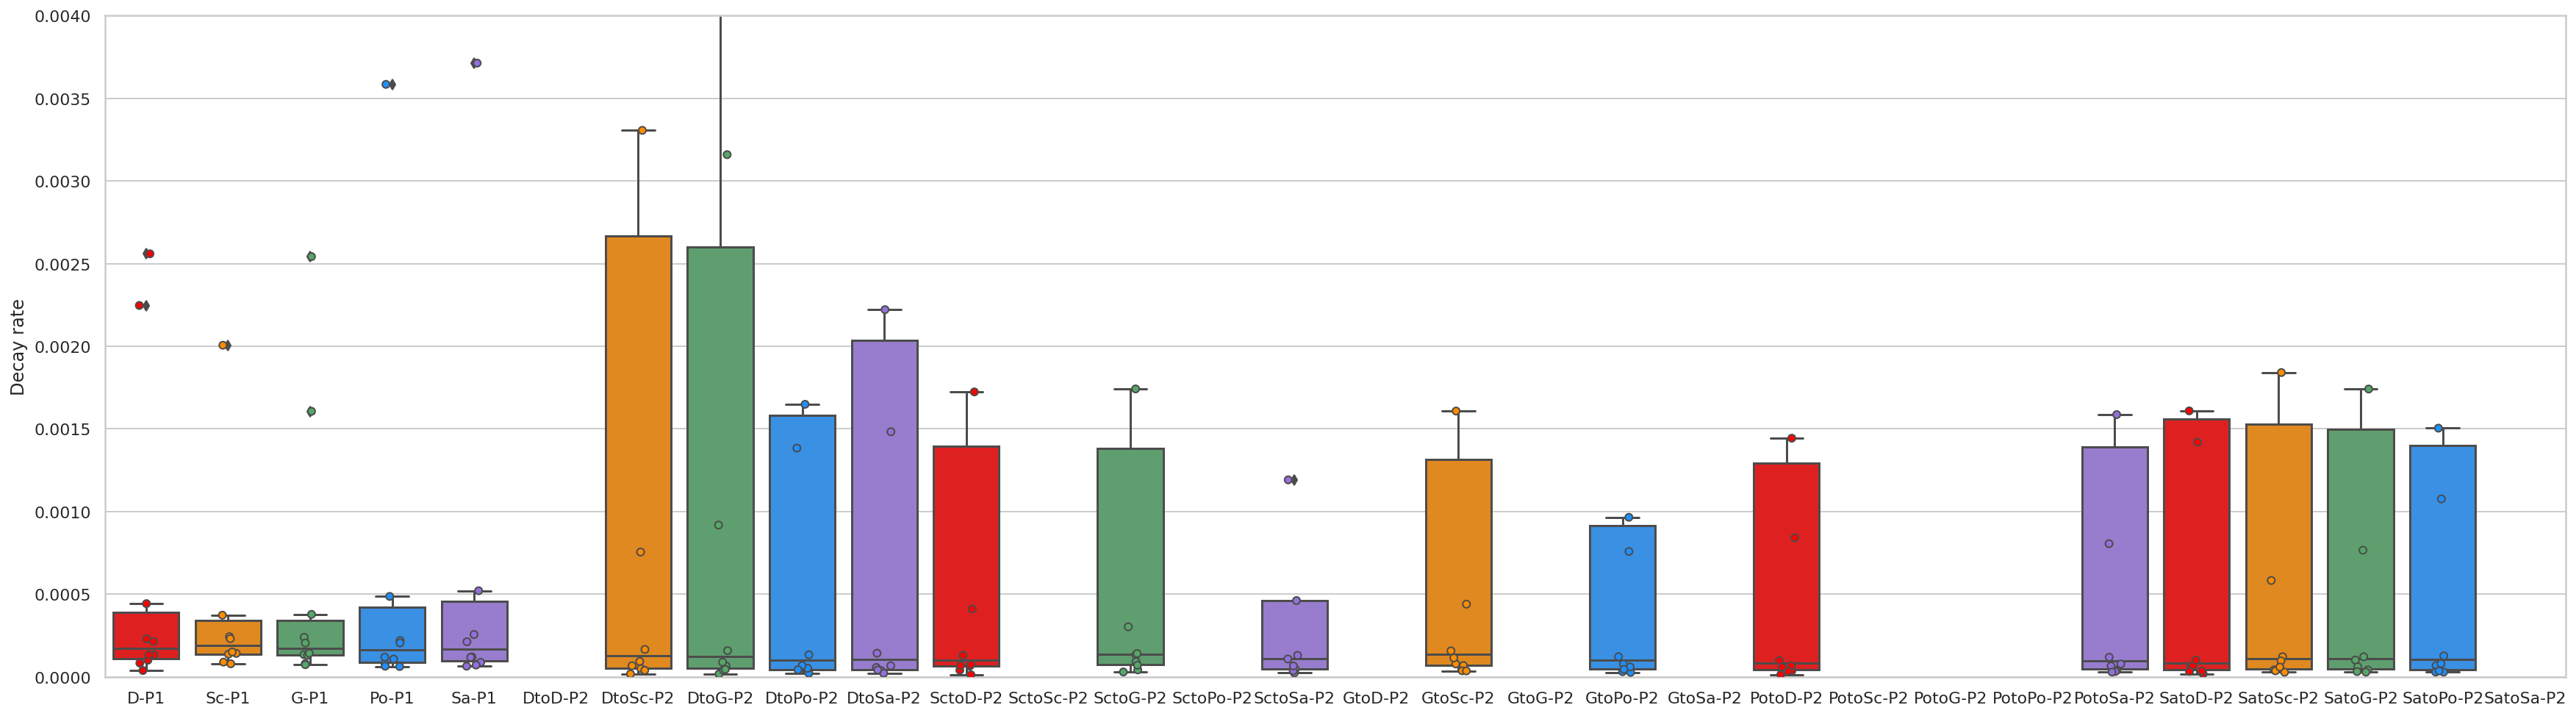

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(30,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple",
          "DtoD-P2":"red", "DtoSc-P2":"darkorange", "DtoG-P2":"g", "DtoPo-P2":"dodgerblue", "DtoSa-P2":"mediumpurple",
          "SctoD-P2":"red", "SctoSc-P2":"darkorange", "SctoG-P2":"g", "SctoPo-P2":"dodgerblue", "SctoSa-P2":"mediumpurple",
          "GtoD-P2":"red", "GtoSc-P2":"darkorange", "GtoG-P2":"g", "GtoPo-P2":"dodgerblue", "GtoSa-P2":"mediumpurple",
          "PotoD-P2":"red", "PotoSc-P2":"darkorange", "PotoG-P2":"g", "PotoPo-P2":"dodgerblue", "PotoSa-P2":"mediumpurple",
          "SatoD-P2":"red", "SatoSc-P2":"darkorange", "SatoG-P2":"g", "SatoPo-P2":"dodgerblue", "SatoSa-P2":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Decay rate')
ax.set_xlabel('')
ax.set(ylim=(0, 0.004))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col3,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col28,col29,col30],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "decay"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[0],anov_df_T[25]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('decay ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

             sum_sq    df         F    PR(>F)
treatment  0.000007   1.0  1.170609  0.293559
Residual   0.000104  18.0       NaN       NaN


# ***** Figure S3A: Can I get litter decay year 3 of phase 1? YES

In [ ]:
phase12.head()

Unnamed: 0  Unnamed: 0.1  ...       biomass     decay
0           0             0  ...   8546.229375  0.000763
1           1             0  ...  16861.546724  0.002517
2           2             0  ...   4722.986002  0.000105
3           3             0  ...   4939.440328  0.000118
4           4             0  ...   6098.956121  0.000394

[5 rows x 17 columns]

In [ ]:
# Table phase 1
phase11 = pd.read_csv('Decay_results_persubtrate_allsubstrates_phase1.csv')
phase12 = pd.read_csv('Decay_results_allsubstrates_phase1_BE.csv')
phase1 = pd.concat([phase11,phase12])
# Pick substrate
phase1_enzmax3 = phase1.loc[(phase1["enzmax"] == 3)]
# Build dataframe
col1 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'A']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D-P1"})
col2 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'B']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sc-P1"})
col3 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'C']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "G-P1"})
col4 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'D']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po-P1"})
col5 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'E']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sa-P1"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5],axis=1)
Table_for_plot

D-P1     Sc-P1      G-P1     Po-P1     Sa-P1
0  0.000100  0.001521  0.000373  0.002045  0.000501
1  0.001856  0.000087  0.000145  0.000069  0.000082
2  0.000410  0.000156  0.000138  0.000112  0.000125
3  0.000130  0.000079  0.002004  0.000060  0.004810
4  0.000227  0.000235  0.001288  0.000241  0.002246
5  0.000205  0.000236  0.000073  0.000470  0.000221
6  0.000082  0.000370  0.000142  0.000082  0.000072
7  0.000147  0.000147  0.000235  0.000117  0.000120
8  0.001686  0.000148  0.000078  0.000214  0.000065
9  0.000038  0.003125  0.000223  0.005559  0.000237

[(0.0, 0.0006)]

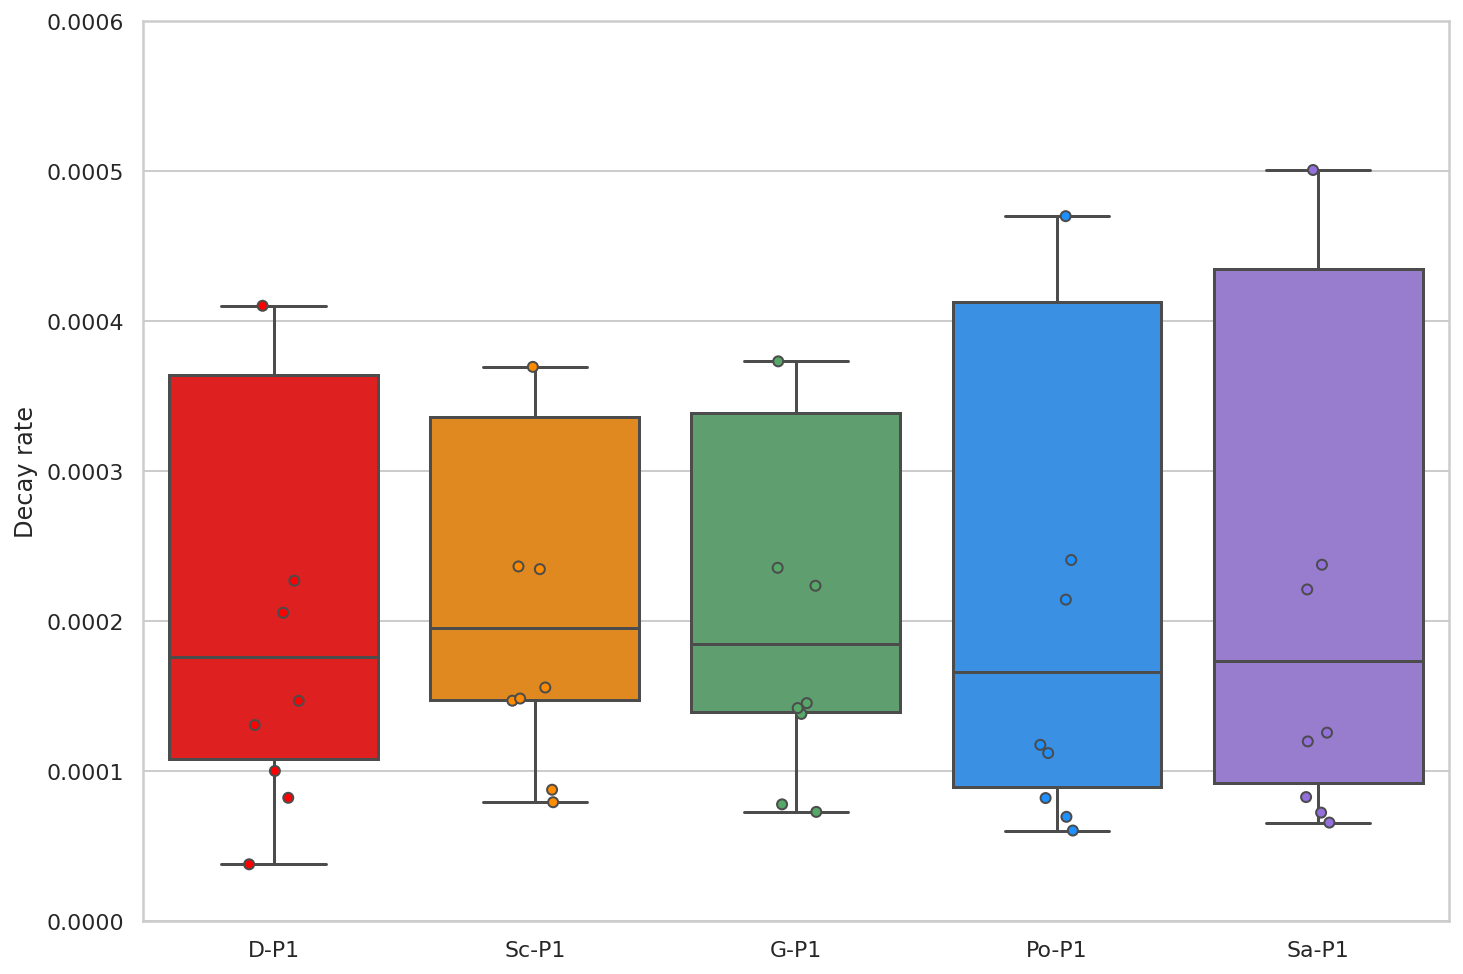

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Decay rate')
ax.set_xlabel('')
#ax.set(ylim=(0, 1.5e-3))
ax.set(ylim=(0, 0.0006))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "decay"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[3],anov_df_T[4]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('decay ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                 sum_sq    df         F    PR(>F)
treatment  1.195324e-08   1.0  0.004409  0.947788
Residual   4.879470e-05  18.0       NaN       NaN


In [ ]:
anov_df

decay treatment  seed
0   0.000100      D-P1     1
1   0.001856      D-P1     2
2   0.000410      D-P1     3
3   0.000130      D-P1     4
4   0.000227      D-P1     5
5   0.000205      D-P1     6
6   0.000082      D-P1     7
7   0.000147      D-P1     8
8   0.001686      D-P1     9
9   0.000038      D-P1    10
10  0.000373      G-P1     1
11  0.000145      G-P1     2
12  0.000138      G-P1     3
13  0.002004      G-P1     4
14  0.001288      G-P1     5
15  0.000073      G-P1     6
16  0.000142      G-P1     7
17  0.000235      G-P1     8
18  0.000078      G-P1     9
19  0.000223      G-P1    10

# ***** Work on Figure 3a: Can I get Protein decay year 3 of phase 1? YES

In [ ]:
# Table phase 1
phase11 = pd.read_csv('Decay_results_persubstrate_persubstrate_phase1.csv')
phase12 = pd.read_csv('Decay_results_persubstrate_persubstrate_phase1_BE.csv')
phase1 = pd.concat([phase11,phase12])
# Pick substrate
phase1_enzmax3 = phase1.loc[(phase1["enz_max"] == 3)  & (phase1['substrate'] == 'Protein3')]
# Build dataframe
col1 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'A']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D-P1"})
col2 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'B']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sc-P1"})
col3 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'C']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "G-P1"})
col4 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'D']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po-P1"})
col5 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'E']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sa-P1"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5],axis=1)
Table_for_plot

D-P1     Sc-P1      G-P1         Po-P1     Sa-P1
0  0.000309  0.000333  0.000812  7.325179e-06  0.000016
1  0.000011  0.000068  0.000166  8.764838e-06  0.000002
2  0.000379  0.000173  0.000402  4.692811e-06  0.000099
3  0.000034  0.000048  0.000354  1.154772e-05  0.000004
4  0.000122  0.000355  0.000168  1.964005e-05  0.000011
5  0.000299  0.000009  0.000069  3.336990e-05  0.000016
6  0.000321  0.000165  0.000309  4.113640e-07  0.000020
7  0.000173  0.001281  0.000056  8.222282e-06  0.000052
8  0.000746  0.000338  0.000013  5.332762e-06  0.000027
9  0.000047  0.000459  0.000335  2.023697e-06  0.000013

Text(0.5, 0, '')

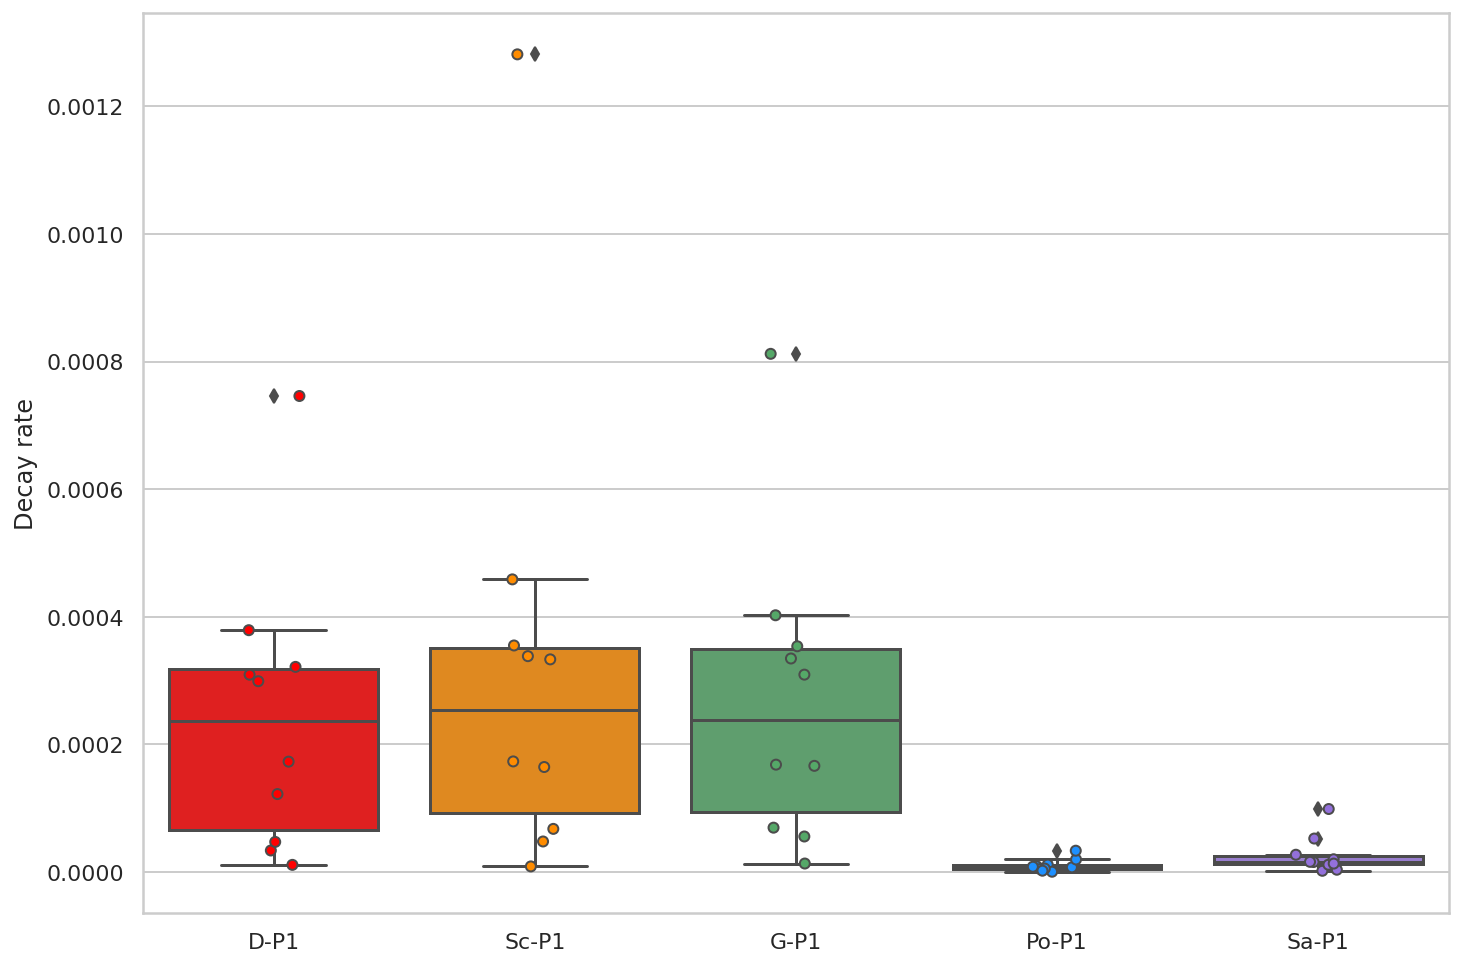

In [ ]:
import seaborn as sns
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Decay rate')
ax.set_xlabel('')
#ax.set(ylim=(0, 1.5e-3))
#ax.set(ylim=(0, 5e-3))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "abundance"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[2],anov_df_T[3]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('abundance ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

# **** Figure 5a: Biomass of hemicellulose degraders in res+inv year 3

In [ ]:
table_t0_N.head()

Unnamed: 0  Unnamed: 0.1  ...  biomass_decomp_res_t0 biomass_decomp_inv_t0
19          19             0  ...               0.000000              0.000000
48          48             0  ...             399.411636            223.588645
68          68             0  ...             727.876976            217.181068
88          88             0  ...              36.126942              0.000000
98          98             0  ...               0.000000              0.000000

[5 rows x 14 columns]

In [ ]:
table_t0_N2.head()

Unnamed: 0  Unnamed: 0.1  ...  biomass_decomp_res_t0 biomass_decomp_inv_t0
11          11             0  ...             545.446865                   0.0
33          33             0  ...             289.081594                   0.0
53          53             0  ...             587.772538                   0.0
67          67             0  ...              95.640018                   0.0
69          69             0  ...             423.151518                   0.0

[5 rows x 14 columns]

In [ ]:
# Same at t0
table_t0 = pd.read_csv('specialists_t0_combined_220221.csv')
table_t0_N = table_t0[(table_t0["final_litter"] == 'B') & (table_t0["residents"] == 'ResA') & (table_t0["substrate"] == 'Hemicellulose')]
# Add t0 NoInv-Sc
table_t02 = pd.read_csv('specialists_t0_combined_220224.csv')  
table_t0_N2 = table_t02[(table_t02["final_litter"] == 'B') & (table_t02["residents"] == 'ResB') & (table_t02["substrate"] == 'Hemicellulose')]
# Build dataframe
col1 = table_t0_N.loc[(table_t0_N['invaders'] == 'NoInv')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "NoInv-D"})
col2 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvA')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "Inv-D"})
col3 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvB')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "Inv-Sc"})
col4 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvC')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "Inv-G"})
col5 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvD')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "Inv-Po"})
col6 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvE')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "Inv-Sa"})
col7 = table_t0_N2.loc[(table_t0_N2['invaders'] == 'NoInv')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "NoInv-Sc"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
Table_for_plot

NoInv-D       Inv-D      Inv-Sc  ...      Inv-Po      Inv-Sa    NoInv-Sc
0   36.126942    0.000000  207.398566  ...  129.220280  217.181068  545.446865
1   53.317084    0.000000  138.498842  ...   46.999283  181.346125  289.081594
2  727.876976    2.356425  147.031769  ...  162.837123  162.910580  587.772538
3  637.152151  248.877143  216.652248  ...    9.599876  288.749480   95.640018
4    0.000000   11.237628   15.101234  ...    0.000000    0.000000  423.151518
5    0.000000  298.899391    0.000000  ...    0.000000    0.000000  594.752250
6   26.488983   11.330287    0.482375  ...  300.473270   13.948836  498.718706
7  399.411636   23.526417  160.477895  ...  231.551037  196.000023    0.000000
8   19.468619   30.867045   71.720495  ...  150.007227   47.772344    0.797868
9   54.434582  264.173959  254.663952  ...  125.315932  114.045335  191.078886

[10 rows x 7 columns]

[(0.0, 1050.0)]

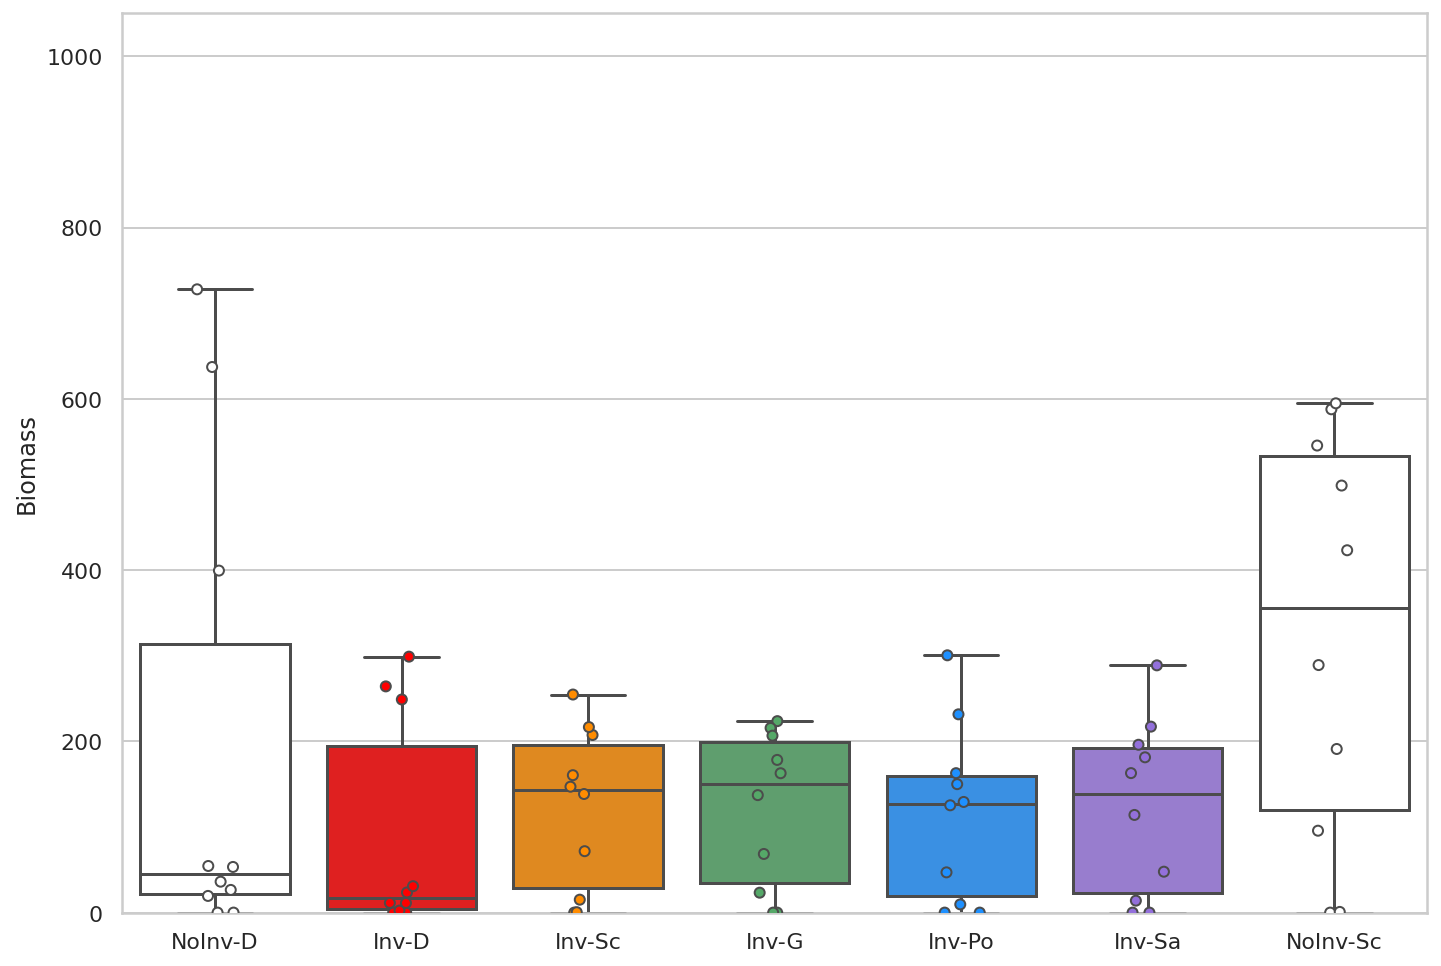

In [ ]:
# Boxplot
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"NoInv-D":"w", 
          "Inv-D":"red", "Inv-Sc":"darkorange", "Inv-G":"g", "Inv-Po":"dodgerblue", "Inv-Sa":"mediumpurple",
          "NoInv-Sc":"w" }

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
ax.set_ylabel('Biomass')
ax.set_xlabel('')
ax.set(ylim=(0, 1050))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "abundance"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[4],anov_df_T[6]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('abundance ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                  sum_sq    df         F    PR(>F)
treatment  214335.306199   1.0  6.358855  0.021324
Residual   606718.615125  18.0       NaN       NaN


In [ ]:
# What are the abundances for seed 6
table_t00_N.loc[table_t00_N['seed_index'] == 6]

Unnamed: 0  Unnamed: 0.1  ...  biomass_decomp_res_t0 biomass_decomp_inv_t0
562          562             0  ...             637.152151            216.652248
939          939             0  ...             637.152151            288.749480
1030        1030             0  ...             637.152151              0.000000
1114        1114             0  ...             637.152151            300.473270
1411        1411             0  ...             637.152151            215.625148
1976        1976             0  ...             637.152151            264.173959

[6 rows x 14 columns]

In [ ]:
# t0
table_t00 = pd.read_csv('specialists_t0_combined_220221.csv')
table_t00_N = table_t00[(table_t00["final_litter"] == 'B') & (table_t00["residents"] == 'ResA') & (table_t00["substrate"] == 'Hemicellulose')]
# Add t0 NoInv-Sc
table_t02 = pd.read_csv('specialists_t0_combined_220224.csv')  
table_t0_N2 = table_t02[(table_t02["final_litter"] == 'B') & (table_t02["residents"] == 'ResB') & (table_t02["substrate"] == 'Hemicellulose')]
# Year 3
table_t0 = pd.read_csv('specialists_year3_combined_220221.csv')
table_t0_N = table_t0[(table_t0["final_litter"] == 'B') & (table_t0["residents"] == 'ResA') & (table_t0["substrate"] == 'Hemicellulose')]
# Build dataframe
col0 = table_t00_N.loc[(table_t00_N['invaders'] == 'NoInv')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "t0-NoInv-D"})
col1 = table_t0_N.loc[(table_t0_N['invaders'] == 'NoInv')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "NoInv"})
col2 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvA')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Inv-D"})
col3 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvB')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Inv-Sc"})
col4 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvC')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Inv-G"})
col5 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvD')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Inv-Po"})
col6 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvE')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Inv-Sa"})
col7 = table_t0_N2.loc[(table_t0_N2['invaders'] == 'NoInv')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "t0-NoInv-Sc"})
Table_for_plot = pd.concat([col0,col1,col2,col3,col4,col5,col6,col7],axis=1)
#Table_for_plot['NoInv'] = Table_for_plot['NoInv'].fillna(0)
Table_for_plot

t0-NoInv-D        NoInv        Inv-D  ...       Inv-Po       Inv-Sa  t0-NoInv-Sc
0   36.126942     0.000000   128.045820  ...  8937.838791     0.000000   545.446865
1   53.317084     0.000000   117.241700  ...   710.147127     0.000000   289.081594
2  727.876976    35.559747  9937.899181  ...   266.284047    43.919148   587.772538
3  637.152151   325.896162     0.000000  ...   123.102284   404.944951    95.640018
4    0.000000     7.585796     0.000000  ...   330.778409    88.682930   423.151518
5    0.000000    93.869468   651.513100  ...    84.254292   274.829408   594.752250
6   26.488983    65.278529    69.950855  ...   348.639102   207.404683   498.718706
7  399.411636    76.833718   462.829591  ...    73.217418   222.467333     0.000000
8   19.468619   543.689066    29.889532  ...     0.000000   597.872974     0.797868
9   54.434582  6213.304725    72.829943  ...     0.000000  9690.171941   191.078886

[10 rows x 8 columns]

[(0.0, 800.0)]

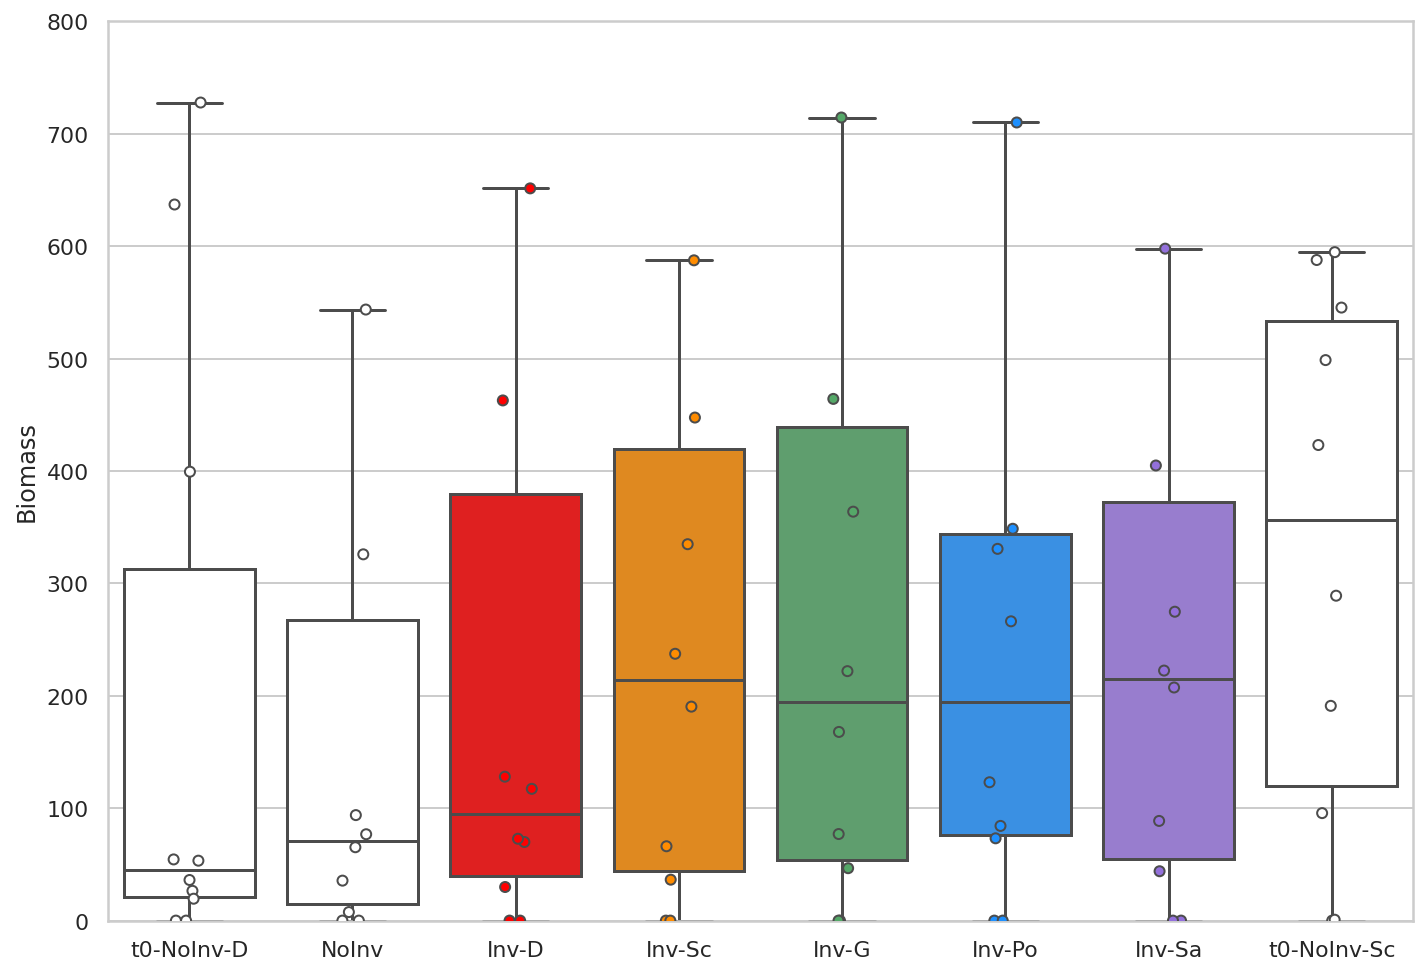

In [ ]:
# Boxplot
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"t0-NoInv-D":"w",
          "NoInv":"w", "Inv-D":"red", "Inv-Sc":"darkorange", "Inv-G":"g", "Inv-Po":"dodgerblue", "Inv-Sa":"mediumpurple",
          "t0-NoInv-Sc":"w"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
ax.set_ylabel('Biomass')
ax.set_xlabel('')
ax.set(ylim=(0, 800))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col0,col1,col2,col3,col4,col5,col6,col7],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "abundance"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[2],anov_df_T[1]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('abundance ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                 sum_sq    df         F    PR(>F)
treatment  8.438582e+05   1.0  0.126692  0.726024
Residual   1.198925e+08  18.0       NaN       NaN


In [ ]:
anov_df

abundance    treatment  seed
0    36.126942   t0-NoInv-D     1
1    53.317084   t0-NoInv-D     2
2   727.876976   t0-NoInv-D     3
3   637.152151   t0-NoInv-D     4
4     0.000000   t0-NoInv-D     5
5     0.000000   t0-NoInv-D     6
6    26.488983   t0-NoInv-D     7
7   399.411636   t0-NoInv-D     8
8    19.468619   t0-NoInv-D     9
9    54.434582   t0-NoInv-D    10
10  545.446865  t0-NoInv-Sc     1
11  289.081594  t0-NoInv-Sc     2
12  587.772538  t0-NoInv-Sc     3
13   95.640018  t0-NoInv-Sc     4
14  423.151518  t0-NoInv-Sc     5
15  594.752250  t0-NoInv-Sc     6
16  498.718706  t0-NoInv-Sc     7
17    0.000000  t0-NoInv-Sc     8
18    0.797868  t0-NoInv-Sc     9
19  191.078886  t0-NoInv-Sc    10

In [ ]:
# Same table without seed 6 (and or seed 4)
# Using 220218 simulations
# Table phase 1
phase11 = pd.read_csv('Decay_results_persubstrate_persubstrate_phase1.csv')
phase12 = pd.read_csv('Decay_results_persubstrate_persubstrate_phase1_BE.csv')
phase1 = pd.concat([phase11,phase12])
# Table phase 2
phase2 = pd.read_csv('decay_results_persubstrate_combined_220221.csv')
# Pick substrate
phase1_enzmax3 = phase1.loc[(phase1["enz_max"] == 3)  & (phase1['substrate'] == 'Hemicellulose') & (phase1["seed_number"] != 2102121240) 
      & (phase1["seed_number"] != 2102121238)]
phase2_enzmax3  = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResA') & (phase2["substrate"] == 'Hemicellulose') 
      & (phase2["seed_number"] != 2102121240) & (phase2["seed_number"] != 2102121238)]
# Boxplots for hypothesis 1
import seaborn as sns
# Build dataframe
col1 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'A']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D-P1"})
col2 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'NoInv']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "NoInv"})
col3 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvA']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Inv-D"})
col4 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvB']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Inv-Sc"})
col5 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvC']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Inv-G"})
col6 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvD']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Inv-Po"})
col7 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvE']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Inv-Sa"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
Table_for_plot

D-P1     NoInv     Inv-D    Inv-Sc     Inv-G    Inv-Po    Inv-Sa
0  0.000006  0.000007  0.000000  0.000195  0.000166  0.000033  0.000577
1  0.000007  0.000016  0.000036  0.000000  0.000146  0.000077  0.000000
2  0.000003  0.000496  0.000031  0.000162  0.000200  0.000650  0.000030
3  0.000000  0.000000  0.000589  0.000264  0.000000  0.000000  0.000078
4  0.000004  0.000052  0.000067  0.000000  0.000066  0.000184  0.000164
5  0.000003  0.000162  0.000000  0.000043  0.000047  0.000215  0.000000
6  0.000000  0.000000  0.000163  0.000053  0.000670  0.000151  0.000184
7  0.000044  0.000045  0.000059  0.000552  0.000000  0.000000  0.000203

Text(0.5, 0, '')

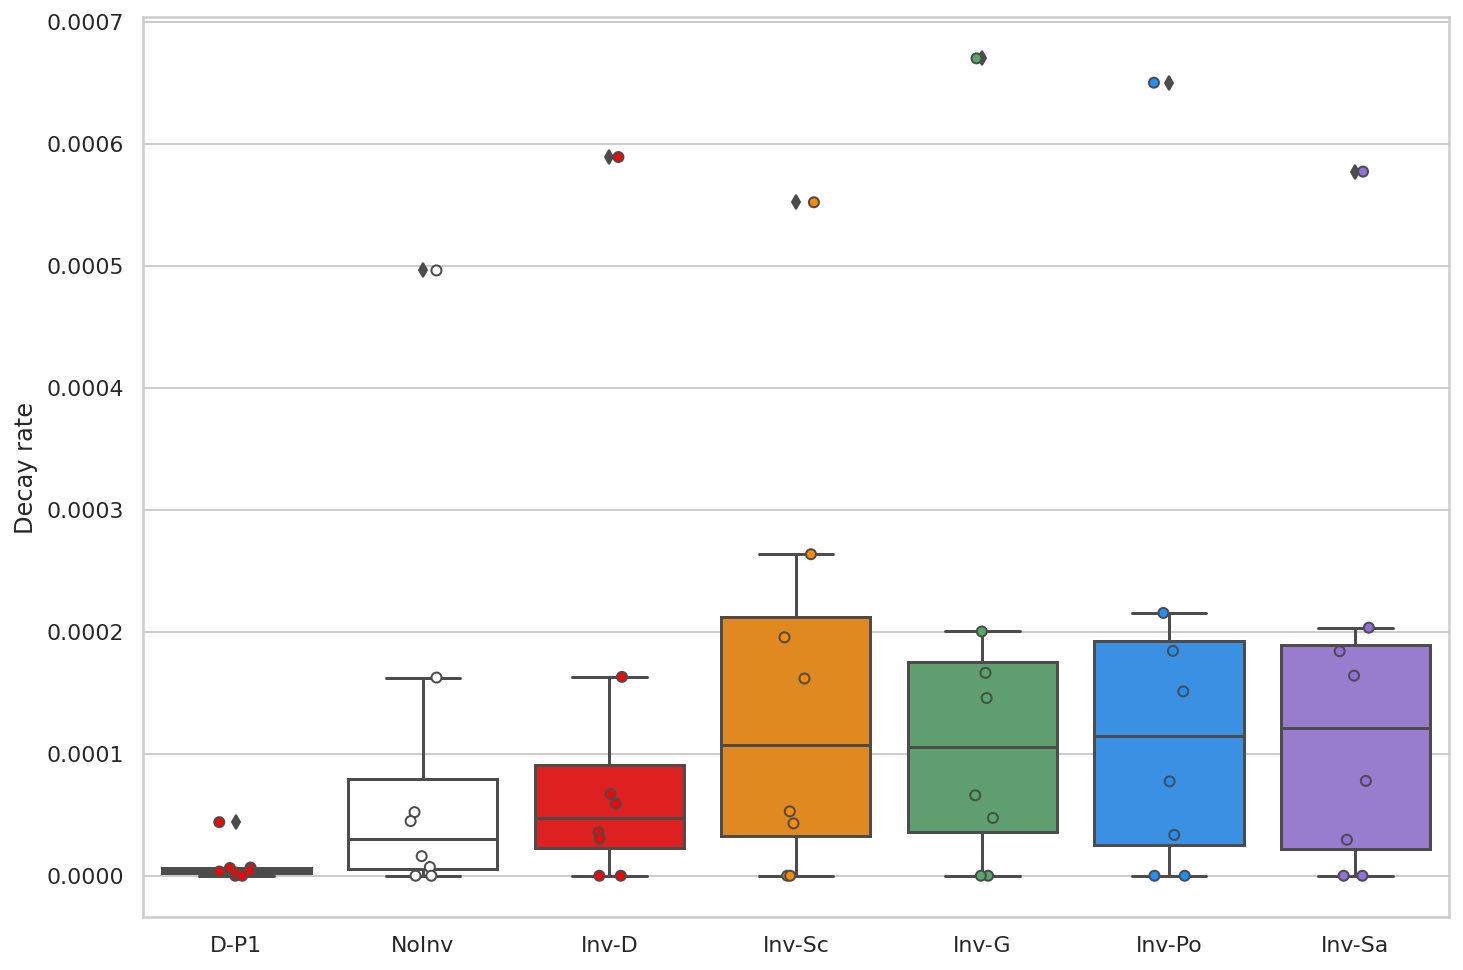

In [ ]:
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", "NoInv":"w",  "Inv-D":"red", "Inv-Sc":"darkorange", "Inv-G":"g",
          "Inv-Po":"dodgerblue", "Inv-Sa":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Decay rate')
ax.set_xlabel('')
#ax.set(ylim=(0, 1.5e-3))
#ax.set(ylim=(0, 5e-3))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "abundance"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[2],anov_df_T[3]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('abundance ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                 sum_sq    df         F    PR(>F)
treatment  1.060291e-07   1.0  1.224399  0.284859
Residual   1.385550e-06  16.0       NaN       NaN


In [ ]:
# Using 220218 simulations
# Table phase 1
phase11 = pd.read_csv('Decay_results_persubstrate_persubstrate_phase1.csv')
phase12 = pd.read_csv('Decay_results_persubstrate_persubstrate_phase1_BE.csv')
phase1 = pd.concat([phase11,phase12])
# Table phase 2
phase2 = pd.read_csv('decay_results_persubstrate_combined_220221.csv')
# Pick substrate
phase1_enzmax3 = phase1.loc[(phase1["enz_max"] == 3)  & (phase1['substrate'] == 'Hemicellulose')
    & (phase1["seed_number"] != 2102121240)]
phase2_enzmax3  = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResA') & (phase2["substrate"] == 'Hemicellulose')
    & (phase2["seed_number"] != 2102121240)]
# Boxplots for hypothesis 1
import seaborn as sns
# Build dataframe
col1 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'A']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D-P1"})
col2 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'NoInv']["decay_year_1"].to_frame().reset_index(drop=True).rename(columns={"decay_year_1": "NoInv"})
col3 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvA']["decay_year_1"].to_frame().reset_index(drop=True).rename(columns={"decay_year_1": "Inv-D"})
col4 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvB']["decay_year_1"].to_frame().reset_index(drop=True).rename(columns={"decay_year_1": "Inv-Sc"})
col5 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvC']["decay_year_1"].to_frame().reset_index(drop=True).rename(columns={"decay_year_1": "Inv-G"})
col6 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvD']["decay_year_1"].to_frame().reset_index(drop=True).rename(columns={"decay_year_1": "Inv-Po"})
col7 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvE']["decay_year_1"].to_frame().reset_index(drop=True).rename(columns={"decay_year_1": "Inv-Sa"})
col8 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'B']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sc-P1"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7,col8],axis=1)
Table_for_plot

D-P1     NoInv     Inv-D  ...    Inv-Po    Inv-Sa     Sc-P1
0  0.000006  0.000012  0.000138  ...  0.000034  0.000826  0.000583
1  0.000007  0.000020  0.000000  ...  0.000085  0.000000  0.000000
2  0.000003  0.000646  0.000024  ...  0.000834  0.000449  0.000569
3  0.000000  0.000118  0.000025  ...  0.000000  0.000043  0.000200
4  0.000004  0.000000  0.000798  ...  0.000510  0.000084  0.000668
5  0.000003  0.000057  0.000061  ...  0.000239  0.000247  0.001381
6  0.000007  0.000174  0.000000  ...  0.000244  0.000000  0.000010
7  0.000000  0.000000  0.000193  ...  0.000241  0.000224  0.000110
8  0.000044  0.000042  0.000075  ...  0.000000  0.000274  0.000147

[9 rows x 8 columns]

[(0.0, 0.0055)]

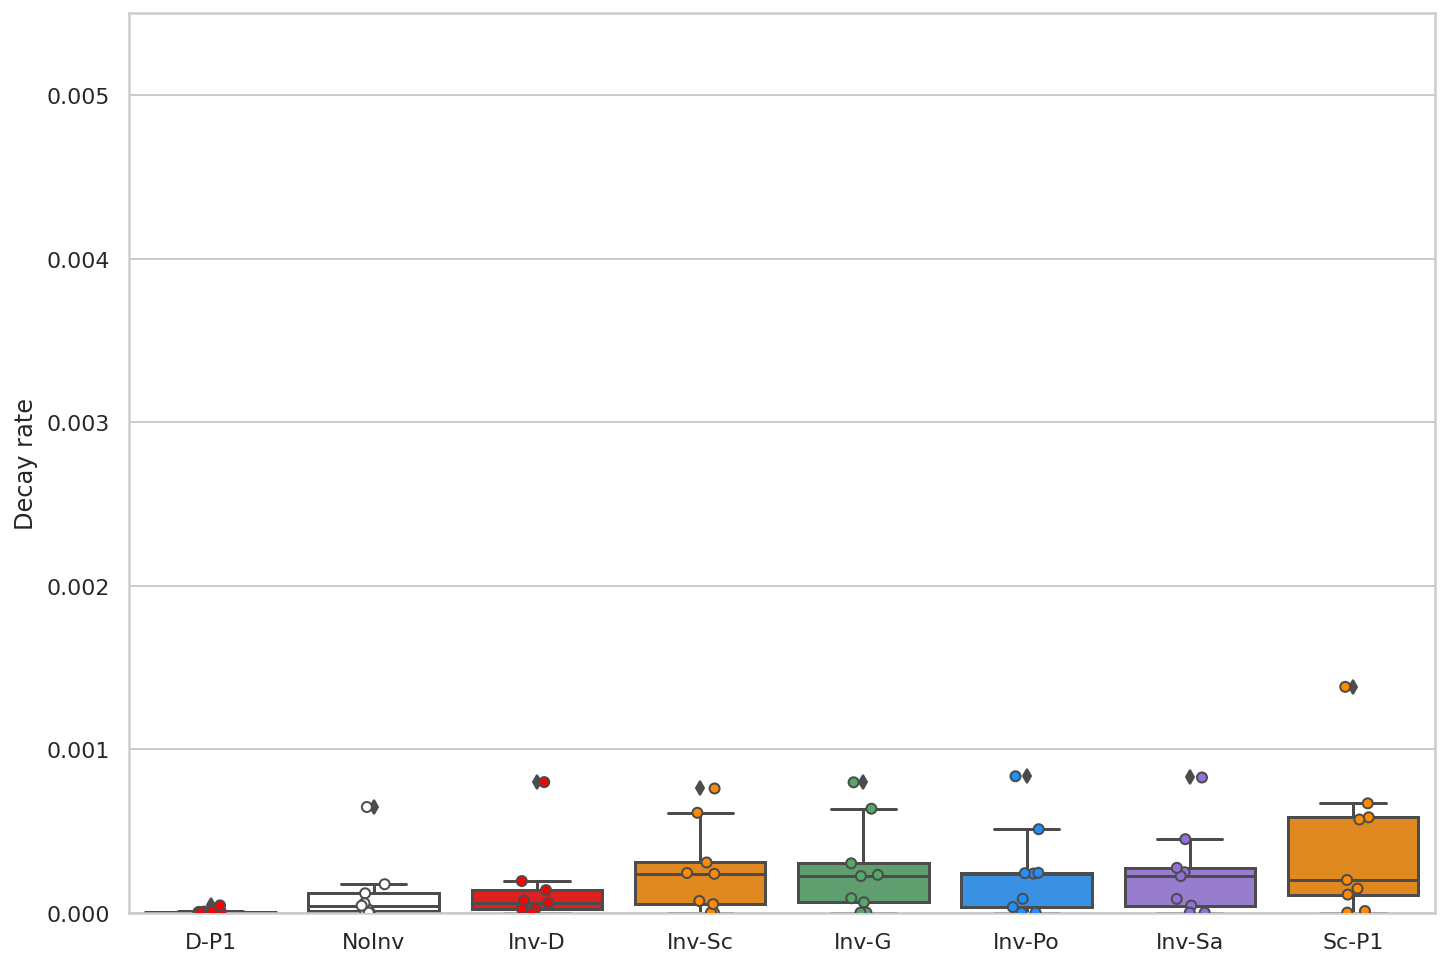

In [ ]:
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", 
          "NoInv":"w",  "Inv-D":"red", "Inv-Sc":"darkorange", "Inv-G":"g", "Inv-Po":"dodgerblue", "Inv-Sa":"mediumpurple",
          "Sc-P1":"darkorange",}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Decay rate')
ax.set_xlabel('')
# ax.set(ylim=(0, 1.5e-3))
ax.set(ylim=(0, 5.5e-3))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7,col8],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "abundance"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[1],anov_df_T[7]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('abundance ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                 sum_sq    df         F    PR(>F)
treatment  3.751213e-07   1.0  3.099546  0.097413
Residual   1.936394e-06  16.0       NaN       NaN


In [ ]:
anov_df

abundance treatment  seed
0    0.000006      D-P1     1
1    0.000007      D-P1     2
2    0.000003      D-P1     3
3    0.000000      D-P1     4
4    0.000004      D-P1     5
5    0.000003      D-P1     6
6    0.000007      D-P1     7
7    0.000000      D-P1     8
8    0.000044      D-P1     9
9    0.000583     Sc-P1     1
10   0.000000     Sc-P1     2
11   0.000569     Sc-P1     3
12   0.000200     Sc-P1     4
13   0.000668     Sc-P1     5
14   0.001381     Sc-P1     6
15   0.000010     Sc-P1     7
16   0.000110     Sc-P1     8
17   0.000147     Sc-P1     9

# ***** Figure 4b: Biomass of protein degraders in res+inv community year 3

In [ ]:
table_t0_N.head()

Unnamed: 0  ...  biomass_specialist_inv_last_day
10           10  ...                        99.930091
109         109  ...                       955.067256
162         162  ...                        17.060481
207         207  ...                         6.312043
268         268  ...                        91.846985

[5 rows x 18 columns]

In [ ]:
# t0
table_t0 = pd.read_csv('specialists_year3_combined_220221.csv')
table_t0_N = table_t0[(table_t0["final_litter"] == 'A') & (table_t0["residents"] == 'ResD') & (table_t0["substrate"] == 'Protein3')]
# Build dataframe
col1 = table_t0_N.loc[(table_t0_N['invaders'] == 'NoInv')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "NoInv"})
col2 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvA')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Inv-D"})
col3 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvB')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Inv-Sc"})
col4 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvC')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Inv-G"})
col5 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvD')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Inv-Po"})
col6 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvE')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Inv-Sa"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6],axis=1)
Table_for_plot['NoInv'] = Table_for_plot['NoInv'].fillna(0)
Table_for_plot

NoInv        Inv-D       Inv-Sc        Inv-G      Inv-Po       Inv-Sa
0  212.059028     0.000000   226.594086   230.342324    0.000000   244.034780
1   20.490487  1424.943890     0.638934    66.256530   34.378147   150.869222
2  124.542495    99.559309  2349.708582   178.573128    0.000000    46.756938
3   50.810780    31.629559   102.458956  1760.379984   13.746648    54.330227
4    0.000000  1722.522854    45.942093    45.268241  169.722084  1324.307805
5    0.000000   289.787619  1504.577234  1433.779849   53.614864    15.692395
6   65.697017  1725.427113   321.400162  1568.985678  902.642358   352.334769
7    9.909095   303.889800  2128.296796    55.342101  133.762010     0.000000
8  861.378472    70.313275   270.089421     0.730037   48.293002     0.000000
9   47.766553   221.844907    71.843789   252.855994  218.910411    43.066752

Text(0.5, 0, '')

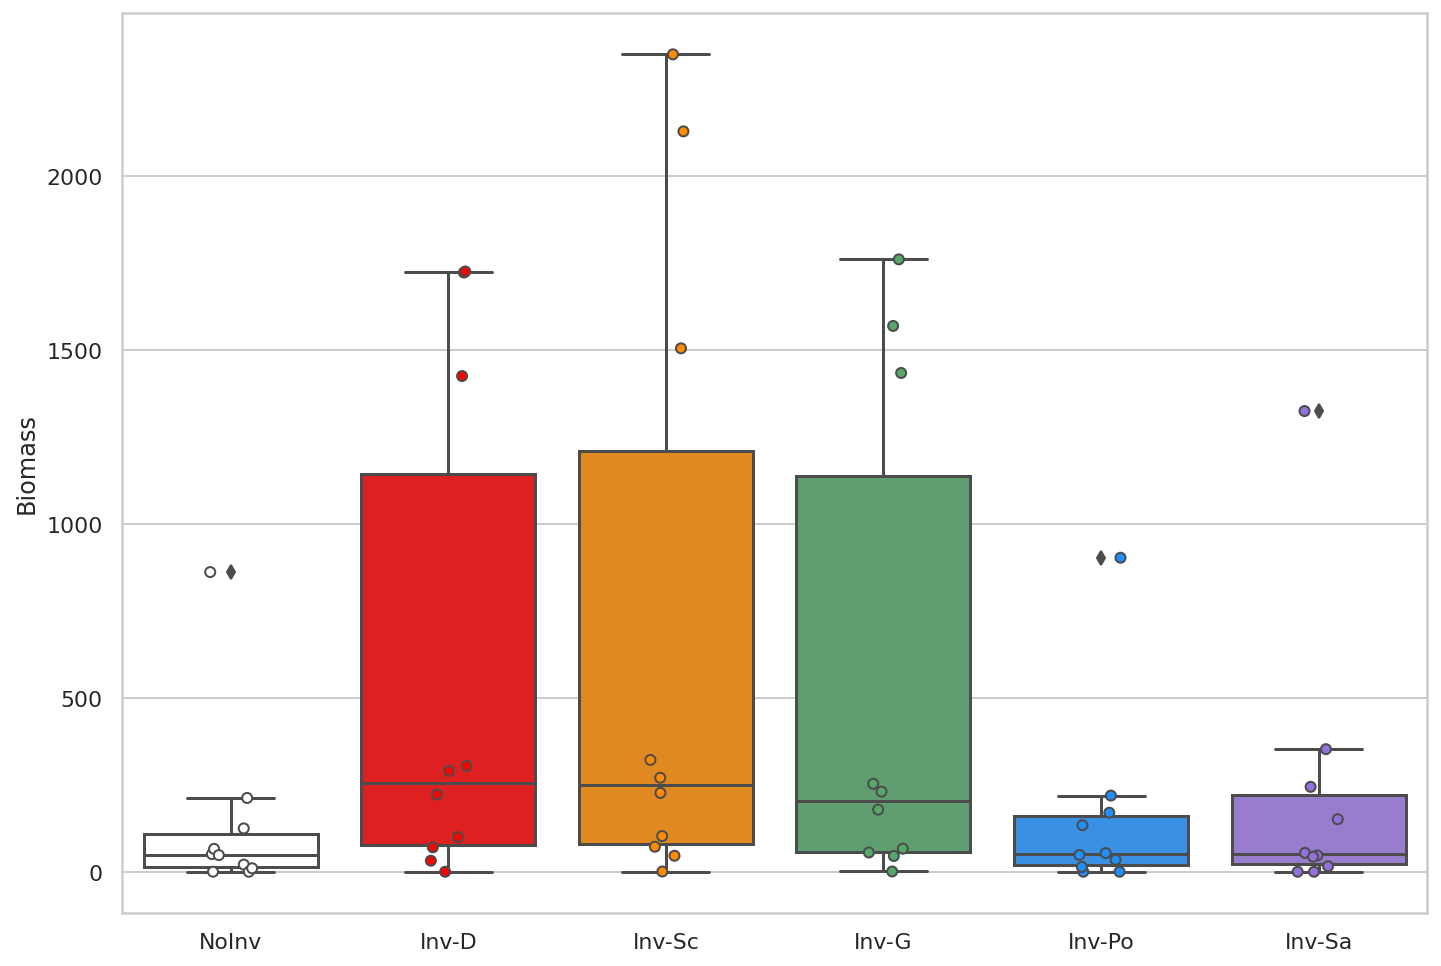

In [ ]:
# Boxplot
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"NoInv":"w", "Inv-D":"red", "Inv-Sc":"darkorange", "Inv-G":"g",
          "Inv-Po":"dodgerblue", "Inv-Sa":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
ax.set_ylabel('Biomass')
ax.set_xlabel('')
#ax.set(ylim=(0, 3e-4))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "abundance"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[1],anov_df_T[4]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('abundance ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                  sum_sq    df         F    PR(>F)
treatment    1703.935427   1.0  0.046386  0.831897
Residual   661204.992368  18.0       NaN       NaN


# ***** Work on Figure SX: Biomass of protein degraders in specialist community at t0

In [ ]:
# t0
table_t0 = pd.read_csv('specialists_t0_combined_220221.csv')
table_t0_N = table_t0[(table_t0["final_litter"] == 'A') & (table_t0["residents"] == 'ResD') & (table_t0["substrate"] == 'Starch')]
# Build dataframe
col1 = table_t0_N.loc[(table_t0_N['invaders'] == 'NoInv')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "NoInv"})
col2 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvA')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "Inv-D"})
col3 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvB')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "Inv-Sc"})
col4 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvC')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "Inv-G"})
col5 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvD')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "Inv-Po"})
col6 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvE')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "Inv-Sa"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6],axis=1)
Table_for_plot['NoInv'] = Table_for_plot['NoInv'].fillna(0)
Table_for_plot

NoInv        Inv-D       Inv-Sc        Inv-G        Inv-Po        Inv-Sa
0    0.0   128.007285   106.927976   121.016851      7.970647     43.765907
1    0.0  3396.473005    90.378392   139.420992     41.615706     46.443045
2    0.0    94.865928  4731.426753  4778.842843   6278.012106    101.488052
3    0.0   100.711158    77.559796    77.574040     47.392594  11761.978217
4    0.0    36.901459    15.786985    80.665110     72.316490    159.711152
5    0.0    76.010498   127.198182    38.981727    181.771805    184.592150
6    0.0    12.159276    41.828838    14.589854  12446.258766   6940.149690
7    0.0  5787.011443   134.465723    63.212819    180.910005     74.526828
8    0.0    68.285733  7338.358146    98.353303     38.926211     41.323036
9    0.0    84.742038   146.776911  4228.667069     94.505826      8.681574

[(0.0, 300.0)]

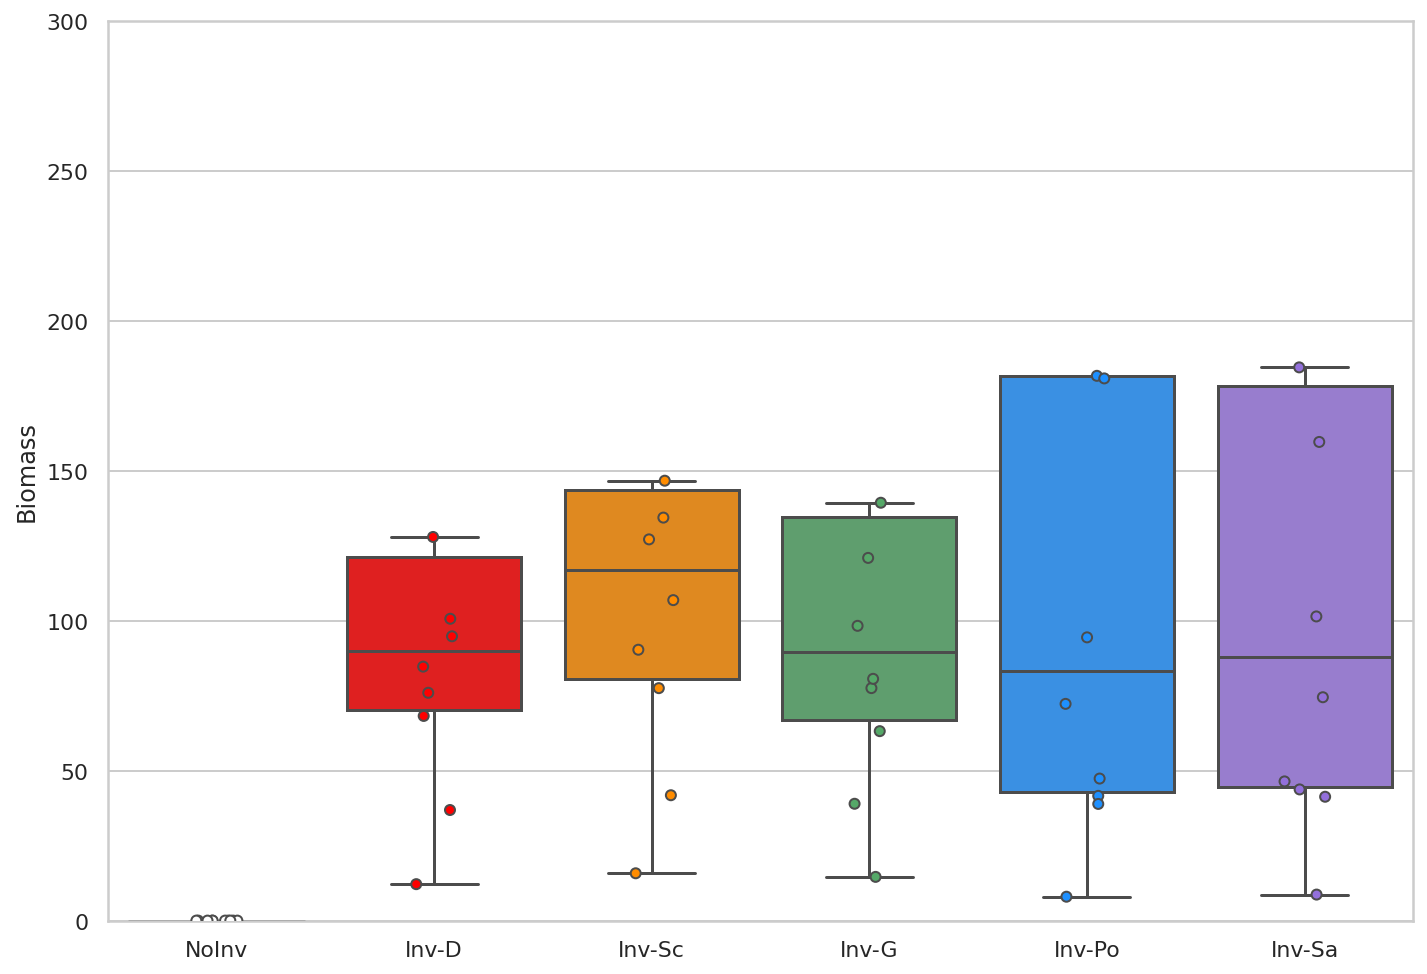

In [ ]:
# Boxplot
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"NoInv":"w", "Inv-D":"red", "Inv-Sc":"darkorange", "Inv-G":"g",
          "Inv-Po":"dodgerblue", "Inv-Sa":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
ax.set_ylabel('Biomass')
ax.set_xlabel('')
ax.set(ylim=(0, 300))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "abundance"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[1],anov_df_T[4]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('abundance ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                 sum_sq    df         F    PR(>F)
treatment  4.612333e+06   1.0  0.431692  0.519473
Residual   1.923175e+08  18.0       NaN       NaN


# ********* Work on Figure 4c (relative abundance of protein degraders in the invader community at t0) 

In [ ]:
table_t0 = pd.read_csv('specialists_t0_combined_220218.csv')
table_t0[(table_t0["final_litter"] == 'A') & (table_t0["residents"] == 'ResD') & (table_t0["substrate"] == 'Protein3') & (table_t0["invaders"] == 'NoInv')]
#I want: abund_rel_specialist_res_res_t0

Unnamed: 0  ...  abund_rel_specialist_inv_frac_t0
39            39  ...                               0.0
68            68  ...                               0.0
163          163  ...                               0.0
309          309  ...                               0.0
359          359  ...                               0.0
429          429  ...                               0.0
539          539  ...                               0.0
940          940  ...                               0.0
1056        1056  ...                               0.0
1364        1364  ...                               0.0

[10 rows x 15 columns]

# ***** Pickle: Inv-D

In [ ]:
#load in data
with open("10569122.pickle", "rb") as f:
    dump = pickle5.load(f)

Output_variables = vars(dump).keys()
Output_variables

dict_keys(['Runtime', 'Initialization', 'SubstratesSeries', 'DecayRatesSeries', 'MicrobesSeries', 'TotalBiomass_PerYear', 'decay_results', 'decay_results_firstcolumns', 'decay_results_persubstrate', 'Table_correspondance', 'SubX_list', 'DecayRates_Grid_Time', 'DecayRates_Grid_Time_Substrate', 'ntaxa_decomp_tf', 'decay_results_persubstrate_final', 'decay_results_Sub'])

In [ ]:
# Check that's it's the right seed 
dump.decay_results_firstcolumns

treatment_name final_litter residents invaders enz_max  seed_number
0          ADA33            A      ResD     InvA       3   2102121237

In [ ]:
# Check that it's the maximal protien 3 decay rate
dump.decay_results_persubstrate

decay_year_1  decay_year_2  decay_year_3
DeadMic            0.000000  0.000000e+00  0.000000e+00
DeadEnz            0.000001  7.221942e-07  8.254529e-07
Cellulose          0.019583  4.666061e-02  7.957545e-02
Hemicellulose      0.000000  0.000000e+00  0.000000e+00
Starch             0.029888  3.279422e-02  3.459112e-02
Chitin             0.003811  6.736522e-03  9.230268e-03
Lignin             0.000329  3.126566e-04  2.990206e-04
Protein1           0.000507  8.741318e-04  1.519556e-03
Protein2           0.000008  7.449016e-06  7.032429e-06
Protein3           0.000531  9.507012e-04  1.684992e-03
OrgP1              0.007402  1.401163e-02  1.975807e-02
OrgP2              0.005616  6.226478e-03  6.436783e-03

Text(0, 0.5, 'Biomass per taxon')

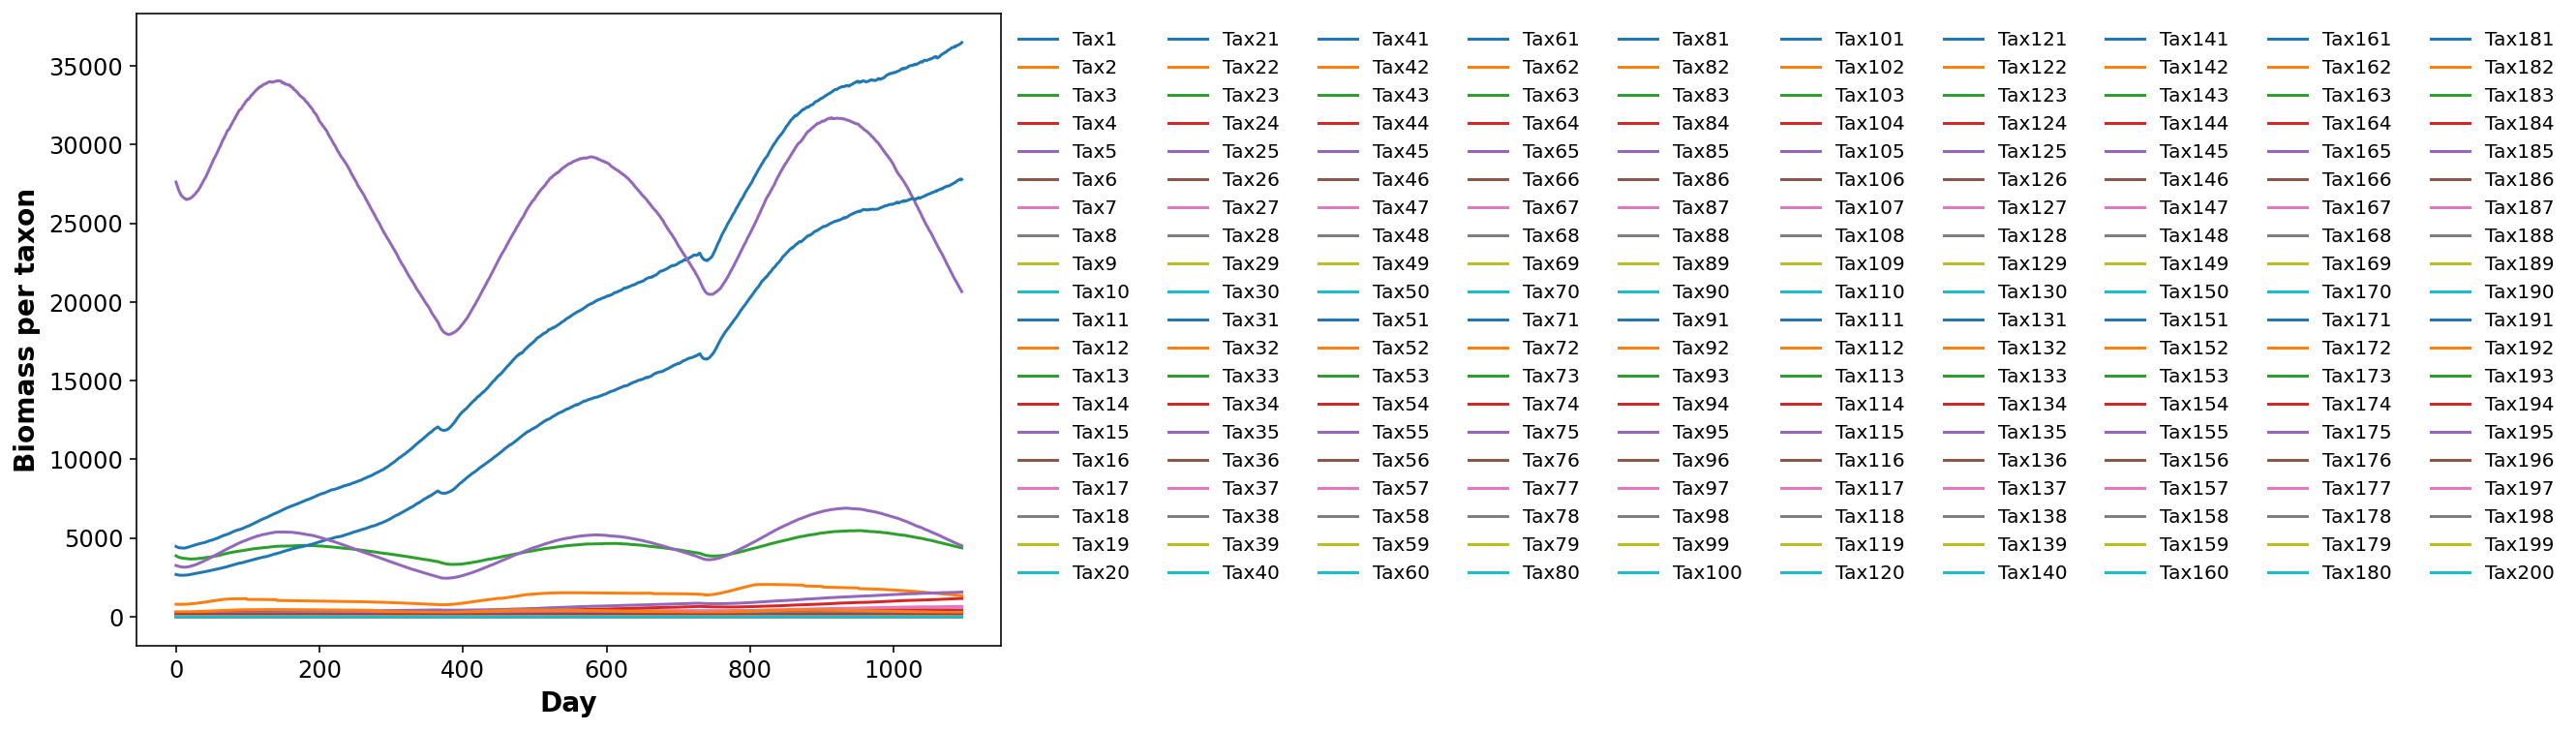

In [ ]:
MicrobesSeries = dump.MicrobesSeries

fig = MicrobesSeries.iloc[:,:].T.plot(fontsize=12,legend=False,figsize=(8,6))
fig.legend(bbox_to_anchor=(1, 1),ncol=10,frameon = False)
fig.set_xlabel('Day',size=14, weight = 'bold')
fig.set_ylabel('Biomass per taxon',size=14, weight = 'bold')
#fig.set_ylim(0,40000)

In [ ]:
# What are the taxa that grow the most: the 2 blue
# blue max = Tax 31
# blue 2nd = Tax 131 (double)
# purple = Tax 65
# purple 2nd = Tax 165 (double)
# green = Tax 23 (no double)
MicrobesSeries.loc['Tax31', 1095]

36492.20665422672

In [ ]:
dump.Table_correspondance

Sub_index Mon_index Mon_name
0                     0      Mon1      NH4
0                     0      Mon2      PO4
DeadMic            Sub1      Mon3  DeadMic
DeadEnz            Sub2      Mon4  DeadEnz
Cellulose          Sub3      Mon5     Mon3
Hemicellulose      Sub4      Mon6     Mon4
Starch             Sub5      Mon7     Mon5
Chitin             Sub6      Mon8     Mon6
Lignin             Sub7      Mon9     Mon7
Protein1           Sub8     Mon10     Mon8
Protein2           Sub9     Mon11     Mon9
Protein3          Sub10     Mon12    Mon10
OrgP1             Sub11     Mon13    Mon11
OrgP2             Sub12     Mon14    Mon12

In [ ]:
# Qui prend Protein 3 = Mon 12 : Tax 29, 76, 85, 93, 129, 176, 185, 193
Initialization = dump.Initialization
TaxProt3 = Initialization['TaxMon_final'].loc[:,'Mon12']
TaxProt3.loc[TaxProt3 != 0]

Tax5      1.0
Tax30     1.0
Tax105    1.0
Tax130    1.0
Name: Mon12, dtype: float32

In [ ]:
# Quelle est leur biomasse a tf? 
# RESIDENTS
# Tax 29: 0
# Tax 76: 270
# Tax 85: 20
# Tax 93: 8
# INVADERS
# Tax 129: 140
# Tax 176: 230
# Tax 185: 1750
# Tax 193: 18
MicrobesSeries.loc['Tax76', 1095]

272.23364021535053

In [ ]:
1190+235

1425

In [ ]:
# Et si je moyenne sur year 3
# RESIDENTS
# Tax 29: 0
# Tax 76: 220
# Tax 85: 20
# Tax 93: 9
# INVADERS
# Tax 129: 100
# Tax 176: 170
# Tax 185: 1200
# Tax 193: 16
MicrobesSeries.loc['Tax130', 731:1095].mean()

235.13530181586174

In [ ]:
# What monomers do Tax 31 and Tax 65 have access to ?
# Tax 31: Cellulose, Chitin, OrgP1
# Tax 65: Starch, OrgP2
Initialization = dump.Initialization
TaxMon = Initialization['TaxMon_final'].loc['Tax38']
TaxMon.loc[TaxMon != 0]

Mon1     1.0
Mon2     1.0
Mon10    1.0
Name: Tax38, dtype: float32

In [ ]:
# What are Tax74 enzymes : Enz 18, 43, 49
Initialization = dump.Initialization
EnzGenes = Initialization['EnzGenes'].loc['Tax74']
EnzGenes.loc[EnzGenes != 0]

Enz18    1.0
Enz43    1.0
Enz49    1.0
Name: Tax74, dtype: float32

In [ ]:
# Qu'est-ce que ces enzymes degradent ?
# Enz 18 ne degrade rien
# Enz 43 degrade Sub 8 = Protein 1
# Enz 49 degrade Sub 4 = Hemicellulose
Initialization = dump.Initialization
ReqEnz = Initialization['ReqEnz'].loc['set1',:]
ReqEnz2 = ReqEnz.iloc[0:12,:]
ReqEnz3 = ReqEnz2.loc[:,'Enz49']
ReqEnz3.loc[ReqEnz3 != 0]

Sub4    1.0
Name: Enz49, dtype: float32

In [ ]:
# Qu'est-ce que ces enzymes degradent : Mon 1, 2, 6, 10 = NH4, PO4, Hemicellulose, Protein 1
Initialization['TaxMon_final'].loc['Tax74']

In [ ]:
# Quels sont les taxa invaders qui croient fortement : Tax 129, Tax 174
# Quels enzymes a Tax 129 : Enz 54, 74, 100
# Quels enzymes a Tax 174 : Enz 68, 93, 99

In [ ]:
# Decay year 3
DecayRatesSeries = dump.DecayRatesSeries
Decay_Prot3 = DecayRatesSeries.iloc[9:10,731:]
Decay_Prot3.mean(axis=1)

Protein3    0.000959
dtype: float64

# ***** Pickle: NoInv

In [ ]:
#load in data (NoInv- seed 6)
with open("10568888.pickle", "rb") as f:
    dump = pickle5.load(f)

Output_variables = vars(dump).keys()
Output_variables

dict_keys(['Runtime', 'Initialization', 'SubstratesSeries', 'DecayRatesSeries', 'MicrobesSeries', 'TotalBiomass_PerYear', 'decay_results', 'decay_results_firstcolumns', 'decay_results_persubstrate', 'Table_correspondance', 'SubX_list', 'DecayRates_Grid_Time', 'DecayRates_Grid_Time_Substrate', 'ntaxa_decomp_tf', 'decay_results_persubstrate_final', 'decay_results_Sub'])

(0.0, 6000.0)

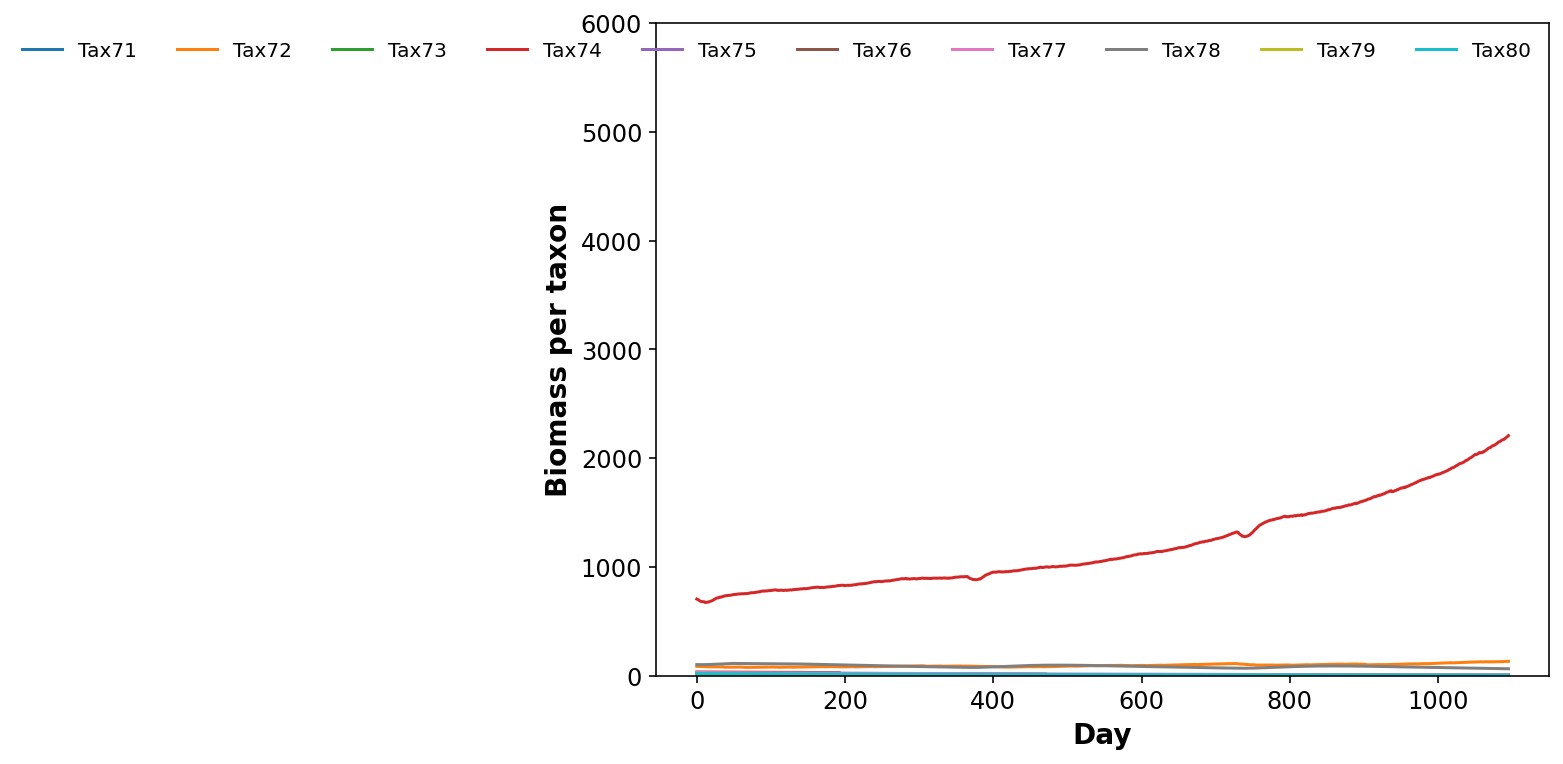

In [ ]:
MicrobesSeries = dump.MicrobesSeries

fig = MicrobesSeries.iloc[70:80,:].T.plot(fontsize=12,legend=False,figsize=(8,6))
fig.legend(bbox_to_anchor=(1, 1),ncol=10,frameon = False)
fig.set_xlabel('Day',size=14, weight = 'bold')
fig.set_ylabel('Biomass per taxon',size=14, weight = 'bold')
fig.set_ylim(0,6000)

In [ ]:
# What are Tax74 enzymes?
Initialization = dump.Initialization
EnzGenes = Initialization['EnzGenes'].loc['Tax74']
EnzGenes.loc[EnzGenes != 0]

Enz18    1.0
Enz43    1.0
Enz49    1.0
Name: Tax74, dtype: float32

In [ ]:
dump.decay_results_persubstrate

decay_year_1  decay_year_2  decay_year_3
DeadMic        1.558876e-05  3.057445e-05  6.339935e-05
DeadEnz        6.747704e-08  1.977934e-08  3.880242e-09
Cellulose      1.179505e-04  1.062394e-04  9.003484e-05
Hemicellulose  2.267349e-04  3.985937e-04  7.516068e-04
Starch         1.364993e-04  9.291435e-05  7.140405e-05
Chitin         1.511447e-05  5.221459e-06  1.989882e-06
Lignin         6.604565e-03  1.081635e-02  2.028702e-02
Protein1       7.372241e-04  1.365652e-03  2.799711e-03
Protein2       1.705063e-05  8.934470e-06  4.450973e-06
Protein3       4.088070e-04  6.541150e-04  9.586425e-04
OrgP1          9.396375e-04  1.285955e-03  1.722455e-03
OrgP2          0.000000e+00  0.000000e+00  0.000000e+00

# ***** Check: that abundance of protein degraders in the same in resident communities at t0

In [ ]:
# t0
table_t0 = pd.read_csv('specialists_t0_combined_220218.csv')
table_t0_N = table_t0[(table_t0["final_litter"] == 'A') & (table_t0["residents"] == 'ResD') & (table_t0["substrate"] == 'Protein3')]
# Build dataframe
col1 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvA')]["abund_rel_specialist_res_res_t0"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_res_res_t0": "Inv-D"})
col2 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvB')]["abund_rel_specialist_res_res_t0"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_res_res_t0": "Inv-Sc"})
col3 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvC')]["abund_rel_specialist_res_res_t0"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_res_res_t0": "Inv-G"})
col4 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvD')]["abund_rel_specialist_res_res_t0"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_res_res_t0": "Inv-Po"})
col5 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvE')]["abund_rel_specialist_res_res_t0"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_res_res_t0": "Inv-Sa"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5],axis=1)
Table_for_plot

Inv-D    Inv-Sc     Inv-G    Inv-Po    Inv-Sa
0  0.077078  0.077078  0.060329  0.060329  0.015622
1  0.000000  0.005237  0.026733  0.026733  0.062168
2  0.000087  0.005837  0.000087  0.000000  0.005237
3  0.034142  0.015622  0.034142  0.000087  0.005837
4  0.015622  0.062168  0.077078  0.034142  0.000000
5  0.062168  0.000087  0.000000  0.015622  0.000087
6  0.005237  0.034142  0.005237  0.062168  0.077078
7  0.005837  0.000000  0.005837  0.005237  0.034142
8  0.060329  0.060329  0.015622  0.005837  0.060329
9  0.026733  0.026733  0.062168  0.077078  0.026733

Text(0.5, 0, '')

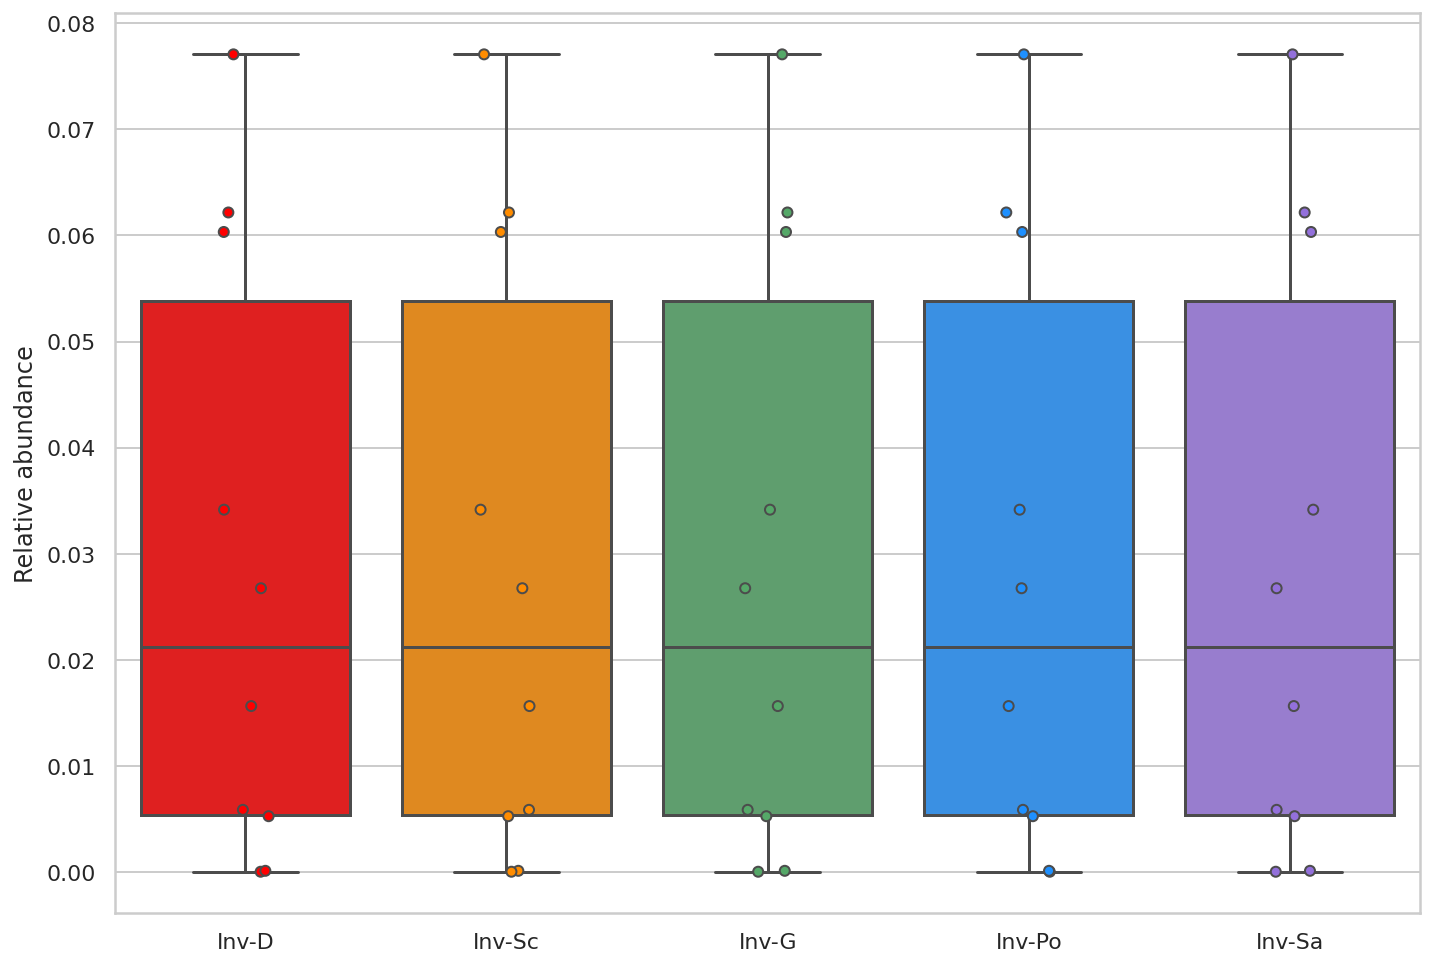

In [ ]:
# Boxplot
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"Inv-D":"red", "Inv-Sc":"darkorange", "Inv-G":"g",
          "Inv-Po":"dodgerblue", "Inv-Sa":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
ax.set_ylabel('Relative abundance')
ax.set_xlabel('')
#ax.set(ylim=(0, 3e-4))

# ***** Check: How do res+inv at t0 differ between dispersal treatments?

In [ ]:
# t0
table_t0 = pd.read_csv('specialists_t0_combined_220218.csv')
table_t0_N = table_t0[(table_t0["final_litter"] == 'A') & (table_t0["residents"] == 'ResD') & (table_t0["substrate"] == 'Protein3')]
# Build dataframe
col1 = table_t0_N.loc[(table_t0_N['invaders'] == 'NoInv')]["abund_rel_specialist_t0"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_t0": "NoInv"})
col2 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvA')]["abund_rel_specialist_t0"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_t0": "Inv-D"})
col3 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvB')]["abund_rel_specialist_t0"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_t0": "Inv-Sc"})
col4 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvC')]["abund_rel_specialist_t0"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_t0": "Inv-G"})
col5 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvD')]["abund_rel_specialist_t0"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_t0": "Inv-Po"})
col6 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvE')]["abund_rel_specialist_t0"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_t0": "Inv-Sa"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6],axis=1)
Table_for_plot

NoInv     Inv-D    Inv-Sc     Inv-G    Inv-Po    Inv-Sa
0  0.034142  0.068124  0.056810  0.102884  0.071794  0.015137
1  0.000087  0.001726  0.028557  0.045193  0.025249  0.079469
2  0.000000  0.006826  0.020083  0.007041  0.000000  0.007020
3  0.005837  0.067288  0.017713  0.066088  0.000086  0.007664
4  0.005237  0.018225  0.102279  0.064768  0.028197  0.000000
5  0.062168  0.110986  0.010562  0.005178  0.014823  0.000140
6  0.015622  0.029930  0.069695  0.025682  0.064896  0.065457
7  0.026733  0.014599  0.004968  0.016200  0.005636  0.030491
8  0.060329  0.114006  0.111224  0.018650  0.005632  0.080519
9  0.077078  0.036982  0.040766  0.096499  0.065467  0.025148

[(0.0, 0.25)]

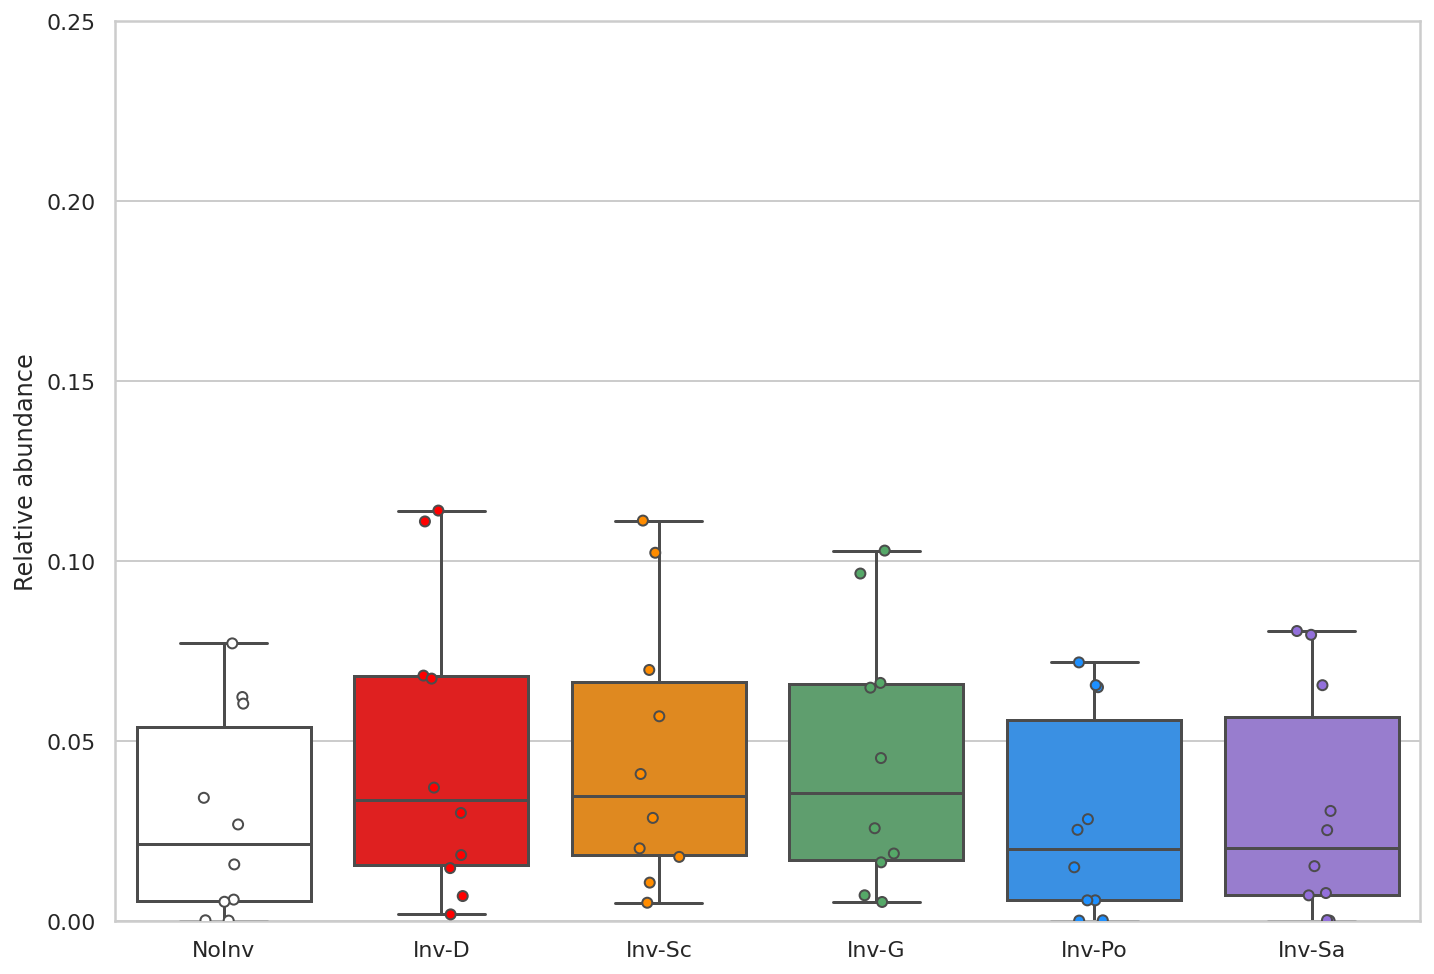

In [ ]:
# Boxplot
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"NoInv":"w", "Inv-D":"red", "Inv-Sc":"darkorange", "Inv-G":"g",
          "Inv-Po":"dodgerblue", "Inv-Sa":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
ax.set_ylabel('Relative abundance')
ax.set_xlabel('')
ax.set(ylim=(0, 0.25))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "abundance"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[1],anov_df_T[4]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('abundance ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

             sum_sq    df         F    PR(>F)
treatment  0.001747   1.0  1.378932  0.255586
Residual   0.022802  18.0       NaN       NaN


# ***** Work on Figure 4c (relative abundance of protein degraders in the disperser communities at t0)

In [ ]:
# t0
table_t0 = pd.read_csv('specialists_t0_combined_220218.csv')
table_t0_N = table_t0[(table_t0["final_litter"] == 'A') & (table_t0["residents"] == 'ResD') & (table_t0["substrate"] == 'Protein3')]
# Build dataframe
col1 = table_t0_N.loc[(table_t0_N['invaders'] == 'NoInv')]["abund_rel_specialist_inv_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_inv_inv_t0": "NoInv"})
col2 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvA')]["abund_rel_specialist_inv_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_inv_inv_t0": "Inv-D"})
col3 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvB')]["abund_rel_specialist_inv_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_inv_inv_t0": "Inv-Sc"})
col4 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvC')]["abund_rel_specialist_inv_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_inv_inv_t0": "Inv-G"})
col5 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvD')]["abund_rel_specialist_inv_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_inv_inv_t0": "Inv-Po"})
col6 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvE')]["abund_rel_specialist_inv_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_inv_inv_t0": "Inv-Sa"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6],axis=1)
Table_for_plot['NoInv'] = Table_for_plot['NoInv'].fillna(0)
Table_for_plot

NoInv     Inv-D    Inv-Sc     Inv-G    Inv-Po    Inv-Sa
0    0.0  0.050044  0.005440  0.192967  0.100421  0.013988
1    0.0  0.005918  0.097868  0.080438  0.022092  0.122412
2    0.0  0.040230  0.061938  0.038848  0.000000  0.011121
3    0.0  0.129373  0.022213  0.124192  0.000084  0.011949
4    0.0  0.025185  0.210581  0.033790  0.013548  0.000000
5    0.0  0.223258  0.046949  0.016616  0.012849  0.000279
6    0.0  0.090866  0.132289  0.081350  0.071765  0.033304
7    0.0  0.037381  0.016213  0.049920  0.006603  0.021523
8    0.0  0.222821  0.215032  0.026326  0.005102  0.126170
9    0.0  0.056293  0.068692  0.192696  0.032859  0.021936

Text(0.5, 0, '')

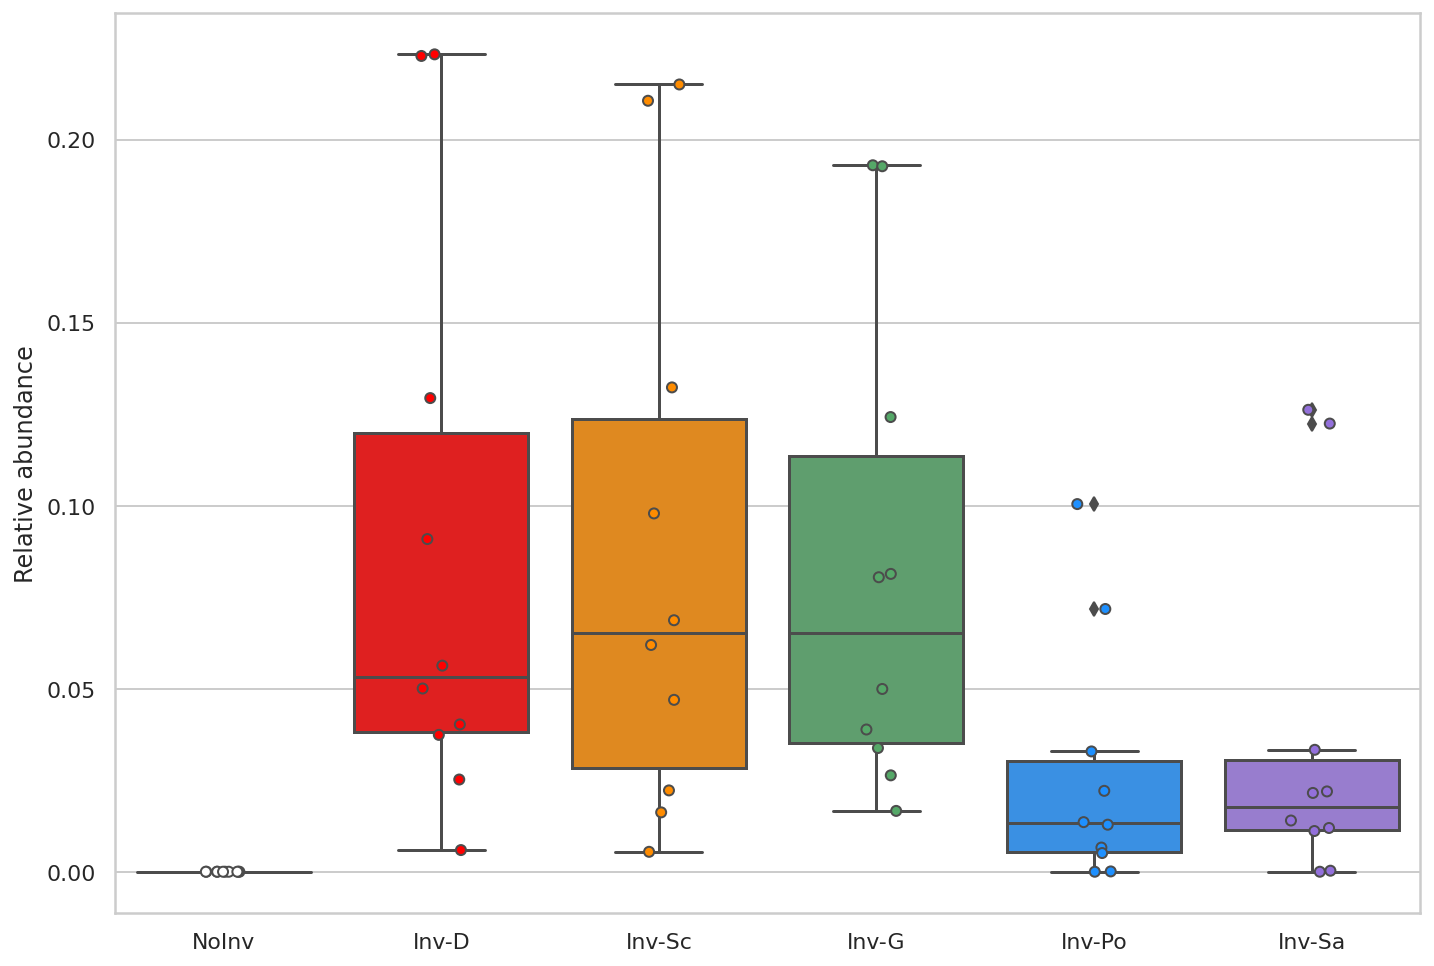

In [ ]:
# Boxplot
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"NoInv":"w", "Inv-D":"red", "Inv-Sc":"darkorange", "Inv-G":"g",
          "Inv-Po":"dodgerblue", "Inv-Sa":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
ax.set_ylabel('Relative abundance')
ax.set_xlabel('')
#ax.set(ylim=(0, 3e-4))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "abundance"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[1],anov_df_T[4]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('abundance ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

             sum_sq    df         F    PR(>F)
treatment  0.018976   1.0  5.148203  0.035803
Residual   0.066346  18.0       NaN       NaN


# ***** Work on Figure 4b - pick year (same without t0)

In [ ]:
# For year 1
table_y1 = pd.read_csv('specialists_year3_combined_220218.csv')
table_y1_N = table_y1[(table_y1["final_litter"] == 'A') & (table_y1["residents"] == 'ResD') & (table_y1["substrate"] == 'Protein3')]
# Build dataframe
col1 = table_y1_N.loc[(table_y1_N['invaders'] == 'NoInv')]["abund_rel_specialist_tf"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_tf": "NoInv"})
col2 = table_y1_N.loc[(table_y1_N['invaders'] == 'InvA')]["abund_rel_specialist_tf"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_tf": "Inv-D"})
col3 = table_y1_N.loc[(table_y1_N['invaders'] == 'InvB')]["abund_rel_specialist_tf"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_tf": "Inv-Sc"})
col4 = table_y1_N.loc[(table_y1_N['invaders'] == 'InvC')]["abund_rel_specialist_tf"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_tf": "Inv-G"})
col5 = table_y1_N.loc[(table_y1_N['invaders'] == 'InvD')]["abund_rel_specialist_tf"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_tf": "Inv-Po"})
col6 = table_y1_N.loc[(table_y1_N['invaders'] == 'InvE')]["abund_rel_specialist_tf"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_tf": "Inv-Sa"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6],axis=1)
Table_for_plot

NoInv     Inv-D    Inv-Sc     Inv-G    Inv-Po    Inv-Sa
0  0.023140  0.223921  0.144213  0.011153  0.047749  0.131293
1  0.141950  0.051105  0.206289  0.055654  0.152274  0.031944
2  0.001650  0.029111  0.056535  0.041617  0.000631  0.155894
3  0.000588  0.162435  0.027930  0.163450  0.004708  0.000000
4  0.222023  0.017335  0.107415  0.020557  0.000000  0.000000
5  0.060199  0.051563  0.000000  0.164013  0.000000  0.053918
6  0.084718  0.000000  0.021760  0.066005  0.038651  0.049308
7  0.000000  0.018112  0.056751  0.000000  0.111486  0.163164
8  0.000000  0.104509  0.039788  0.177350  0.037009  0.000654
9  0.198754  0.107044  0.158665  0.039414  0.147983  0.010641

Text(0.5, 0, '')

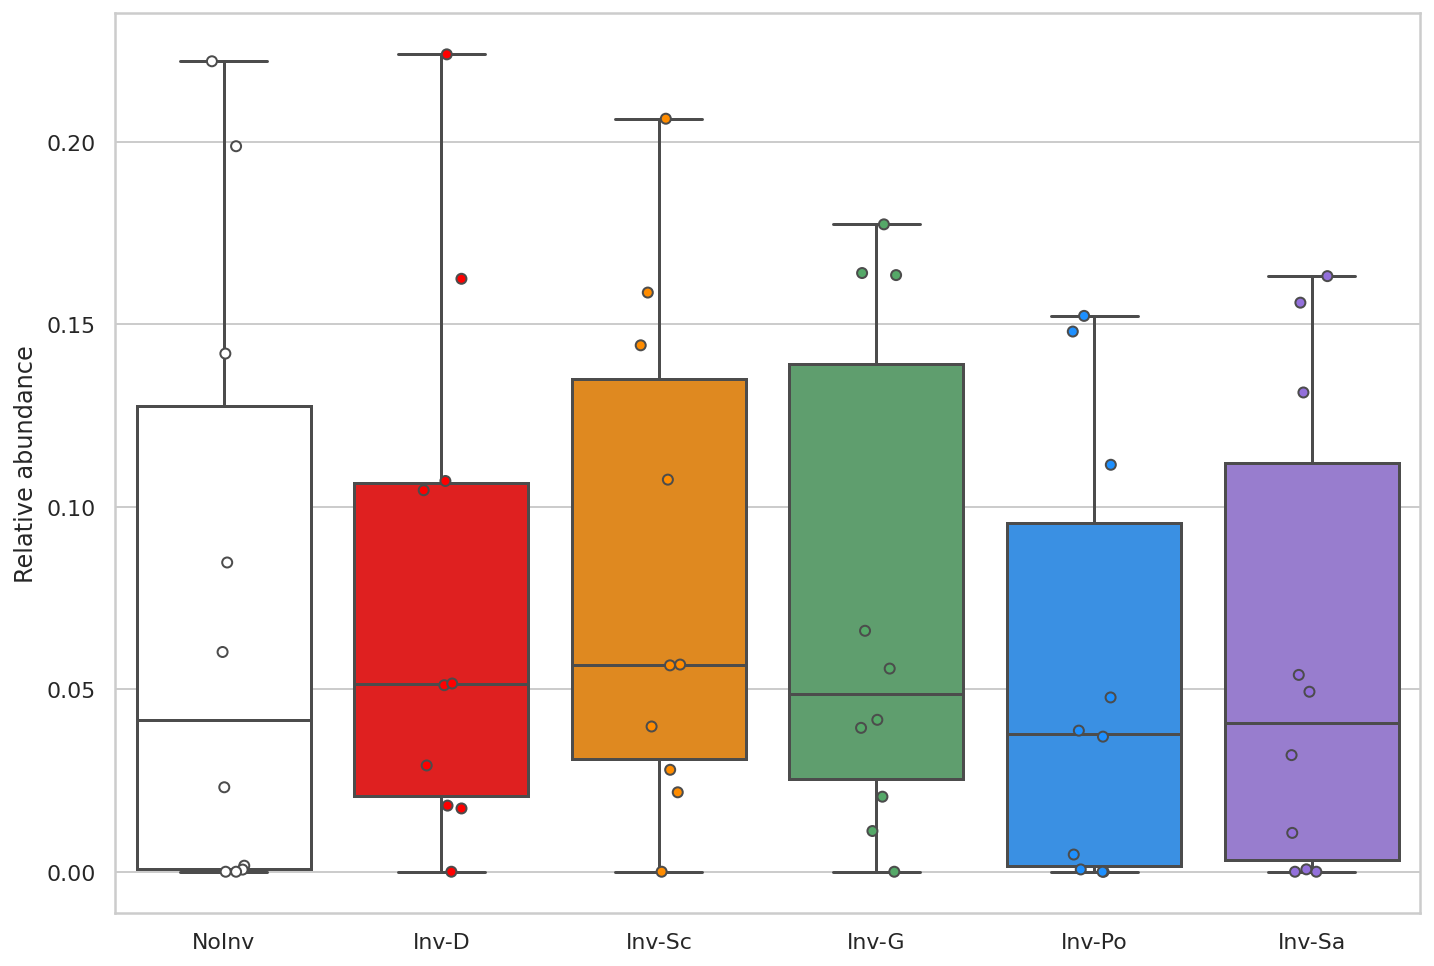

In [ ]:
# Boxplot
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"NoInv":"w",  "Inv-D":"red", "Inv-Sc":"darkorange", "Inv-G":"g",
          "Inv-Po":"dodgerblue", "Inv-Sa":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
ax.set_ylabel('Relative abundance')
ax.set_xlabel('')
#ax.set(ylim=(0, 3e-4))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "abundance"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[0],anov_df_T[1]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('abundance ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

             sum_sq    df         F    PR(>F)
treatment  0.000052   1.0  0.008166  0.928994
Residual   0.113664  18.0       NaN       NaN


# ********* Work on Figure 4b year 1 (relative abundance of protein degraders in res+inv community, t0 vs tf with the 6 dispersal treatments) 

In [ ]:
table_yN_XtoX = table_yN[(table_yN["final_litter"] == 'A') & (table_yN["residents"] == 'ResD')]
table_yN_N_Inv = table_yN_XtoX.loc[(table_yN_XtoX['invaders'] == 'InvA') & (table_yN_XtoX['treatment_name'] == 'phase2ADA333')]
df = table_yN_N_Inv.iloc[:,9:11]
df

substrate  abund_rel_specialist_tf
374        Protein2                 0.000097
658           OrgP1                 0.664220
748         DeadEnz                 0.000185
808          Chitin                 0.664220
939        Protein3                 0.018112
980       Cellulose                 0.664220
1432         Lignin                 0.007084
1508          OrgP2                 0.291582
1699       Protein1                 0.024847
1747        DeadMic                 0.000000
1832         Starch                 0.292382
1919  Hemicellulose                 0.000000

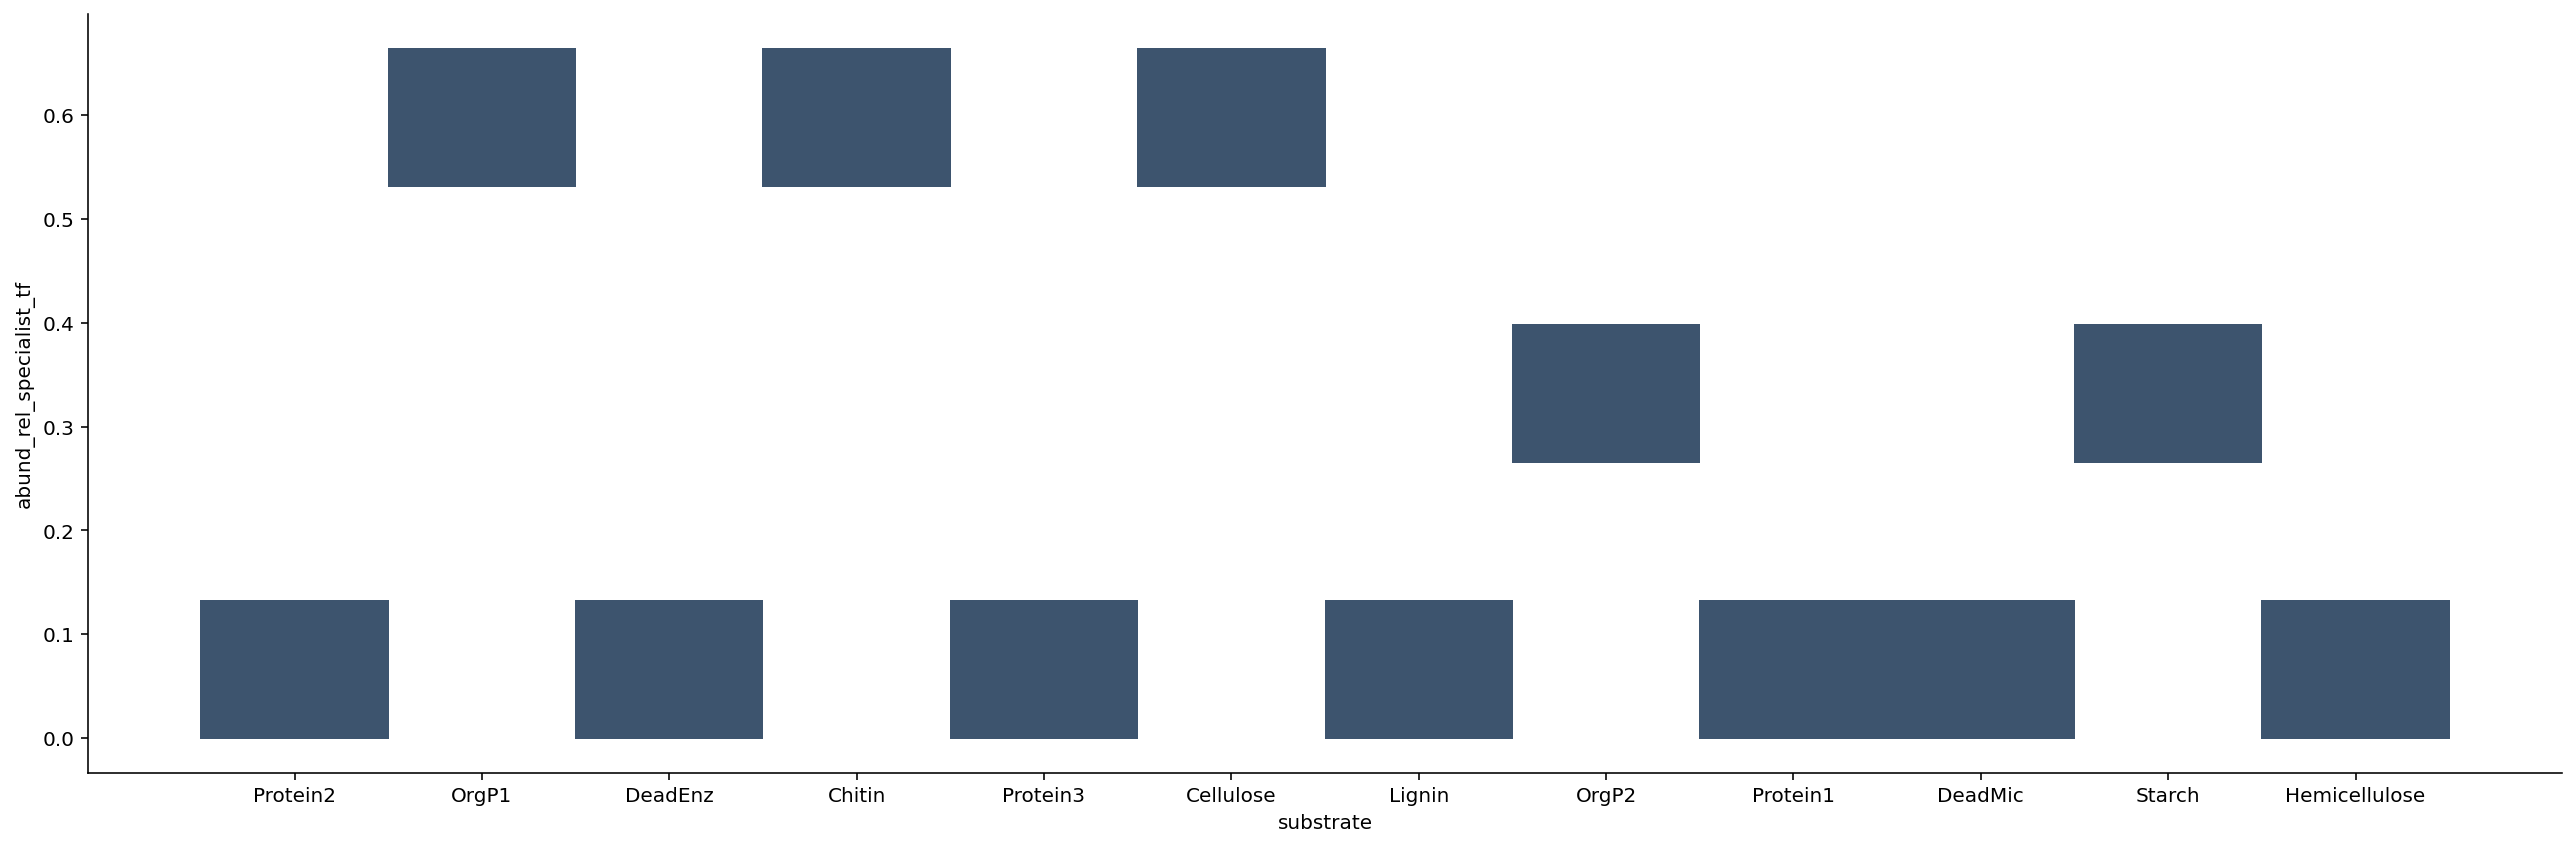

In [ ]:
import seaborn as sns
sns.displot(df,x='substrate', y='abund_rel_specialist_tf', height=6, aspect=3)

TypeError: ignored

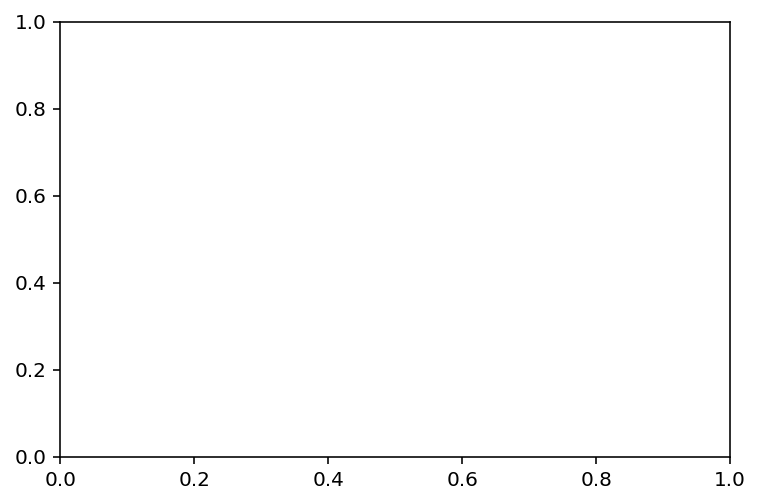

In [ ]:
import matplotlib.pyplot as plt
plt.hist(table_yN_N_Inv.loc[:,'abund_rel_specialist_tf'])
plt.show()

In [ ]:
# t0
table_t0 = pd.read_csv('specialists_t0_combined_220218.csv')
table_t0_N = table_t0[(table_t0["final_litter"] == 'A') & (table_t0["residents"] == 'ResD') & (table_t0["substrate"] == 'Protein3') & (table_t0["invaders"] == 'NoInv')]
#I want: abund_rel_specialist_res_res_t0
# For year 3
table_yN = pd.read_csv('specialists_year3_combined_220218.csv')
table_yN_N = table_yN[(table_yN["final_litter"] == 'A') & (table_yN["residents"] == 'ResD') & (table_yN["substrate"] == 'Protein3')]
# Build dataframe
col1 = table_t0_N["abund_rel_specialist_res_res_t0"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_res_res_t0": "t0"})
col2 = table_yN_N.loc[(table_yN_N['invaders'] == 'NoInv')]["abund_rel_specialist_tf"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_tf": "NoInv"})
col3 = table_yN_N.loc[(table_yN_N['invaders'] == 'InvA')]["abund_rel_specialist_tf"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_tf": "Inv-D"})
col4 = table_yN_N.loc[(table_yN_N['invaders'] == 'InvB')]["abund_rel_specialist_tf"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_tf": "Inv-Sc"})
col5 = table_yN_N.loc[(table_yN_N['invaders'] == 'InvC')]["abund_rel_specialist_tf"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_tf": "Inv-G"})
col6 = table_yN_N.loc[(table_yN_N['invaders'] == 'InvD')]["abund_rel_specialist_tf"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_tf": "Inv-Po"})
col7 = table_yN_N.loc[(table_y1_N['invaders'] == 'InvE')]["abund_rel_specialist_tf"].to_frame().reset_index(drop=True).rename(columns={"abund_rel_specialist_tf": "Inv-Sa"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
Table_for_plot

t0     NoInv     Inv-D    Inv-Sc     Inv-G    Inv-Po    Inv-Sa
0  0.034142  0.023140  0.223921  0.144213  0.011153  0.047749  0.131293
1  0.000087  0.141950  0.051105  0.206289  0.055654  0.152274  0.031944
2  0.000000  0.001650  0.029111  0.056535  0.041617  0.000631  0.155894
3  0.005837  0.000588  0.162435  0.027930  0.163450  0.004708  0.000000
4  0.005237  0.222023  0.017335  0.107415  0.020557  0.000000  0.000000
5  0.062168  0.060199  0.051563  0.000000  0.164013  0.000000  0.053918
6  0.015622  0.084718  0.000000  0.021760  0.066005  0.038651  0.049308
7  0.026733  0.000000  0.018112  0.056751  0.000000  0.111486  0.163164
8  0.060329  0.000000  0.104509  0.039788  0.177350  0.037009  0.000654
9  0.077078  0.198754  0.107044  0.158665  0.039414  0.147983  0.010641

In [ ]:
table_y1_N.loc[table_y1_N['invaders'] == 'InvA']

Unnamed: 0  ...  abund_rel_specialist_inv_frac_tf
63            63  ...                          0.000000
101          101  ...                          0.102761
151          151  ...                          0.024368
269          269  ...                          0.017305
372          372  ...                          0.000751
432          432  ...                          0.011127
513          513  ...                          0.050701
582          582  ...                          0.105270
622          622  ...                          0.022066
1276        1276  ...                          0.021074

[10 rows x 13 columns]

Text(0.5, 0, '')

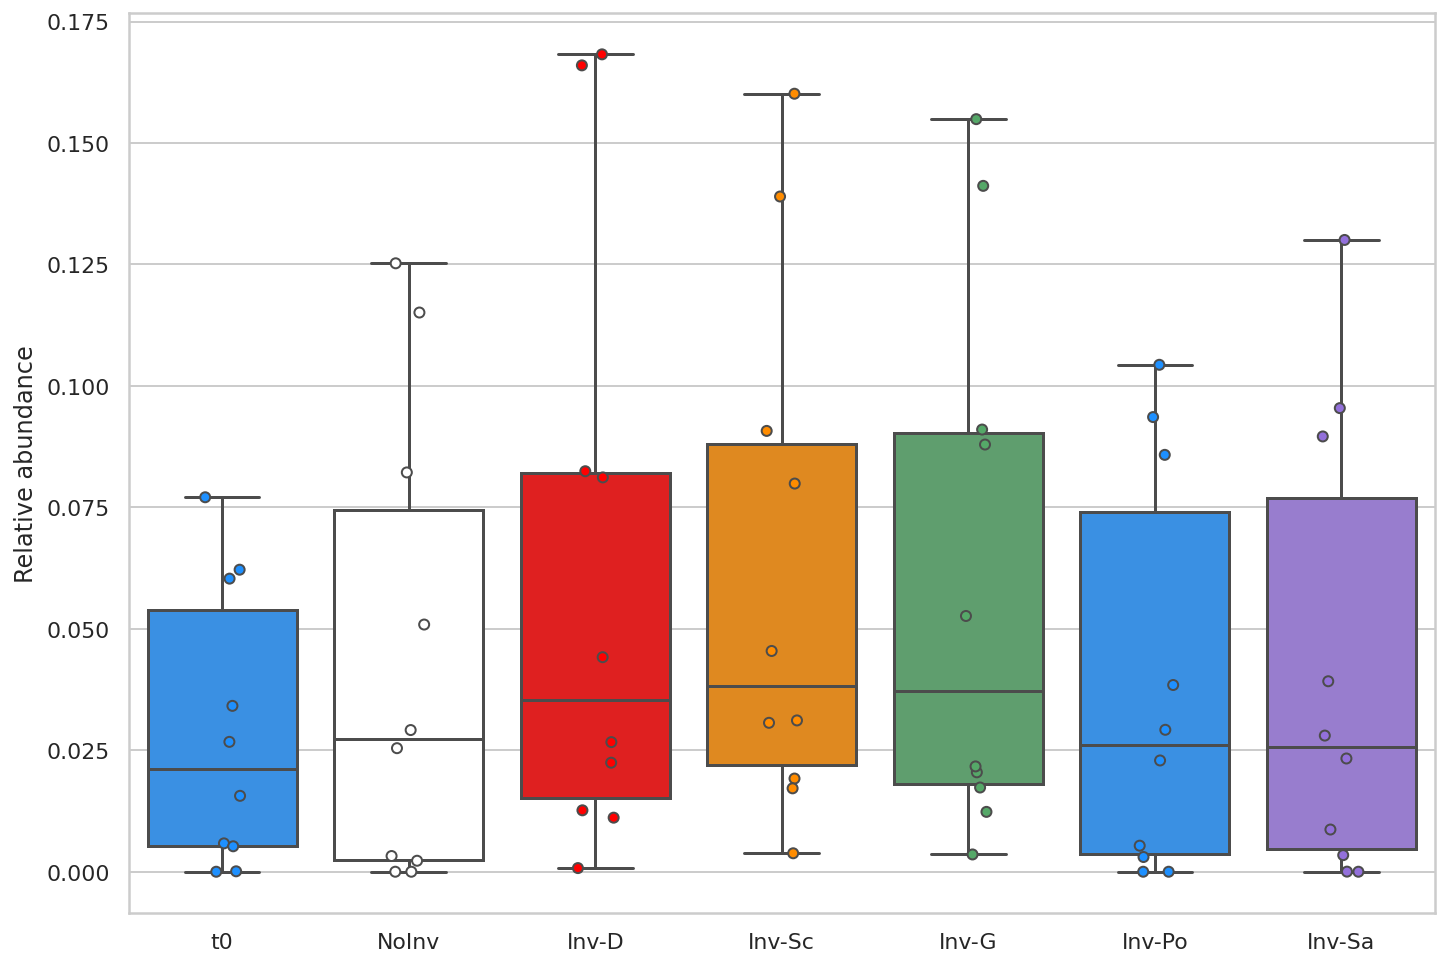

In [ ]:
# Boxplot
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"t0":"dodgerblue", "NoInv":"w",  "Inv-D":"red", "Inv-Sc":"darkorange", "Inv-G":"g",
          "Inv-Po":"dodgerblue", "Inv-Sa":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
ax.set_ylabel('Relative abundance')
ax.set_xlabel('')
#ax.set(ylim=(0, 3e-4))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "decay"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[1],anov_df_T[2]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('decay ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

             sum_sq    df         F    PR(>F)
treatment  0.001658   1.0  0.535129  0.473875
Residual   0.055785  18.0       NaN       NaN


# ********* Tests with extinction data files

In [ ]:
extinction_phase1 = pd.read_csv('Extinction_round1.csv')
extinction_t0 = extinction_phase1.loc[(extinction_phase1["final_litter"] == 'E')]
extinction_t0

Empty DataFrame
Columns: [Unnamed: 0, Unnamed: 0.1, treatment_name, final_litter, residents, invaders, enz_max, seed_number, pulse, substrate, perc_ntaxa_decomp_survived, perc_ntaxa_non_decomp_survived, long_term_growth_rate_decomp, long_term_growth_rate_non_decomp]
Index: []

In [ ]:
extinction_1 = pd.read_csv('Extinction_phase2_finish_table_round1.csv')
extinction_2 = pd.read_csv('Extinction_phase2_finish_table_round2.csv')
extinction_3 = pd.read_csv('Extinction_phase2_finish_table_round3.csv')
extinction_4 = pd.read_csv('Extinction_round2.csv')

extinction_data = pd.concat([extinction_1,extinction_2,extinction_3,extinction_4])
extinction_df = extinction_data.loc[(extinction_data["final_litter"] == 'A')  & (extinction_data['residents'] == 'ResD')  & (extinction_data['substrate'] == 'Protein3')]
extinction_df.head()

Unnamed: 0  ...  long_term_growth_rate_non_decomp
141         141  ...                          0.000210
155         155  ...                          0.000270
212         212  ...                          0.000501
226         226  ...                         -0.000454
358         358  ...                         -0.000332

[5 rows x 14 columns]

In [ ]:
# Build dataframe

col2 = extinction_df.loc[extinction_df['invaders'] == 'NoInv']["perc_ntaxa_decomp_survived"].to_frame().reset_index(drop=True).rename(columns={"perc_ntaxa_decomp_survived": "NoInv"})
col3 = extinction_df.loc[extinction_df['invaders'] == 'InvA']["perc_ntaxa_decomp_survived"].to_frame().reset_index(drop=True).rename(columns={"perc_ntaxa_decomp_survived": "D"})
col4 = extinction_df.loc[extinction_df['invaders'] == 'InvB']["perc_ntaxa_decomp_survived"].to_frame().reset_index(drop=True).rename(columns={"perc_ntaxa_decomp_survived": "Sc"})
col5 = extinction_df.loc[extinction_df['invaders'] == 'InvC']["perc_ntaxa_decomp_survived"].to_frame().reset_index(drop=True).rename(columns={"perc_ntaxa_decomp_survived": "G"})
col6 = extinction_df.loc[extinction_df['invaders'] == 'InvD']["perc_ntaxa_decomp_survived"].to_frame().reset_index(drop=True).rename(columns={"perc_ntaxa_decomp_survived": "Po"})
col7 = extinction_df.loc[extinction_df['invaders'] == 'InvE']["perc_ntaxa_decomp_survived"].to_frame().reset_index(drop=True).rename(columns={"perc_ntaxa_decomp_survived": "Sa"})

Table_for_plot = pd.concat([col2,col3,col4,col5,col6,col7],axis=1)
Table_for_plot

NoInv           D          Sc           G          Po          Sa
0    0.000000   50.000000   87.500000   50.000000   75.000000   50.000000
1   66.666667    0.000000  100.000000   87.500000  100.000000  100.000000
2         NaN  100.000000   62.500000  100.000000  100.000000   87.500000
3   33.333333   66.666667   50.000000   71.428571         NaN   57.142857
4   66.666667   62.500000  100.000000   66.666667   80.000000         NaN
5   50.000000   50.000000   66.666667    0.000000    0.000000   57.142857
6  100.000000   87.500000    0.000000   87.500000   50.000000    0.000000
7   50.000000  100.000000  100.000000  100.000000  100.000000   87.500000
8  100.000000  100.000000  100.000000   62.500000   50.000000  100.000000
9   75.000000  100.000000   40.000000   50.000000   33.333333   75.000000

Text(0.5, 0, '')

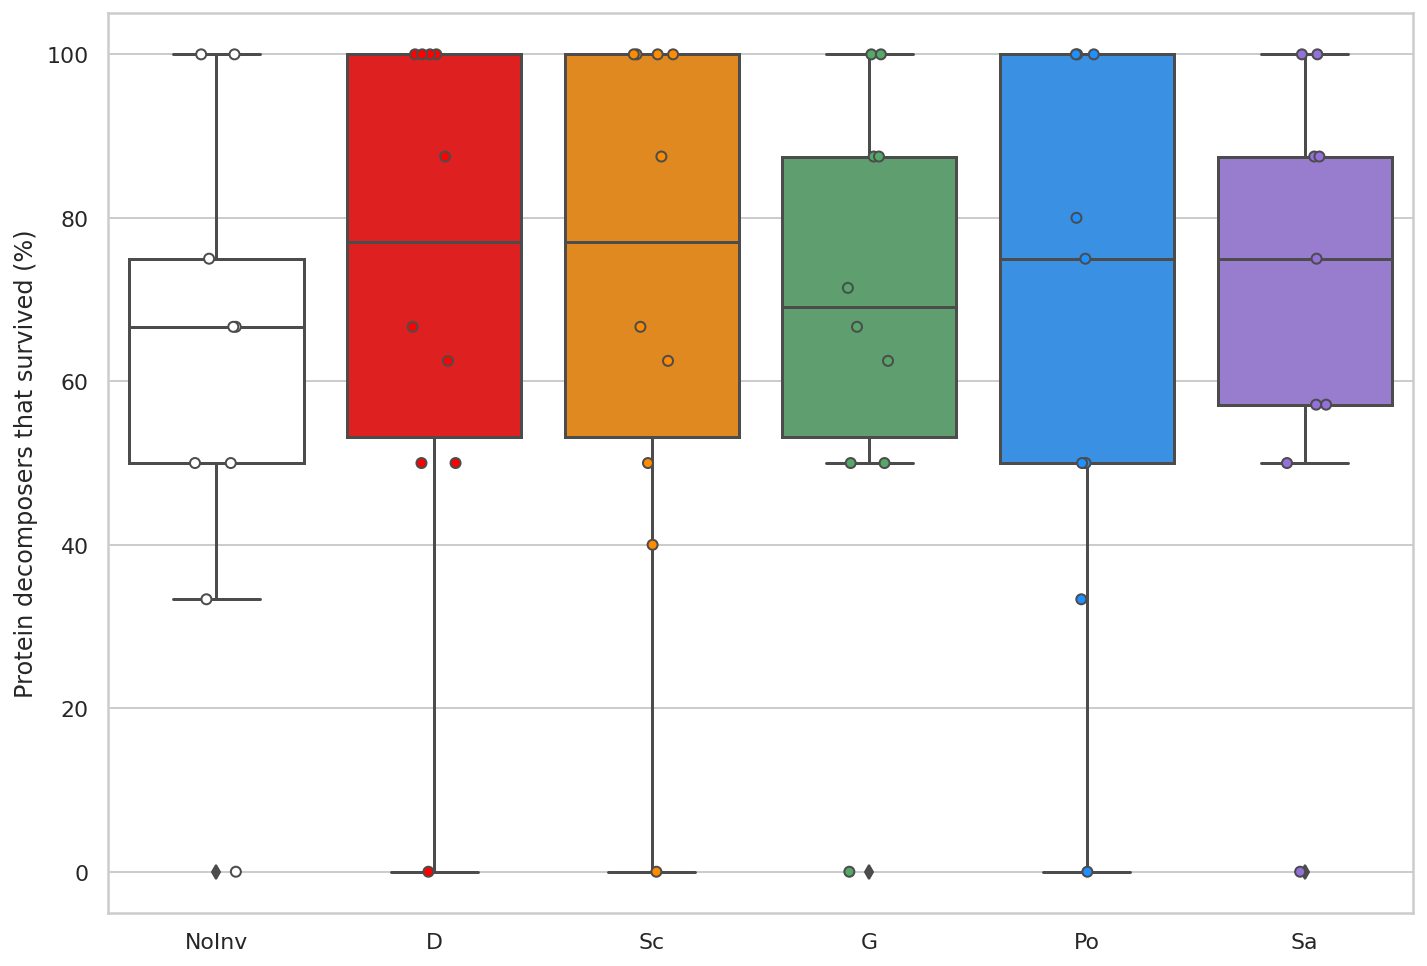

In [ ]:
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"NoInv":"w",  "D":"red", "Sc":"darkorange", "G":"g",
          "Po":"dodgerblue", "Sa":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Protein decomposers that survived (%)')
ax.set_xlabel('')
#ax.set(ylim=(0, 3e-4))

# ********* Work on Figure 4a - with new simulations

In [ ]:
phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvA']

Unnamed: 0  Unnamed: 0.1  ...  decay_year_2 decay_year_3
369          369             0  ...  4.878551e-05     0.000042
405          405             0  ...  6.541150e-04     0.000959
417          417             0  ...  6.330699e-07     0.000000
969          969             0  ...  6.903627e-06     0.000007
1017        1017             0  ...  1.387136e-04     0.000118
1221        1221             0  ...  1.040415e-04     0.000141
1257        1257             0  ...  9.507012e-04     0.001685
1485        1485             0  ...  3.086496e-05     0.000029
1677        1677             0  ...  9.794305e-05     0.000078
1761        1761             0  ...  7.425830e-04     0.001357

[10 rows x 12 columns]

In [ ]:
# Using 220218 simulations
# Table phase 1
phase11 = pd.read_csv('Decay_results_persubstrate_persubstrate_phase1.csv')
phase12 = pd.read_csv('Decay_results_persubstrate_persubstrate_phase1_BE.csv')
phase1 = pd.concat([phase11,phase12])
# Table phase 2
phase2 = pd.read_csv('decay_results_persubstrate_combined_220218.csv')
# Pick substrate
phase1_enzmax3 = phase1.loc[(phase1["enz_max"] == 3)  & (phase1['substrate'] == 'Protein3')]
phase2_enzmax3  = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResD') & (phase2["substrate"] == 'Protein3')]
# Boxplots for hypothesis 1
import seaborn as sns
# Build dataframe
col1 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'D']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po-P1"})
col2 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'NoInv']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "NoInv"})
col3 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvA']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Inv-D"})
col4 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvB']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Inv-Sc"})
col5 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvC']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Inv-G"})
col6 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvD']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Inv-Po"})
col7 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvE']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Inv-Sa"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
Table_for_plot

Po-P1     NoInv     Inv-D    Inv-Sc     Inv-G    Inv-Po    Inv-Sa
0  7.325179e-06  0.000029  0.000042  0.000010  0.000010  0.000029  0.000010
1  8.764838e-06  0.000018  0.000959  0.000098  0.000105  0.000009  0.000000
2  4.692811e-06  0.000027  0.000000  0.000046  0.000044  0.000000  0.000019
3  1.154772e-05  0.000008  0.000007  0.000001  0.000001  0.000015  0.000155
4  1.964005e-05  0.000000  0.000118  0.000837  0.000800  0.000069  0.000742
5  3.336990e-05  0.000023  0.000141  0.000033  0.001399  0.000503  0.000000
6  4.113640e-07  0.000011  0.001685  0.001705  0.000055  0.000000  0.000023
7  8.222282e-06  0.000496  0.000029  0.000061  0.000033  0.000026  0.000026
8  5.332762e-06  0.000000  0.000078  0.002682  0.001871  0.000019  0.000011
9  2.023697e-06  0.000014  0.001357  0.000165  0.000093  0.000011  0.000029

[(0.0, 0.003)]

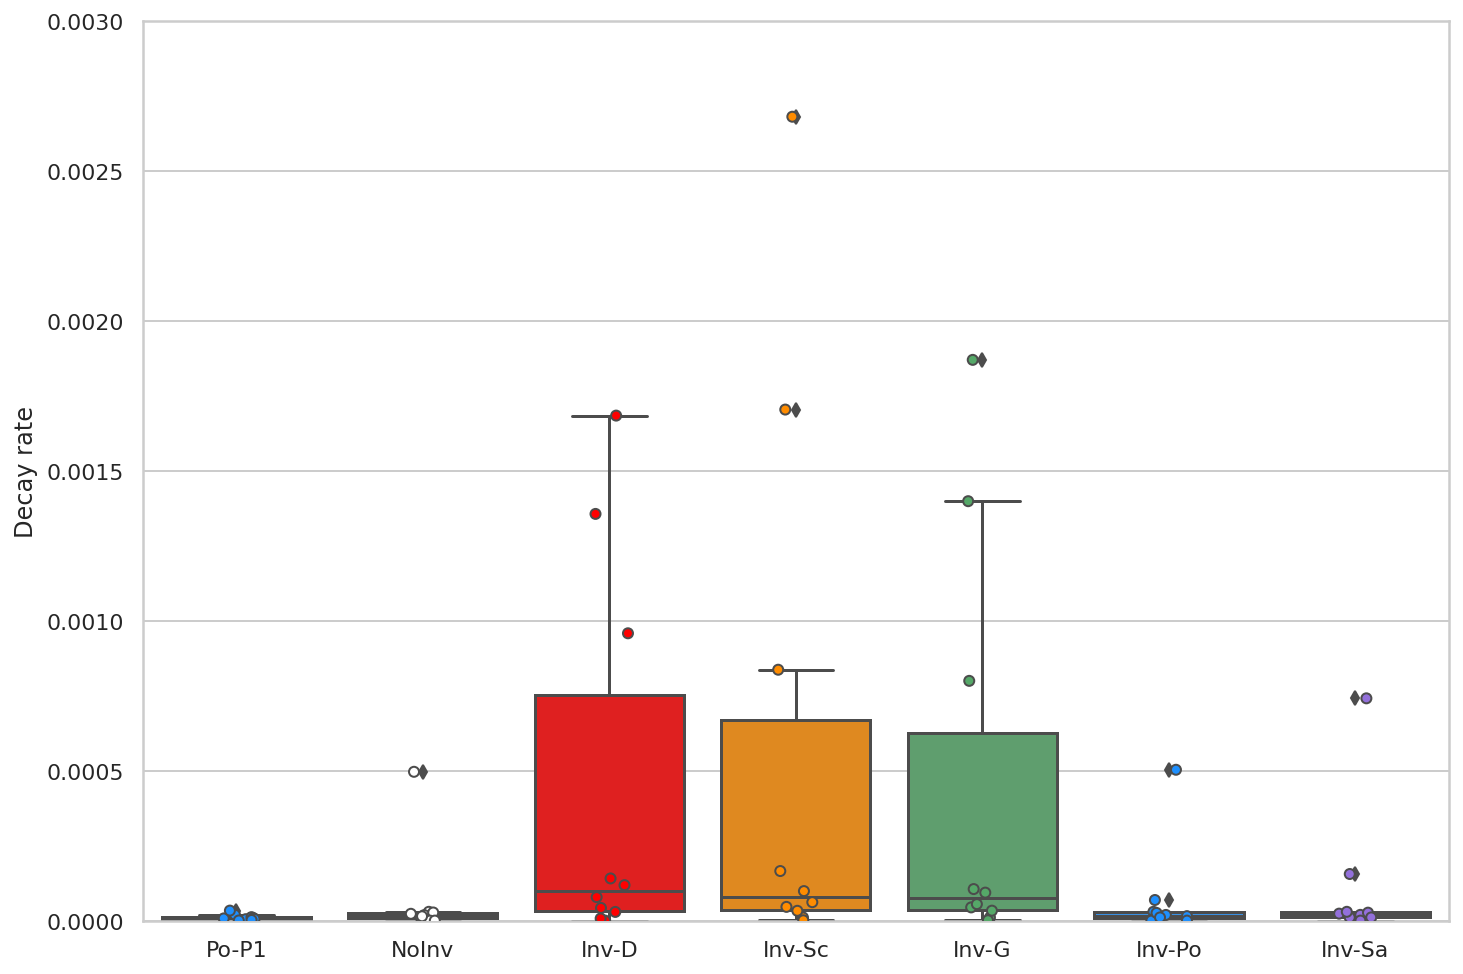

In [ ]:
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

#my_pal = {"Po-P1":"dodgerblue", "":"w", "NoInv":"w",  "Po":"dodgerblue", "Sa":"mediumpurple", 
#          "D":"red", "Sc":"darkorange", "G":"g", " ":"w", "Sc-P1":"darkorange"}

my_pal = {"Po-P1":"dodgerblue", "NoInv":"w",  "Inv-D":"red", "Inv-Sc":"darkorange", "Inv-G":"g",
          "Inv-Po":"dodgerblue", "Inv-Sa":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Decay rate')
ax.set_xlabel('')
ax.set(ylim=(0, 3e-3))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "decay"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[0],anov_df_T[2]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('decay ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                 sum_sq    df         F    PR(>F)
treatment  9.308569e-07   1.0  4.537344  0.047214
Residual   3.692782e-06  18.0       NaN       NaN


In [ ]:
anov_df

decay treatment  seed
0   7.325179e-06     Po-P1     1
1   8.764838e-06     Po-P1     2
2   4.692811e-06     Po-P1     3
3   1.154772e-05     Po-P1     4
4   1.964005e-05     Po-P1     5
5   3.336990e-05     Po-P1     6
6   4.113640e-07     Po-P1     7
7   8.222282e-06     Po-P1     8
8   5.332762e-06     Po-P1     9
9   2.023697e-06     Po-P1    10
10  4.212191e-05     Inv-D     1
11  9.586425e-04     Inv-D     2
12  0.000000e+00     Inv-D     3
13  7.053028e-06     Inv-D     4
14  1.182608e-04     Inv-D     5
15  1.407165e-04     Inv-D     6
16  1.684992e-03     Inv-D     7
17  2.893369e-05     Inv-D     8
18  7.841676e-05     Inv-D     9
19  1.356952e-03     Inv-D    10

# ********* Work on Figure 4a - with old simulations

In [ ]:
# Using old simulations
# Table phase 1
phase11 = pd.read_csv('Decay_results_persubstrate_persubstrate_phase1.csv')
phase12 = pd.read_csv('Decay_results_persubstrate_persubstrate_phase1_BE.csv')
phase1 = pd.concat([phase11,phase12])
# Table phase 2
phase21 = pd.read_csv('Decay_persubstrate_phase2_finish_table_round1.csv')
delete_row = phase21[(phase21["final_litter"] == 'A') & (phase21["residents"] == 'ResB') & (phase21["invaders"] == 'InvE')].index
phase21 = phase21.drop(delete_row)
delete_row = phase21[(phase21["final_litter"] == 'C') & (phase21["residents"] == 'ResB') & (phase21["invaders"] == 'InvD')].index
phase21 = phase21.drop(delete_row)
delete_row = phase21[(phase21["final_litter"] == 'C') & (phase21["residents"] == 'ResB') & (phase21["invaders"] == 'InvE')].index
phase21 = phase21.drop(delete_row)
delete_row = phase21[(phase21["final_litter"] == 'E') & (phase21["residents"] == 'ResB') & (phase21["invaders"] == 'NoInv')].index
phase21 = phase21.drop(delete_row)
delete_row = phase21[(phase21["final_litter"] == 'E') & (phase21["residents"] == 'ResB') & (phase21["invaders"] == 'InvA')].index
phase21 = phase21.drop(delete_row)
phase22 = pd.read_csv('Decay_persubstrate_phase2_finish_table_round2.csv')
delete_row = phase22[(phase22["residents"] == "ResB") & (phase22["final_litter"] == "E") & (phase22["invaders"] == "NoInv")].index
phase22 = phase22.drop(delete_row)
phase23 = pd.read_csv('Decay_results_persubstrate_protein_other_litters_phase2.csv')
phase24 = pd.read_csv('Decay_persubstrate_phase2_finish_table_round3.csv')
phase2 = pd.concat([phase21,phase22,phase23,phase24])
# Pick substrate
phase1_enzmax3 = phase1.loc[(phase1["enz_max"] == 3)  & (phase1['substrate'] == 'Protein3')]
phase2_enzmax3  = phase2.loc[(phase2['residents'] == 'ResD') & (phase2['final_litter'] == 'A') & (phase2['substrate'] == 'Protein3')]
# Boxplots for hypothesis 1
import seaborn as sns
# Build dataframe
col1 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'D']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po-P1"})
col2 = pd.DataFrame(np.nan, index=np.arange(len(col1)), columns=col1.columns).rename(columns={"D-P1": ""})
col3 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'NoInv']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "NoInv"})
col4 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvA']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D"})
col5 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvB']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sc"})
col6 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvC']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "G"})
col7 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvD']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po"})
col8 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvE']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sa"})
col9 = pd.DataFrame(np.nan, index=np.arange(len(col1)), columns=col1.columns).rename(columns={"D-P1": " "})
col10 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'A']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D-P1"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7,col8,col9,col10],axis=1)
Table_for_plot

Po-P1  Po-P1     NoInv         D  ...        Po        Sa  Po-P1      D-P1
0  7.325179e-06    NaN  0.000029  0.000042  ...  0.000029  0.000010    NaN  0.000309
1  8.764838e-06    NaN  0.000018  0.000959  ...  0.000009  0.000000    NaN  0.000011
2  4.692811e-06    NaN  0.000027  0.000000  ...  0.000000  0.000019    NaN  0.000379
3  1.154772e-05    NaN  0.000008  0.000007  ...  0.000015  0.000155    NaN  0.000034
4  1.964005e-05    NaN  0.000000  0.000118  ...  0.000069  0.000742    NaN  0.000122
5  3.336990e-05    NaN  0.000023  0.000141  ...  0.000503  0.000000    NaN  0.000299
6  4.113640e-07    NaN  0.000011  0.001685  ...  0.000000  0.000023    NaN  0.000321
7  8.222282e-06    NaN  0.000496  0.000029  ...  0.000026  0.000026    NaN  0.000173
8  5.332762e-06    NaN  0.000000  0.000078  ...  0.000019  0.000011    NaN  0.000746
9  2.023697e-06    NaN  0.000014  0.001357  ...  0.000011  0.000029    NaN  0.000047

[10 rows x 10 columns]

In [ ]:
# Boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

#my_pal = {"Po-P1":"dodgerblue", "":"w", "NoInv":"w",  "Po":"dodgerblue", "Sa":"mediumpurple", 
#          "D":"red", "Sc":"darkorange", "G":"g", " ":"w", "Sc-P1":"darkorange"}

my_pal = {"Po-P1":"dodgerblue", "":"w", "NoInv":"w",  "D":"red", "Sc":"darkorange", "G":"g",
          "Po":"dodgerblue", "Sa":"mediumpurple", " ":"w", "D-P1":"red"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
#ax.set_title('Change of litter: from Grassland to Desert')
ax.set_ylabel('Decay rate')
ax.set_xlabel('')
ax.set(ylim=(0, 3e-4))

KeyError: ignored